In [6]:
%matplotlib inline

# scitnific computing and plotting
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns
import os

# HDDM related packages
import pymc as pm
import hddm
import kabuki
import arviz as az
print("The current HDDM version is: ", hddm.__version__)
print("The current kabuki version is: ", kabuki.__version__)
print("The current PyMC version is: ", pm.__version__)
print("The current ArviZ version is: ", az.__version__)

The current HDDM version is:  1.0.1RC
The current kabuki version is:  0.6.5RC4
The current PyMC version is:  2.3.8
The current ArviZ version is:  0.15.1


In [2]:
dataset = hddm.load_csv('/home/jovyan/work/Desktop/Coding/HDDM/Python Prep Dataset/dataset_filtered_75.csv', skiprows=0,dtype={'age': 'str'})
dataset["sub_var"] = dataset["StimType"] + "_" + dataset["BlockType"]
dataset.head(5)

subj_idx     rt  response BlockType StimType TargetType  Block   
0     11684  1.340       1.0    0-Back  NegFace    nonlure      3  \
1     11684  1.835       1.0    0-Back  NegFace    nonlure      4   
2     11684  1.544       1.0    0-Back  NegFace     target      5   
3     11684  1.167       1.0    0-Back  NegFace       lure      6   
4     11684  0.999       1.0    0-Back  NegFace    nonlure      7   

  Stim_cog_emo  gender age  ...  sepanx_s  socphobia_s  scaared_total  gad_s   
0          Emo       2  18  ...         0           11           46.0     21  \
1          Emo       2  18  ...         0           11           46.0     21   
2          Emo       2  18  ...         0           11           46.0     21   
3          Emo       2  18  ...         0           11           46.0     21   
4          Emo       2  18  ...         0           11           46.0     21   

   panic_c  sepanx_c  socphobia_c  gad_c  anxiety         sub_var  
0        1         0            1      1        1  NegFace_0-Back  
1        1         0            1      1        1  NegFace_0-Back  
2        1         0            1      1        1  NegFace_0-Back  
3        1         0            1      1        1  NegFace_0-Back  
4        1         0            1      1        1  NegFace_0-Back  

[5 rows x 23 columns]

# Setting

In [3]:
model_nback_main = {
    "include": ['a', 'v', 't'],
    "informative": False,
    "is_group_model": True,
    "depends_on": {
        'a': ['BlockType'],
        'v': ['BlockType'],
        't': ['BlockType']
    },
    "p_outlier": 0.05
}

model_stimulus_main = {
    "include": ['a', 'v', 't'],
    "informative": False,
    "is_group_model": True,
    "depends_on": {
        'a': ['StimType'],
        'v': ['StimType'],
        't': ['StimType']
    },
    "p_outlier": 0.05
}
model_condition_interaction = {
    "include": ['a', 'v', 't'],
    "informative": False,
    "is_group_model": True,
    "depends_on": {
        'a': ['sub_var'],
        'v': ['sub_var'],
        't': ['sub_var']
    },
    "p_outlier": 0.05
}

In [10]:
import os
import arviz as az

# Define output folder
output_dir = "WM_model"

# Create the folder if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Define renamed model settings
models = {
    "model_nback_main": model_nback_main,
    "model_stimulus_main": model_stimulus_main,
    "model_condition_interaction": model_condition_interaction
}

# Loop through each model
for model_name, model_settings in models.items():

    print(f"\n--- Processing HDDM for {model_name} ---")

    # Unique file and model names with full paths
    model_var_name = model_name
    db_name = os.path.join(output_dir, f'traces_{model_var_name}.db')
    nc_name = os.path.join(output_dir, f'{model_var_name}_infdata.nc')
    model_save_name = os.path.join(output_dir, f'{model_var_name}.pkl')
    summary_csv_name = os.path.join(output_dir, f'{model_var_name}_summary.csv')

    # Build HDDM model
    model = hddm.HDDM(dataset, **model_settings)

    # Find starting values
    model.find_starting_values()

    # Sample from the posterior
    infdata = model.sample(
        6000,
        burn=1000,
        thin=2,
        chains=4,
        dbname=db_name,
        db='pickle',
        return_infdata=True
    )

    # Save model and inference outputs
    model.save(model_save_name)
    az.to_netcdf(infdata, nc_name)

    # Generate and save posterior summary to CSV
    summary = az.summary(infdata, round_to=4)
    summary.to_csv(summary_csv_name)

    print(f"Saved model: {model_save_name}")
    print(f"Saved NetCDF: {nc_name}")
    print(f"Saved ArviZ summary CSV: {summary_csv_name}")



--- Processing HDDM for model_nback_main ---
No model attribute --> setting up standard HDDM
Set model to ddm


/opt/conda/lib/python3.9/site-packages/scipy/optimize/_optimize.py:2309: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/opt/conda/lib/python3.9/site-packages/scipy/optimize/_optimize.py:2309: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/opt/conda/lib/python3.9/site-packages/scipy/optimize/_optimize.py:2309: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/opt/conda/lib/python3.9/site-packages/scipy/optimize/_optimize.py:2309: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/opt/conda/lib/python3.9/site-packages/scipy/optimize/_optimize.py:2309: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


[                  0%                  ] 2 of 6000 complete in 1.1 sec
[                  0%                  ] 3 of 6000 complete in 2.2 sec
[                  0%                  ] 4 of 6000 complete in 3.3 sec
[                  0%                  ] 5 of 6000 complete in 4.4 sec
[                  0%                  ] 6 of 6000 complete in 5.7 sec
[                  0%                  ] 7 of 6000 complete in 6.7 sec
[                  0%                  ] 8 of 6000 complete in 7.9 sec
[                  0%                  ] 9 of 6000 complete in 9.0 sec
[                  0%                  ] 10 of 6000 complete in 10.2 sec
[                  0%                  ] 11 of 6000 complete in 11.3 sec
[                  0%                  ] 12 of 6000 complete in 12.5 sec
[                  0%                  ] 13 of 6000 complete in 13.6 sec
[                  0%                  ] 14 of 6000 complete in 15.0 sec
[                  0%                  ] 15 of 6000 complete in 16.

[                  0%                  ] 2 of 6000 complete in 1.0 sec
[                  0%                  ] 3 of 6000 complete in 2.2 sec
[                  0%                  ] 4 of 6000 complete in 3.2 sec
[                  0%                  ] 5 of 6000 complete in 4.5 sec
[                  0%                  ] 6 of 6000 complete in 5.7 sec
[                  0%                  ] 7 of 6000 complete in 6.8 sec
[                  0%                  ] 8 of 6000 complete in 7.9 sec
[                  0%                  ] 9 of 6000 complete in 9.0 sec
[                  0%                  ] 10 of 6000 complete in 10.2 sec
[                  0%                  ] 11 of 6000 complete in 11.4 sec
[                  0%                  ] 12 of 6000 complete in 12.6 sec
[                  0%                  ] 13 of 6000 complete in 13.8 sec
[                  0%                  ] 14 of 6000 complete in 15.1 sec
[                  0%                  ] 15 of 6000 complete in 16.

[                  1%                  ] 113 of 6000 complete in 135.9 sec
[                  1%                  ] 114 of 6000 complete in 137.1 sec
[                  1%                  ] 115 of 6000 complete in 138.4 sec
[                  1%                  ] 116 of 6000 complete in 139.7 sec
[                  1%                  ] 117 of 6000 complete in 141.1 sec
[                  1%                  ] 118 of 6000 complete in 142.5 sec
[                  1%                  ] 119 of 6000 complete in 143.7 sec
[                  2%                  ] 120 of 6000 complete in 144.8 sec
[                  2%                  ] 121 of 6000 complete in 146.0 sec
[                  2%                  ] 122 of 6000 complete in 147.3 sec
[                  2%                  ] 123 of 6000 complete in 148.6 sec
[                  2%                  ] 124 of 6000 complete in 149.9 sec
[                  2%                  ] 125 of 6000 complete in 151.1 sec
[                  2%    

[                  1%                  ] 113 of 6000 complete in 136.0 sec
[                  1%                  ] 114 of 6000 complete in 137.4 sec
[                  1%                  ] 115 of 6000 complete in 138.7 sec
[                  1%                  ] 116 of 6000 complete in 140.1 sec
[                  1%                  ] 117 of 6000 complete in 141.3 sec
[                  1%                  ] 118 of 6000 complete in 142.7 sec
[                  1%                  ] 119 of 6000 complete in 143.9 sec
[                  2%                  ] 120 of 6000 complete in 145.0 sec
[                  2%                  ] 121 of 6000 complete in 146.2 sec
[                  2%                  ] 122 of 6000 complete in 147.5 sec
[                  2%                  ] 123 of 6000 complete in 148.8 sec
[                  2%                  ] 124 of 6000 complete in 150.1 sec
[                  2%                  ] 125 of 6000 complete in 151.3 sec
[                  2%    

[-                 3%                  ] 222 of 6000 complete in 267.6 sec
[-                 3%                  ] 223 of 6000 complete in 268.8 sec
[-                 3%                  ] 224 of 6000 complete in 270.2 sec
[-                 3%                  ] 225 of 6000 complete in 271.4 sec
[-                 3%                  ] 226 of 6000 complete in 272.7 sec
[-                 3%                  ] 227 of 6000 complete in 273.9 sec
[-                 3%                  ] 228 of 6000 complete in 275.0 sec
[-                 3%                  ] 229 of 6000 complete in 276.2 sec
[-                 3%                  ] 230 of 6000 complete in 277.3 sec
[-                 3%                  ] 231 of 6000 complete in 278.5 sec
[-                 3%                  ] 232 of 6000 complete in 279.7 sec
[-                 3%                  ] 233 of 6000 complete in 280.9 sec
[-                 3%                  ] 234 of 6000 complete in 282.0 sec
[-                 3%    

[--                5%                  ] 331 of 6000 complete in 398.7 sec
[--                5%                  ] 332 of 6000 complete in 400.1 sec
[--                5%                  ] 333 of 6000 complete in 401.3 sec
[--                5%                  ] 334 of 6000 complete in 402.6 sec
[--                5%                  ] 335 of 6000 complete in 403.9 sec
[--                5%                  ] 336 of 6000 complete in 405.1 sec
[--                5%                  ] 337 of 6000 complete in 406.3 sec
[--                5%                  ] 338 of 6000 complete in 407.6 sec
[--                5%                  ] 339 of 6000 complete in 408.9 sec
[--                5%                  ] 340 of 6000 complete in 410.0 sec
[--                5%                  ] 341 of 6000 complete in 411.2 sec
[--                5%                  ] 342 of 6000 complete in 412.4 sec
[--                5%                  ] 343 of 6000 complete in 413.6 sec
[--                5%    

[--                5%                  ] 331 of 6000 complete in 403.2 sec
[--                5%                  ] 332 of 6000 complete in 404.4 sec
[--                5%                  ] 333 of 6000 complete in 405.6 sec
[--                5%                  ] 334 of 6000 complete in 406.8 sec
[--                5%                  ] 335 of 6000 complete in 408.0 sec
[--                5%                  ] 336 of 6000 complete in 409.1 sec
[--                5%                  ] 337 of 6000 complete in 410.2 sec
[--                5%                  ] 338 of 6000 complete in 411.3 sec
[--                5%                  ] 339 of 6000 complete in 412.4 sec
[--                5%                  ] 340 of 6000 complete in 413.6 sec
[--                5%                  ] 341 of 6000 complete in 414.9 sec
[--                5%                  ] 342 of 6000 complete in 416.1 sec
[--                5%                  ] 343 of 6000 complete in 417.4 sec
[--                5%    

[--                7%                  ] 440 of 6000 complete in 532.8 sec
[--                7%                  ] 441 of 6000 complete in 534.2 sec
[--                7%                  ] 442 of 6000 complete in 535.4 sec
[--                7%                  ] 443 of 6000 complete in 536.6 sec
[--                7%                  ] 444 of 6000 complete in 537.8 sec
[--                7%                  ] 445 of 6000 complete in 538.9 sec
[--                7%                  ] 446 of 6000 complete in 540.2 sec
[--                7%                  ] 447 of 6000 complete in 541.4 sec
[--                7%                  ] 448 of 6000 complete in 542.6 sec
[--                7%                  ] 449 of 6000 complete in 543.9 sec
[--                7%                  ] 450 of 6000 complete in 545.0 sec
[--                7%                  ] 451 of 6000 complete in 546.2 sec
[--                7%                  ] 452 of 6000 complete in 547.4 sec
[--                7%    

[--                7%                  ] 440 of 6000 complete in 539.8 sec
[--                7%                  ] 441 of 6000 complete in 540.9 sec
[--                7%                  ] 442 of 6000 complete in 542.2 sec
[--                7%                  ] 443 of 6000 complete in 543.3 sec
[--                7%                  ] 444 of 6000 complete in 544.5 sec
[--                7%                  ] 445 of 6000 complete in 545.7 sec
[--                7%                  ] 446 of 6000 complete in 547.0 sec
[--                7%                  ] 447 of 6000 complete in 548.3 sec
[--                7%                  ] 448 of 6000 complete in 549.5 sec
[--                7%                  ] 449 of 6000 complete in 550.6 sec
[--                7%                  ] 450 of 6000 complete in 551.7 sec
[--                7%                  ] 451 of 6000 complete in 552.9 sec
[--                7%                  ] 452 of 6000 complete in 554.1 sec
[--                7%    

[---               9%                  ] 549 of 6000 complete in 665.1 sec
[---               9%                  ] 550 of 6000 complete in 666.3 sec
[---               9%                  ] 551 of 6000 complete in 667.8 sec
[---               9%                  ] 552 of 6000 complete in 668.9 sec
[---               9%                  ] 553 of 6000 complete in 670.3 sec
[---               9%                  ] 554 of 6000 complete in 671.5 sec
[---               9%                  ] 555 of 6000 complete in 672.6 sec
[---               9%                  ] 556 of 6000 complete in 673.8 sec
[---               9%                  ] 557 of 6000 complete in 675.1 sec
[---               9%                  ] 558 of 6000 complete in 676.2 sec
[---               9%                  ] 559 of 6000 complete in 677.4 sec
[---               9%                  ] 560 of 6000 complete in 678.7 sec
[---               9%                  ] 561 of 6000 complete in 679.9 sec
[---               9%    

[---               9%                  ] 549 of 6000 complete in 675.1 sec
[---               9%                  ] 550 of 6000 complete in 676.4 sec
[---               9%                  ] 551 of 6000 complete in 677.5 sec
[---               9%                  ] 552 of 6000 complete in 678.6 sec
[---               9%                  ] 553 of 6000 complete in 679.8 sec
[---               9%                  ] 554 of 6000 complete in 681.1 sec
[---               9%                  ] 555 of 6000 complete in 682.4 sec
[---               9%                  ] 556 of 6000 complete in 683.7 sec
[---               9%                  ] 557 of 6000 complete in 685.0 sec
[---               9%                  ] 558 of 6000 complete in 686.2 sec
[---               9%                  ] 559 of 6000 complete in 687.4 sec
[---               9%                  ] 560 of 6000 complete in 688.7 sec
[---               9%                  ] 561 of 6000 complete in 690.0 sec
[---               9%    

[----             10%                  ] 658 of 6000 complete in 802.0 sec
[----             10%                  ] 659 of 6000 complete in 803.2 sec
[----             11%                  ] 660 of 6000 complete in 804.4 sec
[----             11%                  ] 661 of 6000 complete in 805.5 sec
[----             11%                  ] 662 of 6000 complete in 806.8 sec
[----             11%                  ] 663 of 6000 complete in 807.8 sec
[----             11%                  ] 664 of 6000 complete in 809.0 sec
[----             11%                  ] 665 of 6000 complete in 810.3 sec
[----             11%                  ] 666 of 6000 complete in 811.5 sec
[----             11%                  ] 667 of 6000 complete in 812.7 sec
[----             11%                  ] 668 of 6000 complete in 813.9 sec
[----             11%                  ] 669 of 6000 complete in 815.2 sec
[----             11%                  ] 670 of 6000 complete in 816.4 sec
[----             11%    

[----             10%                  ] 658 of 6000 complete in 815.2 sec
[----             10%                  ] 659 of 6000 complete in 816.5 sec
[----             11%                  ] 660 of 6000 complete in 817.7 sec
[----             11%                  ] 661 of 6000 complete in 819.0 sec
[----             11%                  ] 662 of 6000 complete in 820.3 sec
[----             11%                  ] 663 of 6000 complete in 821.8 sec
[----             11%                  ] 664 of 6000 complete in 823.1 sec
[----             11%                  ] 665 of 6000 complete in 824.3 sec
[----             11%                  ] 666 of 6000 complete in 825.6 sec
[----             11%                  ] 667 of 6000 complete in 826.7 sec
[----             11%                  ] 668 of 6000 complete in 828.0 sec
[----             11%                  ] 669 of 6000 complete in 829.2 sec
[----             11%                  ] 670 of 6000 complete in 830.5 sec
[----             11%    

[----             12%                  ] 767 of 6000 complete in 936.5 sec
[----             12%                  ] 768 of 6000 complete in 937.8 sec
[----             12%                  ] 769 of 6000 complete in 939.0 sec
[----             12%                  ] 770 of 6000 complete in 940.2 sec
[----             12%                  ] 771 of 6000 complete in 941.4 sec
[----             12%                  ] 772 of 6000 complete in 942.5 sec
[----             12%                  ] 773 of 6000 complete in 943.7 sec
[----             12%                  ] 774 of 6000 complete in 945.0 sec
[----             12%                  ] 775 of 6000 complete in 946.3 sec
[----             12%                  ] 776 of 6000 complete in 947.6 sec
[----             12%                  ] 777 of 6000 complete in 949.0 sec
[----             12%                  ] 778 of 6000 complete in 950.3 sec
[----             12%                  ] 779 of 6000 complete in 951.4 sec
[----             13%    

[----             12%                  ] 767 of 6000 complete in 951.7 sec
[----             12%                  ] 768 of 6000 complete in 952.9 sec
[----             12%                  ] 769 of 6000 complete in 954.2 sec
[----             12%                  ] 770 of 6000 complete in 955.4 sec
[----             12%                  ] 771 of 6000 complete in 956.7 sec
[----             12%                  ] 772 of 6000 complete in 957.9 sec
[----             12%                  ] 773 of 6000 complete in 959.2 sec
[----             12%                  ] 774 of 6000 complete in 960.2 sec
[----             12%                  ] 775 of 6000 complete in 961.4 sec
[----             12%                  ] 776 of 6000 complete in 962.7 sec
[----             12%                  ] 777 of 6000 complete in 963.9 sec
[----             12%                  ] 778 of 6000 complete in 965.2 sec
[----             12%                  ] 779 of 6000 complete in 966.4 sec
[----             13%    

[-----            14%                  ] 875 of 6000 complete in 1072.0 sec
[-----            14%                  ] 876 of 6000 complete in 1073.3 sec
[-----            14%                  ] 877 of 6000 complete in 1074.4 sec
[-----            14%                  ] 878 of 6000 complete in 1075.8 sec
[-----            14%                  ] 879 of 6000 complete in 1077.0 sec
[-----            14%                  ] 880 of 6000 complete in 1078.1 sec
[-----            14%                  ] 881 of 6000 complete in 1079.3 sec
[-----            14%                  ] 882 of 6000 complete in 1080.5 sec
[-----            14%                  ] 883 of 6000 complete in 1081.6 sec
[-----            14%                  ] 884 of 6000 complete in 1082.9 sec
[-----            14%                  ] 885 of 6000 complete in 1084.3 sec
[-----            14%                  ] 886 of 6000 complete in 1085.6 sec
[-----            14%                  ] 887 of 6000 complete in 1086.8 sec
[-----      

[-----            14%                  ] 875 of 6000 complete in 1088.0 sec
[-----            14%                  ] 876 of 6000 complete in 1089.5 sec
[-----            14%                  ] 877 of 6000 complete in 1090.8 sec
[-----            14%                  ] 878 of 6000 complete in 1092.1 sec
[-----            14%                  ] 879 of 6000 complete in 1093.3 sec
[-----            14%                  ] 880 of 6000 complete in 1094.5 sec
[-----            14%                  ] 881 of 6000 complete in 1095.7 sec
[-----            14%                  ] 882 of 6000 complete in 1096.8 sec
[-----            14%                  ] 883 of 6000 complete in 1098.0 sec
[-----            14%                  ] 884 of 6000 complete in 1099.4 sec
[-----            14%                  ] 885 of 6000 complete in 1100.7 sec
[-----            14%                  ] 886 of 6000 complete in 1102.0 sec
[-----            14%                  ] 887 of 6000 complete in 1103.2 sec
[-----      

[------           16%                  ] 982 of 6000 complete in 1206.2 sec
[------           16%                  ] 983 of 6000 complete in 1207.4 sec
[------           16%                  ] 984 of 6000 complete in 1208.6 sec
[------           16%                  ] 985 of 6000 complete in 1210.0 sec
[------           16%                  ] 986 of 6000 complete in 1211.3 sec
[------           16%                  ] 987 of 6000 complete in 1212.5 sec
[------           16%                  ] 988 of 6000 complete in 1213.7 sec
[------           16%                  ] 989 of 6000 complete in 1214.9 sec
[------           16%                  ] 990 of 6000 complete in 1216.2 sec
[------           16%                  ] 991 of 6000 complete in 1217.5 sec
[------           16%                  ] 992 of 6000 complete in 1218.7 sec
[------           16%                  ] 993 of 6000 complete in 1219.9 sec
[------           16%                  ] 994 of 6000 complete in 1221.3 sec
[------     

[------           16%                  ] 982 of 6000 complete in 1224.4 sec
[------           16%                  ] 983 of 6000 complete in 1225.6 sec
[------           16%                  ] 984 of 6000 complete in 1226.9 sec
[------           16%                  ] 985 of 6000 complete in 1228.2 sec
[------           16%                  ] 986 of 6000 complete in 1229.5 sec
[------           16%                  ] 987 of 6000 complete in 1230.9 sec
[------           16%                  ] 988 of 6000 complete in 1232.3 sec
[------           16%                  ] 989 of 6000 complete in 1233.6 sec
[------           16%                  ] 990 of 6000 complete in 1234.6 sec
[------           16%                  ] 991 of 6000 complete in 1235.9 sec
[------           16%                  ] 992 of 6000 complete in 1237.2 sec
[------           16%                  ] 993 of 6000 complete in 1238.3 sec
[------           16%                  ] 994 of 6000 complete in 1239.7 sec
[------     

[------           18%                  ] 1088 of 6000 complete in 1339.3 sec
[------           18%                  ] 1089 of 6000 complete in 1340.4 sec
[------           18%                  ] 1090 of 6000 complete in 1341.7 sec
[------           18%                  ] 1091 of 6000 complete in 1343.0 sec
[------           18%                  ] 1092 of 6000 complete in 1344.3 sec
[------           18%                  ] 1093 of 6000 complete in 1345.7 sec
[------           18%                  ] 1094 of 6000 complete in 1347.0 sec
[------           18%                  ] 1095 of 6000 complete in 1348.4 sec
[------           18%                  ] 1096 of 6000 complete in 1349.5 sec
[------           18%                  ] 1097 of 6000 complete in 1350.8 sec
[------           18%                  ] 1098 of 6000 complete in 1352.1 sec
[------           18%                  ] 1099 of 6000 complete in 1353.3 sec
[------           18%                  ] 1100 of 6000 complete in 1354.5 sec

[------           18%                  ] 1088 of 6000 complete in 1359.1 sec
[------           18%                  ] 1089 of 6000 complete in 1360.4 sec
[------           18%                  ] 1090 of 6000 complete in 1361.6 sec
[------           18%                  ] 1091 of 6000 complete in 1362.8 sec
[------           18%                  ] 1092 of 6000 complete in 1364.0 sec
[------           18%                  ] 1093 of 6000 complete in 1365.2 sec
[------           18%                  ] 1094 of 6000 complete in 1366.5 sec
[------           18%                  ] 1095 of 6000 complete in 1367.8 sec
[------           18%                  ] 1096 of 6000 complete in 1368.9 sec
[------           18%                  ] 1097 of 6000 complete in 1370.2 sec
[------           18%                  ] 1098 of 6000 complete in 1371.4 sec
[------           18%                  ] 1099 of 6000 complete in 1372.9 sec
[------           18%                  ] 1100 of 6000 complete in 1374.1 sec

[-------          19%                  ] 1194 of 6000 complete in 1473.6 sec
[-------          19%                  ] 1195 of 6000 complete in 1474.8 sec
[-------          19%                  ] 1196 of 6000 complete in 1475.9 sec
[-------          19%                  ] 1197 of 6000 complete in 1477.3 sec
[-------          19%                  ] 1198 of 6000 complete in 1478.5 sec
[-------          19%                  ] 1199 of 6000 complete in 1479.7 sec
[-------          20%                  ] 1200 of 6000 complete in 1480.9 sec
[-------          20%                  ] 1201 of 6000 complete in 1482.3 sec
[-------          20%                  ] 1202 of 6000 complete in 1483.5 sec
[-------          20%                  ] 1203 of 6000 complete in 1484.8 sec
[-------          20%                  ] 1204 of 6000 complete in 1486.2 sec
[-------          20%                  ] 1205 of 6000 complete in 1487.4 sec
[-------          20%                  ] 1206 of 6000 complete in 1488.7 sec

[-------          19%                  ] 1194 of 6000 complete in 1491.0 sec
[-------          19%                  ] 1195 of 6000 complete in 1492.1 sec
[-------          19%                  ] 1196 of 6000 complete in 1493.5 sec
[-------          19%                  ] 1197 of 6000 complete in 1494.8 sec
[-------          19%                  ] 1198 of 6000 complete in 1496.1 sec
[-------          19%                  ] 1199 of 6000 complete in 1497.4 sec
[-------          20%                  ] 1200 of 6000 complete in 1498.6 sec
[-------          20%                  ] 1201 of 6000 complete in 1499.7 sec
[-------          20%                  ] 1202 of 6000 complete in 1500.9 sec
[-------          20%                  ] 1203 of 6000 complete in 1502.1 sec
[-------          20%                  ] 1204 of 6000 complete in 1503.4 sec
[-------          20%                  ] 1205 of 6000 complete in 1504.6 sec
[-------          20%                  ] 1206 of 6000 complete in 1505.9 sec

[--------         21%                  ] 1300 of 6000 complete in 1605.8 sec
[--------         21%                  ] 1301 of 6000 complete in 1607.0 sec
[--------         21%                  ] 1302 of 6000 complete in 1608.2 sec
[--------         21%                  ] 1303 of 6000 complete in 1609.4 sec
[--------         21%                  ] 1304 of 6000 complete in 1610.6 sec
[--------         21%                  ] 1305 of 6000 complete in 1611.7 sec
[--------         21%                  ] 1306 of 6000 complete in 1612.8 sec
[--------         21%                  ] 1307 of 6000 complete in 1614.0 sec
[--------         21%                  ] 1308 of 6000 complete in 1615.5 sec
[--------         21%                  ] 1309 of 6000 complete in 1616.7 sec
[--------         21%                  ] 1310 of 6000 complete in 1617.9 sec
[--------         21%                  ] 1311 of 6000 complete in 1619.2 sec
[--------         21%                  ] 1312 of 6000 complete in 1620.5 sec

[--------         21%                  ] 1300 of 6000 complete in 1623.3 sec
[--------         21%                  ] 1301 of 6000 complete in 1624.6 sec
[--------         21%                  ] 1302 of 6000 complete in 1625.8 sec
[--------         21%                  ] 1303 of 6000 complete in 1627.1 sec
[--------         21%                  ] 1304 of 6000 complete in 1628.6 sec
[--------         21%                  ] 1305 of 6000 complete in 1629.9 sec
[--------         21%                  ] 1306 of 6000 complete in 1631.3 sec
[--------         21%                  ] 1307 of 6000 complete in 1632.7 sec
[--------         21%                  ] 1308 of 6000 complete in 1634.0 sec
[--------         21%                  ] 1309 of 6000 complete in 1635.3 sec
[--------         21%                  ] 1310 of 6000 complete in 1636.7 sec
[--------         21%                  ] 1311 of 6000 complete in 1637.9 sec
[--------         21%                  ] 1312 of 6000 complete in 1639.2 sec

[--------         23%                  ] 1406 of 6000 complete in 1739.2 sec
[--------         23%                  ] 1407 of 6000 complete in 1740.4 sec
[--------         23%                  ] 1408 of 6000 complete in 1741.7 sec
[--------         23%                  ] 1409 of 6000 complete in 1743.1 sec
[--------         23%                  ] 1410 of 6000 complete in 1744.4 sec
[--------         23%                  ] 1411 of 6000 complete in 1745.5 sec
[--------         23%                  ] 1412 of 6000 complete in 1747.1 sec
[--------         23%                  ] 1413 of 6000 complete in 1748.3 sec
[--------         23%                  ] 1414 of 6000 complete in 1749.5 sec
[--------         23%                  ] 1415 of 6000 complete in 1750.7 sec
[--------         23%                  ] 1416 of 6000 complete in 1752.0 sec
[--------         23%                  ] 1417 of 6000 complete in 1753.1 sec
[--------         23%                  ] 1418 of 6000 complete in 1754.3 sec

[--------         23%                  ] 1406 of 6000 complete in 1758.8 sec
[--------         23%                  ] 1407 of 6000 complete in 1760.0 sec
[--------         23%                  ] 1408 of 6000 complete in 1761.3 sec
[--------         23%                  ] 1409 of 6000 complete in 1762.6 sec
[--------         23%                  ] 1410 of 6000 complete in 1764.1 sec
[--------         23%                  ] 1411 of 6000 complete in 1765.4 sec
[--------         23%                  ] 1412 of 6000 complete in 1767.0 sec
[--------         23%                  ] 1413 of 6000 complete in 1768.4 sec
[--------         23%                  ] 1414 of 6000 complete in 1769.7 sec
[--------         23%                  ] 1415 of 6000 complete in 1770.9 sec
[--------         23%                  ] 1416 of 6000 complete in 1772.2 sec
[--------         23%                  ] 1417 of 6000 complete in 1773.6 sec
[--------         23%                  ] 1418 of 6000 complete in 1774.9 sec

[---------        25%                  ] 1512 of 6000 complete in 1874.0 sec
[---------        25%                  ] 1513 of 6000 complete in 1875.4 sec
[---------        25%                  ] 1514 of 6000 complete in 1876.8 sec
[---------        25%                  ] 1515 of 6000 complete in 1878.1 sec
[---------        25%                  ] 1516 of 6000 complete in 1879.3 sec
[---------        25%                  ] 1517 of 6000 complete in 1880.6 sec
[---------        25%                  ] 1518 of 6000 complete in 1882.1 sec
[---------        25%                  ] 1519 of 6000 complete in 1883.4 sec
[---------        25%                  ] 1520 of 6000 complete in 1884.7 sec
[---------        25%                  ] 1521 of 6000 complete in 1885.9 sec
[---------        25%                  ] 1522 of 6000 complete in 1887.1 sec
[---------        25%                  ] 1523 of 6000 complete in 1888.2 sec
[---------        25%                  ] 1524 of 6000 complete in 1889.8 sec

[---------        25%                  ] 1512 of 6000 complete in 1898.5 sec
[---------        25%                  ] 1513 of 6000 complete in 1899.9 sec
[---------        25%                  ] 1514 of 6000 complete in 1901.3 sec
[---------        25%                  ] 1515 of 6000 complete in 1902.5 sec
[---------        25%                  ] 1516 of 6000 complete in 1903.8 sec
[---------        25%                  ] 1517 of 6000 complete in 1905.0 sec
[---------        25%                  ] 1518 of 6000 complete in 1906.3 sec
[---------        25%                  ] 1519 of 6000 complete in 1907.5 sec
[---------        25%                  ] 1520 of 6000 complete in 1908.7 sec
[---------        25%                  ] 1521 of 6000 complete in 1910.0 sec
[---------        25%                  ] 1522 of 6000 complete in 1911.4 sec
[---------        25%                  ] 1523 of 6000 complete in 1912.7 sec
[---------        25%                  ] 1524 of 6000 complete in 1913.9 sec

[----------       26%                  ] 1618 of 6000 complete in 2007.7 sec
[----------       26%                  ] 1619 of 6000 complete in 2008.9 sec
[----------       27%                  ] 1620 of 6000 complete in 2010.3 sec
[----------       27%                  ] 1621 of 6000 complete in 2011.7 sec
[----------       27%                  ] 1622 of 6000 complete in 2013.0 sec
[----------       27%                  ] 1623 of 6000 complete in 2014.5 sec
[----------       27%                  ] 1624 of 6000 complete in 2015.7 sec
[----------       27%                  ] 1625 of 6000 complete in 2017.0 sec
[----------       27%                  ] 1626 of 6000 complete in 2018.3 sec
[----------       27%                  ] 1627 of 6000 complete in 2019.5 sec
[----------       27%                  ] 1628 of 6000 complete in 2020.8 sec
[----------       27%                  ] 1629 of 6000 complete in 2022.2 sec
[----------       27%                  ] 1630 of 6000 complete in 2023.4 sec

[----------       26%                  ] 1618 of 6000 complete in 2035.5 sec
[----------       26%                  ] 1619 of 6000 complete in 2036.7 sec
[----------       27%                  ] 1620 of 6000 complete in 2037.8 sec
[----------       27%                  ] 1621 of 6000 complete in 2039.0 sec
[----------       27%                  ] 1622 of 6000 complete in 2040.4 sec
[----------       27%                  ] 1623 of 6000 complete in 2041.7 sec
[----------       27%                  ] 1624 of 6000 complete in 2043.0 sec
[----------       27%                  ] 1625 of 6000 complete in 2044.1 sec
[----------       27%                  ] 1626 of 6000 complete in 2045.5 sec
[----------       27%                  ] 1627 of 6000 complete in 2046.7 sec
[----------       27%                  ] 1628 of 6000 complete in 2048.0 sec
[----------       27%                  ] 1629 of 6000 complete in 2049.3 sec
[----------       27%                  ] 1630 of 6000 complete in 2050.8 sec

[----------       28%                  ] 1724 of 6000 complete in 2140.6 sec
[----------       28%                  ] 1725 of 6000 complete in 2141.8 sec
[----------       28%                  ] 1726 of 6000 complete in 2143.0 sec
[----------       28%                  ] 1727 of 6000 complete in 2144.1 sec
[----------       28%                  ] 1728 of 6000 complete in 2145.3 sec
[----------       28%                  ] 1729 of 6000 complete in 2146.5 sec
[----------       28%                  ] 1730 of 6000 complete in 2147.7 sec
[----------       28%                  ] 1731 of 6000 complete in 2148.8 sec
[----------       28%                  ] 1732 of 6000 complete in 2150.1 sec
[----------       28%                  ] 1733 of 6000 complete in 2151.3 sec
[----------       28%                  ] 1734 of 6000 complete in 2152.6 sec
[----------       28%                  ] 1735 of 6000 complete in 2153.8 sec
[----------       28%                  ] 1736 of 6000 complete in 2155.0 sec

[----------       28%                  ] 1724 of 6000 complete in 2170.4 sec
[----------       28%                  ] 1725 of 6000 complete in 2171.7 sec
[----------       28%                  ] 1726 of 6000 complete in 2173.2 sec
[----------       28%                  ] 1727 of 6000 complete in 2174.4 sec
[----------       28%                  ] 1728 of 6000 complete in 2175.6 sec
[----------       28%                  ] 1729 of 6000 complete in 2177.0 sec
[----------       28%                  ] 1730 of 6000 complete in 2178.2 sec
[----------       28%                  ] 1731 of 6000 complete in 2179.5 sec
[----------       28%                  ] 1732 of 6000 complete in 2180.8 sec
[----------       28%                  ] 1733 of 6000 complete in 2182.0 sec
[----------       28%                  ] 1734 of 6000 complete in 2183.3 sec
[----------       28%                  ] 1735 of 6000 complete in 2184.7 sec
[----------       28%                  ] 1736 of 6000 complete in 2186.0 sec

[-----------      30%                  ] 1830 of 6000 complete in 2273.9 sec
[-----------      30%                  ] 1831 of 6000 complete in 2275.2 sec
[-----------      30%                  ] 1832 of 6000 complete in 2276.4 sec
[-----------      30%                  ] 1833 of 6000 complete in 2277.6 sec
[-----------      30%                  ] 1834 of 6000 complete in 2279.1 sec
[-----------      30%                  ] 1835 of 6000 complete in 2280.2 sec
[-----------      30%                  ] 1836 of 6000 complete in 2281.5 sec
[-----------      30%                  ] 1837 of 6000 complete in 2282.7 sec
[-----------      30%                  ] 1838 of 6000 complete in 2283.9 sec
[-----------      30%                  ] 1839 of 6000 complete in 2285.0 sec
[-----------      30%                  ] 1840 of 6000 complete in 2286.2 sec
[-----------      30%                  ] 1841 of 6000 complete in 2287.6 sec
[-----------      30%                  ] 1842 of 6000 complete in 2288.9 sec

[-----------      30%                  ] 1830 of 6000 complete in 2304.9 sec
[-----------      30%                  ] 1831 of 6000 complete in 2306.2 sec
[-----------      30%                  ] 1832 of 6000 complete in 2307.5 sec
[-----------      30%                  ] 1833 of 6000 complete in 2308.8 sec
[-----------      30%                  ] 1834 of 6000 complete in 2310.1 sec
[-----------      30%                  ] 1835 of 6000 complete in 2311.3 sec
[-----------      30%                  ] 1836 of 6000 complete in 2312.7 sec
[-----------      30%                  ] 1837 of 6000 complete in 2314.0 sec
[-----------      30%                  ] 1838 of 6000 complete in 2315.2 sec
[-----------      30%                  ] 1839 of 6000 complete in 2316.4 sec
[-----------      30%                  ] 1840 of 6000 complete in 2317.7 sec
[-----------      30%                  ] 1841 of 6000 complete in 2319.0 sec
[-----------      30%                  ] 1842 of 6000 complete in 2320.2 sec

[------------     32%                  ] 1936 of 6000 complete in 2407.6 sec
[------------     32%                  ] 1937 of 6000 complete in 2408.8 sec
[------------     32%                  ] 1938 of 6000 complete in 2410.1 sec
[------------     32%                  ] 1939 of 6000 complete in 2411.5 sec
[------------     32%                  ] 1940 of 6000 complete in 2412.7 sec
[------------     32%                  ] 1941 of 6000 complete in 2414.0 sec
[------------     32%                  ] 1942 of 6000 complete in 2415.4 sec
[------------     32%                  ] 1943 of 6000 complete in 2416.7 sec
[------------     32%                  ] 1944 of 6000 complete in 2418.0 sec
[------------     32%                  ] 1945 of 6000 complete in 2419.4 sec
[------------     32%                  ] 1946 of 6000 complete in 2420.6 sec
[------------     32%                  ] 1947 of 6000 complete in 2421.9 sec
[------------     32%                  ] 1948 of 6000 complete in 2423.1 sec

[------------     32%                  ] 1936 of 6000 complete in 2440.4 sec
[------------     32%                  ] 1937 of 6000 complete in 2441.7 sec
[------------     32%                  ] 1938 of 6000 complete in 2442.9 sec
[------------     32%                  ] 1939 of 6000 complete in 2444.2 sec
[------------     32%                  ] 1940 of 6000 complete in 2445.4 sec
[------------     32%                  ] 1941 of 6000 complete in 2446.7 sec
[------------     32%                  ] 1942 of 6000 complete in 2447.9 sec
[------------     32%                  ] 1943 of 6000 complete in 2449.2 sec
[------------     32%                  ] 1944 of 6000 complete in 2450.6 sec
[------------     32%                  ] 1945 of 6000 complete in 2451.9 sec
[------------     32%                  ] 1946 of 6000 complete in 2453.2 sec
[------------     32%                  ] 1947 of 6000 complete in 2454.3 sec
[------------     32%                  ] 1948 of 6000 complete in 2455.6 sec

[------------     34%                  ] 2042 of 6000 complete in 2540.8 sec
[------------     34%                  ] 2043 of 6000 complete in 2542.1 sec
[------------     34%                  ] 2044 of 6000 complete in 2543.4 sec
[------------     34%                  ] 2045 of 6000 complete in 2544.6 sec
[------------     34%                  ] 2046 of 6000 complete in 2545.8 sec
[------------     34%                  ] 2047 of 6000 complete in 2547.1 sec
[------------     34%                  ] 2048 of 6000 complete in 2548.4 sec
[------------     34%                  ] 2049 of 6000 complete in 2549.8 sec
[------------     34%                  ] 2050 of 6000 complete in 2551.0 sec
[------------     34%                  ] 2051 of 6000 complete in 2552.2 sec
[------------     34%                  ] 2052 of 6000 complete in 2553.3 sec
[-------------    34%                  ] 2053 of 6000 complete in 2554.7 sec
[-------------    34%                  ] 2054 of 6000 complete in 2556.0 sec

[------------     34%                  ] 2042 of 6000 complete in 2577.0 sec
[------------     34%                  ] 2043 of 6000 complete in 2578.4 sec
[------------     34%                  ] 2044 of 6000 complete in 2580.0 sec
[------------     34%                  ] 2045 of 6000 complete in 2581.4 sec
[------------     34%                  ] 2046 of 6000 complete in 2582.7 sec
[------------     34%                  ] 2047 of 6000 complete in 2584.0 sec
[------------     34%                  ] 2048 of 6000 complete in 2585.3 sec
[------------     34%                  ] 2049 of 6000 complete in 2586.4 sec
[------------     34%                  ] 2050 of 6000 complete in 2587.6 sec
[------------     34%                  ] 2051 of 6000 complete in 2589.0 sec
[------------     34%                  ] 2052 of 6000 complete in 2590.1 sec
[-------------    34%                  ] 2053 of 6000 complete in 2591.5 sec
[-------------    34%                  ] 2054 of 6000 complete in 2592.8 sec

[-------------    35%                  ] 2148 of 6000 complete in 2677.0 sec
[-------------    35%                  ] 2149 of 6000 complete in 2678.3 sec
[-------------    35%                  ] 2150 of 6000 complete in 2679.5 sec
[-------------    35%                  ] 2151 of 6000 complete in 2680.9 sec
[-------------    35%                  ] 2152 of 6000 complete in 2682.2 sec
[-------------    35%                  ] 2153 of 6000 complete in 2683.3 sec
[-------------    35%                  ] 2154 of 6000 complete in 2684.6 sec
[-------------    35%                  ] 2155 of 6000 complete in 2685.7 sec
[-------------    35%                  ] 2156 of 6000 complete in 2687.1 sec
[-------------    35%                  ] 2157 of 6000 complete in 2688.2 sec
[-------------    35%                  ] 2158 of 6000 complete in 2689.4 sec
[-------------    35%                  ] 2159 of 6000 complete in 2690.8 sec
[-------------    36%                  ] 2160 of 6000 complete in 2692.1 sec

[-------------    35%                  ] 2148 of 6000 complete in 2715.2 sec
[-------------    35%                  ] 2149 of 6000 complete in 2716.5 sec
[-------------    35%                  ] 2150 of 6000 complete in 2717.7 sec
[-------------    35%                  ] 2151 of 6000 complete in 2719.0 sec
[-------------    35%                  ] 2152 of 6000 complete in 2720.3 sec
[-------------    35%                  ] 2153 of 6000 complete in 2721.6 sec
[-------------    35%                  ] 2154 of 6000 complete in 2723.0 sec
[-------------    35%                  ] 2155 of 6000 complete in 2724.5 sec
[-------------    35%                  ] 2156 of 6000 complete in 2725.6 sec
[-------------    35%                  ] 2157 of 6000 complete in 2726.9 sec
[-------------    35%                  ] 2158 of 6000 complete in 2728.3 sec
[-------------    35%                  ] 2159 of 6000 complete in 2729.6 sec
[-------------    36%                  ] 2160 of 6000 complete in 2730.9 sec

[--------------   37%                  ] 2254 of 6000 complete in 2811.3 sec
[--------------   37%                  ] 2255 of 6000 complete in 2812.6 sec
[--------------   37%                  ] 2256 of 6000 complete in 2813.9 sec
[--------------   37%                  ] 2257 of 6000 complete in 2815.0 sec
[--------------   37%                  ] 2258 of 6000 complete in 2816.2 sec
[--------------   37%                  ] 2259 of 6000 complete in 2817.5 sec
[--------------   37%                  ] 2260 of 6000 complete in 2818.7 sec
[--------------   37%                  ] 2261 of 6000 complete in 2819.9 sec
[--------------   37%                  ] 2262 of 6000 complete in 2821.0 sec
[--------------   37%                  ] 2263 of 6000 complete in 2822.2 sec
[--------------   37%                  ] 2264 of 6000 complete in 2823.4 sec
[--------------   37%                  ] 2265 of 6000 complete in 2824.7 sec
[--------------   37%                  ] 2266 of 6000 complete in 2826.0 sec

[--------------   37%                  ] 2254 of 6000 complete in 2851.3 sec
[--------------   37%                  ] 2255 of 6000 complete in 2852.6 sec
[--------------   37%                  ] 2256 of 6000 complete in 2853.9 sec
[--------------   37%                  ] 2257 of 6000 complete in 2855.2 sec
[--------------   37%                  ] 2258 of 6000 complete in 2856.6 sec
[--------------   37%                  ] 2259 of 6000 complete in 2857.9 sec
[--------------   37%                  ] 2260 of 6000 complete in 2859.3 sec
[--------------   37%                  ] 2261 of 6000 complete in 2860.7 sec
[--------------   37%                  ] 2262 of 6000 complete in 2862.0 sec
[--------------   37%                  ] 2263 of 6000 complete in 2863.3 sec
[--------------   37%                  ] 2264 of 6000 complete in 2864.5 sec
[--------------   37%                  ] 2265 of 6000 complete in 2865.7 sec
[--------------   37%                  ] 2266 of 6000 complete in 2866.9 sec

[--------------   39%                  ] 2360 of 6000 complete in 2945.2 sec
[--------------   39%                  ] 2361 of 6000 complete in 2946.4 sec
[--------------   39%                  ] 2362 of 6000 complete in 2947.7 sec
[--------------   39%                  ] 2363 of 6000 complete in 2948.8 sec
[--------------   39%                  ] 2364 of 6000 complete in 2950.1 sec
[--------------   39%                  ] 2365 of 6000 complete in 2951.3 sec
[--------------   39%                  ] 2366 of 6000 complete in 2952.4 sec
[--------------   39%                  ] 2367 of 6000 complete in 2953.6 sec
[--------------   39%                  ] 2368 of 6000 complete in 2954.9 sec
[---------------  39%                  ] 2369 of 6000 complete in 2956.2 sec
[---------------  39%                  ] 2370 of 6000 complete in 2957.5 sec
[---------------  39%                  ] 2371 of 6000 complete in 2958.7 sec
[---------------  39%                  ] 2372 of 6000 complete in 2960.0 sec

[--------------   39%                  ] 2360 of 6000 complete in 2988.2 sec
[--------------   39%                  ] 2361 of 6000 complete in 2989.6 sec
[--------------   39%                  ] 2362 of 6000 complete in 2990.8 sec
[--------------   39%                  ] 2363 of 6000 complete in 2992.1 sec
[--------------   39%                  ] 2364 of 6000 complete in 2993.3 sec
[--------------   39%                  ] 2365 of 6000 complete in 2994.6 sec
[--------------   39%                  ] 2366 of 6000 complete in 2995.9 sec
[--------------   39%                  ] 2367 of 6000 complete in 2997.3 sec
[--------------   39%                  ] 2368 of 6000 complete in 2998.4 sec
[---------------  39%                  ] 2369 of 6000 complete in 2999.6 sec
[---------------  39%                  ] 2370 of 6000 complete in 3000.9 sec
[---------------  39%                  ] 2371 of 6000 complete in 3002.0 sec
[---------------  39%                  ] 2372 of 6000 complete in 3003.4 sec

[---------------  41%                  ] 2466 of 6000 complete in 3078.3 sec
[---------------  41%                  ] 2467 of 6000 complete in 3079.5 sec
[---------------  41%                  ] 2468 of 6000 complete in 3080.8 sec
[---------------  41%                  ] 2469 of 6000 complete in 3082.0 sec
[---------------  41%                  ] 2470 of 6000 complete in 3083.2 sec
[---------------  41%                  ] 2471 of 6000 complete in 3084.3 sec
[---------------  41%                  ] 2472 of 6000 complete in 3085.5 sec
[---------------  41%                  ] 2473 of 6000 complete in 3086.9 sec
[---------------  41%                  ] 2474 of 6000 complete in 3088.1 sec
[---------------  41%                  ] 2475 of 6000 complete in 3089.3 sec
[---------------  41%                  ] 2476 of 6000 complete in 3090.4 sec
[---------------  41%                  ] 2477 of 6000 complete in 3091.6 sec
[---------------  41%                  ] 2478 of 6000 complete in 3092.7 sec

[---------------  41%                  ] 2466 of 6000 complete in 3123.6 sec
[---------------  41%                  ] 2467 of 6000 complete in 3124.7 sec
[---------------  41%                  ] 2468 of 6000 complete in 3126.0 sec
[---------------  41%                  ] 2469 of 6000 complete in 3127.2 sec
[---------------  41%                  ] 2470 of 6000 complete in 3128.4 sec
[---------------  41%                  ] 2471 of 6000 complete in 3129.6 sec
[---------------  41%                  ] 2472 of 6000 complete in 3130.9 sec
[---------------  41%                  ] 2473 of 6000 complete in 3132.2 sec
[---------------  41%                  ] 2474 of 6000 complete in 3133.5 sec
[---------------  41%                  ] 2475 of 6000 complete in 3134.7 sec
[---------------  41%                  ] 2476 of 6000 complete in 3136.0 sec
[---------------  41%                  ] 2477 of 6000 complete in 3137.4 sec
[---------------  41%                  ] 2478 of 6000 complete in 3138.7 sec

[---------------- 42%                  ] 2572 of 6000 complete in 3210.2 sec
[---------------- 42%                  ] 2573 of 6000 complete in 3211.5 sec
[---------------- 42%                  ] 2574 of 6000 complete in 3212.7 sec
[---------------- 42%                  ] 2575 of 6000 complete in 3213.9 sec
[---------------- 42%                  ] 2576 of 6000 complete in 3215.2 sec
[---------------- 42%                  ] 2577 of 6000 complete in 3216.4 sec
[---------------- 42%                  ] 2578 of 6000 complete in 3217.6 sec
[---------------- 42%                  ] 2579 of 6000 complete in 3219.0 sec
[---------------- 43%                  ] 2580 of 6000 complete in 3220.4 sec
[---------------- 43%                  ] 2581 of 6000 complete in 3221.6 sec
[---------------- 43%                  ] 2582 of 6000 complete in 3222.8 sec
[---------------- 43%                  ] 2583 of 6000 complete in 3224.0 sec
[---------------- 43%                  ] 2584 of 6000 complete in 3225.1 sec

[---------------- 42%                  ] 2572 of 6000 complete in 3258.1 sec
[---------------- 42%                  ] 2573 of 6000 complete in 3259.3 sec
[---------------- 42%                  ] 2574 of 6000 complete in 3260.6 sec
[---------------- 42%                  ] 2575 of 6000 complete in 3261.8 sec
[---------------- 42%                  ] 2576 of 6000 complete in 3263.0 sec
[---------------- 42%                  ] 2577 of 6000 complete in 3264.4 sec
[---------------- 42%                  ] 2578 of 6000 complete in 3265.7 sec
[---------------- 42%                  ] 2579 of 6000 complete in 3266.9 sec
[---------------- 43%                  ] 2580 of 6000 complete in 3268.2 sec
[---------------- 43%                  ] 2581 of 6000 complete in 3269.5 sec
[---------------- 43%                  ] 2582 of 6000 complete in 3270.8 sec
[---------------- 43%                  ] 2583 of 6000 complete in 3272.0 sec
[---------------- 43%                  ] 2584 of 6000 complete in 3273.3 sec

[---------------- 44%                  ] 2678 of 6000 complete in 3343.2 sec
[---------------- 44%                  ] 2679 of 6000 complete in 3344.6 sec
[---------------- 44%                  ] 2680 of 6000 complete in 3345.8 sec
[---------------- 44%                  ] 2681 of 6000 complete in 3346.9 sec
[---------------- 44%                  ] 2682 of 6000 complete in 3348.1 sec
[---------------- 44%                  ] 2683 of 6000 complete in 3349.4 sec
[---------------- 44%                  ] 2684 of 6000 complete in 3350.6 sec
[-----------------44%                  ] 2685 of 6000 complete in 3351.8 sec
[-----------------44%                  ] 2686 of 6000 complete in 3353.2 sec
[-----------------44%                  ] 2687 of 6000 complete in 3354.6 sec
[-----------------44%                  ] 2688 of 6000 complete in 3355.9 sec
[-----------------44%                  ] 2689 of 6000 complete in 3357.0 sec
[-----------------44%                  ] 2690 of 6000 complete in 3358.3 sec

[---------------- 44%                  ] 2678 of 6000 complete in 3391.8 sec
[---------------- 44%                  ] 2679 of 6000 complete in 3393.2 sec
[---------------- 44%                  ] 2680 of 6000 complete in 3394.6 sec
[---------------- 44%                  ] 2681 of 6000 complete in 3396.0 sec
[---------------- 44%                  ] 2682 of 6000 complete in 3397.3 sec
[---------------- 44%                  ] 2683 of 6000 complete in 3398.5 sec
[---------------- 44%                  ] 2684 of 6000 complete in 3399.8 sec
[-----------------44%                  ] 2685 of 6000 complete in 3401.1 sec
[-----------------44%                  ] 2686 of 6000 complete in 3402.4 sec
[-----------------44%                  ] 2687 of 6000 complete in 3403.6 sec
[-----------------44%                  ] 2688 of 6000 complete in 3404.9 sec
[-----------------44%                  ] 2689 of 6000 complete in 3406.1 sec
[-----------------44%                  ] 2690 of 6000 complete in 3407.4 sec

[-----------------46%                  ] 2784 of 6000 complete in 3476.4 sec
[-----------------46%                  ] 2785 of 6000 complete in 3477.7 sec
[-----------------46%                  ] 2786 of 6000 complete in 3479.0 sec
[-----------------46%                  ] 2787 of 6000 complete in 3480.2 sec
[-----------------46%                  ] 2788 of 6000 complete in 3481.5 sec
[-----------------46%                  ] 2789 of 6000 complete in 3482.7 sec
[-----------------46%                  ] 2790 of 6000 complete in 3483.9 sec
[-----------------46%                  ] 2791 of 6000 complete in 3485.3 sec
[-----------------46%                  ] 2792 of 6000 complete in 3486.5 sec
[-----------------46%                  ] 2793 of 6000 complete in 3487.8 sec
[-----------------46%                  ] 2794 of 6000 complete in 3489.1 sec
[-----------------46%                  ] 2795 of 6000 complete in 3490.3 sec
[-----------------46%                  ] 2796 of 6000 complete in 3491.6 sec

[-----------------46%                  ] 2784 of 6000 complete in 3527.9 sec
[-----------------46%                  ] 2785 of 6000 complete in 3529.1 sec
[-----------------46%                  ] 2786 of 6000 complete in 3530.5 sec
[-----------------46%                  ] 2787 of 6000 complete in 3531.8 sec
[-----------------46%                  ] 2788 of 6000 complete in 3533.0 sec
[-----------------46%                  ] 2789 of 6000 complete in 3534.3 sec
[-----------------46%                  ] 2790 of 6000 complete in 3535.6 sec
[-----------------46%                  ] 2791 of 6000 complete in 3536.9 sec
[-----------------46%                  ] 2792 of 6000 complete in 3538.2 sec
[-----------------46%                  ] 2793 of 6000 complete in 3539.4 sec
[-----------------46%                  ] 2794 of 6000 complete in 3540.6 sec
[-----------------46%                  ] 2795 of 6000 complete in 3541.8 sec
[-----------------46%                  ] 2796 of 6000 complete in 3543.3 sec

[-----------------48%                  ] 2890 of 6000 complete in 3610.0 sec
[-----------------48%                  ] 2891 of 6000 complete in 3611.3 sec
[-----------------48%                  ] 2892 of 6000 complete in 3612.6 sec
[-----------------48%                  ] 2893 of 6000 complete in 3613.8 sec
[-----------------48%                  ] 2894 of 6000 complete in 3615.2 sec
[-----------------48%                  ] 2895 of 6000 complete in 3616.4 sec
[-----------------48%                  ] 2896 of 6000 complete in 3617.7 sec
[-----------------48%                  ] 2897 of 6000 complete in 3618.9 sec
[-----------------48%                  ] 2898 of 6000 complete in 3620.3 sec
[-----------------48%                  ] 2899 of 6000 complete in 3621.4 sec
[-----------------48%                  ] 2900 of 6000 complete in 3622.7 sec
[-----------------48%                  ] 2901 of 6000 complete in 3624.0 sec
[-----------------48%                  ] 2902 of 6000 complete in 3625.2 sec

[-----------------48%                  ] 2890 of 6000 complete in 3666.0 sec
[-----------------48%                  ] 2891 of 6000 complete in 3667.2 sec
[-----------------48%                  ] 2892 of 6000 complete in 3668.4 sec
[-----------------48%                  ] 2893 of 6000 complete in 3669.8 sec
[-----------------48%                  ] 2894 of 6000 complete in 3671.2 sec
[-----------------48%                  ] 2895 of 6000 complete in 3672.4 sec
[-----------------48%                  ] 2896 of 6000 complete in 3673.6 sec
[-----------------48%                  ] 2897 of 6000 complete in 3674.9 sec
[-----------------48%                  ] 2898 of 6000 complete in 3676.2 sec
[-----------------48%                  ] 2899 of 6000 complete in 3677.4 sec
[-----------------48%                  ] 2900 of 6000 complete in 3678.7 sec
[-----------------48%                  ] 2901 of 6000 complete in 3680.2 sec
[-----------------48%                  ] 2902 of 6000 complete in 3681.5 sec

[-----------------49%                  ] 2996 of 6000 complete in 3743.8 sec
[-----------------49%                  ] 2997 of 6000 complete in 3745.1 sec
[-----------------49%                  ] 2998 of 6000 complete in 3746.4 sec
[-----------------49%                  ] 2999 of 6000 complete in 3747.8 sec
[-----------------50%                  ] 3000 of 6000 complete in 3749.0 sec
[-----------------50%                  ] 3001 of 6000 complete in 3750.3 sec
[-----------------50%                  ] 3002 of 6000 complete in 3751.6 sec
[-----------------50%                  ] 3003 of 6000 complete in 3752.8 sec
[-----------------50%                  ] 3004 of 6000 complete in 3753.9 sec
[-----------------50%                  ] 3005 of 6000 complete in 3755.1 sec
[-----------------50%                  ] 3006 of 6000 complete in 3756.3 sec
[-----------------50%                  ] 3007 of 6000 complete in 3758.2 sec
[-----------------50%                  ] 3008 of 6000 complete in 3760.8 sec

[-----------------49%                  ] 2996 of 6000 complete in 3804.2 sec
[-----------------49%                  ] 2997 of 6000 complete in 3805.5 sec
[-----------------49%                  ] 2998 of 6000 complete in 3806.8 sec
[-----------------49%                  ] 2999 of 6000 complete in 3808.0 sec
[-----------------50%                  ] 3000 of 6000 complete in 3809.4 sec
[-----------------50%                  ] 3001 of 6000 complete in 3810.6 sec
[-----------------50%                  ] 3002 of 6000 complete in 3812.0 sec
[-----------------50%                  ] 3003 of 6000 complete in 3813.2 sec
[-----------------50%                  ] 3004 of 6000 complete in 3814.4 sec
[-----------------50%                  ] 3005 of 6000 complete in 3815.6 sec
[-----------------50%                  ] 3006 of 6000 complete in 3816.9 sec
[-----------------50%                  ] 3007 of 6000 complete in 3818.1 sec
[-----------------50%                  ] 3008 of 6000 complete in 3819.3 sec

[-----------------51%                  ] 3102 of 6000 complete in 3881.0 sec
[-----------------51%                  ] 3103 of 6000 complete in 3882.3 sec
[-----------------51%                  ] 3104 of 6000 complete in 3883.5 sec
[-----------------51%                  ] 3105 of 6000 complete in 3884.7 sec
[-----------------51%                  ] 3106 of 6000 complete in 3886.1 sec
[-----------------51%                  ] 3107 of 6000 complete in 3887.2 sec
[-----------------51%                  ] 3108 of 6000 complete in 3888.4 sec
[-----------------51%                  ] 3109 of 6000 complete in 3889.7 sec
[-----------------51%                  ] 3110 of 6000 complete in 3890.9 sec
[-----------------51%                  ] 3111 of 6000 complete in 3892.0 sec
[-----------------51%                  ] 3112 of 6000 complete in 3893.3 sec
[-----------------51%                  ] 3113 of 6000 complete in 3894.7 sec
[-----------------51%                  ] 3114 of 6000 complete in 3896.1 sec

[-----------------51%                  ] 3102 of 6000 complete in 3940.5 sec
[-----------------51%                  ] 3103 of 6000 complete in 3941.9 sec
[-----------------51%                  ] 3104 of 6000 complete in 3943.2 sec
[-----------------51%                  ] 3105 of 6000 complete in 3944.4 sec
[-----------------51%                  ] 3106 of 6000 complete in 3945.7 sec
[-----------------51%                  ] 3107 of 6000 complete in 3947.0 sec
[-----------------51%                  ] 3108 of 6000 complete in 3948.2 sec
[-----------------51%                  ] 3109 of 6000 complete in 3949.6 sec
[-----------------51%                  ] 3110 of 6000 complete in 3951.0 sec
[-----------------51%                  ] 3111 of 6000 complete in 3952.3 sec
[-----------------51%                  ] 3112 of 6000 complete in 3953.6 sec
[-----------------51%                  ] 3113 of 6000 complete in 3954.8 sec
[-----------------51%                  ] 3114 of 6000 complete in 3956.1 sec

[-----------------53%                  ] 3208 of 6000 complete in 4012.4 sec
[-----------------53%                  ] 3209 of 6000 complete in 4013.7 sec
[-----------------53%                  ] 3210 of 6000 complete in 4014.8 sec
[-----------------53%                  ] 3211 of 6000 complete in 4016.1 sec
[-----------------53%                  ] 3212 of 6000 complete in 4017.3 sec
[-----------------53%                  ] 3213 of 6000 complete in 4018.6 sec
[-----------------53%                  ] 3214 of 6000 complete in 4019.8 sec
[-----------------53%                  ] 3215 of 6000 complete in 4021.0 sec
[-----------------53%                  ] 3216 of 6000 complete in 4022.2 sec
[-----------------53%                  ] 3217 of 6000 complete in 4023.4 sec
[-----------------53%                  ] 3218 of 6000 complete in 4024.7 sec
[-----------------53%                  ] 3219 of 6000 complete in 4026.0 sec
[-----------------53%                  ] 3220 of 6000 complete in 4027.1 sec

[-----------------53%                  ] 3208 of 6000 complete in 4073.8 sec
[-----------------53%                  ] 3209 of 6000 complete in 4075.1 sec
[-----------------53%                  ] 3210 of 6000 complete in 4076.4 sec
[-----------------53%                  ] 3211 of 6000 complete in 4077.8 sec
[-----------------53%                  ] 3212 of 6000 complete in 4079.1 sec
[-----------------53%                  ] 3213 of 6000 complete in 4080.4 sec
[-----------------53%                  ] 3214 of 6000 complete in 4081.5 sec
[-----------------53%                  ] 3215 of 6000 complete in 4082.9 sec
[-----------------53%                  ] 3216 of 6000 complete in 4084.2 sec
[-----------------53%                  ] 3217 of 6000 complete in 4085.7 sec
[-----------------53%                  ] 3218 of 6000 complete in 4086.8 sec
[-----------------53%                  ] 3219 of 6000 complete in 4088.0 sec
[-----------------53%                  ] 3220 of 6000 complete in 4089.3 sec

[-----------------55%                  ] 3314 of 6000 complete in 4144.2 sec
[-----------------55%                  ] 3315 of 6000 complete in 4145.4 sec
[-----------------55%-                 ] 3316 of 6000 complete in 4146.6 sec
[-----------------55%-                 ] 3317 of 6000 complete in 4147.7 sec
[-----------------55%-                 ] 3318 of 6000 complete in 4148.8 sec
[-----------------55%-                 ] 3319 of 6000 complete in 4150.1 sec
[-----------------55%-                 ] 3320 of 6000 complete in 4151.4 sec
[-----------------55%-                 ] 3321 of 6000 complete in 4152.6 sec
[-----------------55%-                 ] 3322 of 6000 complete in 4153.8 sec
[-----------------55%-                 ] 3323 of 6000 complete in 4154.9 sec
[-----------------55%-                 ] 3324 of 6000 complete in 4156.3 sec
[-----------------55%-                 ] 3325 of 6000 complete in 4157.4 sec
[-----------------55%-                 ] 3326 of 6000 complete in 4158.8 sec

[-----------------55%                  ] 3314 of 6000 complete in 4207.6 sec
[-----------------55%                  ] 3315 of 6000 complete in 4208.8 sec
[-----------------55%-                 ] 3316 of 6000 complete in 4210.0 sec
[-----------------55%-                 ] 3317 of 6000 complete in 4211.4 sec
[-----------------55%-                 ] 3318 of 6000 complete in 4212.7 sec
[-----------------55%-                 ] 3319 of 6000 complete in 4213.9 sec
[-----------------55%-                 ] 3320 of 6000 complete in 4215.1 sec
[-----------------55%-                 ] 3321 of 6000 complete in 4216.4 sec
[-----------------55%-                 ] 3322 of 6000 complete in 4217.6 sec
[-----------------55%-                 ] 3323 of 6000 complete in 4218.7 sec
[-----------------55%-                 ] 3324 of 6000 complete in 4219.8 sec
[-----------------55%-                 ] 3325 of 6000 complete in 4221.1 sec
[-----------------55%-                 ] 3326 of 6000 complete in 4222.3 sec

[-----------------57%-                 ] 3420 of 6000 complete in 4274.7 sec
[-----------------57%-                 ] 3421 of 6000 complete in 4275.9 sec
[-----------------57%-                 ] 3422 of 6000 complete in 4277.2 sec
[-----------------57%-                 ] 3423 of 6000 complete in 4278.3 sec
[-----------------57%-                 ] 3424 of 6000 complete in 4279.5 sec
[-----------------57%-                 ] 3425 of 6000 complete in 4280.7 sec
[-----------------57%-                 ] 3426 of 6000 complete in 4282.0 sec
[-----------------57%-                 ] 3427 of 6000 complete in 4283.4 sec
[-----------------57%-                 ] 3428 of 6000 complete in 4284.6 sec
[-----------------57%-                 ] 3429 of 6000 complete in 4285.8 sec
[-----------------57%-                 ] 3430 of 6000 complete in 4287.1 sec
[-----------------57%-                 ] 3431 of 6000 complete in 4288.3 sec
[-----------------57%-                 ] 3432 of 6000 complete in 4289.6 sec

[-----------------57%-                 ] 3420 of 6000 complete in 4339.8 sec
[-----------------57%-                 ] 3421 of 6000 complete in 4341.0 sec
[-----------------57%-                 ] 3422 of 6000 complete in 4342.3 sec
[-----------------57%-                 ] 3423 of 6000 complete in 4343.6 sec
[-----------------57%-                 ] 3424 of 6000 complete in 4344.8 sec
[-----------------57%-                 ] 3425 of 6000 complete in 4345.9 sec
[-----------------57%-                 ] 3426 of 6000 complete in 4347.2 sec
[-----------------57%-                 ] 3427 of 6000 complete in 4348.5 sec
[-----------------57%-                 ] 3428 of 6000 complete in 4349.8 sec
[-----------------57%-                 ] 3429 of 6000 complete in 4351.1 sec
[-----------------57%-                 ] 3430 of 6000 complete in 4352.5 sec
[-----------------57%-                 ] 3431 of 6000 complete in 4353.7 sec
[-----------------57%-                 ] 3432 of 6000 complete in 4355.0 sec

[-----------------58%--                ] 3526 of 6000 complete in 4407.0 sec
[-----------------58%--                ] 3527 of 6000 complete in 4408.3 sec
[-----------------58%--                ] 3528 of 6000 complete in 4409.5 sec
[-----------------58%--                ] 3529 of 6000 complete in 4410.7 sec
[-----------------58%--                ] 3530 of 6000 complete in 4412.1 sec
[-----------------58%--                ] 3531 of 6000 complete in 4413.3 sec
[-----------------58%--                ] 3532 of 6000 complete in 4414.5 sec
[-----------------58%--                ] 3533 of 6000 complete in 4415.8 sec
[-----------------58%--                ] 3534 of 6000 complete in 4417.1 sec
[-----------------58%--                ] 3535 of 6000 complete in 4418.4 sec
[-----------------58%--                ] 3536 of 6000 complete in 4419.8 sec
[-----------------58%--                ] 3537 of 6000 complete in 4421.2 sec
[-----------------58%--                ] 3538 of 6000 complete in 4422.4 sec

[-----------------58%--                ] 3526 of 6000 complete in 4472.9 sec
[-----------------58%--                ] 3527 of 6000 complete in 4474.2 sec
[-----------------58%--                ] 3528 of 6000 complete in 4475.6 sec
[-----------------58%--                ] 3529 of 6000 complete in 4476.7 sec
[-----------------58%--                ] 3530 of 6000 complete in 4478.0 sec
[-----------------58%--                ] 3531 of 6000 complete in 4479.1 sec
[-----------------58%--                ] 3532 of 6000 complete in 4480.4 sec
[-----------------58%--                ] 3533 of 6000 complete in 4481.8 sec
[-----------------58%--                ] 3534 of 6000 complete in 4483.2 sec
[-----------------58%--                ] 3535 of 6000 complete in 4484.5 sec
[-----------------58%--                ] 3536 of 6000 complete in 4485.9 sec
[-----------------58%--                ] 3537 of 6000 complete in 4487.2 sec
[-----------------58%--                ] 3538 of 6000 complete in 4488.4 sec

[-----------------60%---               ] 3632 of 6000 complete in 4537.8 sec
[-----------------60%---               ] 3633 of 6000 complete in 4539.1 sec
[-----------------60%---               ] 3634 of 6000 complete in 4540.4 sec
[-----------------60%---               ] 3635 of 6000 complete in 4541.6 sec
[-----------------60%---               ] 3636 of 6000 complete in 4542.8 sec
[-----------------60%---               ] 3637 of 6000 complete in 4544.1 sec
[-----------------60%---               ] 3638 of 6000 complete in 4545.2 sec
[-----------------60%---               ] 3639 of 6000 complete in 4546.7 sec
[-----------------60%---               ] 3640 of 6000 complete in 4547.9 sec
[-----------------60%---               ] 3641 of 6000 complete in 4549.1 sec
[-----------------60%---               ] 3642 of 6000 complete in 4550.3 sec
[-----------------60%---               ] 3643 of 6000 complete in 4551.6 sec
[-----------------60%---               ] 3644 of 6000 complete in 4552.9 sec

[-----------------60%---               ] 3632 of 6000 complete in 4608.0 sec
[-----------------60%---               ] 3633 of 6000 complete in 4609.4 sec
[-----------------60%---               ] 3634 of 6000 complete in 4610.8 sec
[-----------------60%---               ] 3635 of 6000 complete in 4612.0 sec
[-----------------60%---               ] 3636 of 6000 complete in 4613.3 sec
[-----------------60%---               ] 3637 of 6000 complete in 4614.6 sec
[-----------------60%---               ] 3638 of 6000 complete in 4615.8 sec
[-----------------60%---               ] 3639 of 6000 complete in 4616.9 sec
[-----------------60%---               ] 3640 of 6000 complete in 4618.1 sec
[-----------------60%---               ] 3641 of 6000 complete in 4619.4 sec
[-----------------60%---               ] 3642 of 6000 complete in 4620.7 sec
[-----------------60%---               ] 3643 of 6000 complete in 4621.8 sec
[-----------------60%---               ] 3644 of 6000 complete in 4623.3 sec

[-----------------62%---               ] 3738 of 6000 complete in 4669.2 sec
[-----------------62%---               ] 3739 of 6000 complete in 4670.4 sec
[-----------------62%---               ] 3740 of 6000 complete in 4671.7 sec
[-----------------62%---               ] 3741 of 6000 complete in 4672.9 sec
[-----------------62%---               ] 3742 of 6000 complete in 4674.1 sec
[-----------------62%---               ] 3743 of 6000 complete in 4675.4 sec
[-----------------62%---               ] 3744 of 6000 complete in 4676.5 sec
[-----------------62%---               ] 3745 of 6000 complete in 4677.8 sec
[-----------------62%---               ] 3746 of 6000 complete in 4679.0 sec
[-----------------62%---               ] 3747 of 6000 complete in 4680.2 sec
[-----------------62%---               ] 3748 of 6000 complete in 4681.5 sec
[-----------------62%---               ] 3749 of 6000 complete in 4682.7 sec
[-----------------62%---               ] 3750 of 6000 complete in 4684.0 sec

[-----------------62%---               ] 3738 of 6000 complete in 4742.8 sec
[-----------------62%---               ] 3739 of 6000 complete in 4744.0 sec
[-----------------62%---               ] 3740 of 6000 complete in 4745.3 sec
[-----------------62%---               ] 3741 of 6000 complete in 4746.4 sec
[-----------------62%---               ] 3742 of 6000 complete in 4747.6 sec
[-----------------62%---               ] 3743 of 6000 complete in 4748.8 sec
[-----------------62%---               ] 3744 of 6000 complete in 4750.0 sec
[-----------------62%---               ] 3745 of 6000 complete in 4751.3 sec
[-----------------62%---               ] 3746 of 6000 complete in 4752.6 sec
[-----------------62%---               ] 3747 of 6000 complete in 4753.9 sec
[-----------------62%---               ] 3748 of 6000 complete in 4755.2 sec
[-----------------62%---               ] 3749 of 6000 complete in 4756.3 sec
[-----------------62%---               ] 3750 of 6000 complete in 4757.6 sec

[-----------------64%----              ] 3844 of 6000 complete in 4802.3 sec
[-----------------64%----              ] 3845 of 6000 complete in 4803.6 sec
[-----------------64%----              ] 3846 of 6000 complete in 4804.9 sec
[-----------------64%----              ] 3847 of 6000 complete in 4806.1 sec
[-----------------64%----              ] 3848 of 6000 complete in 4807.3 sec
[-----------------64%----              ] 3849 of 6000 complete in 4808.6 sec
[-----------------64%----              ] 3850 of 6000 complete in 4809.7 sec
[-----------------64%----              ] 3851 of 6000 complete in 4810.9 sec
[-----------------64%----              ] 3852 of 6000 complete in 4812.1 sec
[-----------------64%----              ] 3853 of 6000 complete in 4813.3 sec
[-----------------64%----              ] 3854 of 6000 complete in 4814.7 sec
[-----------------64%----              ] 3855 of 6000 complete in 4816.0 sec
[-----------------64%----              ] 3856 of 6000 complete in 4817.4 sec

[-----------------64%----              ] 3844 of 6000 complete in 4877.8 sec
[-----------------64%----              ] 3845 of 6000 complete in 4879.0 sec
[-----------------64%----              ] 3846 of 6000 complete in 4880.2 sec
[-----------------64%----              ] 3847 of 6000 complete in 4881.5 sec
[-----------------64%----              ] 3848 of 6000 complete in 4882.7 sec
[-----------------64%----              ] 3849 of 6000 complete in 4883.9 sec
[-----------------64%----              ] 3850 of 6000 complete in 4885.1 sec
[-----------------64%----              ] 3851 of 6000 complete in 4886.4 sec
[-----------------64%----              ] 3852 of 6000 complete in 4887.7 sec
[-----------------64%----              ] 3853 of 6000 complete in 4888.9 sec
[-----------------64%----              ] 3854 of 6000 complete in 4890.2 sec
[-----------------64%----              ] 3855 of 6000 complete in 4891.5 sec
[-----------------64%----              ] 3856 of 6000 complete in 4892.8 sec

[-----------------65%-----             ] 3950 of 6000 complete in 4934.5 sec
[-----------------65%-----             ] 3951 of 6000 complete in 4935.7 sec
[-----------------65%-----             ] 3952 of 6000 complete in 4937.0 sec
[-----------------65%-----             ] 3953 of 6000 complete in 4938.2 sec
[-----------------65%-----             ] 3954 of 6000 complete in 4939.3 sec
[-----------------65%-----             ] 3955 of 6000 complete in 4940.4 sec
[-----------------65%-----             ] 3956 of 6000 complete in 4941.8 sec
[-----------------65%-----             ] 3957 of 6000 complete in 4943.1 sec
[-----------------65%-----             ] 3958 of 6000 complete in 4944.3 sec
[-----------------65%-----             ] 3959 of 6000 complete in 4945.5 sec
[-----------------66%-----             ] 3960 of 6000 complete in 4946.9 sec
[-----------------66%-----             ] 3961 of 6000 complete in 4948.2 sec
[-----------------66%-----             ] 3962 of 6000 complete in 4949.4 sec

[-----------------65%-----             ] 3950 of 6000 complete in 5010.7 sec
[-----------------65%-----             ] 3951 of 6000 complete in 5011.9 sec
[-----------------65%-----             ] 3952 of 6000 complete in 5013.2 sec
[-----------------65%-----             ] 3953 of 6000 complete in 5014.7 sec
[-----------------65%-----             ] 3954 of 6000 complete in 5016.1 sec
[-----------------65%-----             ] 3955 of 6000 complete in 5017.3 sec
[-----------------65%-----             ] 3956 of 6000 complete in 5018.6 sec
[-----------------65%-----             ] 3957 of 6000 complete in 5019.8 sec
[-----------------65%-----             ] 3958 of 6000 complete in 5021.1 sec
[-----------------65%-----             ] 3959 of 6000 complete in 5022.3 sec
[-----------------66%-----             ] 3960 of 6000 complete in 5023.7 sec
[-----------------66%-----             ] 3961 of 6000 complete in 5024.9 sec
[-----------------66%-----             ] 3962 of 6000 complete in 5026.1 sec

[-----------------67%-----             ] 4056 of 6000 complete in 5065.9 sec
[-----------------67%-----             ] 4057 of 6000 complete in 5067.1 sec
[-----------------67%-----             ] 4058 of 6000 complete in 5068.4 sec
[-----------------67%-----             ] 4059 of 6000 complete in 5069.6 sec
[-----------------67%-----             ] 4060 of 6000 complete in 5070.9 sec
[-----------------67%-----             ] 4061 of 6000 complete in 5072.2 sec
[-----------------67%-----             ] 4062 of 6000 complete in 5073.4 sec
[-----------------67%-----             ] 4063 of 6000 complete in 5074.8 sec
[-----------------67%-----             ] 4064 of 6000 complete in 5076.0 sec
[-----------------67%-----             ] 4065 of 6000 complete in 5077.3 sec
[-----------------67%-----             ] 4066 of 6000 complete in 5078.5 sec
[-----------------67%-----             ] 4067 of 6000 complete in 5079.8 sec
[-----------------67%-----             ] 4068 of 6000 complete in 5081.0 sec

[-----------------67%-----             ] 4056 of 6000 complete in 5143.5 sec
[-----------------67%-----             ] 4057 of 6000 complete in 5144.7 sec
[-----------------67%-----             ] 4058 of 6000 complete in 5145.9 sec
[-----------------67%-----             ] 4059 of 6000 complete in 5147.2 sec
[-----------------67%-----             ] 4060 of 6000 complete in 5148.4 sec
[-----------------67%-----             ] 4061 of 6000 complete in 5149.6 sec
[-----------------67%-----             ] 4062 of 6000 complete in 5150.9 sec
[-----------------67%-----             ] 4063 of 6000 complete in 5152.1 sec
[-----------------67%-----             ] 4064 of 6000 complete in 5153.3 sec
[-----------------67%-----             ] 4065 of 6000 complete in 5154.5 sec
[-----------------67%-----             ] 4066 of 6000 complete in 5155.8 sec
[-----------------67%-----             ] 4067 of 6000 complete in 5157.0 sec
[-----------------67%-----             ] 4068 of 6000 complete in 5158.3 sec

[-----------------69%------            ] 4162 of 6000 complete in 5198.5 sec
[-----------------69%------            ] 4163 of 6000 complete in 5199.7 sec
[-----------------69%------            ] 4164 of 6000 complete in 5201.0 sec
[-----------------69%------            ] 4165 of 6000 complete in 5202.2 sec
[-----------------69%------            ] 4166 of 6000 complete in 5203.5 sec
[-----------------69%------            ] 4167 of 6000 complete in 5204.7 sec
[-----------------69%------            ] 4168 of 6000 complete in 5205.8 sec
[-----------------69%------            ] 4169 of 6000 complete in 5207.2 sec
[-----------------69%------            ] 4170 of 6000 complete in 5208.4 sec
[-----------------69%------            ] 4171 of 6000 complete in 5209.8 sec
[-----------------69%------            ] 4172 of 6000 complete in 5211.0 sec
[-----------------69%------            ] 4173 of 6000 complete in 5212.3 sec
[-----------------69%------            ] 4174 of 6000 complete in 5213.7 sec

[-----------------69%------            ] 4162 of 6000 complete in 5276.3 sec
[-----------------69%------            ] 4163 of 6000 complete in 5277.7 sec
[-----------------69%------            ] 4164 of 6000 complete in 5279.0 sec
[-----------------69%------            ] 4165 of 6000 complete in 5280.2 sec
[-----------------69%------            ] 4166 of 6000 complete in 5281.3 sec
[-----------------69%------            ] 4167 of 6000 complete in 5282.5 sec
[-----------------69%------            ] 4168 of 6000 complete in 5283.8 sec
[-----------------69%------            ] 4169 of 6000 complete in 5285.1 sec
[-----------------69%------            ] 4170 of 6000 complete in 5286.2 sec
[-----------------69%------            ] 4171 of 6000 complete in 5287.4 sec
[-----------------69%------            ] 4172 of 6000 complete in 5288.7 sec
[-----------------69%------            ] 4173 of 6000 complete in 5290.1 sec
[-----------------69%------            ] 4174 of 6000 complete in 5291.3 sec

[-----------------71%-------           ] 4268 of 6000 complete in 5331.7 sec
[-----------------71%-------           ] 4269 of 6000 complete in 5332.9 sec
[-----------------71%-------           ] 4270 of 6000 complete in 5334.2 sec
[-----------------71%-------           ] 4271 of 6000 complete in 5335.5 sec
[-----------------71%-------           ] 4272 of 6000 complete in 5336.8 sec
[-----------------71%-------           ] 4273 of 6000 complete in 5338.2 sec
[-----------------71%-------           ] 4274 of 6000 complete in 5339.3 sec
[-----------------71%-------           ] 4275 of 6000 complete in 5340.6 sec
[-----------------71%-------           ] 4276 of 6000 complete in 5341.7 sec
[-----------------71%-------           ] 4277 of 6000 complete in 5343.1 sec
[-----------------71%-------           ] 4278 of 6000 complete in 5344.5 sec
[-----------------71%-------           ] 4279 of 6000 complete in 5345.6 sec
[-----------------71%-------           ] 4280 of 6000 complete in 5346.8 sec

[-----------------71%-------           ] 4268 of 6000 complete in 5411.1 sec
[-----------------71%-------           ] 4269 of 6000 complete in 5412.5 sec
[-----------------71%-------           ] 4270 of 6000 complete in 5413.9 sec
[-----------------71%-------           ] 4271 of 6000 complete in 5415.3 sec
[-----------------71%-------           ] 4272 of 6000 complete in 5416.6 sec
[-----------------71%-------           ] 4273 of 6000 complete in 5417.9 sec
[-----------------71%-------           ] 4274 of 6000 complete in 5419.2 sec
[-----------------71%-------           ] 4275 of 6000 complete in 5420.5 sec
[-----------------71%-------           ] 4276 of 6000 complete in 5421.8 sec
[-----------------71%-------           ] 4277 of 6000 complete in 5423.1 sec
[-----------------71%-------           ] 4278 of 6000 complete in 5424.4 sec
[-----------------71%-------           ] 4279 of 6000 complete in 5425.8 sec
[-----------------71%-------           ] 4280 of 6000 complete in 5427.3 sec

[-----------------72%-------           ] 4374 of 6000 complete in 5465.1 sec
[-----------------72%-------           ] 4375 of 6000 complete in 5466.3 sec
[-----------------72%-------           ] 4376 of 6000 complete in 5467.5 sec
[-----------------72%-------           ] 4377 of 6000 complete in 5468.8 sec
[-----------------72%-------           ] 4378 of 6000 complete in 5470.9 sec
[-----------------72%-------           ] 4379 of 6000 complete in 5472.2 sec
[-----------------73%-------           ] 4380 of 6000 complete in 5473.4 sec
[-----------------73%-------           ] 4381 of 6000 complete in 5474.7 sec
[-----------------73%-------           ] 4382 of 6000 complete in 5475.7 sec
[-----------------73%-------           ] 4383 of 6000 complete in 5476.9 sec
[-----------------73%-------           ] 4384 of 6000 complete in 5478.2 sec
[-----------------73%-------           ] 4385 of 6000 complete in 5479.5 sec
[-----------------73%-------           ] 4386 of 6000 complete in 5480.9 sec

[-----------------72%-------           ] 4374 of 6000 complete in 5551.6 sec
[-----------------72%-------           ] 4375 of 6000 complete in 5552.7 sec
[-----------------72%-------           ] 4376 of 6000 complete in 5554.0 sec
[-----------------72%-------           ] 4377 of 6000 complete in 5555.3 sec
[-----------------72%-------           ] 4378 of 6000 complete in 5556.5 sec
[-----------------72%-------           ] 4379 of 6000 complete in 5558.0 sec
[-----------------73%-------           ] 4380 of 6000 complete in 5559.2 sec
[-----------------73%-------           ] 4381 of 6000 complete in 5560.6 sec
[-----------------73%-------           ] 4382 of 6000 complete in 5561.8 sec
[-----------------73%-------           ] 4383 of 6000 complete in 5563.0 sec
[-----------------73%-------           ] 4384 of 6000 complete in 5564.4 sec
[-----------------73%-------           ] 4385 of 6000 complete in 5565.5 sec
[-----------------73%-------           ] 4386 of 6000 complete in 5566.8 sec

[-----------------74%--------          ] 4480 of 6000 complete in 5599.5 sec
[-----------------74%--------          ] 4481 of 6000 complete in 5600.7 sec
[-----------------74%--------          ] 4482 of 6000 complete in 5601.9 sec
[-----------------74%--------          ] 4483 of 6000 complete in 5603.3 sec
[-----------------74%--------          ] 4484 of 6000 complete in 5604.5 sec
[-----------------74%--------          ] 4485 of 6000 complete in 5605.7 sec
[-----------------74%--------          ] 4486 of 6000 complete in 5606.9 sec
[-----------------74%--------          ] 4487 of 6000 complete in 5608.1 sec
[-----------------74%--------          ] 4488 of 6000 complete in 5609.4 sec
[-----------------74%--------          ] 4489 of 6000 complete in 5610.6 sec
[-----------------74%--------          ] 4490 of 6000 complete in 5612.1 sec
[-----------------74%--------          ] 4491 of 6000 complete in 5613.4 sec
[-----------------74%--------          ] 4492 of 6000 complete in 5614.8 sec

[-----------------74%--------          ] 4480 of 6000 complete in 5687.2 sec
[-----------------74%--------          ] 4481 of 6000 complete in 5688.3 sec
[-----------------74%--------          ] 4482 of 6000 complete in 5689.5 sec
[-----------------74%--------          ] 4483 of 6000 complete in 5690.8 sec
[-----------------74%--------          ] 4484 of 6000 complete in 5692.0 sec
[-----------------74%--------          ] 4485 of 6000 complete in 5693.3 sec
[-----------------74%--------          ] 4486 of 6000 complete in 5694.6 sec
[-----------------74%--------          ] 4487 of 6000 complete in 5695.9 sec
[-----------------74%--------          ] 4488 of 6000 complete in 5697.3 sec
[-----------------74%--------          ] 4489 of 6000 complete in 5698.6 sec
[-----------------74%--------          ] 4490 of 6000 complete in 5699.9 sec
[-----------------74%--------          ] 4491 of 6000 complete in 5701.0 sec
[-----------------74%--------          ] 4492 of 6000 complete in 5702.4 sec

[-----------------76%---------         ] 4586 of 6000 complete in 5732.2 sec
[-----------------76%---------         ] 4587 of 6000 complete in 5733.5 sec
[-----------------76%---------         ] 4588 of 6000 complete in 5734.8 sec
[-----------------76%---------         ] 4589 of 6000 complete in 5736.0 sec
[-----------------76%---------         ] 4590 of 6000 complete in 5737.2 sec
[-----------------76%---------         ] 4591 of 6000 complete in 5738.4 sec
[-----------------76%---------         ] 4592 of 6000 complete in 5739.7 sec
[-----------------76%---------         ] 4593 of 6000 complete in 5740.9 sec
[-----------------76%---------         ] 4594 of 6000 complete in 5742.4 sec
[-----------------76%---------         ] 4595 of 6000 complete in 5743.7 sec
[-----------------76%---------         ] 4596 of 6000 complete in 5745.0 sec
[-----------------76%---------         ] 4597 of 6000 complete in 5746.3 sec
[-----------------76%---------         ] 4598 of 6000 complete in 5747.5 sec

[-----------------76%---------         ] 4586 of 6000 complete in 5827.7 sec
[-----------------76%---------         ] 4587 of 6000 complete in 5829.0 sec
[-----------------76%---------         ] 4588 of 6000 complete in 5830.3 sec
[-----------------76%---------         ] 4589 of 6000 complete in 5831.7 sec
[-----------------76%---------         ] 4590 of 6000 complete in 5833.0 sec
[-----------------76%---------         ] 4591 of 6000 complete in 5834.6 sec
[-----------------76%---------         ] 4592 of 6000 complete in 5836.2 sec
[-----------------76%---------         ] 4593 of 6000 complete in 5837.4 sec
[-----------------76%---------         ] 4594 of 6000 complete in 5838.8 sec
[-----------------76%---------         ] 4595 of 6000 complete in 5840.2 sec
[-----------------76%---------         ] 4596 of 6000 complete in 5842.0 sec
[-----------------76%---------         ] 4597 of 6000 complete in 5843.3 sec
[-----------------76%---------         ] 4598 of 6000 complete in 5844.6 sec

[-----------------78%---------         ] 4692 of 6000 complete in 5876.8 sec
[-----------------78%---------         ] 4693 of 6000 complete in 5878.2 sec
[-----------------78%---------         ] 4694 of 6000 complete in 5879.7 sec
[-----------------78%---------         ] 4695 of 6000 complete in 5881.2 sec
[-----------------78%---------         ] 4696 of 6000 complete in 5882.6 sec
[-----------------78%---------         ] 4697 of 6000 complete in 5884.0 sec
[-----------------78%---------         ] 4698 of 6000 complete in 5885.4 sec
[-----------------78%---------         ] 4699 of 6000 complete in 5886.6 sec
[-----------------78%---------         ] 4700 of 6000 complete in 5888.0 sec
[-----------------78%---------         ] 4701 of 6000 complete in 5889.4 sec
[-----------------78%---------         ] 4702 of 6000 complete in 5890.6 sec
[-----------------78%---------         ] 4703 of 6000 complete in 5891.8 sec
[-----------------78%---------         ] 4704 of 6000 complete in 5893.2 sec

[-----------------78%---------         ] 4692 of 6000 complete in 5976.0 sec
[-----------------78%---------         ] 4693 of 6000 complete in 5977.5 sec
[-----------------78%---------         ] 4694 of 6000 complete in 5979.0 sec
[-----------------78%---------         ] 4695 of 6000 complete in 5980.2 sec
[-----------------78%---------         ] 4696 of 6000 complete in 5981.4 sec
[-----------------78%---------         ] 4697 of 6000 complete in 5982.7 sec
[-----------------78%---------         ] 4698 of 6000 complete in 5984.2 sec
[-----------------78%---------         ] 4699 of 6000 complete in 5985.4 sec
[-----------------78%---------         ] 4700 of 6000 complete in 5986.8 sec
[-----------------78%---------         ] 4701 of 6000 complete in 5988.0 sec
[-----------------78%---------         ] 4702 of 6000 complete in 5989.4 sec
[-----------------78%---------         ] 4703 of 6000 complete in 5990.9 sec
[-----------------78%---------         ] 4704 of 6000 complete in 5992.4 sec

[-----------------79%----------        ] 4798 of 6000 complete in 6019.4 sec
[-----------------79%----------        ] 4799 of 6000 complete in 6020.9 sec
[-----------------80%----------        ] 4800 of 6000 complete in 6022.3 sec
[-----------------80%----------        ] 4801 of 6000 complete in 6023.5 sec
[-----------------80%----------        ] 4802 of 6000 complete in 6024.9 sec
[-----------------80%----------        ] 4803 of 6000 complete in 6026.4 sec
[-----------------80%----------        ] 4804 of 6000 complete in 6028.0 sec
[-----------------80%----------        ] 4805 of 6000 complete in 6029.5 sec
[-----------------80%----------        ] 4806 of 6000 complete in 6030.7 sec
[-----------------80%----------        ] 4807 of 6000 complete in 6031.9 sec
[-----------------80%----------        ] 4808 of 6000 complete in 6033.2 sec
[-----------------80%----------        ] 4809 of 6000 complete in 6034.5 sec
[-----------------80%----------        ] 4810 of 6000 complete in 6035.8 sec

[-----------------79%----------        ] 4798 of 6000 complete in 6121.1 sec
[-----------------79%----------        ] 4799 of 6000 complete in 6122.6 sec
[-----------------80%----------        ] 4800 of 6000 complete in 6123.9 sec
[-----------------80%----------        ] 4801 of 6000 complete in 6125.2 sec
[-----------------80%----------        ] 4802 of 6000 complete in 6126.6 sec
[-----------------80%----------        ] 4803 of 6000 complete in 6128.1 sec
[-----------------80%----------        ] 4804 of 6000 complete in 6129.4 sec
[-----------------80%----------        ] 4805 of 6000 complete in 6130.6 sec
[-----------------80%----------        ] 4806 of 6000 complete in 6131.9 sec
[-----------------80%----------        ] 4807 of 6000 complete in 6133.3 sec
[-----------------80%----------        ] 4808 of 6000 complete in 6134.8 sec
[-----------------80%----------        ] 4809 of 6000 complete in 6136.1 sec
[-----------------80%----------        ] 4810 of 6000 complete in 6137.4 sec

[-----------------81%-----------       ] 4904 of 6000 complete in 6162.2 sec
[-----------------81%-----------       ] 4905 of 6000 complete in 6163.5 sec
[-----------------81%-----------       ] 4906 of 6000 complete in 6165.0 sec
[-----------------81%-----------       ] 4907 of 6000 complete in 6166.3 sec
[-----------------81%-----------       ] 4908 of 6000 complete in 6167.7 sec
[-----------------81%-----------       ] 4909 of 6000 complete in 6168.9 sec
[-----------------81%-----------       ] 4910 of 6000 complete in 6170.2 sec
[-----------------81%-----------       ] 4911 of 6000 complete in 6171.6 sec
[-----------------81%-----------       ] 4912 of 6000 complete in 6173.0 sec
[-----------------81%-----------       ] 4913 of 6000 complete in 6174.4 sec
[-----------------81%-----------       ] 4914 of 6000 complete in 6175.8 sec
[-----------------81%-----------       ] 4915 of 6000 complete in 6177.1 sec
[-----------------81%-----------       ] 4916 of 6000 complete in 6178.3 sec

[-----------------81%-----------       ] 4904 of 6000 complete in 6265.9 sec
[-----------------81%-----------       ] 4905 of 6000 complete in 6267.2 sec
[-----------------81%-----------       ] 4906 of 6000 complete in 6268.7 sec
[-----------------81%-----------       ] 4907 of 6000 complete in 6270.3 sec
[-----------------81%-----------       ] 4908 of 6000 complete in 6271.6 sec
[-----------------81%-----------       ] 4909 of 6000 complete in 6273.0 sec
[-----------------81%-----------       ] 4910 of 6000 complete in 6274.3 sec
[-----------------81%-----------       ] 4911 of 6000 complete in 6275.6 sec
[-----------------81%-----------       ] 4912 of 6000 complete in 6276.8 sec
[-----------------81%-----------       ] 4913 of 6000 complete in 6278.1 sec
[-----------------81%-----------       ] 4914 of 6000 complete in 6279.4 sec
[-----------------81%-----------       ] 4915 of 6000 complete in 6280.9 sec
[-----------------81%-----------       ] 4916 of 6000 complete in 6282.2 sec

[-----------------83%-----------       ] 5010 of 6000 complete in 6306.0 sec
[-----------------83%-----------       ] 5011 of 6000 complete in 6307.4 sec
[-----------------83%-----------       ] 5012 of 6000 complete in 6308.7 sec
[-----------------83%-----------       ] 5013 of 6000 complete in 6310.0 sec
[-----------------83%-----------       ] 5014 of 6000 complete in 6311.3 sec
[-----------------83%-----------       ] 5015 of 6000 complete in 6312.8 sec
[-----------------83%-----------       ] 5016 of 6000 complete in 6314.1 sec
[-----------------83%-----------       ] 5017 of 6000 complete in 6315.4 sec
[-----------------83%-----------       ] 5018 of 6000 complete in 6316.7 sec
[-----------------83%-----------       ] 5019 of 6000 complete in 6318.2 sec
[-----------------83%-----------       ] 5020 of 6000 complete in 6319.5 sec
[-----------------83%-----------       ] 5021 of 6000 complete in 6320.8 sec
[-----------------83%-----------       ] 5022 of 6000 complete in 6322.2 sec

[-----------------83%-----------       ] 5010 of 6000 complete in 6412.0 sec
[-----------------83%-----------       ] 5011 of 6000 complete in 6413.2 sec
[-----------------83%-----------       ] 5012 of 6000 complete in 6414.7 sec
[-----------------83%-----------       ] 5013 of 6000 complete in 6416.0 sec
[-----------------83%-----------       ] 5014 of 6000 complete in 6417.2 sec
[-----------------83%-----------       ] 5015 of 6000 complete in 6418.4 sec
[-----------------83%-----------       ] 5016 of 6000 complete in 6419.7 sec
[-----------------83%-----------       ] 5017 of 6000 complete in 6421.1 sec
[-----------------83%-----------       ] 5018 of 6000 complete in 6422.4 sec
[-----------------83%-----------       ] 5019 of 6000 complete in 6423.7 sec
[-----------------83%-----------       ] 5020 of 6000 complete in 6425.2 sec
[-----------------83%-----------       ] 5021 of 6000 complete in 6426.4 sec
[-----------------83%-----------       ] 5022 of 6000 complete in 6427.8 sec

[-----------------85%------------      ] 5116 of 6000 complete in 6446.7 sec
[-----------------85%------------      ] 5117 of 6000 complete in 6447.9 sec
[-----------------85%------------      ] 5118 of 6000 complete in 6449.3 sec
[-----------------85%------------      ] 5119 of 6000 complete in 6450.7 sec
[-----------------85%------------      ] 5120 of 6000 complete in 6452.0 sec
[-----------------85%------------      ] 5121 of 6000 complete in 6453.5 sec
[-----------------85%------------      ] 5122 of 6000 complete in 6454.7 sec
[-----------------85%------------      ] 5123 of 6000 complete in 6456.1 sec
[-----------------85%------------      ] 5124 of 6000 complete in 6457.5 sec
[-----------------85%------------      ] 5125 of 6000 complete in 6458.7 sec
[-----------------85%------------      ] 5126 of 6000 complete in 6460.1 sec
[-----------------85%------------      ] 5127 of 6000 complete in 6461.6 sec
[-----------------85%------------      ] 5128 of 6000 complete in 6462.9 sec

[-----------------85%------------      ] 5116 of 6000 complete in 6556.3 sec
[-----------------85%------------      ] 5117 of 6000 complete in 6557.5 sec
[-----------------85%------------      ] 5118 of 6000 complete in 6558.7 sec
[-----------------85%------------      ] 5119 of 6000 complete in 6560.2 sec
[-----------------85%------------      ] 5120 of 6000 complete in 6561.6 sec
[-----------------85%------------      ] 5121 of 6000 complete in 6563.1 sec
[-----------------85%------------      ] 5122 of 6000 complete in 6564.6 sec
[-----------------85%------------      ] 5123 of 6000 complete in 6565.9 sec
[-----------------85%------------      ] 5124 of 6000 complete in 6567.2 sec
[-----------------85%------------      ] 5125 of 6000 complete in 6568.5 sec
[-----------------85%------------      ] 5126 of 6000 complete in 6569.8 sec
[-----------------85%------------      ] 5127 of 6000 complete in 6571.1 sec
[-----------------85%------------      ] 5128 of 6000 complete in 6572.7 sec

[-----------------87%-------------     ] 5222 of 6000 complete in 6590.2 sec
[-----------------87%-------------     ] 5223 of 6000 complete in 6591.4 sec
[-----------------87%-------------     ] 5224 of 6000 complete in 6592.6 sec
[-----------------87%-------------     ] 5225 of 6000 complete in 6593.8 sec
[-----------------87%-------------     ] 5226 of 6000 complete in 6595.3 sec
[-----------------87%-------------     ] 5227 of 6000 complete in 6596.5 sec
[-----------------87%-------------     ] 5228 of 6000 complete in 6598.2 sec
[-----------------87%-------------     ] 5229 of 6000 complete in 6599.5 sec
[-----------------87%-------------     ] 5230 of 6000 complete in 6600.9 sec
[-----------------87%-------------     ] 5231 of 6000 complete in 6602.4 sec
[-----------------87%-------------     ] 5232 of 6000 complete in 6603.7 sec
[-----------------87%-------------     ] 5233 of 6000 complete in 6605.0 sec
[-----------------87%-------------     ] 5234 of 6000 complete in 6606.3 sec

[-----------------87%-------------     ] 5222 of 6000 complete in 6702.7 sec
[-----------------87%-------------     ] 5223 of 6000 complete in 6704.3 sec
[-----------------87%-------------     ] 5224 of 6000 complete in 6705.4 sec
[-----------------87%-------------     ] 5225 of 6000 complete in 6706.8 sec
[-----------------87%-------------     ] 5226 of 6000 complete in 6708.0 sec
[-----------------87%-------------     ] 5227 of 6000 complete in 6709.4 sec
[-----------------87%-------------     ] 5228 of 6000 complete in 6711.0 sec
[-----------------87%-------------     ] 5229 of 6000 complete in 6712.4 sec
[-----------------87%-------------     ] 5230 of 6000 complete in 6713.8 sec
[-----------------87%-------------     ] 5231 of 6000 complete in 6715.1 sec
[-----------------87%-------------     ] 5232 of 6000 complete in 6716.4 sec
[-----------------87%-------------     ] 5233 of 6000 complete in 6717.9 sec
[-----------------87%-------------     ] 5234 of 6000 complete in 6719.3 sec

[-----------------88%-------------     ] 5328 of 6000 complete in 6735.9 sec
[-----------------88%-------------     ] 5329 of 6000 complete in 6737.2 sec
[-----------------88%-------------     ] 5330 of 6000 complete in 6738.6 sec
[-----------------88%-------------     ] 5331 of 6000 complete in 6739.8 sec
[-----------------88%-------------     ] 5332 of 6000 complete in 6741.2 sec
[-----------------88%-------------     ] 5333 of 6000 complete in 6742.6 sec
[-----------------88%-------------     ] 5334 of 6000 complete in 6744.1 sec
[-----------------88%-------------     ] 5335 of 6000 complete in 6745.5 sec
[-----------------88%-------------     ] 5336 of 6000 complete in 6746.7 sec
[-----------------88%-------------     ] 5337 of 6000 complete in 6748.2 sec
[-----------------88%-------------     ] 5338 of 6000 complete in 6749.7 sec
[-----------------88%-------------     ] 5339 of 6000 complete in 6751.0 sec
[-----------------89%-------------     ] 5340 of 6000 complete in 6752.5 sec

[-----------------88%-------------     ] 5328 of 6000 complete in 6850.4 sec
[-----------------88%-------------     ] 5329 of 6000 complete in 6851.9 sec
[-----------------88%-------------     ] 5330 of 6000 complete in 6853.1 sec
[-----------------88%-------------     ] 5331 of 6000 complete in 6854.6 sec
[-----------------88%-------------     ] 5332 of 6000 complete in 6856.0 sec
[-----------------88%-------------     ] 5333 of 6000 complete in 6857.4 sec
[-----------------88%-------------     ] 5334 of 6000 complete in 6858.7 sec
[-----------------88%-------------     ] 5335 of 6000 complete in 6859.9 sec
[-----------------88%-------------     ] 5336 of 6000 complete in 6861.3 sec
[-----------------88%-------------     ] 5337 of 6000 complete in 6862.6 sec
[-----------------88%-------------     ] 5338 of 6000 complete in 6864.2 sec
[-----------------88%-------------     ] 5339 of 6000 complete in 6865.7 sec
[-----------------89%-------------     ] 5340 of 6000 complete in 6867.0 sec

[-----------------90%--------------    ] 5434 of 6000 complete in 6882.4 sec
[-----------------90%--------------    ] 5435 of 6000 complete in 6884.0 sec
[-----------------90%--------------    ] 5436 of 6000 complete in 6885.3 sec
[-----------------90%--------------    ] 5437 of 6000 complete in 6886.6 sec
[-----------------90%--------------    ] 5438 of 6000 complete in 6887.9 sec
[-----------------90%--------------    ] 5439 of 6000 complete in 6889.2 sec
[-----------------90%--------------    ] 5440 of 6000 complete in 6890.5 sec
[-----------------90%--------------    ] 5441 of 6000 complete in 6891.9 sec
[-----------------90%--------------    ] 5442 of 6000 complete in 6893.3 sec
[-----------------90%--------------    ] 5443 of 6000 complete in 6894.5 sec
[-----------------90%--------------    ] 5444 of 6000 complete in 6896.0 sec
[-----------------90%--------------    ] 5445 of 6000 complete in 6897.5 sec
[-----------------90%--------------    ] 5446 of 6000 complete in 6898.8 sec

[-----------------90%--------------    ] 5434 of 6000 complete in 6997.8 sec
[-----------------90%--------------    ] 5435 of 6000 complete in 6999.2 sec
[-----------------90%--------------    ] 5436 of 6000 complete in 7000.7 sec
[-----------------90%--------------    ] 5437 of 6000 complete in 7002.0 sec
[-----------------90%--------------    ] 5438 of 6000 complete in 7003.4 sec
[-----------------90%--------------    ] 5439 of 6000 complete in 7004.8 sec
[-----------------90%--------------    ] 5440 of 6000 complete in 7006.2 sec
[-----------------90%--------------    ] 5441 of 6000 complete in 7007.6 sec
[-----------------90%--------------    ] 5442 of 6000 complete in 7009.1 sec
[-----------------90%--------------    ] 5443 of 6000 complete in 7010.3 sec
[-----------------90%--------------    ] 5444 of 6000 complete in 7011.7 sec
[-----------------90%--------------    ] 5445 of 6000 complete in 7013.1 sec
[-----------------90%--------------    ] 5446 of 6000 complete in 7014.4 sec

[-----------------92%---------------   ] 5540 of 6000 complete in 7024.8 sec
[-----------------92%---------------   ] 5541 of 6000 complete in 7026.3 sec
[-----------------92%---------------   ] 5542 of 6000 complete in 7027.7 sec
[-----------------92%---------------   ] 5543 of 6000 complete in 7029.3 sec
[-----------------92%---------------   ] 5544 of 6000 complete in 7030.6 sec
[-----------------92%---------------   ] 5545 of 6000 complete in 7032.1 sec
[-----------------92%---------------   ] 5546 of 6000 complete in 7033.4 sec
[-----------------92%---------------   ] 5547 of 6000 complete in 7034.7 sec
[-----------------92%---------------   ] 5548 of 6000 complete in 7036.0 sec
[-----------------92%---------------   ] 5549 of 6000 complete in 7037.4 sec
[-----------------92%---------------   ] 5550 of 6000 complete in 7038.8 sec
[-----------------92%---------------   ] 5551 of 6000 complete in 7040.2 sec
[-----------------92%---------------   ] 5552 of 6000 complete in 7041.4 sec

[-----------------92%---------------   ] 5540 of 6000 complete in 7145.0 sec
[-----------------92%---------------   ] 5541 of 6000 complete in 7146.4 sec
[-----------------92%---------------   ] 5542 of 6000 complete in 7147.8 sec
[-----------------92%---------------   ] 5543 of 6000 complete in 7149.1 sec
[-----------------92%---------------   ] 5544 of 6000 complete in 7150.5 sec
[-----------------92%---------------   ] 5545 of 6000 complete in 7151.8 sec
[-----------------92%---------------   ] 5546 of 6000 complete in 7153.2 sec
[-----------------92%---------------   ] 5547 of 6000 complete in 7154.6 sec
[-----------------92%---------------   ] 5548 of 6000 complete in 7156.1 sec
[-----------------92%---------------   ] 5549 of 6000 complete in 7157.5 sec
[-----------------92%---------------   ] 5550 of 6000 complete in 7159.0 sec
[-----------------92%---------------   ] 5551 of 6000 complete in 7160.4 sec
[-----------------92%---------------   ] 5552 of 6000 complete in 7161.8 sec

[-----------------92%---------------   ] 5540 of 6000 complete in 7168.4 sec
[-----------------92%---------------   ] 5541 of 6000 complete in 7169.7 sec
[-----------------92%---------------   ] 5542 of 6000 complete in 7171.1 sec
[-----------------92%---------------   ] 5543 of 6000 complete in 7172.4 sec
[-----------------92%---------------   ] 5544 of 6000 complete in 7173.8 sec
[-----------------92%---------------   ] 5545 of 6000 complete in 7175.3 sec
[-----------------92%---------------   ] 5546 of 6000 complete in 7176.9 sec
[-----------------92%---------------   ] 5547 of 6000 complete in 7178.3 sec
[-----------------92%---------------   ] 5548 of 6000 complete in 7179.6 sec
[-----------------92%---------------   ] 5549 of 6000 complete in 7180.8 sec
[-----------------92%---------------   ] 5550 of 6000 complete in 7182.3 sec
[-----------------92%---------------   ] 5551 of 6000 complete in 7183.7 sec
[-----------------92%---------------   ] 5552 of 6000 complete in 7185.0 sec

[-----------------94%---------------   ] 5646 of 6000 complete in 7292.8 sec
[-----------------94%---------------   ] 5647 of 6000 complete in 7294.5 sec
[-----------------94%---------------   ] 5648 of 6000 complete in 7295.8 sec
[-----------------94%---------------   ] 5649 of 6000 complete in 7297.1 sec
[-----------------94%---------------   ] 5650 of 6000 complete in 7298.5 sec
[-----------------94%---------------   ] 5651 of 6000 complete in 7299.7 sec
[-----------------94%---------------   ] 5652 of 6000 complete in 7301.1 sec
[-----------------94%---------------   ] 5653 of 6000 complete in 7302.6 sec
[-----------------94%---------------   ] 5654 of 6000 complete in 7304.3 sec
[-----------------94%---------------   ] 5655 of 6000 complete in 7305.7 sec
[-----------------94%---------------   ] 5656 of 6000 complete in 7307.0 sec
[-----------------94%---------------   ] 5657 of 6000 complete in 7308.4 sec
[-----------------94%---------------   ] 5658 of 6000 complete in 7309.7 sec

[-----------------94%---------------   ] 5646 of 6000 complete in 7317.8 sec
[-----------------94%---------------   ] 5647 of 6000 complete in 7319.3 sec
[-----------------94%---------------   ] 5648 of 6000 complete in 7320.6 sec
[-----------------94%---------------   ] 5649 of 6000 complete in 7322.0 sec
[-----------------94%---------------   ] 5650 of 6000 complete in 7323.4 sec
[-----------------94%---------------   ] 5651 of 6000 complete in 7324.6 sec
[-----------------94%---------------   ] 5652 of 6000 complete in 7326.0 sec
[-----------------94%---------------   ] 5653 of 6000 complete in 7327.3 sec
[-----------------94%---------------   ] 5654 of 6000 complete in 7328.6 sec
[-----------------94%---------------   ] 5655 of 6000 complete in 7329.9 sec
[-----------------94%---------------   ] 5656 of 6000 complete in 7331.3 sec
[-----------------94%---------------   ] 5657 of 6000 complete in 7332.6 sec
[-----------------94%---------------   ] 5658 of 6000 complete in 7333.9 sec

[-----------------95%----------------  ] 5752 of 6000 complete in 7440.0 sec
[-----------------95%----------------  ] 5753 of 6000 complete in 7441.4 sec
[-----------------95%----------------  ] 5754 of 6000 complete in 7442.8 sec
[-----------------95%----------------  ] 5755 of 6000 complete in 7444.2 sec
[-----------------95%----------------  ] 5756 of 6000 complete in 7445.5 sec
[-----------------95%----------------  ] 5757 of 6000 complete in 7446.9 sec
[-----------------95%----------------  ] 5758 of 6000 complete in 7448.2 sec
[-----------------95%----------------  ] 5759 of 6000 complete in 7449.4 sec
[-----------------96%----------------  ] 5760 of 6000 complete in 7450.8 sec
[-----------------96%----------------  ] 5761 of 6000 complete in 7452.1 sec
[-----------------96%----------------  ] 5762 of 6000 complete in 7453.5 sec
[-----------------96%----------------  ] 5763 of 6000 complete in 7454.8 sec
[-----------------96%----------------  ] 5764 of 6000 complete in 7456.2 sec

[-----------------95%----------------  ] 5752 of 6000 complete in 7465.3 sec
[-----------------95%----------------  ] 5753 of 6000 complete in 7466.5 sec
[-----------------95%----------------  ] 5754 of 6000 complete in 7468.0 sec
[-----------------95%----------------  ] 5755 of 6000 complete in 7469.4 sec
[-----------------95%----------------  ] 5756 of 6000 complete in 7470.9 sec
[-----------------95%----------------  ] 5757 of 6000 complete in 7472.4 sec
[-----------------95%----------------  ] 5758 of 6000 complete in 7473.8 sec
[-----------------95%----------------  ] 5759 of 6000 complete in 7475.1 sec
[-----------------96%----------------  ] 5760 of 6000 complete in 7476.7 sec
[-----------------96%----------------  ] 5761 of 6000 complete in 7478.1 sec
[-----------------96%----------------  ] 5762 of 6000 complete in 7479.3 sec
[-----------------96%----------------  ] 5763 of 6000 complete in 7480.8 sec
[-----------------96%----------------  ] 5764 of 6000 complete in 7482.1 sec

[-----------------97%----------------- ] 5858 of 6000 complete in 7589.0 sec
[-----------------97%----------------- ] 5859 of 6000 complete in 7590.3 sec
[-----------------97%----------------- ] 5860 of 6000 complete in 7591.7 sec
[-----------------97%----------------- ] 5861 of 6000 complete in 7593.2 sec
[-----------------97%----------------- ] 5862 of 6000 complete in 7594.6 sec
[-----------------97%----------------- ] 5863 of 6000 complete in 7596.1 sec
[-----------------97%----------------- ] 5864 of 6000 complete in 7597.6 sec
[-----------------97%----------------- ] 5865 of 6000 complete in 7599.0 sec
[-----------------97%----------------- ] 5866 of 6000 complete in 7600.5 sec
[-----------------97%----------------- ] 5867 of 6000 complete in 7601.7 sec
[-----------------97%----------------- ] 5868 of 6000 complete in 7603.1 sec
[-----------------97%----------------- ] 5869 of 6000 complete in 7604.6 sec
[-----------------97%----------------- ] 5870 of 6000 complete in 7606.1 sec

hddm sampling elpased time:  7985.344 s
Start converting to InferenceData...
Saved model: WM_model/model_nback_main.pkl
Saved NetCDF: WM_model/model_nback_main_infdata.nc
Saved ArviZ summary CSV: WM_model/model_nback_main_summary.csv

--- Processing HDDM for model_stimulus_main ---
No model attribute --> setting up standard HDDM
Set model to ddm


/opt/conda/lib/python3.9/site-packages/scipy/optimize/_optimize.py:2309: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


[-----------------99%----------------- ] 5964 of 6000 complete in 7609.4 sec
[-----------------99%----------------- ] 5965 of 6000 complete in 7610.8 sec
[-----------------99%----------------- ] 5966 of 6000 complete in 7612.2 sec
[-----------------99%----------------- ] 5967 of 6000 complete in 7613.5 sec
[-----------------99%----------------- ] 5968 of 6000 complete in 7615.0 sec
[-----------------99%----------------- ] 5969 of 6000 complete in 7616.4 sec
[-----------------99%----------------- ] 5970 of 6000 complete in 7617.5 sec
[-----------------99%----------------- ] 5971 of 6000 complete in 7618.7 sec
[-----------------99%----------------- ] 5972 of 6000 complete in 7620.2 sec
[-----------------99%----------------- ] 5973 of 6000 complete in 7621.5 sec
[-----------------99%----------------- ] 5974 of 6000 complete in 7622.7 sec
[-----------------99%----------------- ] 5975 of 6000 complete in 7624.0 sec
[-----------------99%----------------- ] 5976 of 6000 complete in 7625.3 sec

[-----------------99%----------------- ] 5964 of 6000 complete in 7758.7 sec
[-----------------99%----------------- ] 5965 of 6000 complete in 7760.0 sec
[-----------------99%----------------- ] 5966 of 6000 complete in 7761.2 sec
[-----------------99%----------------- ] 5967 of 6000 complete in 7762.4 sec
[-----------------99%----------------- ] 5968 of 6000 complete in 7763.6 sec
[-----------------99%----------------- ] 5969 of 6000 complete in 7764.7 sec
[-----------------99%----------------- ] 5970 of 6000 complete in 7765.8 sec
[-----------------99%----------------- ] 5971 of 6000 complete in 7766.9 sec
[-----------------99%----------------- ] 5972 of 6000 complete in 7767.9 sec
[-----------------99%----------------- ] 5973 of 6000 complete in 7769.0 sec
[-----------------99%----------------- ] 5974 of 6000 complete in 7770.0 sec
[-----------------99%----------------- ] 5975 of 6000 complete in 7771.1 sec
[-----------------99%----------------- ] 5976 of 6000 complete in 7772.1 sec

/opt/conda/lib/python3.9/site-packages/scipy/optimize/_optimize.py:2309: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/opt/conda/lib/python3.9/site-packages/scipy/optimize/_optimize.py:2309: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/opt/conda/lib/python3.9/site-packages/scipy/optimize/_optimize.py:2309: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/opt/conda/lib/python3.9/site-packages/scipy/optimize/_optimize.py:2309: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


[                  0%                  ] 2 of 6000 complete in 3.2 sec
[                  0%                  ] 3 of 6000 complete in 6.0 sec
[                  0%                  ] 4 of 6000 complete in 8.7 sec
[                  0%                  ] 5 of 6000 complete in 11.8 sec
[                  0%                  ] 6 of 6000 complete in 14.9 sec
[                  0%                  ] 7 of 6000 complete in 17.5 sec
[                  0%                  ] 8 of 6000 complete in 20.4 sec
[                  0%                  ] 9 of 6000 complete in 22.9 sec
[                  0%                  ] 10 of 6000 complete in 25.7 sec
[                  0%                  ] 11 of 6000 complete in 28.5 sec
[                  0%                  ] 12 of 6000 complete in 31.5 sec
[                  0%                  ] 13 of 6000 complete in 34.4 sec
[                  0%                  ] 14 of 6000 complete in 37.2 sec
[                  0%                  ] 15 of 6000 complete i

[                  0%                  ] 2 of 6000 complete in 3.0 sec
[                  0%                  ] 3 of 6000 complete in 5.7 sec
[                  0%                  ] 4 of 6000 complete in 8.2 sec
[                  0%                  ] 5 of 6000 complete in 10.9 sec
[                  0%                  ] 6 of 6000 complete in 13.8 sec
[                  0%                  ] 7 of 6000 complete in 16.6 sec
[                  0%                  ] 8 of 6000 complete in 19.5 sec
[                  0%                  ] 9 of 6000 complete in 22.0 sec
[                  0%                  ] 10 of 6000 complete in 25.0 sec
[                  0%                  ] 11 of 6000 complete in 27.6 sec
[                  0%                  ] 12 of 6000 complete in 30.6 sec
[                  0%                  ] 13 of 6000 complete in 33.6 sec
[                  0%                  ] 14 of 6000 complete in 36.3 sec
[                  0%                  ] 15 of 6000 complete i

[                  1%                  ] 113 of 6000 complete in 334.8 sec
[                  1%                  ] 114 of 6000 complete in 338.0 sec
[                  1%                  ] 115 of 6000 complete in 341.3 sec
[                  1%                  ] 116 of 6000 complete in 344.2 sec
[                  1%                  ] 117 of 6000 complete in 347.0 sec
[                  1%                  ] 118 of 6000 complete in 350.3 sec
[                  1%                  ] 119 of 6000 complete in 353.4 sec
[                  2%                  ] 120 of 6000 complete in 356.6 sec
[                  2%                  ] 121 of 6000 complete in 359.8 sec
[                  2%                  ] 122 of 6000 complete in 362.8 sec
[                  2%                  ] 123 of 6000 complete in 365.4 sec
[                  2%                  ] 124 of 6000 complete in 368.5 sec
[                  2%                  ] 125 of 6000 complete in 371.2 sec
[                  2%    

[                  1%                  ] 113 of 6000 complete in 336.2 sec
[                  1%                  ] 114 of 6000 complete in 339.3 sec
[                  1%                  ] 115 of 6000 complete in 342.0 sec
[                  1%                  ] 116 of 6000 complete in 345.5 sec
[                  1%                  ] 117 of 6000 complete in 348.7 sec
[                  1%                  ] 118 of 6000 complete in 351.4 sec
[                  1%                  ] 119 of 6000 complete in 354.5 sec
[                  2%                  ] 120 of 6000 complete in 357.5 sec
[                  2%                  ] 121 of 6000 complete in 360.4 sec
[                  2%                  ] 122 of 6000 complete in 363.2 sec
[                  2%                  ] 123 of 6000 complete in 366.0 sec
[                  2%                  ] 124 of 6000 complete in 368.9 sec
[                  2%                  ] 125 of 6000 complete in 371.8 sec
[                  2%    

[-                 3%                  ] 222 of 6000 complete in 651.5 sec
[-                 3%                  ] 223 of 6000 complete in 654.3 sec
[-                 3%                  ] 224 of 6000 complete in 657.2 sec
[-                 3%                  ] 225 of 6000 complete in 660.2 sec
[-                 3%                  ] 226 of 6000 complete in 663.2 sec
[-                 3%                  ] 227 of 6000 complete in 665.8 sec
[-                 3%                  ] 228 of 6000 complete in 668.7 sec
[-                 3%                  ] 229 of 6000 complete in 671.7 sec
[-                 3%                  ] 230 of 6000 complete in 674.4 sec
[-                 3%                  ] 231 of 6000 complete in 677.4 sec
[-                 3%                  ] 232 of 6000 complete in 680.7 sec
[-                 3%                  ] 233 of 6000 complete in 683.6 sec
[-                 3%                  ] 234 of 6000 complete in 686.3 sec
[-                 3%    

[-                 3%                  ] 222 of 6000 complete in 659.2 sec
[-                 3%                  ] 223 of 6000 complete in 662.2 sec
[-                 3%                  ] 224 of 6000 complete in 665.3 sec
[-                 3%                  ] 225 of 6000 complete in 668.1 sec
[-                 3%                  ] 226 of 6000 complete in 670.9 sec
[-                 3%                  ] 227 of 6000 complete in 673.8 sec
[-                 3%                  ] 228 of 6000 complete in 676.6 sec
[-                 3%                  ] 229 of 6000 complete in 679.5 sec
[-                 3%                  ] 230 of 6000 complete in 682.8 sec
[-                 3%                  ] 231 of 6000 complete in 686.1 sec
[-                 3%                  ] 232 of 6000 complete in 688.9 sec
[-                 3%                  ] 233 of 6000 complete in 692.0 sec
[-                 3%                  ] 234 of 6000 complete in 695.3 sec
[-                 3%    

[--                5%                  ] 331 of 6000 complete in 968.1 sec
[--                5%                  ] 332 of 6000 complete in 970.7 sec
[--                5%                  ] 333 of 6000 complete in 974.1 sec
[--                5%                  ] 334 of 6000 complete in 976.7 sec
[--                5%                  ] 335 of 6000 complete in 979.3 sec
[--                5%                  ] 336 of 6000 complete in 981.9 sec
[--                5%                  ] 337 of 6000 complete in 984.9 sec
[--                5%                  ] 338 of 6000 complete in 987.8 sec
[--                5%                  ] 339 of 6000 complete in 991.7 sec
[--                5%                  ] 340 of 6000 complete in 995.5 sec
[--                5%                  ] 341 of 6000 complete in 999.0 sec
[--                5%                  ] 342 of 6000 complete in 1002.0 sec
[--                5%                  ] 343 of 6000 complete in 1005.0 sec
[--                5%  

[--                5%                  ] 331 of 6000 complete in 974.2 sec
[--                5%                  ] 332 of 6000 complete in 976.8 sec
[--                5%                  ] 333 of 6000 complete in 979.8 sec
[--                5%                  ] 334 of 6000 complete in 982.5 sec
[--                5%                  ] 335 of 6000 complete in 985.7 sec
[--                5%                  ] 336 of 6000 complete in 989.8 sec
[--                5%                  ] 337 of 6000 complete in 993.2 sec
[--                5%                  ] 338 of 6000 complete in 997.1 sec
[--                5%                  ] 339 of 6000 complete in 1000.3 sec
[--                5%                  ] 340 of 6000 complete in 1003.5 sec
[--                5%                  ] 341 of 6000 complete in 1006.1 sec
[--                5%                  ] 342 of 6000 complete in 1008.9 sec
[--                5%                  ] 343 of 6000 complete in 1011.7 sec
[--                5

[--                7%                  ] 438 of 6000 complete in 1280.6 sec
[--                7%                  ] 439 of 6000 complete in 1283.4 sec
[--                7%                  ] 440 of 6000 complete in 1286.0 sec
[--                7%                  ] 441 of 6000 complete in 1289.0 sec
[--                7%                  ] 442 of 6000 complete in 1292.0 sec
[--                7%                  ] 443 of 6000 complete in 1294.8 sec
[--                7%                  ] 444 of 6000 complete in 1297.5 sec
[--                7%                  ] 445 of 6000 complete in 1300.8 sec
[--                7%                  ] 446 of 6000 complete in 1303.8 sec
[--                7%                  ] 447 of 6000 complete in 1306.5 sec
[--                7%                  ] 448 of 6000 complete in 1309.4 sec
[--                7%                  ] 449 of 6000 complete in 1312.3 sec
[--                7%                  ] 450 of 6000 complete in 1315.3 sec
[--         

[--                7%                  ] 438 of 6000 complete in 1286.0 sec
[--                7%                  ] 439 of 6000 complete in 1289.2 sec
[--                7%                  ] 440 of 6000 complete in 1292.1 sec
[--                7%                  ] 441 of 6000 complete in 1295.1 sec
[--                7%                  ] 442 of 6000 complete in 1298.1 sec
[--                7%                  ] 443 of 6000 complete in 1301.0 sec
[--                7%                  ] 444 of 6000 complete in 1303.4 sec
[--                7%                  ] 445 of 6000 complete in 1306.4 sec
[--                7%                  ] 446 of 6000 complete in 1309.3 sec
[--                7%                  ] 447 of 6000 complete in 1312.0 sec
[--                7%                  ] 448 of 6000 complete in 1314.9 sec
[--                7%                  ] 449 of 6000 complete in 1317.9 sec
[--                7%                  ] 450 of 6000 complete in 1320.8 sec
[--         

[---               9%                  ] 545 of 6000 complete in 1601.4 sec
[---               9%                  ] 546 of 6000 complete in 1604.2 sec
[---               9%                  ] 547 of 6000 complete in 1607.1 sec
[---               9%                  ] 548 of 6000 complete in 1610.0 sec
[---               9%                  ] 549 of 6000 complete in 1613.0 sec
[---               9%                  ] 550 of 6000 complete in 1615.6 sec
[---               9%                  ] 551 of 6000 complete in 1618.2 sec
[---               9%                  ] 552 of 6000 complete in 1621.2 sec
[---               9%                  ] 553 of 6000 complete in 1624.1 sec
[---               9%                  ] 554 of 6000 complete in 1627.7 sec
[---               9%                  ] 555 of 6000 complete in 1631.0 sec
[---               9%                  ] 556 of 6000 complete in 1633.9 sec
[---               9%                  ] 557 of 6000 complete in 1636.6 sec
[---        

[---               9%                  ] 545 of 6000 complete in 1604.5 sec
[---               9%                  ] 546 of 6000 complete in 1607.6 sec
[---               9%                  ] 547 of 6000 complete in 1610.6 sec
[---               9%                  ] 548 of 6000 complete in 1613.2 sec
[---               9%                  ] 549 of 6000 complete in 1616.0 sec
[---               9%                  ] 550 of 6000 complete in 1618.8 sec
[---               9%                  ] 551 of 6000 complete in 1622.1 sec
[---               9%                  ] 552 of 6000 complete in 1624.9 sec
[---               9%                  ] 553 of 6000 complete in 1628.2 sec
[---               9%                  ] 554 of 6000 complete in 1631.0 sec
[---               9%                  ] 555 of 6000 complete in 1633.6 sec
[---               9%                  ] 556 of 6000 complete in 1636.2 sec
[---               9%                  ] 557 of 6000 complete in 1638.9 sec
[---        

[----             10%                  ] 652 of 6000 complete in 1918.3 sec
[----             10%                  ] 653 of 6000 complete in 1921.3 sec
[----             10%                  ] 654 of 6000 complete in 1924.2 sec
[----             10%                  ] 655 of 6000 complete in 1927.2 sec
[----             10%                  ] 656 of 6000 complete in 1929.9 sec
[----             10%                  ] 657 of 6000 complete in 1932.8 sec
[----             10%                  ] 658 of 6000 complete in 1935.6 sec
[----             10%                  ] 659 of 6000 complete in 1938.6 sec
[----             11%                  ] 660 of 6000 complete in 1941.8 sec
[----             11%                  ] 661 of 6000 complete in 1944.9 sec
[----             11%                  ] 662 of 6000 complete in 1948.0 sec
[----             11%                  ] 663 of 6000 complete in 1950.9 sec
[----             11%                  ] 664 of 6000 complete in 1953.7 sec
[----       

[----             10%                  ] 652 of 6000 complete in 1925.1 sec
[----             10%                  ] 653 of 6000 complete in 1928.0 sec
[----             10%                  ] 654 of 6000 complete in 1930.8 sec
[----             10%                  ] 655 of 6000 complete in 1933.4 sec
[----             10%                  ] 656 of 6000 complete in 1936.4 sec
[----             10%                  ] 657 of 6000 complete in 1939.4 sec
[----             10%                  ] 658 of 6000 complete in 1942.3 sec
[----             10%                  ] 659 of 6000 complete in 1945.2 sec
[----             11%                  ] 660 of 6000 complete in 1948.1 sec
[----             11%                  ] 661 of 6000 complete in 1951.0 sec
[----             11%                  ] 662 of 6000 complete in 1954.3 sec
[----             11%                  ] 663 of 6000 complete in 1956.9 sec
[----             11%                  ] 664 of 6000 complete in 1960.2 sec
[----       

[----             12%                  ] 759 of 6000 complete in 2229.5 sec
[----             12%                  ] 760 of 6000 complete in 2232.6 sec
[----             12%                  ] 761 of 6000 complete in 2235.9 sec
[----             12%                  ] 762 of 6000 complete in 2238.7 sec
[----             12%                  ] 763 of 6000 complete in 2241.4 sec
[----             12%                  ] 764 of 6000 complete in 2244.4 sec
[----             12%                  ] 765 of 6000 complete in 2247.7 sec
[----             12%                  ] 766 of 6000 complete in 2250.7 sec
[----             12%                  ] 767 of 6000 complete in 2254.3 sec
[----             12%                  ] 768 of 6000 complete in 2256.8 sec
[----             12%                  ] 769 of 6000 complete in 2259.7 sec
[----             12%                  ] 770 of 6000 complete in 2262.9 sec
[----             12%                  ] 771 of 6000 complete in 2265.9 sec
[----       

[----             12%                  ] 759 of 6000 complete in 2240.6 sec
[----             12%                  ] 760 of 6000 complete in 2243.9 sec
[----             12%                  ] 761 of 6000 complete in 2247.1 sec
[----             12%                  ] 762 of 6000 complete in 2250.2 sec
[----             12%                  ] 763 of 6000 complete in 2253.0 sec
[----             12%                  ] 764 of 6000 complete in 2256.4 sec
[----             12%                  ] 765 of 6000 complete in 2259.3 sec
[----             12%                  ] 766 of 6000 complete in 2262.1 sec
[----             12%                  ] 767 of 6000 complete in 2265.2 sec
[----             12%                  ] 768 of 6000 complete in 2268.1 sec
[----             12%                  ] 769 of 6000 complete in 2270.8 sec
[----             12%                  ] 770 of 6000 complete in 2273.9 sec
[----             12%                  ] 771 of 6000 complete in 2277.0 sec
[----       

[-----            14%                  ] 866 of 6000 complete in 2545.0 sec
[-----            14%                  ] 867 of 6000 complete in 2548.0 sec
[-----            14%                  ] 868 of 6000 complete in 2550.6 sec
[-----            14%                  ] 869 of 6000 complete in 2553.9 sec
[-----            14%                  ] 870 of 6000 complete in 2556.6 sec
[-----            14%                  ] 871 of 6000 complete in 2559.8 sec
[-----            14%                  ] 872 of 6000 complete in 2562.6 sec
[-----            14%                  ] 873 of 6000 complete in 2565.3 sec
[-----            14%                  ] 874 of 6000 complete in 2567.9 sec
[-----            14%                  ] 875 of 6000 complete in 2570.9 sec
[-----            14%                  ] 876 of 6000 complete in 2573.8 sec
[-----            14%                  ] 877 of 6000 complete in 2576.8 sec
[-----            14%                  ] 878 of 6000 complete in 2579.7 sec
[-----      

[-----            14%                  ] 866 of 6000 complete in 2560.4 sec
[-----            14%                  ] 867 of 6000 complete in 2563.3 sec
[-----            14%                  ] 868 of 6000 complete in 2566.5 sec
[-----            14%                  ] 869 of 6000 complete in 2569.5 sec
[-----            14%                  ] 870 of 6000 complete in 2572.5 sec
[-----            14%                  ] 871 of 6000 complete in 2575.4 sec
[-----            14%                  ] 872 of 6000 complete in 2578.1 sec
[-----            14%                  ] 873 of 6000 complete in 2580.9 sec
[-----            14%                  ] 874 of 6000 complete in 2583.9 sec
[-----            14%                  ] 875 of 6000 complete in 2586.7 sec
[-----            14%                  ] 876 of 6000 complete in 2589.4 sec
[-----            14%                  ] 877 of 6000 complete in 2592.3 sec
[-----            14%                  ] 878 of 6000 complete in 2595.1 sec
[-----      

[------           16%                  ] 973 of 6000 complete in 2855.0 sec
[------           16%                  ] 974 of 6000 complete in 2857.7 sec
[------           16%                  ] 975 of 6000 complete in 2860.8 sec
[------           16%                  ] 976 of 6000 complete in 2863.6 sec
[------           16%                  ] 977 of 6000 complete in 2866.3 sec
[------           16%                  ] 978 of 6000 complete in 2869.1 sec
[------           16%                  ] 979 of 6000 complete in 2871.9 sec
[------           16%                  ] 980 of 6000 complete in 2874.5 sec
[------           16%                  ] 981 of 6000 complete in 2877.4 sec
[------           16%                  ] 982 of 6000 complete in 2880.1 sec
[------           16%                  ] 983 of 6000 complete in 2883.5 sec
[------           16%                  ] 984 of 6000 complete in 2886.3 sec
[------           16%                  ] 985 of 6000 complete in 2889.2 sec
[------     

[------           16%                  ] 973 of 6000 complete in 2869.7 sec
[------           16%                  ] 974 of 6000 complete in 2872.5 sec
[------           16%                  ] 975 of 6000 complete in 2875.5 sec
[------           16%                  ] 976 of 6000 complete in 2878.4 sec
[------           16%                  ] 977 of 6000 complete in 2881.0 sec
[------           16%                  ] 978 of 6000 complete in 2883.7 sec
[------           16%                  ] 979 of 6000 complete in 2886.6 sec
[------           16%                  ] 980 of 6000 complete in 2890.0 sec
[------           16%                  ] 981 of 6000 complete in 2892.6 sec
[------           16%                  ] 982 of 6000 complete in 2895.2 sec
[------           16%                  ] 983 of 6000 complete in 2897.9 sec
[------           16%                  ] 984 of 6000 complete in 2900.8 sec
[------           16%                  ] 985 of 6000 complete in 2903.8 sec
[------     

[------           17%                  ] 1079 of 6000 complete in 3168.2 sec
[------           18%                  ] 1080 of 6000 complete in 3170.9 sec
[------           18%                  ] 1081 of 6000 complete in 3173.4 sec
[------           18%                  ] 1082 of 6000 complete in 3176.1 sec
[------           18%                  ] 1083 of 6000 complete in 3179.0 sec
[------           18%                  ] 1084 of 6000 complete in 3181.9 sec
[------           18%                  ] 1085 of 6000 complete in 3184.6 sec
[------           18%                  ] 1086 of 6000 complete in 3187.4 sec
[------           18%                  ] 1087 of 6000 complete in 3190.2 sec
[------           18%                  ] 1088 of 6000 complete in 3192.9 sec
[------           18%                  ] 1089 of 6000 complete in 3195.5 sec
[------           18%                  ] 1090 of 6000 complete in 3198.1 sec
[------           18%                  ] 1091 of 6000 complete in 3200.5 sec

[------           17%                  ] 1079 of 6000 complete in 3181.6 sec
[------           18%                  ] 1080 of 6000 complete in 3184.5 sec
[------           18%                  ] 1081 of 6000 complete in 3187.2 sec
[------           18%                  ] 1082 of 6000 complete in 3189.9 sec
[------           18%                  ] 1083 of 6000 complete in 3192.8 sec
[------           18%                  ] 1084 of 6000 complete in 3195.6 sec
[------           18%                  ] 1085 of 6000 complete in 3198.4 sec
[------           18%                  ] 1086 of 6000 complete in 3201.1 sec
[------           18%                  ] 1087 of 6000 complete in 3203.9 sec
[------           18%                  ] 1088 of 6000 complete in 3206.9 sec
[------           18%                  ] 1089 of 6000 complete in 3210.2 sec
[------           18%                  ] 1090 of 6000 complete in 3212.9 sec
[------           18%                  ] 1091 of 6000 complete in 3215.9 sec

[-------          19%                  ] 1185 of 6000 complete in 3464.2 sec
[-------          19%                  ] 1186 of 6000 complete in 3467.3 sec
[-------          19%                  ] 1187 of 6000 complete in 3469.9 sec
[-------          19%                  ] 1188 of 6000 complete in 3472.7 sec
[-------          19%                  ] 1189 of 6000 complete in 3475.4 sec
[-------          19%                  ] 1190 of 6000 complete in 3478.0 sec
[-------          19%                  ] 1191 of 6000 complete in 3480.9 sec
[-------          19%                  ] 1192 of 6000 complete in 3483.8 sec
[-------          19%                  ] 1193 of 6000 complete in 3486.4 sec
[-------          19%                  ] 1194 of 6000 complete in 3489.2 sec
[-------          19%                  ] 1195 of 6000 complete in 3492.3 sec
[-------          19%                  ] 1196 of 6000 complete in 3495.1 sec
[-------          19%                  ] 1197 of 6000 complete in 3497.7 sec

[-------          19%                  ] 1185 of 6000 complete in 3483.7 sec
[-------          19%                  ] 1186 of 6000 complete in 3486.8 sec
[-------          19%                  ] 1187 of 6000 complete in 3489.4 sec
[-------          19%                  ] 1188 of 6000 complete in 3492.1 sec
[-------          19%                  ] 1189 of 6000 complete in 3494.7 sec
[-------          19%                  ] 1190 of 6000 complete in 3497.6 sec
[-------          19%                  ] 1191 of 6000 complete in 3500.3 sec
[-------          19%                  ] 1192 of 6000 complete in 3503.2 sec
[-------          19%                  ] 1193 of 6000 complete in 3505.9 sec
[-------          19%                  ] 1194 of 6000 complete in 3508.7 sec
[-------          19%                  ] 1195 of 6000 complete in 3511.8 sec
[-------          19%                  ] 1196 of 6000 complete in 3514.8 sec
[-------          19%                  ] 1197 of 6000 complete in 3517.3 sec

[--------         21%                  ] 1291 of 6000 complete in 3758.2 sec
[--------         21%                  ] 1292 of 6000 complete in 3761.2 sec
[--------         21%                  ] 1293 of 6000 complete in 3764.0 sec
[--------         21%                  ] 1294 of 6000 complete in 3766.7 sec
[--------         21%                  ] 1295 of 6000 complete in 3769.5 sec
[--------         21%                  ] 1296 of 6000 complete in 3772.4 sec
[--------         21%                  ] 1297 of 6000 complete in 3775.3 sec
[--------         21%                  ] 1298 of 6000 complete in 3778.1 sec
[--------         21%                  ] 1299 of 6000 complete in 3780.9 sec
[--------         21%                  ] 1300 of 6000 complete in 3783.6 sec
[--------         21%                  ] 1301 of 6000 complete in 3786.6 sec
[--------         21%                  ] 1302 of 6000 complete in 3789.6 sec
[--------         21%                  ] 1303 of 6000 complete in 3792.3 sec

[--------         21%                  ] 1291 of 6000 complete in 3777.2 sec
[--------         21%                  ] 1292 of 6000 complete in 3780.3 sec
[--------         21%                  ] 1293 of 6000 complete in 3783.3 sec
[--------         21%                  ] 1294 of 6000 complete in 3786.0 sec
[--------         21%                  ] 1295 of 6000 complete in 3788.9 sec
[--------         21%                  ] 1296 of 6000 complete in 3792.0 sec
[--------         21%                  ] 1297 of 6000 complete in 3795.1 sec
[--------         21%                  ] 1298 of 6000 complete in 3798.0 sec
[--------         21%                  ] 1299 of 6000 complete in 3800.8 sec
[--------         21%                  ] 1300 of 6000 complete in 3803.6 sec
[--------         21%                  ] 1301 of 6000 complete in 3806.0 sec
[--------         21%                  ] 1302 of 6000 complete in 3808.6 sec
[--------         21%                  ] 1303 of 6000 complete in 3811.7 sec

[--------         23%                  ] 1397 of 6000 complete in 4056.9 sec
[--------         23%                  ] 1398 of 6000 complete in 4059.7 sec
[--------         23%                  ] 1399 of 6000 complete in 4062.6 sec
[--------         23%                  ] 1400 of 6000 complete in 4065.5 sec
[--------         23%                  ] 1401 of 6000 complete in 4068.3 sec
[--------         23%                  ] 1402 of 6000 complete in 4071.1 sec
[--------         23%                  ] 1403 of 6000 complete in 4073.7 sec
[--------         23%                  ] 1404 of 6000 complete in 4076.3 sec
[--------         23%                  ] 1405 of 6000 complete in 4079.0 sec
[--------         23%                  ] 1406 of 6000 complete in 4081.5 sec
[--------         23%                  ] 1407 of 6000 complete in 4084.8 sec
[--------         23%                  ] 1408 of 6000 complete in 4087.6 sec
[--------         23%                  ] 1409 of 6000 complete in 4090.4 sec

[--------         23%                  ] 1397 of 6000 complete in 4075.4 sec
[--------         23%                  ] 1398 of 6000 complete in 4078.0 sec
[--------         23%                  ] 1399 of 6000 complete in 4081.1 sec
[--------         23%                  ] 1400 of 6000 complete in 4084.0 sec
[--------         23%                  ] 1401 of 6000 complete in 4086.7 sec
[--------         23%                  ] 1402 of 6000 complete in 4089.2 sec
[--------         23%                  ] 1403 of 6000 complete in 4091.5 sec
[--------         23%                  ] 1404 of 6000 complete in 4094.4 sec
[--------         23%                  ] 1405 of 6000 complete in 4097.5 sec
[--------         23%                  ] 1406 of 6000 complete in 4100.5 sec
[--------         23%                  ] 1407 of 6000 complete in 4103.1 sec
[--------         23%                  ] 1408 of 6000 complete in 4105.9 sec
[--------         23%                  ] 1409 of 6000 complete in 4109.1 sec

[---------        25%                  ] 1503 of 6000 complete in 4349.8 sec
[---------        25%                  ] 1504 of 6000 complete in 4352.4 sec
[---------        25%                  ] 1505 of 6000 complete in 4354.7 sec
[---------        25%                  ] 1506 of 6000 complete in 4357.5 sec
[---------        25%                  ] 1507 of 6000 complete in 4360.3 sec
[---------        25%                  ] 1508 of 6000 complete in 4363.4 sec
[---------        25%                  ] 1509 of 6000 complete in 4366.1 sec
[---------        25%                  ] 1510 of 6000 complete in 4368.6 sec
[---------        25%                  ] 1511 of 6000 complete in 4371.5 sec
[---------        25%                  ] 1512 of 6000 complete in 4374.2 sec
[---------        25%                  ] 1513 of 6000 complete in 4377.3 sec
[---------        25%                  ] 1514 of 6000 complete in 4379.8 sec
[---------        25%                  ] 1515 of 6000 complete in 4382.5 sec

[---------        25%                  ] 1503 of 6000 complete in 4372.3 sec
[---------        25%                  ] 1504 of 6000 complete in 4375.1 sec
[---------        25%                  ] 1505 of 6000 complete in 4377.8 sec
[---------        25%                  ] 1506 of 6000 complete in 4380.6 sec
[---------        25%                  ] 1507 of 6000 complete in 4385.0 sec
[---------        25%                  ] 1508 of 6000 complete in 4387.8 sec
[---------        25%                  ] 1509 of 6000 complete in 4391.3 sec
[---------        25%                  ] 1510 of 6000 complete in 4394.2 sec
[---------        25%                  ] 1511 of 6000 complete in 4397.4 sec
[---------        25%                  ] 1512 of 6000 complete in 4400.4 sec
[---------        25%                  ] 1513 of 6000 complete in 4403.0 sec
[---------        25%                  ] 1514 of 6000 complete in 4405.6 sec
[---------        25%                  ] 1515 of 6000 complete in 4408.4 sec

[----------       26%                  ] 1609 of 6000 complete in 4656.1 sec
[----------       26%                  ] 1610 of 6000 complete in 4658.8 sec
[----------       26%                  ] 1611 of 6000 complete in 4661.9 sec
[----------       26%                  ] 1612 of 6000 complete in 4664.5 sec
[----------       26%                  ] 1613 of 6000 complete in 4667.2 sec
[----------       26%                  ] 1614 of 6000 complete in 4669.8 sec
[----------       26%                  ] 1615 of 6000 complete in 4672.9 sec
[----------       26%                  ] 1616 of 6000 complete in 4676.0 sec
[----------       26%                  ] 1617 of 6000 complete in 4678.9 sec
[----------       26%                  ] 1618 of 6000 complete in 4681.8 sec
[----------       26%                  ] 1619 of 6000 complete in 4685.0 sec
[----------       27%                  ] 1620 of 6000 complete in 4688.0 sec
[----------       27%                  ] 1621 of 6000 complete in 4691.1 sec

[----------       26%                  ] 1609 of 6000 complete in 4682.8 sec
[----------       26%                  ] 1610 of 6000 complete in 4685.3 sec
[----------       26%                  ] 1611 of 6000 complete in 4688.3 sec
[----------       26%                  ] 1612 of 6000 complete in 4691.4 sec
[----------       26%                  ] 1613 of 6000 complete in 4694.0 sec
[----------       26%                  ] 1614 of 6000 complete in 4696.8 sec
[----------       26%                  ] 1615 of 6000 complete in 4699.5 sec
[----------       26%                  ] 1616 of 6000 complete in 4702.3 sec
[----------       26%                  ] 1617 of 6000 complete in 4705.2 sec
[----------       26%                  ] 1618 of 6000 complete in 4708.4 sec
[----------       26%                  ] 1619 of 6000 complete in 4712.0 sec
[----------       27%                  ] 1620 of 6000 complete in 4714.9 sec
[----------       27%                  ] 1621 of 6000 complete in 4717.8 sec

[----------       28%                  ] 1715 of 6000 complete in 4963.4 sec
[----------       28%                  ] 1716 of 6000 complete in 4966.4 sec
[----------       28%                  ] 1717 of 6000 complete in 4969.4 sec
[----------       28%                  ] 1718 of 6000 complete in 4972.1 sec
[----------       28%                  ] 1719 of 6000 complete in 4974.9 sec
[----------       28%                  ] 1720 of 6000 complete in 4977.9 sec
[----------       28%                  ] 1721 of 6000 complete in 4980.7 sec
[----------       28%                  ] 1722 of 6000 complete in 4983.5 sec
[----------       28%                  ] 1723 of 6000 complete in 4986.5 sec
[----------       28%                  ] 1724 of 6000 complete in 4989.5 sec
[----------       28%                  ] 1725 of 6000 complete in 4992.1 sec
[----------       28%                  ] 1726 of 6000 complete in 4994.9 sec
[----------       28%                  ] 1727 of 6000 complete in 4998.0 sec

[----------       28%                  ] 1715 of 6000 complete in 4994.7 sec
[----------       28%                  ] 1716 of 6000 complete in 4997.7 sec
[----------       28%                  ] 1717 of 6000 complete in 5000.7 sec
[----------       28%                  ] 1718 of 6000 complete in 5003.3 sec
[----------       28%                  ] 1719 of 6000 complete in 5006.0 sec
[----------       28%                  ] 1720 of 6000 complete in 5008.7 sec
[----------       28%                  ] 1721 of 6000 complete in 5011.6 sec
[----------       28%                  ] 1722 of 6000 complete in 5014.4 sec
[----------       28%                  ] 1723 of 6000 complete in 5017.1 sec
[----------       28%                  ] 1724 of 6000 complete in 5020.2 sec
[----------       28%                  ] 1725 of 6000 complete in 5023.1 sec
[----------       28%                  ] 1726 of 6000 complete in 5025.9 sec
[----------       28%                  ] 1727 of 6000 complete in 5028.6 sec

[-----------      30%                  ] 1821 of 6000 complete in 5282.1 sec
[-----------      30%                  ] 1822 of 6000 complete in 5285.0 sec
[-----------      30%                  ] 1823 of 6000 complete in 5287.7 sec
[-----------      30%                  ] 1824 of 6000 complete in 5290.5 sec
[-----------      30%                  ] 1825 of 6000 complete in 5293.0 sec
[-----------      30%                  ] 1826 of 6000 complete in 5295.8 sec
[-----------      30%                  ] 1827 of 6000 complete in 5298.6 sec
[-----------      30%                  ] 1828 of 6000 complete in 5301.5 sec
[-----------      30%                  ] 1829 of 6000 complete in 5304.2 sec
[-----------      30%                  ] 1830 of 6000 complete in 5306.9 sec
[-----------      30%                  ] 1831 of 6000 complete in 5309.5 sec
[-----------      30%                  ] 1832 of 6000 complete in 5312.8 sec
[-----------      30%                  ] 1833 of 6000 complete in 5316.0 sec

[-----------      30%                  ] 1821 of 6000 complete in 5313.2 sec
[-----------      30%                  ] 1822 of 6000 complete in 5315.7 sec
[-----------      30%                  ] 1823 of 6000 complete in 5318.4 sec
[-----------      30%                  ] 1824 of 6000 complete in 5321.4 sec
[-----------      30%                  ] 1825 of 6000 complete in 5323.7 sec
[-----------      30%                  ] 1826 of 6000 complete in 5326.4 sec
[-----------      30%                  ] 1827 of 6000 complete in 5329.1 sec
[-----------      30%                  ] 1828 of 6000 complete in 5331.7 sec
[-----------      30%                  ] 1829 of 6000 complete in 5334.6 sec
[-----------      30%                  ] 1830 of 6000 complete in 5337.2 sec
[-----------      30%                  ] 1831 of 6000 complete in 5340.3 sec
[-----------      30%                  ] 1832 of 6000 complete in 5343.0 sec
[-----------      30%                  ] 1833 of 6000 complete in 5345.7 sec

[------------     32%                  ] 1927 of 6000 complete in 5585.9 sec
[------------     32%                  ] 1928 of 6000 complete in 5588.6 sec
[------------     32%                  ] 1929 of 6000 complete in 5591.3 sec
[------------     32%                  ] 1930 of 6000 complete in 5593.8 sec
[------------     32%                  ] 1931 of 6000 complete in 5596.8 sec
[------------     32%                  ] 1932 of 6000 complete in 5599.4 sec
[------------     32%                  ] 1933 of 6000 complete in 5602.0 sec
[------------     32%                  ] 1934 of 6000 complete in 5604.9 sec
[------------     32%                  ] 1935 of 6000 complete in 5607.7 sec
[------------     32%                  ] 1936 of 6000 complete in 5610.3 sec
[------------     32%                  ] 1937 of 6000 complete in 5613.6 sec
[------------     32%                  ] 1938 of 6000 complete in 5616.7 sec
[------------     32%                  ] 1939 of 6000 complete in 5619.5 sec

[------------     32%                  ] 1927 of 6000 complete in 5617.3 sec
[------------     32%                  ] 1928 of 6000 complete in 5620.1 sec
[------------     32%                  ] 1929 of 6000 complete in 5623.1 sec
[------------     32%                  ] 1930 of 6000 complete in 5626.3 sec
[------------     32%                  ] 1931 of 6000 complete in 5629.4 sec
[------------     32%                  ] 1932 of 6000 complete in 5632.8 sec
[------------     32%                  ] 1933 of 6000 complete in 5635.6 sec
[------------     32%                  ] 1934 of 6000 complete in 5638.3 sec
[------------     32%                  ] 1935 of 6000 complete in 5641.4 sec
[------------     32%                  ] 1936 of 6000 complete in 5644.7 sec
[------------     32%                  ] 1937 of 6000 complete in 5647.5 sec
[------------     32%                  ] 1938 of 6000 complete in 5650.4 sec
[------------     32%                  ] 1939 of 6000 complete in 5653.2 sec

[------------     33%                  ] 2033 of 6000 complete in 5892.6 sec
[------------     33%                  ] 2034 of 6000 complete in 5895.8 sec
[------------     33%                  ] 2035 of 6000 complete in 5898.9 sec
[------------     33%                  ] 2036 of 6000 complete in 5902.4 sec
[------------     33%                  ] 2037 of 6000 complete in 5905.2 sec
[------------     33%                  ] 2038 of 6000 complete in 5908.1 sec
[------------     33%                  ] 2039 of 6000 complete in 5911.3 sec
[------------     34%                  ] 2040 of 6000 complete in 5914.5 sec
[------------     34%                  ] 2041 of 6000 complete in 5917.3 sec
[------------     34%                  ] 2042 of 6000 complete in 5920.0 sec
[------------     34%                  ] 2043 of 6000 complete in 5923.2 sec
[------------     34%                  ] 2044 of 6000 complete in 5926.6 sec
[------------     34%                  ] 2045 of 6000 complete in 5929.4 sec

[------------     33%                  ] 2033 of 6000 complete in 5929.6 sec
[------------     33%                  ] 2034 of 6000 complete in 5932.6 sec
[------------     33%                  ] 2035 of 6000 complete in 5935.7 sec
[------------     33%                  ] 2036 of 6000 complete in 5938.5 sec
[------------     33%                  ] 2037 of 6000 complete in 5941.6 sec
[------------     33%                  ] 2038 of 6000 complete in 5944.7 sec
[------------     33%                  ] 2039 of 6000 complete in 5947.5 sec
[------------     34%                  ] 2040 of 6000 complete in 5950.3 sec
[------------     34%                  ] 2041 of 6000 complete in 5953.3 sec
[------------     34%                  ] 2042 of 6000 complete in 5956.4 sec
[------------     34%                  ] 2043 of 6000 complete in 5959.2 sec
[------------     34%                  ] 2044 of 6000 complete in 5963.2 sec
[------------     34%                  ] 2045 of 6000 complete in 5966.6 sec

[-------------    35%                  ] 2139 of 6000 complete in 6207.6 sec
[-------------    35%                  ] 2140 of 6000 complete in 6210.3 sec
[-------------    35%                  ] 2141 of 6000 complete in 6213.5 sec
[-------------    35%                  ] 2142 of 6000 complete in 6216.4 sec
[-------------    35%                  ] 2143 of 6000 complete in 6219.2 sec
[-------------    35%                  ] 2144 of 6000 complete in 6222.2 sec
[-------------    35%                  ] 2145 of 6000 complete in 6225.1 sec
[-------------    35%                  ] 2146 of 6000 complete in 6227.7 sec
[-------------    35%                  ] 2147 of 6000 complete in 6230.5 sec
[-------------    35%                  ] 2148 of 6000 complete in 6233.6 sec
[-------------    35%                  ] 2149 of 6000 complete in 6236.3 sec
[-------------    35%                  ] 2150 of 6000 complete in 6239.3 sec
[-------------    35%                  ] 2151 of 6000 complete in 6241.9 sec

[-------------    35%                  ] 2139 of 6000 complete in 6241.1 sec
[-------------    35%                  ] 2140 of 6000 complete in 6244.0 sec
[-------------    35%                  ] 2141 of 6000 complete in 6247.0 sec
[-------------    35%                  ] 2142 of 6000 complete in 6250.1 sec
[-------------    35%                  ] 2143 of 6000 complete in 6253.0 sec
[-------------    35%                  ] 2144 of 6000 complete in 6256.0 sec
[-------------    35%                  ] 2145 of 6000 complete in 6259.3 sec
[-------------    35%                  ] 2146 of 6000 complete in 6262.3 sec
[-------------    35%                  ] 2147 of 6000 complete in 6264.9 sec
[-------------    35%                  ] 2148 of 6000 complete in 6267.6 sec
[-------------    35%                  ] 2149 of 6000 complete in 6270.3 sec
[-------------    35%                  ] 2150 of 6000 complete in 6272.9 sec
[-------------    35%                  ] 2151 of 6000 complete in 6275.5 sec

[--------------   37%                  ] 2245 of 6000 complete in 6489.3 sec
[--------------   37%                  ] 2246 of 6000 complete in 6492.3 sec
[--------------   37%                  ] 2247 of 6000 complete in 6495.1 sec
[--------------   37%                  ] 2248 of 6000 complete in 6497.9 sec
[--------------   37%                  ] 2249 of 6000 complete in 6500.6 sec
[--------------   37%                  ] 2250 of 6000 complete in 6502.9 sec
[--------------   37%                  ] 2251 of 6000 complete in 6505.4 sec
[--------------   37%                  ] 2252 of 6000 complete in 6508.1 sec
[--------------   37%                  ] 2253 of 6000 complete in 6510.7 sec
[--------------   37%                  ] 2254 of 6000 complete in 6513.6 sec
[--------------   37%                  ] 2255 of 6000 complete in 6516.5 sec
[--------------   37%                  ] 2256 of 6000 complete in 6519.3 sec
[--------------   37%                  ] 2257 of 6000 complete in 6522.0 sec

[--------------   37%                  ] 2245 of 6000 complete in 6525.1 sec
[--------------   37%                  ] 2246 of 6000 complete in 6527.8 sec
[--------------   37%                  ] 2247 of 6000 complete in 6530.5 sec
[--------------   37%                  ] 2248 of 6000 complete in 6532.9 sec
[--------------   37%                  ] 2249 of 6000 complete in 6535.7 sec
[--------------   37%                  ] 2250 of 6000 complete in 6538.2 sec
[--------------   37%                  ] 2251 of 6000 complete in 6540.7 sec
[--------------   37%                  ] 2252 of 6000 complete in 6543.4 sec
[--------------   37%                  ] 2253 of 6000 complete in 6545.9 sec
[--------------   37%                  ] 2254 of 6000 complete in 6548.5 sec
[--------------   37%                  ] 2255 of 6000 complete in 6551.1 sec
[--------------   37%                  ] 2256 of 6000 complete in 6553.8 sec
[--------------   37%                  ] 2257 of 6000 complete in 6556.4 sec

[--------------   39%                  ] 2351 of 6000 complete in 6772.1 sec
[--------------   39%                  ] 2352 of 6000 complete in 6774.6 sec
[--------------   39%                  ] 2353 of 6000 complete in 6777.3 sec
[--------------   39%                  ] 2354 of 6000 complete in 6779.9 sec
[--------------   39%                  ] 2355 of 6000 complete in 6782.6 sec
[--------------   39%                  ] 2356 of 6000 complete in 6785.3 sec
[--------------   39%                  ] 2357 of 6000 complete in 6788.1 sec
[--------------   39%                  ] 2358 of 6000 complete in 6791.3 sec
[--------------   39%                  ] 2359 of 6000 complete in 6794.0 sec
[--------------   39%                  ] 2360 of 6000 complete in 6797.0 sec
[--------------   39%                  ] 2361 of 6000 complete in 6799.9 sec
[--------------   39%                  ] 2362 of 6000 complete in 6802.2 sec
[--------------   39%                  ] 2363 of 6000 complete in 6805.2 sec

[--------------   39%                  ] 2351 of 6000 complete in 6810.5 sec
[--------------   39%                  ] 2352 of 6000 complete in 6813.4 sec
[--------------   39%                  ] 2353 of 6000 complete in 6816.1 sec
[--------------   39%                  ] 2354 of 6000 complete in 6819.1 sec
[--------------   39%                  ] 2355 of 6000 complete in 6821.7 sec
[--------------   39%                  ] 2356 of 6000 complete in 6824.5 sec
[--------------   39%                  ] 2357 of 6000 complete in 6827.4 sec
[--------------   39%                  ] 2358 of 6000 complete in 6829.9 sec
[--------------   39%                  ] 2359 of 6000 complete in 6832.5 sec
[--------------   39%                  ] 2360 of 6000 complete in 6835.4 sec
[--------------   39%                  ] 2361 of 6000 complete in 6838.0 sec
[--------------   39%                  ] 2362 of 6000 complete in 6840.7 sec
[--------------   39%                  ] 2363 of 6000 complete in 6843.8 sec

[---------------  40%                  ] 2457 of 6000 complete in 7052.6 sec
[---------------  40%                  ] 2458 of 6000 complete in 7055.5 sec
[---------------  40%                  ] 2459 of 6000 complete in 7058.1 sec
[---------------  41%                  ] 2460 of 6000 complete in 7060.5 sec
[---------------  41%                  ] 2461 of 6000 complete in 7063.0 sec
[---------------  41%                  ] 2462 of 6000 complete in 7065.7 sec
[---------------  41%                  ] 2463 of 6000 complete in 7068.4 sec
[---------------  41%                  ] 2464 of 6000 complete in 7071.2 sec
[---------------  41%                  ] 2465 of 6000 complete in 7073.8 sec
[---------------  41%                  ] 2466 of 6000 complete in 7076.5 sec
[---------------  41%                  ] 2467 of 6000 complete in 7079.2 sec
[---------------  41%                  ] 2468 of 6000 complete in 7081.6 sec
[---------------  41%                  ] 2469 of 6000 complete in 7084.1 sec

[---------------  40%                  ] 2457 of 6000 complete in 7093.5 sec
[---------------  40%                  ] 2458 of 6000 complete in 7096.1 sec
[---------------  40%                  ] 2459 of 6000 complete in 7098.6 sec
[---------------  41%                  ] 2460 of 6000 complete in 7101.3 sec
[---------------  41%                  ] 2461 of 6000 complete in 7103.8 sec
[---------------  41%                  ] 2462 of 6000 complete in 7106.2 sec
[---------------  41%                  ] 2463 of 6000 complete in 7109.0 sec
[---------------  41%                  ] 2464 of 6000 complete in 7111.6 sec
[---------------  41%                  ] 2465 of 6000 complete in 7114.4 sec
[---------------  41%                  ] 2466 of 6000 complete in 7116.9 sec
[---------------  41%                  ] 2467 of 6000 complete in 7119.7 sec
[---------------  41%                  ] 2468 of 6000 complete in 7122.3 sec
[---------------  41%                  ] 2469 of 6000 complete in 7124.9 sec

[---------------- 42%                  ] 2563 of 6000 complete in 7331.3 sec
[---------------- 42%                  ] 2564 of 6000 complete in 7334.0 sec
[---------------- 42%                  ] 2565 of 6000 complete in 7336.3 sec
[---------------- 42%                  ] 2566 of 6000 complete in 7338.9 sec
[---------------- 42%                  ] 2567 of 6000 complete in 7341.7 sec
[---------------- 42%                  ] 2568 of 6000 complete in 7344.6 sec
[---------------- 42%                  ] 2569 of 6000 complete in 7347.1 sec
[---------------- 42%                  ] 2570 of 6000 complete in 7349.7 sec
[---------------- 42%                  ] 2571 of 6000 complete in 7352.3 sec
[---------------- 42%                  ] 2572 of 6000 complete in 7354.9 sec
[---------------- 42%                  ] 2573 of 6000 complete in 7357.9 sec
[---------------- 42%                  ] 2574 of 6000 complete in 7360.4 sec
[---------------- 42%                  ] 2575 of 6000 complete in 7363.0 sec

[---------------- 42%                  ] 2563 of 6000 complete in 7375.1 sec
[---------------- 42%                  ] 2564 of 6000 complete in 7377.8 sec
[---------------- 42%                  ] 2565 of 6000 complete in 7380.5 sec
[---------------- 42%                  ] 2566 of 6000 complete in 7383.1 sec
[---------------- 42%                  ] 2567 of 6000 complete in 7385.5 sec
[---------------- 42%                  ] 2568 of 6000 complete in 7388.2 sec
[---------------- 42%                  ] 2569 of 6000 complete in 7390.7 sec
[---------------- 42%                  ] 2570 of 6000 complete in 7393.1 sec
[---------------- 42%                  ] 2571 of 6000 complete in 7395.4 sec
[---------------- 42%                  ] 2572 of 6000 complete in 7398.0 sec
[---------------- 42%                  ] 2573 of 6000 complete in 7400.4 sec
[---------------- 42%                  ] 2574 of 6000 complete in 7403.1 sec
[---------------- 42%                  ] 2575 of 6000 complete in 7405.7 sec

[---------------- 44%                  ] 2669 of 6000 complete in 7610.9 sec
[---------------- 44%                  ] 2670 of 6000 complete in 7613.4 sec
[---------------- 44%                  ] 2671 of 6000 complete in 7616.1 sec
[---------------- 44%                  ] 2672 of 6000 complete in 7618.9 sec
[---------------- 44%                  ] 2673 of 6000 complete in 7621.6 sec
[---------------- 44%                  ] 2674 of 6000 complete in 7624.7 sec
[---------------- 44%                  ] 2675 of 6000 complete in 7627.8 sec
[---------------- 44%                  ] 2676 of 6000 complete in 7630.4 sec
[---------------- 44%                  ] 2677 of 6000 complete in 7632.8 sec
[---------------- 44%                  ] 2678 of 6000 complete in 7635.6 sec
[---------------- 44%                  ] 2679 of 6000 complete in 7638.5 sec
[---------------- 44%                  ] 2680 of 6000 complete in 7641.1 sec
[---------------- 44%                  ] 2681 of 6000 complete in 7643.7 sec

[---------------- 44%                  ] 2669 of 6000 complete in 7656.1 sec
[---------------- 44%                  ] 2670 of 6000 complete in 7658.8 sec
[---------------- 44%                  ] 2671 of 6000 complete in 7661.5 sec
[---------------- 44%                  ] 2672 of 6000 complete in 7664.1 sec
[---------------- 44%                  ] 2673 of 6000 complete in 7667.0 sec
[---------------- 44%                  ] 2674 of 6000 complete in 7669.8 sec
[---------------- 44%                  ] 2675 of 6000 complete in 7672.6 sec
[---------------- 44%                  ] 2676 of 6000 complete in 7675.3 sec
[---------------- 44%                  ] 2677 of 6000 complete in 7677.8 sec
[---------------- 44%                  ] 2678 of 6000 complete in 7680.3 sec
[---------------- 44%                  ] 2679 of 6000 complete in 7683.2 sec
[---------------- 44%                  ] 2680 of 6000 complete in 7685.8 sec
[---------------- 44%                  ] 2681 of 6000 complete in 7688.2 sec

[-----------------46%                  ] 2775 of 6000 complete in 7889.8 sec
[-----------------46%                  ] 2776 of 6000 complete in 7892.5 sec
[-----------------46%                  ] 2777 of 6000 complete in 7895.1 sec
[-----------------46%                  ] 2778 of 6000 complete in 7897.7 sec
[-----------------46%                  ] 2779 of 6000 complete in 7900.1 sec
[-----------------46%                  ] 2780 of 6000 complete in 7902.8 sec
[-----------------46%                  ] 2781 of 6000 complete in 7905.3 sec
[-----------------46%                  ] 2782 of 6000 complete in 7908.0 sec
[-----------------46%                  ] 2783 of 6000 complete in 7911.2 sec
[-----------------46%                  ] 2784 of 6000 complete in 7914.1 sec
[-----------------46%                  ] 2785 of 6000 complete in 7917.0 sec
[-----------------46%                  ] 2786 of 6000 complete in 7919.7 sec
[-----------------46%                  ] 2787 of 6000 complete in 7922.3 sec

[-----------------46%                  ] 2775 of 6000 complete in 7940.3 sec
[-----------------46%                  ] 2776 of 6000 complete in 7942.9 sec
[-----------------46%                  ] 2777 of 6000 complete in 7945.4 sec
[-----------------46%                  ] 2778 of 6000 complete in 7948.1 sec
[-----------------46%                  ] 2779 of 6000 complete in 7950.8 sec
[-----------------46%                  ] 2780 of 6000 complete in 7953.5 sec
[-----------------46%                  ] 2781 of 6000 complete in 7956.3 sec
[-----------------46%                  ] 2782 of 6000 complete in 7959.0 sec
[-----------------46%                  ] 2783 of 6000 complete in 7961.6 sec
[-----------------46%                  ] 2784 of 6000 complete in 7964.2 sec
[-----------------46%                  ] 2785 of 6000 complete in 7966.6 sec
[-----------------46%                  ] 2786 of 6000 complete in 7969.4 sec
[-----------------46%                  ] 2787 of 6000 complete in 7972.0 sec

[-----------------48%                  ] 2881 of 6000 complete in 8169.5 sec
[-----------------48%                  ] 2882 of 6000 complete in 8172.4 sec
[-----------------48%                  ] 2883 of 6000 complete in 8175.1 sec
[-----------------48%                  ] 2884 of 6000 complete in 8177.8 sec
[-----------------48%                  ] 2885 of 6000 complete in 8180.4 sec
[-----------------48%                  ] 2886 of 6000 complete in 8183.1 sec
[-----------------48%                  ] 2887 of 6000 complete in 8186.2 sec
[-----------------48%                  ] 2888 of 6000 complete in 8188.7 sec
[-----------------48%                  ] 2889 of 6000 complete in 8191.4 sec
[-----------------48%                  ] 2890 of 6000 complete in 8193.9 sec
[-----------------48%                  ] 2891 of 6000 complete in 8196.4 sec
[-----------------48%                  ] 2892 of 6000 complete in 8199.0 sec
[-----------------48%                  ] 2893 of 6000 complete in 8201.7 sec

[-----------------48%                  ] 2881 of 6000 complete in 8222.2 sec
[-----------------48%                  ] 2882 of 6000 complete in 8224.8 sec
[-----------------48%                  ] 2883 of 6000 complete in 8227.2 sec
[-----------------48%                  ] 2884 of 6000 complete in 8229.6 sec
[-----------------48%                  ] 2885 of 6000 complete in 8232.4 sec
[-----------------48%                  ] 2886 of 6000 complete in 8235.0 sec
[-----------------48%                  ] 2887 of 6000 complete in 8237.6 sec
[-----------------48%                  ] 2888 of 6000 complete in 8240.1 sec
[-----------------48%                  ] 2889 of 6000 complete in 8242.6 sec
[-----------------48%                  ] 2890 of 6000 complete in 8245.4 sec
[-----------------48%                  ] 2891 of 6000 complete in 8248.0 sec
[-----------------48%                  ] 2892 of 6000 complete in 8250.7 sec
[-----------------48%                  ] 2893 of 6000 complete in 8253.2 sec

[-----------------49%                  ] 2987 of 6000 complete in 8452.0 sec
[-----------------49%                  ] 2988 of 6000 complete in 8454.5 sec
[-----------------49%                  ] 2989 of 6000 complete in 8457.1 sec
[-----------------49%                  ] 2990 of 6000 complete in 8459.9 sec
[-----------------49%                  ] 2991 of 6000 complete in 8462.2 sec
[-----------------49%                  ] 2992 of 6000 complete in 8464.6 sec
[-----------------49%                  ] 2993 of 6000 complete in 8467.3 sec
[-----------------49%                  ] 2994 of 6000 complete in 8470.0 sec
[-----------------49%                  ] 2995 of 6000 complete in 8472.7 sec
[-----------------49%                  ] 2996 of 6000 complete in 8475.2 sec
[-----------------49%                  ] 2997 of 6000 complete in 8478.0 sec
[-----------------49%                  ] 2998 of 6000 complete in 8480.9 sec
[-----------------49%                  ] 2999 of 6000 complete in 8483.6 sec

[-----------------49%                  ] 2987 of 6000 complete in 8505.9 sec
[-----------------49%                  ] 2988 of 6000 complete in 8508.2 sec
[-----------------49%                  ] 2989 of 6000 complete in 8510.7 sec
[-----------------49%                  ] 2990 of 6000 complete in 8513.9 sec
[-----------------49%                  ] 2991 of 6000 complete in 8516.6 sec
[-----------------49%                  ] 2992 of 6000 complete in 8519.3 sec
[-----------------49%                  ] 2993 of 6000 complete in 8521.8 sec
[-----------------49%                  ] 2994 of 6000 complete in 8524.6 sec
[-----------------49%                  ] 2995 of 6000 complete in 8527.2 sec
[-----------------49%                  ] 2996 of 6000 complete in 8529.9 sec
[-----------------49%                  ] 2997 of 6000 complete in 8532.5 sec
[-----------------49%                  ] 2998 of 6000 complete in 8535.1 sec
[-----------------49%                  ] 2999 of 6000 complete in 8537.8 sec

[-----------------51%                  ] 3093 of 6000 complete in 8728.6 sec
[-----------------51%                  ] 3094 of 6000 complete in 8731.2 sec
[-----------------51%                  ] 3095 of 6000 complete in 8733.8 sec
[-----------------51%                  ] 3096 of 6000 complete in 8736.5 sec
[-----------------51%                  ] 3097 of 6000 complete in 8739.1 sec
[-----------------51%                  ] 3098 of 6000 complete in 8741.8 sec
[-----------------51%                  ] 3099 of 6000 complete in 8744.7 sec
[-----------------51%                  ] 3100 of 6000 complete in 8747.2 sec
[-----------------51%                  ] 3101 of 6000 complete in 8749.8 sec
[-----------------51%                  ] 3102 of 6000 complete in 8752.3 sec
[-----------------51%                  ] 3103 of 6000 complete in 8755.0 sec
[-----------------51%                  ] 3104 of 6000 complete in 8757.2 sec
[-----------------51%                  ] 3105 of 6000 complete in 8760.1 sec

[-----------------51%                  ] 3093 of 6000 complete in 8784.7 sec
[-----------------51%                  ] 3094 of 6000 complete in 8787.2 sec
[-----------------51%                  ] 3095 of 6000 complete in 8789.9 sec
[-----------------51%                  ] 3096 of 6000 complete in 8792.7 sec
[-----------------51%                  ] 3097 of 6000 complete in 8795.3 sec
[-----------------51%                  ] 3098 of 6000 complete in 8797.6 sec
[-----------------51%                  ] 3099 of 6000 complete in 8800.1 sec
[-----------------51%                  ] 3100 of 6000 complete in 8802.6 sec
[-----------------51%                  ] 3101 of 6000 complete in 8805.5 sec
[-----------------51%                  ] 3102 of 6000 complete in 8808.1 sec
[-----------------51%                  ] 3103 of 6000 complete in 8810.7 sec
[-----------------51%                  ] 3104 of 6000 complete in 8813.3 sec
[-----------------51%                  ] 3105 of 6000 complete in 8816.1 sec

[-----------------53%                  ] 3199 of 6000 complete in 9005.4 sec
[-----------------53%                  ] 3200 of 6000 complete in 9008.0 sec
[-----------------53%                  ] 3201 of 6000 complete in 9010.9 sec
[-----------------53%                  ] 3202 of 6000 complete in 9013.6 sec
[-----------------53%                  ] 3203 of 6000 complete in 9016.4 sec
[-----------------53%                  ] 3204 of 6000 complete in 9018.9 sec
[-----------------53%                  ] 3205 of 6000 complete in 9021.3 sec
[-----------------53%                  ] 3206 of 6000 complete in 9023.9 sec
[-----------------53%                  ] 3207 of 6000 complete in 9026.8 sec
[-----------------53%                  ] 3208 of 6000 complete in 9029.6 sec
[-----------------53%                  ] 3209 of 6000 complete in 9032.3 sec
[-----------------53%                  ] 3210 of 6000 complete in 9035.0 sec
[-----------------53%                  ] 3211 of 6000 complete in 9037.4 sec

[-----------------53%                  ] 3199 of 6000 complete in 9064.4 sec
[-----------------53%                  ] 3200 of 6000 complete in 9067.1 sec
[-----------------53%                  ] 3201 of 6000 complete in 9069.5 sec
[-----------------53%                  ] 3202 of 6000 complete in 9072.0 sec
[-----------------53%                  ] 3203 of 6000 complete in 9074.8 sec
[-----------------53%                  ] 3204 of 6000 complete in 9077.3 sec
[-----------------53%                  ] 3205 of 6000 complete in 9080.0 sec
[-----------------53%                  ] 3206 of 6000 complete in 9083.0 sec
[-----------------53%                  ] 3207 of 6000 complete in 9086.0 sec
[-----------------53%                  ] 3208 of 6000 complete in 9088.6 sec
[-----------------53%                  ] 3209 of 6000 complete in 9091.0 sec
[-----------------53%                  ] 3210 of 6000 complete in 9093.7 sec
[-----------------53%                  ] 3211 of 6000 complete in 9096.4 sec

[-----------------55%                  ] 3305 of 6000 complete in 9282.9 sec
[-----------------55%                  ] 3306 of 6000 complete in 9285.5 sec
[-----------------55%                  ] 3307 of 6000 complete in 9288.3 sec
[-----------------55%                  ] 3308 of 6000 complete in 9291.2 sec
[-----------------55%                  ] 3309 of 6000 complete in 9293.7 sec
[-----------------55%                  ] 3310 of 6000 complete in 9296.0 sec
[-----------------55%                  ] 3311 of 6000 complete in 9298.6 sec
[-----------------55%                  ] 3312 of 6000 complete in 9301.2 sec
[-----------------55%                  ] 3313 of 6000 complete in 9303.9 sec
[-----------------55%                  ] 3314 of 6000 complete in 9306.5 sec
[-----------------55%                  ] 3315 of 6000 complete in 9309.3 sec
[-----------------55%-                 ] 3316 of 6000 complete in 9311.8 sec
[-----------------55%-                 ] 3317 of 6000 complete in 9314.3 sec

[-----------------55%                  ] 3305 of 6000 complete in 9343.1 sec
[-----------------55%                  ] 3306 of 6000 complete in 9345.6 sec
[-----------------55%                  ] 3307 of 6000 complete in 9348.2 sec
[-----------------55%                  ] 3308 of 6000 complete in 9350.9 sec
[-----------------55%                  ] 3309 of 6000 complete in 9353.7 sec
[-----------------55%                  ] 3310 of 6000 complete in 9356.2 sec
[-----------------55%                  ] 3311 of 6000 complete in 9358.8 sec
[-----------------55%                  ] 3312 of 6000 complete in 9361.3 sec
[-----------------55%                  ] 3313 of 6000 complete in 9363.8 sec
[-----------------55%                  ] 3314 of 6000 complete in 9366.5 sec
[-----------------55%                  ] 3315 of 6000 complete in 9369.2 sec
[-----------------55%-                 ] 3316 of 6000 complete in 9371.9 sec
[-----------------55%-                 ] 3317 of 6000 complete in 9374.6 sec

[-----------------56%-                 ] 3411 of 6000 complete in 9563.0 sec
[-----------------56%-                 ] 3412 of 6000 complete in 9565.7 sec
[-----------------56%-                 ] 3413 of 6000 complete in 9567.9 sec
[-----------------56%-                 ] 3414 of 6000 complete in 9570.7 sec
[-----------------56%-                 ] 3415 of 6000 complete in 9573.7 sec
[-----------------56%-                 ] 3416 of 6000 complete in 9576.3 sec
[-----------------56%-                 ] 3417 of 6000 complete in 9579.1 sec
[-----------------56%-                 ] 3418 of 6000 complete in 9581.6 sec
[-----------------56%-                 ] 3419 of 6000 complete in 9584.2 sec
[-----------------57%-                 ] 3420 of 6000 complete in 9586.9 sec
[-----------------57%-                 ] 3421 of 6000 complete in 9589.5 sec
[-----------------57%-                 ] 3422 of 6000 complete in 9592.2 sec
[-----------------57%-                 ] 3423 of 6000 complete in 9594.7 sec

[-----------------56%-                 ] 3411 of 6000 complete in 9627.1 sec
[-----------------56%-                 ] 3412 of 6000 complete in 9629.8 sec
[-----------------56%-                 ] 3413 of 6000 complete in 9632.6 sec
[-----------------56%-                 ] 3414 of 6000 complete in 9635.4 sec
[-----------------56%-                 ] 3415 of 6000 complete in 9637.8 sec
[-----------------56%-                 ] 3416 of 6000 complete in 9640.3 sec
[-----------------56%-                 ] 3417 of 6000 complete in 9643.0 sec
[-----------------56%-                 ] 3418 of 6000 complete in 9645.4 sec
[-----------------56%-                 ] 3419 of 6000 complete in 9647.9 sec
[-----------------57%-                 ] 3420 of 6000 complete in 9650.5 sec
[-----------------57%-                 ] 3421 of 6000 complete in 9653.2 sec
[-----------------57%-                 ] 3422 of 6000 complete in 9655.9 sec
[-----------------57%-                 ] 3423 of 6000 complete in 9658.6 sec

[-----------------58%--                ] 3517 of 6000 complete in 9861.4 sec
[-----------------58%--                ] 3518 of 6000 complete in 9864.2 sec
[-----------------58%--                ] 3519 of 6000 complete in 9867.5 sec
[-----------------58%--                ] 3520 of 6000 complete in 9870.1 sec
[-----------------58%--                ] 3521 of 6000 complete in 9872.8 sec
[-----------------58%--                ] 3522 of 6000 complete in 9875.5 sec
[-----------------58%--                ] 3523 of 6000 complete in 9878.3 sec
[-----------------58%--                ] 3524 of 6000 complete in 9880.9 sec
[-----------------58%--                ] 3525 of 6000 complete in 9883.7 sec
[-----------------58%--                ] 3526 of 6000 complete in 9886.4 sec
[-----------------58%--                ] 3527 of 6000 complete in 9889.8 sec
[-----------------58%--                ] 3528 of 6000 complete in 9894.7 sec
[-----------------58%--                ] 3529 of 6000 complete in 9898.1 sec

[-----------------58%--                ] 3517 of 6000 complete in 9929.5 sec
[-----------------58%--                ] 3518 of 6000 complete in 9932.6 sec
[-----------------58%--                ] 3519 of 6000 complete in 9936.0 sec
[-----------------58%--                ] 3520 of 6000 complete in 9939.1 sec
[-----------------58%--                ] 3521 of 6000 complete in 9943.5 sec
[-----------------58%--                ] 3522 of 6000 complete in 9946.9 sec
[-----------------58%--                ] 3523 of 6000 complete in 9949.9 sec
[-----------------58%--                ] 3524 of 6000 complete in 9952.8 sec
[-----------------58%--                ] 3525 of 6000 complete in 9955.7 sec
[-----------------58%--                ] 3526 of 6000 complete in 9958.5 sec
[-----------------58%--                ] 3527 of 6000 complete in 9962.1 sec
[-----------------58%--                ] 3528 of 6000 complete in 9964.9 sec
[-----------------58%--                ] 3529 of 6000 complete in 9967.3 sec

[-----------------60%--                ] 3622 of 6000 complete in 10156.2 sec
[-----------------60%--                ] 3623 of 6000 complete in 10158.9 sec
[-----------------60%--                ] 3624 of 6000 complete in 10161.5 sec
[-----------------60%--                ] 3625 of 6000 complete in 10164.1 sec
[-----------------60%--                ] 3626 of 6000 complete in 10166.9 sec
[-----------------60%--                ] 3627 of 6000 complete in 10169.7 sec
[-----------------60%--                ] 3628 of 6000 complete in 10172.2 sec
[-----------------60%--                ] 3629 of 6000 complete in 10175.0 sec
[-----------------60%--                ] 3630 of 6000 complete in 10177.7 sec
[-----------------60%--                ] 3631 of 6000 complete in 10180.3 sec
[-----------------60%---               ] 3632 of 6000 complete in 10183.0 sec
[-----------------60%---               ] 3633 of 6000 complete in 10185.6 sec
[-----------------60%---               ] 3634 of 6000 complete i

[-----------------60%--                ] 3622 of 6000 complete in 10227.4 sec
[-----------------60%--                ] 3623 of 6000 complete in 10230.1 sec
[-----------------60%--                ] 3624 of 6000 complete in 10233.2 sec
[-----------------60%--                ] 3625 of 6000 complete in 10236.0 sec
[-----------------60%--                ] 3626 of 6000 complete in 10238.4 sec
[-----------------60%--                ] 3627 of 6000 complete in 10241.1 sec
[-----------------60%--                ] 3628 of 6000 complete in 10243.9 sec
[-----------------60%--                ] 3629 of 6000 complete in 10246.9 sec
[-----------------60%--                ] 3630 of 6000 complete in 10250.0 sec
[-----------------60%--                ] 3631 of 6000 complete in 10252.8 sec
[-----------------60%---               ] 3632 of 6000 complete in 10255.5 sec
[-----------------60%---               ] 3633 of 6000 complete in 10258.1 sec
[-----------------60%---               ] 3634 of 6000 complete i

[-----------------62%---               ] 3727 of 6000 complete in 10458.8 sec
[-----------------62%---               ] 3728 of 6000 complete in 10461.5 sec
[-----------------62%---               ] 3729 of 6000 complete in 10464.4 sec
[-----------------62%---               ] 3730 of 6000 complete in 10467.4 sec
[-----------------62%---               ] 3731 of 6000 complete in 10470.4 sec
[-----------------62%---               ] 3732 of 6000 complete in 10473.2 sec
[-----------------62%---               ] 3733 of 6000 complete in 10475.9 sec
[-----------------62%---               ] 3734 of 6000 complete in 10478.7 sec
[-----------------62%---               ] 3735 of 6000 complete in 10481.3 sec
[-----------------62%---               ] 3736 of 6000 complete in 10483.9 sec
[-----------------62%---               ] 3737 of 6000 complete in 10486.7 sec
[-----------------62%---               ] 3738 of 6000 complete in 10489.3 sec
[-----------------62%---               ] 3739 of 6000 complete i

[-----------------62%---               ] 3727 of 6000 complete in 10528.2 sec
[-----------------62%---               ] 3728 of 6000 complete in 10531.0 sec
[-----------------62%---               ] 3729 of 6000 complete in 10534.0 sec
[-----------------62%---               ] 3730 of 6000 complete in 10536.9 sec
[-----------------62%---               ] 3731 of 6000 complete in 10539.7 sec
[-----------------62%---               ] 3732 of 6000 complete in 10542.5 sec
[-----------------62%---               ] 3733 of 6000 complete in 10545.1 sec
[-----------------62%---               ] 3734 of 6000 complete in 10547.7 sec
[-----------------62%---               ] 3735 of 6000 complete in 10550.4 sec
[-----------------62%---               ] 3736 of 6000 complete in 10553.2 sec
[-----------------62%---               ] 3737 of 6000 complete in 10556.4 sec
[-----------------62%---               ] 3738 of 6000 complete in 10559.2 sec
[-----------------62%---               ] 3739 of 6000 complete i

[-----------------63%----              ] 3832 of 6000 complete in 10745.9 sec
[-----------------63%----              ] 3833 of 6000 complete in 10748.5 sec
[-----------------63%----              ] 3834 of 6000 complete in 10751.3 sec
[-----------------63%----              ] 3835 of 6000 complete in 10754.0 sec
[-----------------63%----              ] 3836 of 6000 complete in 10756.8 sec
[-----------------63%----              ] 3837 of 6000 complete in 10759.9 sec
[-----------------63%----              ] 3838 of 6000 complete in 10763.3 sec
[-----------------63%----              ] 3839 of 6000 complete in 10767.8 sec
[-----------------64%----              ] 3840 of 6000 complete in 10772.8 sec
[-----------------64%----              ] 3841 of 6000 complete in 10779.1 sec
[-----------------64%----              ] 3842 of 6000 complete in 10788.5 sec
[-----------------64%----              ] 3843 of 6000 complete in 10799.0 sec
[-----------------64%----              ] 3844 of 6000 complete i

[-----------------63%----              ] 3832 of 6000 complete in 10846.3 sec
[-----------------63%----              ] 3833 of 6000 complete in 10849.3 sec
[-----------------63%----              ] 3834 of 6000 complete in 10852.1 sec
[-----------------63%----              ] 3835 of 6000 complete in 10855.4 sec
[-----------------63%----              ] 3836 of 6000 complete in 10858.2 sec
[-----------------63%----              ] 3837 of 6000 complete in 10861.3 sec
[-----------------63%----              ] 3838 of 6000 complete in 10864.3 sec
[-----------------63%----              ] 3839 of 6000 complete in 10867.1 sec
[-----------------64%----              ] 3840 of 6000 complete in 10870.2 sec
[-----------------64%----              ] 3841 of 6000 complete in 10873.0 sec
[-----------------64%----              ] 3842 of 6000 complete in 10875.7 sec
[-----------------64%----              ] 3843 of 6000 complete in 10878.6 sec
[-----------------64%----              ] 3844 of 6000 complete i

[-----------------65%----              ] 3937 of 6000 complete in 11057.1 sec
[-----------------65%----              ] 3938 of 6000 complete in 11059.8 sec
[-----------------65%----              ] 3939 of 6000 complete in 11062.5 sec
[-----------------65%----              ] 3940 of 6000 complete in 11065.1 sec
[-----------------65%----              ] 3941 of 6000 complete in 11067.5 sec
[-----------------65%----              ] 3942 of 6000 complete in 11070.5 sec
[-----------------65%----              ] 3943 of 6000 complete in 11073.3 sec
[-----------------65%----              ] 3944 of 6000 complete in 11076.0 sec
[-----------------65%----              ] 3945 of 6000 complete in 11078.8 sec
[-----------------65%----              ] 3946 of 6000 complete in 11081.6 sec
[-----------------65%----              ] 3947 of 6000 complete in 11084.1 sec
[-----------------65%-----             ] 3948 of 6000 complete in 11086.7 sec
[-----------------65%-----             ] 3949 of 6000 complete i

[-----------------65%----              ] 3937 of 6000 complete in 11135.5 sec
[-----------------65%----              ] 3938 of 6000 complete in 11138.0 sec
[-----------------65%----              ] 3939 of 6000 complete in 11140.8 sec
[-----------------65%----              ] 3940 of 6000 complete in 11143.9 sec
[-----------------65%----              ] 3941 of 6000 complete in 11146.6 sec
[-----------------65%----              ] 3942 of 6000 complete in 11149.1 sec
[-----------------65%----              ] 3943 of 6000 complete in 11151.8 sec
[-----------------65%----              ] 3944 of 6000 complete in 11154.3 sec
[-----------------65%----              ] 3945 of 6000 complete in 11157.0 sec
[-----------------65%----              ] 3946 of 6000 complete in 11159.7 sec
[-----------------65%----              ] 3947 of 6000 complete in 11162.4 sec
[-----------------65%-----             ] 3948 of 6000 complete in 11165.0 sec
[-----------------65%-----             ] 3949 of 6000 complete i

[-----------------67%-----             ] 4042 of 6000 complete in 11342.4 sec
[-----------------67%-----             ] 4043 of 6000 complete in 11345.2 sec
[-----------------67%-----             ] 4044 of 6000 complete in 11348.1 sec
[-----------------67%-----             ] 4045 of 6000 complete in 11350.9 sec
[-----------------67%-----             ] 4046 of 6000 complete in 11353.7 sec
[-----------------67%-----             ] 4047 of 6000 complete in 11356.9 sec
[-----------------67%-----             ] 4048 of 6000 complete in 11360.0 sec
[-----------------67%-----             ] 4049 of 6000 complete in 11362.9 sec
[-----------------67%-----             ] 4050 of 6000 complete in 11365.4 sec
[-----------------67%-----             ] 4051 of 6000 complete in 11368.2 sec
[-----------------67%-----             ] 4052 of 6000 complete in 11371.2 sec
[-----------------67%-----             ] 4053 of 6000 complete in 11374.6 sec
[-----------------67%-----             ] 4054 of 6000 complete i

[-----------------67%-----             ] 4042 of 6000 complete in 11436.0 sec
[-----------------67%-----             ] 4043 of 6000 complete in 11439.0 sec
[-----------------67%-----             ] 4044 of 6000 complete in 11442.2 sec
[-----------------67%-----             ] 4045 of 6000 complete in 11445.4 sec
[-----------------67%-----             ] 4046 of 6000 complete in 11448.2 sec
[-----------------67%-----             ] 4047 of 6000 complete in 11451.1 sec
[-----------------67%-----             ] 4048 of 6000 complete in 11453.9 sec
[-----------------67%-----             ] 4049 of 6000 complete in 11456.8 sec
[-----------------67%-----             ] 4050 of 6000 complete in 11461.0 sec
[-----------------67%-----             ] 4051 of 6000 complete in 11464.9 sec
[-----------------67%-----             ] 4052 of 6000 complete in 11468.7 sec
[-----------------67%-----             ] 4053 of 6000 complete in 11472.2 sec
[-----------------67%-----             ] 4054 of 6000 complete i

[-----------------69%------            ] 4147 of 6000 complete in 11681.0 sec
[-----------------69%------            ] 4148 of 6000 complete in 11683.6 sec
[-----------------69%------            ] 4149 of 6000 complete in 11686.5 sec
[-----------------69%------            ] 4150 of 6000 complete in 11689.2 sec
[-----------------69%------            ] 4151 of 6000 complete in 11691.7 sec
[-----------------69%------            ] 4152 of 6000 complete in 11694.1 sec
[-----------------69%------            ] 4153 of 6000 complete in 11696.9 sec
[-----------------69%------            ] 4154 of 6000 complete in 11699.6 sec
[-----------------69%------            ] 4155 of 6000 complete in 11702.5 sec
[-----------------69%------            ] 4156 of 6000 complete in 11705.6 sec
[-----------------69%------            ] 4157 of 6000 complete in 11708.4 sec
[-----------------69%------            ] 4158 of 6000 complete in 11711.1 sec
[-----------------69%------            ] 4159 of 6000 complete i

[-----------------69%------            ] 4147 of 6000 complete in 11760.8 sec
[-----------------69%------            ] 4148 of 6000 complete in 11763.5 sec
[-----------------69%------            ] 4149 of 6000 complete in 11766.4 sec
[-----------------69%------            ] 4150 of 6000 complete in 11769.1 sec
[-----------------69%------            ] 4151 of 6000 complete in 11772.1 sec
[-----------------69%------            ] 4152 of 6000 complete in 11775.1 sec
[-----------------69%------            ] 4153 of 6000 complete in 11777.9 sec
[-----------------69%------            ] 4154 of 6000 complete in 11780.5 sec
[-----------------69%------            ] 4155 of 6000 complete in 11783.2 sec
[-----------------69%------            ] 4156 of 6000 complete in 11785.8 sec
[-----------------69%------            ] 4157 of 6000 complete in 11788.5 sec
[-----------------69%------            ] 4158 of 6000 complete in 11791.4 sec
[-----------------69%------            ] 4159 of 6000 complete i

[-----------------70%------            ] 4252 of 6000 complete in 11972.4 sec
[-----------------70%------            ] 4253 of 6000 complete in 11975.3 sec
[-----------------70%------            ] 4254 of 6000 complete in 11978.3 sec
[-----------------70%------            ] 4255 of 6000 complete in 11981.3 sec
[-----------------70%------            ] 4256 of 6000 complete in 11984.3 sec
[-----------------70%------            ] 4257 of 6000 complete in 11986.8 sec
[-----------------70%------            ] 4258 of 6000 complete in 11989.8 sec
[-----------------70%------            ] 4259 of 6000 complete in 11992.4 sec
[-----------------71%------            ] 4260 of 6000 complete in 11995.2 sec
[-----------------71%------            ] 4261 of 6000 complete in 11998.0 sec
[-----------------71%------            ] 4262 of 6000 complete in 12000.7 sec
[-----------------71%------            ] 4263 of 6000 complete in 12004.1 sec
[-----------------71%-------           ] 4264 of 6000 complete i

[-----------------70%------            ] 4252 of 6000 complete in 12056.8 sec
[-----------------70%------            ] 4253 of 6000 complete in 12059.8 sec
[-----------------70%------            ] 4254 of 6000 complete in 12062.9 sec
[-----------------70%------            ] 4255 of 6000 complete in 12066.2 sec
[-----------------70%------            ] 4256 of 6000 complete in 12069.3 sec
[-----------------70%------            ] 4257 of 6000 complete in 12072.0 sec
[-----------------70%------            ] 4258 of 6000 complete in 12074.8 sec
[-----------------70%------            ] 4259 of 6000 complete in 12078.3 sec
[-----------------71%------            ] 4260 of 6000 complete in 12082.4 sec
[-----------------71%------            ] 4261 of 6000 complete in 12086.7 sec
[-----------------71%------            ] 4262 of 6000 complete in 12090.2 sec
[-----------------71%------            ] 4263 of 6000 complete in 12093.9 sec
[-----------------71%-------           ] 4264 of 6000 complete i

[-----------------72%-------           ] 4357 of 6000 complete in 12296.2 sec
[-----------------72%-------           ] 4358 of 6000 complete in 12298.9 sec
[-----------------72%-------           ] 4359 of 6000 complete in 12302.0 sec
[-----------------72%-------           ] 4360 of 6000 complete in 12305.8 sec
[-----------------72%-------           ] 4361 of 6000 complete in 12309.7 sec
[-----------------72%-------           ] 4362 of 6000 complete in 12313.1 sec
[-----------------72%-------           ] 4363 of 6000 complete in 12316.2 sec
[-----------------72%-------           ] 4364 of 6000 complete in 12319.3 sec
[-----------------72%-------           ] 4365 of 6000 complete in 12322.3 sec
[-----------------72%-------           ] 4366 of 6000 complete in 12324.8 sec
[-----------------72%-------           ] 4367 of 6000 complete in 12327.4 sec
[-----------------72%-------           ] 4368 of 6000 complete in 12330.1 sec
[-----------------72%-------           ] 4369 of 6000 complete i

[-----------------72%-------           ] 4357 of 6000 complete in 12401.9 sec
[-----------------72%-------           ] 4358 of 6000 complete in 12405.4 sec
[-----------------72%-------           ] 4359 of 6000 complete in 12408.5 sec
[-----------------72%-------           ] 4360 of 6000 complete in 12411.5 sec
[-----------------72%-------           ] 4361 of 6000 complete in 12415.2 sec
[-----------------72%-------           ] 4362 of 6000 complete in 12419.0 sec
[-----------------72%-------           ] 4363 of 6000 complete in 12422.0 sec
[-----------------72%-------           ] 4364 of 6000 complete in 12425.3 sec
[-----------------72%-------           ] 4365 of 6000 complete in 12428.3 sec
[-----------------72%-------           ] 4366 of 6000 complete in 12431.1 sec
[-----------------72%-------           ] 4367 of 6000 complete in 12435.1 sec
[-----------------72%-------           ] 4368 of 6000 complete in 12438.6 sec
[-----------------72%-------           ] 4369 of 6000 complete i

[-----------------74%--------          ] 4462 of 6000 complete in 12630.4 sec
[-----------------74%--------          ] 4463 of 6000 complete in 12633.7 sec
[-----------------74%--------          ] 4464 of 6000 complete in 12636.5 sec
[-----------------74%--------          ] 4465 of 6000 complete in 12639.4 sec
[-----------------74%--------          ] 4466 of 6000 complete in 12642.6 sec
[-----------------74%--------          ] 4467 of 6000 complete in 12645.4 sec
[-----------------74%--------          ] 4468 of 6000 complete in 12648.4 sec
[-----------------74%--------          ] 4469 of 6000 complete in 12651.5 sec
[-----------------74%--------          ] 4470 of 6000 complete in 12654.7 sec
[-----------------74%--------          ] 4471 of 6000 complete in 12658.6 sec
[-----------------74%--------          ] 4472 of 6000 complete in 12662.3 sec
[-----------------74%--------          ] 4473 of 6000 complete in 12666.4 sec
[-----------------74%--------          ] 4474 of 6000 complete i

[-----------------74%--------          ] 4462 of 6000 complete in 12733.0 sec
[-----------------74%--------          ] 4463 of 6000 complete in 12737.1 sec
[-----------------74%--------          ] 4464 of 6000 complete in 12740.7 sec
[-----------------74%--------          ] 4465 of 6000 complete in 12744.0 sec
[-----------------74%--------          ] 4466 of 6000 complete in 12747.8 sec
[-----------------74%--------          ] 4467 of 6000 complete in 12751.3 sec
[-----------------74%--------          ] 4468 of 6000 complete in 12756.2 sec
[-----------------74%--------          ] 4469 of 6000 complete in 12761.2 sec
[-----------------74%--------          ] 4470 of 6000 complete in 12765.0 sec
[-----------------74%--------          ] 4471 of 6000 complete in 12768.9 sec
[-----------------74%--------          ] 4472 of 6000 complete in 12772.7 sec
[-----------------74%--------          ] 4473 of 6000 complete in 12776.0 sec
[-----------------74%--------          ] 4474 of 6000 complete i

[-----------------76%--------          ] 4567 of 6000 complete in 12984.1 sec
[-----------------76%--------          ] 4568 of 6000 complete in 12987.1 sec
[-----------------76%--------          ] 4569 of 6000 complete in 12990.0 sec
[-----------------76%--------          ] 4570 of 6000 complete in 12992.9 sec
[-----------------76%--------          ] 4571 of 6000 complete in 12996.3 sec
[-----------------76%--------          ] 4572 of 6000 complete in 12999.5 sec
[-----------------76%--------          ] 4573 of 6000 complete in 13002.1 sec
[-----------------76%--------          ] 4574 of 6000 complete in 13005.1 sec
[-----------------76%--------          ] 4575 of 6000 complete in 13008.0 sec
[-----------------76%--------          ] 4576 of 6000 complete in 13010.9 sec
[-----------------76%--------          ] 4577 of 6000 complete in 13014.1 sec
[-----------------76%--------          ] 4578 of 6000 complete in 13016.9 sec
[-----------------76%---------         ] 4579 of 6000 complete i

[-----------------76%--------          ] 4567 of 6000 complete in 13080.5 sec
[-----------------76%--------          ] 4568 of 6000 complete in 13084.0 sec
[-----------------76%--------          ] 4569 of 6000 complete in 13087.5 sec
[-----------------76%--------          ] 4570 of 6000 complete in 13090.9 sec
[-----------------76%--------          ] 4571 of 6000 complete in 13094.0 sec
[-----------------76%--------          ] 4572 of 6000 complete in 13096.7 sec
[-----------------76%--------          ] 4573 of 6000 complete in 13099.2 sec
[-----------------76%--------          ] 4574 of 6000 complete in 13102.0 sec
[-----------------76%--------          ] 4575 of 6000 complete in 13104.5 sec
[-----------------76%--------          ] 4576 of 6000 complete in 13107.8 sec
[-----------------76%--------          ] 4577 of 6000 complete in 13111.3 sec
[-----------------76%--------          ] 4578 of 6000 complete in 13115.2 sec
[-----------------76%---------         ] 4579 of 6000 complete i

[-----------------77%---------         ] 4672 of 6000 complete in 13311.3 sec
[-----------------77%---------         ] 4673 of 6000 complete in 13314.2 sec
[-----------------77%---------         ] 4674 of 6000 complete in 13317.1 sec
[-----------------77%---------         ] 4675 of 6000 complete in 13320.2 sec
[-----------------77%---------         ] 4676 of 6000 complete in 13322.9 sec
[-----------------77%---------         ] 4677 of 6000 complete in 13325.7 sec
[-----------------77%---------         ] 4678 of 6000 complete in 13328.9 sec
[-----------------77%---------         ] 4679 of 6000 complete in 13331.9 sec
[-----------------78%---------         ] 4680 of 6000 complete in 13334.7 sec
[-----------------78%---------         ] 4681 of 6000 complete in 13337.8 sec
[-----------------78%---------         ] 4682 of 6000 complete in 13341.5 sec
[-----------------78%---------         ] 4683 of 6000 complete in 13344.8 sec
[-----------------78%---------         ] 4684 of 6000 complete i

[-----------------77%---------         ] 4672 of 6000 complete in 13409.0 sec
[-----------------77%---------         ] 4673 of 6000 complete in 13412.4 sec
[-----------------77%---------         ] 4674 of 6000 complete in 13415.1 sec
[-----------------77%---------         ] 4675 of 6000 complete in 13418.6 sec
[-----------------77%---------         ] 4676 of 6000 complete in 13421.8 sec
[-----------------77%---------         ] 4677 of 6000 complete in 13425.1 sec
[-----------------77%---------         ] 4678 of 6000 complete in 13428.2 sec
[-----------------77%---------         ] 4679 of 6000 complete in 13431.3 sec
[-----------------78%---------         ] 4680 of 6000 complete in 13434.2 sec
[-----------------78%---------         ] 4681 of 6000 complete in 13437.1 sec
[-----------------78%---------         ] 4682 of 6000 complete in 13440.1 sec
[-----------------78%---------         ] 4683 of 6000 complete in 13443.2 sec
[-----------------78%---------         ] 4684 of 6000 complete i

[-----------------79%----------        ] 4777 of 6000 complete in 13635.9 sec
[-----------------79%----------        ] 4778 of 6000 complete in 13639.1 sec
[-----------------79%----------        ] 4779 of 6000 complete in 13642.2 sec
[-----------------79%----------        ] 4780 of 6000 complete in 13645.1 sec
[-----------------79%----------        ] 4781 of 6000 complete in 13647.9 sec
[-----------------79%----------        ] 4782 of 6000 complete in 13650.9 sec
[-----------------79%----------        ] 4783 of 6000 complete in 13653.7 sec
[-----------------79%----------        ] 4784 of 6000 complete in 13656.7 sec
[-----------------79%----------        ] 4785 of 6000 complete in 13659.7 sec
[-----------------79%----------        ] 4786 of 6000 complete in 13662.6 sec
[-----------------79%----------        ] 4787 of 6000 complete in 13666.0 sec
[-----------------79%----------        ] 4788 of 6000 complete in 13669.1 sec
[-----------------79%----------        ] 4789 of 6000 complete i

[-----------------79%----------        ] 4777 of 6000 complete in 13734.2 sec
[-----------------79%----------        ] 4778 of 6000 complete in 13737.6 sec
[-----------------79%----------        ] 4779 of 6000 complete in 13740.2 sec
[-----------------79%----------        ] 4780 of 6000 complete in 13745.2 sec
[-----------------79%----------        ] 4781 of 6000 complete in 13748.7 sec
[-----------------79%----------        ] 4782 of 6000 complete in 13751.7 sec
[-----------------79%----------        ] 4783 of 6000 complete in 13755.0 sec
[-----------------79%----------        ] 4784 of 6000 complete in 13758.3 sec
[-----------------79%----------        ] 4785 of 6000 complete in 13761.0 sec
[-----------------79%----------        ] 4786 of 6000 complete in 13764.2 sec
[-----------------79%----------        ] 4787 of 6000 complete in 13767.3 sec
[-----------------79%----------        ] 4788 of 6000 complete in 13769.8 sec
[-----------------79%----------        ] 4789 of 6000 complete i

[-----------------81%----------        ] 4882 of 6000 complete in 14075.2 sec
[-----------------81%----------        ] 4883 of 6000 complete in 14086.1 sec
[-----------------81%----------        ] 4884 of 6000 complete in 14095.5 sec
[-----------------81%----------        ] 4885 of 6000 complete in 14105.7 sec
[-----------------81%----------        ] 4886 of 6000 complete in 14113.8 sec
[-----------------81%----------        ] 4887 of 6000 complete in 14123.6 sec
[-----------------81%----------        ] 4888 of 6000 complete in 14132.7 sec
[-----------------81%----------        ] 4889 of 6000 complete in 14141.7 sec
[-----------------81%----------        ] 4890 of 6000 complete in 14149.2 sec
[-----------------81%----------        ] 4891 of 6000 complete in 14158.3 sec
[-----------------81%----------        ] 4892 of 6000 complete in 14166.1 sec
[-----------------81%----------        ] 4893 of 6000 complete in 14175.9 sec
[-----------------81%----------        ] 4894 of 6000 complete i

[-----------------81%----------        ] 4882 of 6000 complete in 14356.7 sec
[-----------------81%----------        ] 4883 of 6000 complete in 14364.6 sec
[-----------------81%----------        ] 4884 of 6000 complete in 14372.4 sec
[-----------------81%----------        ] 4885 of 6000 complete in 14378.5 sec
[-----------------81%----------        ] 4886 of 6000 complete in 14384.7 sec
[-----------------81%----------        ] 4887 of 6000 complete in 14391.1 sec
[-----------------81%----------        ] 4888 of 6000 complete in 14398.3 sec
[-----------------81%----------        ] 4889 of 6000 complete in 14407.4 sec
[-----------------81%----------        ] 4890 of 6000 complete in 14416.8 sec
[-----------------81%----------        ] 4891 of 6000 complete in 14425.6 sec
[-----------------81%----------        ] 4892 of 6000 complete in 14433.4 sec
[-----------------81%----------        ] 4893 of 6000 complete in 14440.2 sec
[-----------------81%----------        ] 4894 of 6000 complete i

[-----------------83%-----------       ] 4987 of 6000 complete in 14922.7 sec
[-----------------83%-----------       ] 4988 of 6000 complete in 14929.5 sec
[-----------------83%-----------       ] 4989 of 6000 complete in 14936.0 sec
[-----------------83%-----------       ] 4990 of 6000 complete in 14945.0 sec
[-----------------83%-----------       ] 4991 of 6000 complete in 14954.8 sec
[-----------------83%-----------       ] 4992 of 6000 complete in 14963.5 sec
[-----------------83%-----------       ] 4993 of 6000 complete in 14973.9 sec
[-----------------83%-----------       ] 4994 of 6000 complete in 14983.0 sec
[-----------------83%-----------       ] 4995 of 6000 complete in 14990.7 sec
[-----------------83%-----------       ] 4996 of 6000 complete in 14999.1 sec
[-----------------83%-----------       ] 4997 of 6000 complete in 15007.9 sec
[-----------------83%-----------       ] 4998 of 6000 complete in 15016.1 sec
[-----------------83%-----------       ] 4999 of 6000 complete i

[-----------------83%-----------       ] 4987 of 6000 complete in 15185.7 sec
[-----------------83%-----------       ] 4988 of 6000 complete in 15196.4 sec
[-----------------83%-----------       ] 4989 of 6000 complete in 15205.6 sec
[-----------------83%-----------       ] 4990 of 6000 complete in 15218.4 sec
[-----------------83%-----------       ] 4991 of 6000 complete in 15227.3 sec
[-----------------83%-----------       ] 4992 of 6000 complete in 15236.0 sec
[-----------------83%-----------       ] 4993 of 6000 complete in 15243.7 sec
[-----------------83%-----------       ] 4994 of 6000 complete in 15251.0 sec
[-----------------83%-----------       ] 4995 of 6000 complete in 15260.0 sec
[-----------------83%-----------       ] 4996 of 6000 complete in 15269.1 sec
[-----------------83%-----------       ] 4997 of 6000 complete in 15276.6 sec
[-----------------83%-----------       ] 4998 of 6000 complete in 15282.5 sec
[-----------------83%-----------       ] 4999 of 6000 complete i

[-----------------84%------------      ] 5092 of 6000 complete in 15746.6 sec
[-----------------84%------------      ] 5093 of 6000 complete in 15753.4 sec
[-----------------84%------------      ] 5094 of 6000 complete in 15761.4 sec
[-----------------84%------------      ] 5095 of 6000 complete in 15768.8 sec
[-----------------84%------------      ] 5096 of 6000 complete in 15775.5 sec
[-----------------84%------------      ] 5097 of 6000 complete in 15784.5 sec
[-----------------84%------------      ] 5098 of 6000 complete in 15790.2 sec
[-----------------84%------------      ] 5099 of 6000 complete in 15795.4 sec
[-----------------85%------------      ] 5100 of 6000 complete in 15801.2 sec
[-----------------85%------------      ] 5101 of 6000 complete in 15807.1 sec
[-----------------85%------------      ] 5102 of 6000 complete in 15812.8 sec
[-----------------85%------------      ] 5103 of 6000 complete in 15818.9 sec
[-----------------85%------------      ] 5104 of 6000 complete i

[-----------------84%------------      ] 5092 of 6000 complete in 15974.1 sec
[-----------------84%------------      ] 5093 of 6000 complete in 15980.6 sec
[-----------------84%------------      ] 5094 of 6000 complete in 15988.1 sec
[-----------------84%------------      ] 5095 of 6000 complete in 15994.9 sec
[-----------------84%------------      ] 5096 of 6000 complete in 16004.2 sec
[-----------------84%------------      ] 5097 of 6000 complete in 16011.7 sec
[-----------------84%------------      ] 5098 of 6000 complete in 16020.4 sec
[-----------------84%------------      ] 5099 of 6000 complete in 16028.6 sec
[-----------------85%------------      ] 5100 of 6000 complete in 16034.9 sec
[-----------------85%------------      ] 5101 of 6000 complete in 16040.8 sec
[-----------------85%------------      ] 5102 of 6000 complete in 16047.1 sec
[-----------------85%------------      ] 5103 of 6000 complete in 16053.3 sec
[-----------------85%------------      ] 5104 of 6000 complete i

[-----------------86%------------      ] 5197 of 6000 complete in 16315.8 sec
[-----------------86%------------      ] 5198 of 6000 complete in 16319.4 sec
[-----------------86%------------      ] 5199 of 6000 complete in 16322.8 sec
[-----------------86%------------      ] 5200 of 6000 complete in 16326.3 sec
[-----------------86%------------      ] 5201 of 6000 complete in 16329.5 sec
[-----------------86%------------      ] 5202 of 6000 complete in 16332.4 sec
[-----------------86%------------      ] 5203 of 6000 complete in 16335.7 sec
[-----------------86%------------      ] 5204 of 6000 complete in 16338.9 sec
[-----------------86%------------      ] 5205 of 6000 complete in 16342.3 sec
[-----------------86%------------      ] 5206 of 6000 complete in 16346.1 sec
[-----------------86%------------      ] 5207 of 6000 complete in 16349.2 sec
[-----------------86%------------      ] 5208 of 6000 complete in 16352.5 sec
[-----------------86%------------      ] 5209 of 6000 complete i

[-----------------86%------------      ] 5197 of 6000 complete in 16419.8 sec
[-----------------86%------------      ] 5198 of 6000 complete in 16423.3 sec
[-----------------86%------------      ] 5199 of 6000 complete in 16426.2 sec
[-----------------86%------------      ] 5200 of 6000 complete in 16429.1 sec
[-----------------86%------------      ] 5201 of 6000 complete in 16432.1 sec
[-----------------86%------------      ] 5202 of 6000 complete in 16434.9 sec
[-----------------86%------------      ] 5203 of 6000 complete in 16437.8 sec
[-----------------86%------------      ] 5204 of 6000 complete in 16440.8 sec
[-----------------86%------------      ] 5205 of 6000 complete in 16443.8 sec
[-----------------86%------------      ] 5206 of 6000 complete in 16449.1 sec
[-----------------86%------------      ] 5207 of 6000 complete in 16452.4 sec
[-----------------86%------------      ] 5208 of 6000 complete in 16458.3 sec
[-----------------86%------------      ] 5209 of 6000 complete i

[-----------------88%-------------     ] 5302 of 6000 complete in 16665.3 sec
[-----------------88%-------------     ] 5303 of 6000 complete in 16668.0 sec
[-----------------88%-------------     ] 5304 of 6000 complete in 16670.3 sec
[-----------------88%-------------     ] 5305 of 6000 complete in 16673.3 sec
[-----------------88%-------------     ] 5306 of 6000 complete in 16676.5 sec
[-----------------88%-------------     ] 5307 of 6000 complete in 16679.5 sec
[-----------------88%-------------     ] 5308 of 6000 complete in 16682.0 sec
[-----------------88%-------------     ] 5309 of 6000 complete in 16684.8 sec
[-----------------88%-------------     ] 5310 of 6000 complete in 16687.6 sec
[-----------------88%-------------     ] 5311 of 6000 complete in 16690.6 sec
[-----------------88%-------------     ] 5312 of 6000 complete in 16693.4 sec
[-----------------88%-------------     ] 5313 of 6000 complete in 16696.1 sec
[-----------------88%-------------     ] 5314 of 6000 complete i

[-----------------88%-------------     ] 5302 of 6000 complete in 16752.3 sec
[-----------------88%-------------     ] 5303 of 6000 complete in 16754.9 sec
[-----------------88%-------------     ] 5304 of 6000 complete in 16757.6 sec
[-----------------88%-------------     ] 5305 of 6000 complete in 16760.0 sec
[-----------------88%-------------     ] 5306 of 6000 complete in 16762.5 sec
[-----------------88%-------------     ] 5307 of 6000 complete in 16765.1 sec
[-----------------88%-------------     ] 5308 of 6000 complete in 16767.6 sec
[-----------------88%-------------     ] 5309 of 6000 complete in 16770.1 sec
[-----------------88%-------------     ] 5310 of 6000 complete in 16772.8 sec
[-----------------88%-------------     ] 5311 of 6000 complete in 16775.5 sec
[-----------------88%-------------     ] 5312 of 6000 complete in 16778.0 sec
[-----------------88%-------------     ] 5313 of 6000 complete in 16780.5 sec
[-----------------88%-------------     ] 5314 of 6000 complete i

[-----------------90%--------------    ] 5407 of 6000 complete in 17022.7 sec
[-----------------90%--------------    ] 5408 of 6000 complete in 17025.4 sec
[-----------------90%--------------    ] 5409 of 6000 complete in 17027.9 sec
[-----------------90%--------------    ] 5410 of 6000 complete in 17030.5 sec
[-----------------90%--------------    ] 5411 of 6000 complete in 17033.3 sec
[-----------------90%--------------    ] 5412 of 6000 complete in 17036.1 sec
[-----------------90%--------------    ] 5413 of 6000 complete in 17038.6 sec
[-----------------90%--------------    ] 5414 of 6000 complete in 17041.3 sec
[-----------------90%--------------    ] 5415 of 6000 complete in 17044.1 sec
[-----------------90%--------------    ] 5416 of 6000 complete in 17047.1 sec
[-----------------90%--------------    ] 5417 of 6000 complete in 17049.8 sec
[-----------------90%--------------    ] 5418 of 6000 complete in 17052.5 sec
[-----------------90%--------------    ] 5419 of 6000 complete i

[-----------------90%--------------    ] 5407 of 6000 complete in 17104.9 sec
[-----------------90%--------------    ] 5408 of 6000 complete in 17107.6 sec
[-----------------90%--------------    ] 5409 of 6000 complete in 17110.0 sec
[-----------------90%--------------    ] 5410 of 6000 complete in 17112.5 sec
[-----------------90%--------------    ] 5411 of 6000 complete in 17115.2 sec
[-----------------90%--------------    ] 5412 of 6000 complete in 17118.0 sec
[-----------------90%--------------    ] 5413 of 6000 complete in 17120.8 sec
[-----------------90%--------------    ] 5414 of 6000 complete in 17123.2 sec
[-----------------90%--------------    ] 5415 of 6000 complete in 17125.9 sec
[-----------------90%--------------    ] 5416 of 6000 complete in 17128.4 sec
[-----------------90%--------------    ] 5417 of 6000 complete in 17131.2 sec
[-----------------90%--------------    ] 5418 of 6000 complete in 17134.0 sec
[-----------------90%--------------    ] 5419 of 6000 complete i

[-----------------91%--------------    ] 5512 of 6000 complete in 17306.8 sec
[-----------------91%--------------    ] 5513 of 6000 complete in 17309.5 sec
[-----------------91%--------------    ] 5514 of 6000 complete in 17311.9 sec
[-----------------91%--------------    ] 5515 of 6000 complete in 17314.5 sec
[-----------------91%--------------    ] 5516 of 6000 complete in 17317.3 sec
[-----------------91%--------------    ] 5517 of 6000 complete in 17319.9 sec
[-----------------91%--------------    ] 5518 of 6000 complete in 17322.7 sec
[-----------------91%--------------    ] 5519 of 6000 complete in 17325.2 sec
[-----------------92%--------------    ] 5520 of 6000 complete in 17327.8 sec
[-----------------92%--------------    ] 5521 of 6000 complete in 17330.4 sec
[-----------------92%--------------    ] 5522 of 6000 complete in 17333.5 sec
[-----------------92%--------------    ] 5523 of 6000 complete in 17336.3 sec
[-----------------92%--------------    ] 5524 of 6000 complete i

[-----------------91%--------------    ] 5512 of 6000 complete in 17391.4 sec
[-----------------91%--------------    ] 5513 of 6000 complete in 17393.8 sec
[-----------------91%--------------    ] 5514 of 6000 complete in 17396.4 sec
[-----------------91%--------------    ] 5515 of 6000 complete in 17399.0 sec
[-----------------91%--------------    ] 5516 of 6000 complete in 17401.7 sec
[-----------------91%--------------    ] 5517 of 6000 complete in 17404.4 sec
[-----------------91%--------------    ] 5518 of 6000 complete in 17407.1 sec
[-----------------91%--------------    ] 5519 of 6000 complete in 17409.7 sec
[-----------------92%--------------    ] 5520 of 6000 complete in 17412.5 sec
[-----------------92%--------------    ] 5521 of 6000 complete in 17414.9 sec
[-----------------92%--------------    ] 5522 of 6000 complete in 17417.6 sec
[-----------------92%--------------    ] 5523 of 6000 complete in 17420.3 sec
[-----------------92%--------------    ] 5524 of 6000 complete i

[-----------------93%---------------   ] 5617 of 6000 complete in 17593.2 sec
[-----------------93%---------------   ] 5618 of 6000 complete in 17596.3 sec
[-----------------93%---------------   ] 5619 of 6000 complete in 17599.1 sec
[-----------------93%---------------   ] 5620 of 6000 complete in 17601.6 sec
[-----------------93%---------------   ] 5621 of 6000 complete in 17604.4 sec
[-----------------93%---------------   ] 5622 of 6000 complete in 17607.2 sec
[-----------------93%---------------   ] 5623 of 6000 complete in 17610.1 sec
[-----------------93%---------------   ] 5624 of 6000 complete in 17613.0 sec
[-----------------93%---------------   ] 5625 of 6000 complete in 17615.9 sec
[-----------------93%---------------   ] 5626 of 6000 complete in 17618.4 sec
[-----------------93%---------------   ] 5627 of 6000 complete in 17621.3 sec
[-----------------93%---------------   ] 5628 of 6000 complete in 17623.9 sec
[-----------------93%---------------   ] 5629 of 6000 complete i

[-----------------93%---------------   ] 5617 of 6000 complete in 17682.9 sec
[-----------------93%---------------   ] 5618 of 6000 complete in 17685.6 sec
[-----------------93%---------------   ] 5619 of 6000 complete in 17688.2 sec
[-----------------93%---------------   ] 5620 of 6000 complete in 17690.9 sec
[-----------------93%---------------   ] 5621 of 6000 complete in 17693.8 sec
[-----------------93%---------------   ] 5622 of 6000 complete in 17696.3 sec
[-----------------93%---------------   ] 5623 of 6000 complete in 17698.9 sec
[-----------------93%---------------   ] 5624 of 6000 complete in 17701.8 sec
[-----------------93%---------------   ] 5625 of 6000 complete in 17704.6 sec
[-----------------93%---------------   ] 5626 of 6000 complete in 17707.5 sec
[-----------------93%---------------   ] 5627 of 6000 complete in 17710.2 sec
[-----------------93%---------------   ] 5628 of 6000 complete in 17712.8 sec
[-----------------93%---------------   ] 5629 of 6000 complete i

[-----------------95%----------------  ] 5722 of 6000 complete in 17878.0 sec
[-----------------95%----------------  ] 5723 of 6000 complete in 17880.8 sec
[-----------------95%----------------  ] 5724 of 6000 complete in 17883.6 sec
[-----------------95%----------------  ] 5725 of 6000 complete in 17886.5 sec
[-----------------95%----------------  ] 5726 of 6000 complete in 17888.9 sec
[-----------------95%----------------  ] 5727 of 6000 complete in 17891.5 sec
[-----------------95%----------------  ] 5728 of 6000 complete in 17894.3 sec
[-----------------95%----------------  ] 5729 of 6000 complete in 17897.2 sec
[-----------------95%----------------  ] 5730 of 6000 complete in 17899.8 sec
[-----------------95%----------------  ] 5731 of 6000 complete in 17902.6 sec
[-----------------95%----------------  ] 5732 of 6000 complete in 17905.4 sec
[-----------------95%----------------  ] 5733 of 6000 complete in 17908.0 sec
[-----------------95%----------------  ] 5734 of 6000 complete i

[-----------------95%----------------  ] 5722 of 6000 complete in 17966.5 sec
[-----------------95%----------------  ] 5723 of 6000 complete in 17969.1 sec
[-----------------95%----------------  ] 5724 of 6000 complete in 17971.9 sec
[-----------------95%----------------  ] 5725 of 6000 complete in 17974.5 sec
[-----------------95%----------------  ] 5726 of 6000 complete in 17977.2 sec
[-----------------95%----------------  ] 5727 of 6000 complete in 17979.9 sec
[-----------------95%----------------  ] 5728 of 6000 complete in 17982.7 sec
[-----------------95%----------------  ] 5729 of 6000 complete in 17985.5 sec
[-----------------95%----------------  ] 5730 of 6000 complete in 17988.4 sec
[-----------------95%----------------  ] 5731 of 6000 complete in 17991.1 sec
[-----------------95%----------------  ] 5732 of 6000 complete in 17993.8 sec
[-----------------95%----------------  ] 5733 of 6000 complete in 17996.5 sec
[-----------------95%----------------  ] 5734 of 6000 complete i

[-----------------97%----------------  ] 5827 of 6000 complete in 18163.1 sec
[-----------------97%----------------  ] 5828 of 6000 complete in 18165.8 sec
[-----------------97%----------------  ] 5829 of 6000 complete in 18168.4 sec
[-----------------97%----------------  ] 5830 of 6000 complete in 18171.2 sec
[-----------------97%----------------  ] 5831 of 6000 complete in 18173.7 sec
[-----------------97%----------------  ] 5832 of 6000 complete in 18176.9 sec
[-----------------97%----------------  ] 5833 of 6000 complete in 18179.3 sec
[-----------------97%----------------  ] 5834 of 6000 complete in 18182.0 sec
[-----------------97%----------------  ] 5835 of 6000 complete in 18185.2 sec
[-----------------97%----------------  ] 5836 of 6000 complete in 18188.1 sec
[-----------------97%----------------  ] 5837 of 6000 complete in 18190.8 sec
[-----------------97%----------------  ] 5838 of 6000 complete in 18193.6 sec
[-----------------97%----------------  ] 5839 of 6000 complete i

[-----------------97%----------------  ] 5827 of 6000 complete in 18250.4 sec
[-----------------97%----------------  ] 5828 of 6000 complete in 18253.1 sec
[-----------------97%----------------  ] 5829 of 6000 complete in 18255.8 sec
[-----------------97%----------------  ] 5830 of 6000 complete in 18258.7 sec
[-----------------97%----------------  ] 5831 of 6000 complete in 18261.5 sec
[-----------------97%----------------  ] 5832 of 6000 complete in 18264.4 sec
[-----------------97%----------------  ] 5833 of 6000 complete in 18267.1 sec
[-----------------97%----------------  ] 5834 of 6000 complete in 18269.7 sec
[-----------------97%----------------  ] 5835 of 6000 complete in 18272.2 sec
[-----------------97%----------------  ] 5836 of 6000 complete in 18274.6 sec
[-----------------97%----------------  ] 5837 of 6000 complete in 18277.3 sec
[-----------------97%----------------  ] 5838 of 6000 complete in 18279.7 sec
[-----------------97%----------------  ] 5839 of 6000 complete i

[-----------------98%----------------- ] 5932 of 6000 complete in 18445.3 sec
[-----------------98%----------------- ] 5933 of 6000 complete in 18447.9 sec
[-----------------98%----------------- ] 5934 of 6000 complete in 18450.7 sec
[-----------------98%----------------- ] 5935 of 6000 complete in 18453.4 sec
[-----------------98%----------------- ] 5936 of 6000 complete in 18456.1 sec
[-----------------98%----------------- ] 5937 of 6000 complete in 18458.7 sec
[-----------------98%----------------- ] 5938 of 6000 complete in 18461.4 sec
[-----------------98%----------------- ] 5939 of 6000 complete in 18464.0 sec
[-----------------99%----------------- ] 5940 of 6000 complete in 18466.7 sec
[-----------------99%----------------- ] 5941 of 6000 complete in 18469.5 sec
[-----------------99%----------------- ] 5942 of 6000 complete in 18472.2 sec
[-----------------99%----------------- ] 5943 of 6000 complete in 18474.9 sec
[-----------------99%----------------- ] 5944 of 6000 complete i

[-----------------98%----------------- ] 5932 of 6000 complete in 18532.9 sec
[-----------------98%----------------- ] 5933 of 6000 complete in 18535.7 sec
[-----------------98%----------------- ] 5934 of 6000 complete in 18538.3 sec
[-----------------98%----------------- ] 5935 of 6000 complete in 18541.3 sec
[-----------------98%----------------- ] 5936 of 6000 complete in 18544.4 sec
[-----------------98%----------------- ] 5937 of 6000 complete in 18547.0 sec
[-----------------98%----------------- ] 5938 of 6000 complete in 18549.6 sec
[-----------------98%----------------- ] 5939 of 6000 complete in 18552.0 sec
[-----------------99%----------------- ] 5940 of 6000 complete in 18554.9 sec
[-----------------99%----------------- ] 5941 of 6000 complete in 18557.4 sec
[-----------------99%----------------- ] 5942 of 6000 complete in 18560.3 sec
[-----------------99%----------------- ] 5943 of 6000 complete in 18563.0 sec
[-----------------99%----------------- ] 5944 of 6000 complete i

/opt/conda/lib/python3.9/site-packages/scipy/optimize/_optimize.py:2309: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/opt/conda/lib/python3.9/site-packages/scipy/optimize/_optimize.py:2309: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/opt/conda/lib/python3.9/site-packages/scipy/optimize/_optimize.py:2309: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/opt/conda/lib/python3.9/site-packages/scipy/optimize/_optimize.py:2309: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/opt/conda/lib/python3.9/site-packages/scipy/optimize/_optimize.py:2309: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


[                  0%                  ] 2 of 6000 complete in 5.8 sec
[                  0%                  ] 3 of 6000 complete in 12.2 sec
[                  0%                  ] 4 of 6000 complete in 18.2 sec
[                  0%                  ] 5 of 6000 complete in 24.8 sec
[                  0%                  ] 6 of 6000 complete in 31.3 sec
[                  0%                  ] 7 of 6000 complete in 38.0 sec
[                  0%                  ] 8 of 6000 complete in 45.0 sec
[                  0%                  ] 9 of 6000 complete in 51.5 sec
[                  0%                  ] 10 of 6000 complete in 58.4 sec
[                  0%                  ] 11 of 6000 complete in 64.8 sec
[                  0%                  ] 12 of 6000 complete in 72.7 sec
[                  0%                  ] 13 of 6000 complete in 80.0 sec
[                  0%                  ] 14 of 6000 complete in 87.1 sec
[                  0%                  ] 15 of 6000 complete

[                  0%                  ] 2 of 6000 complete in 6.6 sec
[                  0%                  ] 3 of 6000 complete in 12.6 sec
[                  0%                  ] 4 of 6000 complete in 18.8 sec
[                  0%                  ] 5 of 6000 complete in 24.9 sec
[                  0%                  ] 6 of 6000 complete in 31.4 sec
[                  0%                  ] 7 of 6000 complete in 38.3 sec
[                  0%                  ] 8 of 6000 complete in 45.6 sec
[                  0%                  ] 9 of 6000 complete in 51.9 sec
[                  0%                  ] 10 of 6000 complete in 58.8 sec
[                  0%                  ] 11 of 6000 complete in 65.3 sec
[                  0%                  ] 12 of 6000 complete in 72.0 sec
[                  0%                  ] 13 of 6000 complete in 79.7 sec
[                  0%                  ] 14 of 6000 complete in 86.3 sec
[                  0%                  ] 15 of 6000 complete

[                  1%                  ] 112 of 6000 complete in 763.4 sec
[                  1%                  ] 113 of 6000 complete in 770.5 sec
[                  1%                  ] 114 of 6000 complete in 776.9 sec
[                  1%                  ] 115 of 6000 complete in 783.6 sec
[                  1%                  ] 116 of 6000 complete in 790.4 sec
[                  1%                  ] 117 of 6000 complete in 797.7 sec
[                  1%                  ] 118 of 6000 complete in 804.1 sec
[                  1%                  ] 119 of 6000 complete in 811.9 sec
[                  2%                  ] 120 of 6000 complete in 818.7 sec
[                  2%                  ] 121 of 6000 complete in 825.2 sec
[                  2%                  ] 122 of 6000 complete in 831.5 sec
[                  2%                  ] 123 of 6000 complete in 838.1 sec
[                  2%                  ] 124 of 6000 complete in 844.7 sec
[                  2%    

[                  1%                  ] 112 of 6000 complete in 764.0 sec
[                  1%                  ] 113 of 6000 complete in 770.9 sec
[                  1%                  ] 114 of 6000 complete in 777.3 sec
[                  1%                  ] 115 of 6000 complete in 785.5 sec
[                  1%                  ] 116 of 6000 complete in 791.8 sec
[                  1%                  ] 117 of 6000 complete in 798.7 sec
[                  1%                  ] 118 of 6000 complete in 805.4 sec
[                  1%                  ] 119 of 6000 complete in 812.5 sec
[                  2%                  ] 120 of 6000 complete in 819.5 sec
[                  2%                  ] 121 of 6000 complete in 826.9 sec
[                  2%                  ] 122 of 6000 complete in 833.7 sec
[                  2%                  ] 123 of 6000 complete in 840.9 sec
[                  2%                  ] 124 of 6000 complete in 847.0 sec
[                  2%    

[-                 3%                  ] 220 of 6000 complete in 1526.6 sec
[-                 3%                  ] 221 of 6000 complete in 1534.5 sec
[-                 3%                  ] 222 of 6000 complete in 1542.0 sec
[-                 3%                  ] 223 of 6000 complete in 1549.0 sec
[-                 3%                  ] 224 of 6000 complete in 1556.2 sec
[-                 3%                  ] 225 of 6000 complete in 1563.2 sec
[-                 3%                  ] 226 of 6000 complete in 1570.8 sec
[-                 3%                  ] 227 of 6000 complete in 1578.0 sec
[-                 3%                  ] 228 of 6000 complete in 1585.1 sec
[-                 3%                  ] 229 of 6000 complete in 1591.5 sec
[-                 3%                  ] 230 of 6000 complete in 1597.7 sec
[-                 3%                  ] 231 of 6000 complete in 1604.2 sec
[-                 3%                  ] 232 of 6000 complete in 1610.7 sec
[-          

[-                 3%                  ] 220 of 6000 complete in 1534.0 sec
[-                 3%                  ] 221 of 6000 complete in 1542.3 sec
[-                 3%                  ] 222 of 6000 complete in 1549.6 sec
[-                 3%                  ] 223 of 6000 complete in 1556.2 sec
[-                 3%                  ] 224 of 6000 complete in 1563.4 sec
[-                 3%                  ] 225 of 6000 complete in 1570.2 sec
[-                 3%                  ] 226 of 6000 complete in 1577.4 sec
[-                 3%                  ] 227 of 6000 complete in 1583.6 sec
[-                 3%                  ] 228 of 6000 complete in 1590.4 sec
[-                 3%                  ] 229 of 6000 complete in 1596.6 sec
[-                 3%                  ] 230 of 6000 complete in 1604.4 sec
[-                 3%                  ] 231 of 6000 complete in 1611.1 sec
[-                 3%                  ] 232 of 6000 complete in 1617.7 sec
[-          

[--                5%                  ] 327 of 6000 complete in 2288.2 sec
[--                5%                  ] 328 of 6000 complete in 2297.3 sec
[--                5%                  ] 329 of 6000 complete in 2304.1 sec
[--                5%                  ] 330 of 6000 complete in 2311.3 sec
[--                5%                  ] 331 of 6000 complete in 2318.5 sec
[--                5%                  ] 332 of 6000 complete in 2325.5 sec
[--                5%                  ] 333 of 6000 complete in 2332.7 sec
[--                5%                  ] 334 of 6000 complete in 2339.5 sec
[--                5%                  ] 335 of 6000 complete in 2347.1 sec
[--                5%                  ] 336 of 6000 complete in 2354.6 sec
[--                5%                  ] 337 of 6000 complete in 2362.6 sec
[--                5%                  ] 338 of 6000 complete in 2369.1 sec
[--                5%                  ] 339 of 6000 complete in 2375.9 sec
[--         

[--                5%                  ] 327 of 6000 complete in 2303.5 sec
[--                5%                  ] 328 of 6000 complete in 2310.0 sec
[--                5%                  ] 329 of 6000 complete in 2316.7 sec
[--                5%                  ] 330 of 6000 complete in 2323.5 sec
[--                5%                  ] 331 of 6000 complete in 2330.8 sec
[--                5%                  ] 332 of 6000 complete in 2338.7 sec
[--                5%                  ] 333 of 6000 complete in 2345.4 sec
[--                5%                  ] 334 of 6000 complete in 2352.4 sec
[--                5%                  ] 335 of 6000 complete in 2359.9 sec
[--                5%                  ] 336 of 6000 complete in 2366.6 sec
[--                5%                  ] 337 of 6000 complete in 2373.5 sec
[--                5%                  ] 338 of 6000 complete in 2380.1 sec
[--                5%                  ] 339 of 6000 complete in 2386.6 sec
[--         

[--                7%                  ] 434 of 6000 complete in 3050.7 sec
[--                7%                  ] 435 of 6000 complete in 3058.3 sec
[--                7%                  ] 436 of 6000 complete in 3067.2 sec
[--                7%                  ] 437 of 6000 complete in 3076.3 sec
[--                7%                  ] 438 of 6000 complete in 3084.1 sec
[--                7%                  ] 439 of 6000 complete in 3091.7 sec
[--                7%                  ] 440 of 6000 complete in 3099.2 sec
[--                7%                  ] 441 of 6000 complete in 3109.0 sec
[--                7%                  ] 442 of 6000 complete in 3118.1 sec
[--                7%                  ] 443 of 6000 complete in 3125.1 sec
[--                7%                  ] 444 of 6000 complete in 3132.9 sec
[--                7%                  ] 445 of 6000 complete in 3140.2 sec
[--                7%                  ] 446 of 6000 complete in 3148.0 sec
[--         

[--                7%                  ] 434 of 6000 complete in 3044.1 sec
[--                7%                  ] 435 of 6000 complete in 3051.7 sec
[--                7%                  ] 436 of 6000 complete in 3061.3 sec
[--                7%                  ] 437 of 6000 complete in 3069.0 sec
[--                7%                  ] 438 of 6000 complete in 3076.6 sec
[--                7%                  ] 439 of 6000 complete in 3084.4 sec
[--                7%                  ] 440 of 6000 complete in 3094.2 sec
[--                7%                  ] 441 of 6000 complete in 3102.3 sec
[--                7%                  ] 442 of 6000 complete in 3110.1 sec
[--                7%                  ] 443 of 6000 complete in 3117.4 sec
[--                7%                  ] 444 of 6000 complete in 3125.1 sec
[--                7%                  ] 445 of 6000 complete in 3131.7 sec
[--                7%                  ] 446 of 6000 complete in 3138.6 sec
[--         

[---               9%                  ] 541 of 6000 complete in 3838.9 sec
[---               9%                  ] 542 of 6000 complete in 3846.9 sec
[---               9%                  ] 543 of 6000 complete in 3854.8 sec
[---               9%                  ] 544 of 6000 complete in 3862.4 sec
[---               9%                  ] 545 of 6000 complete in 3869.7 sec
[---               9%                  ] 546 of 6000 complete in 3877.1 sec
[---               9%                  ] 547 of 6000 complete in 3884.9 sec
[---               9%                  ] 548 of 6000 complete in 3891.9 sec
[---               9%                  ] 549 of 6000 complete in 3899.3 sec
[---               9%                  ] 550 of 6000 complete in 3906.6 sec
[---               9%                  ] 551 of 6000 complete in 3915.9 sec
[---               9%                  ] 552 of 6000 complete in 3922.9 sec
[---               9%                  ] 553 of 6000 complete in 3929.5 sec
[---        

[---               9%                  ] 541 of 6000 complete in 3852.0 sec
[---               9%                  ] 542 of 6000 complete in 3860.4 sec
[---               9%                  ] 543 of 6000 complete in 3868.4 sec
[---               9%                  ] 544 of 6000 complete in 3875.8 sec
[---               9%                  ] 545 of 6000 complete in 3882.6 sec
[---               9%                  ] 546 of 6000 complete in 3890.4 sec
[---               9%                  ] 547 of 6000 complete in 3897.7 sec
[---               9%                  ] 548 of 6000 complete in 3905.8 sec
[---               9%                  ] 549 of 6000 complete in 3913.2 sec
[---               9%                  ] 550 of 6000 complete in 3922.1 sec
[---               9%                  ] 551 of 6000 complete in 3930.1 sec
[---               9%                  ] 552 of 6000 complete in 3938.5 sec
[---               9%                  ] 553 of 6000 complete in 3945.9 sec
[---        

[----             10%                  ] 648 of 6000 complete in 4641.2 sec
[----             10%                  ] 649 of 6000 complete in 4648.4 sec
[----             10%                  ] 650 of 6000 complete in 4655.1 sec
[----             10%                  ] 651 of 6000 complete in 4662.8 sec
[----             10%                  ] 652 of 6000 complete in 4670.3 sec
[----             10%                  ] 653 of 6000 complete in 4678.4 sec
[----             10%                  ] 654 of 6000 complete in 4685.5 sec
[----             10%                  ] 655 of 6000 complete in 4692.9 sec
[----             10%                  ] 656 of 6000 complete in 4700.1 sec
[----             10%                  ] 657 of 6000 complete in 4706.4 sec
[----             10%                  ] 658 of 6000 complete in 4713.3 sec
[----             10%                  ] 659 of 6000 complete in 4721.3 sec
[----             11%                  ] 660 of 6000 complete in 4728.6 sec
[----       

[----             10%                  ] 648 of 6000 complete in 4652.3 sec
[----             10%                  ] 649 of 6000 complete in 4659.5 sec
[----             10%                  ] 650 of 6000 complete in 4667.7 sec
[----             10%                  ] 651 of 6000 complete in 4675.7 sec
[----             10%                  ] 652 of 6000 complete in 4683.3 sec
[----             10%                  ] 653 of 6000 complete in 4690.9 sec
[----             10%                  ] 654 of 6000 complete in 4698.4 sec
[----             10%                  ] 655 of 6000 complete in 4705.8 sec
[----             10%                  ] 656 of 6000 complete in 4712.1 sec
[----             10%                  ] 657 of 6000 complete in 4719.4 sec
[----             10%                  ] 658 of 6000 complete in 4726.1 sec
[----             10%                  ] 659 of 6000 complete in 4732.8 sec
[----             11%                  ] 660 of 6000 complete in 4740.1 sec
[----       

[----             12%                  ] 755 of 6000 complete in 5411.4 sec
[----             12%                  ] 756 of 6000 complete in 5417.7 sec
[----             12%                  ] 757 of 6000 complete in 5425.1 sec
[----             12%                  ] 758 of 6000 complete in 5432.1 sec
[----             12%                  ] 759 of 6000 complete in 5439.5 sec
[----             12%                  ] 760 of 6000 complete in 5446.4 sec
[----             12%                  ] 761 of 6000 complete in 5454.0 sec
[----             12%                  ] 762 of 6000 complete in 5462.7 sec
[----             12%                  ] 763 of 6000 complete in 5469.4 sec
[----             12%                  ] 764 of 6000 complete in 5477.2 sec
[----             12%                  ] 765 of 6000 complete in 5484.4 sec
[----             12%                  ] 766 of 6000 complete in 5492.1 sec
[----             12%                  ] 767 of 6000 complete in 5498.8 sec
[----       

[----             12%                  ] 755 of 6000 complete in 5429.9 sec
[----             12%                  ] 756 of 6000 complete in 5436.4 sec
[----             12%                  ] 757 of 6000 complete in 5442.8 sec
[----             12%                  ] 758 of 6000 complete in 5450.7 sec
[----             12%                  ] 759 of 6000 complete in 5457.6 sec
[----             12%                  ] 760 of 6000 complete in 5464.7 sec
[----             12%                  ] 761 of 6000 complete in 5473.0 sec
[----             12%                  ] 762 of 6000 complete in 5481.0 sec
[----             12%                  ] 763 of 6000 complete in 5489.2 sec
[----             12%                  ] 764 of 6000 complete in 5497.0 sec
[----             12%                  ] 765 of 6000 complete in 5504.1 sec
[----             12%                  ] 766 of 6000 complete in 5511.6 sec
[----             12%                  ] 767 of 6000 complete in 5519.2 sec
[----       

[-----            14%                  ] 862 of 6000 complete in 6194.4 sec
[-----            14%                  ] 863 of 6000 complete in 6201.3 sec
[-----            14%                  ] 864 of 6000 complete in 6208.2 sec
[-----            14%                  ] 865 of 6000 complete in 6214.6 sec
[-----            14%                  ] 866 of 6000 complete in 6222.2 sec
[-----            14%                  ] 867 of 6000 complete in 6229.7 sec
[-----            14%                  ] 868 of 6000 complete in 6237.3 sec
[-----            14%                  ] 869 of 6000 complete in 6244.3 sec
[-----            14%                  ] 870 of 6000 complete in 6252.0 sec
[-----            14%                  ] 871 of 6000 complete in 6259.2 sec
[-----            14%                  ] 872 of 6000 complete in 6264.9 sec
[-----            14%                  ] 873 of 6000 complete in 6271.4 sec
[-----            14%                  ] 874 of 6000 complete in 6278.4 sec
[-----      

[-----            14%                  ] 862 of 6000 complete in 6231.4 sec
[-----            14%                  ] 863 of 6000 complete in 6239.7 sec
[-----            14%                  ] 864 of 6000 complete in 6246.5 sec
[-----            14%                  ] 865 of 6000 complete in 6253.9 sec
[-----            14%                  ] 866 of 6000 complete in 6261.0 sec
[-----            14%                  ] 867 of 6000 complete in 6268.6 sec
[-----            14%                  ] 868 of 6000 complete in 6275.5 sec
[-----            14%                  ] 869 of 6000 complete in 6281.7 sec
[-----            14%                  ] 870 of 6000 complete in 6288.5 sec
[-----            14%                  ] 871 of 6000 complete in 6294.9 sec
[-----            14%                  ] 872 of 6000 complete in 6301.4 sec
[-----            14%                  ] 873 of 6000 complete in 6308.5 sec
[-----            14%                  ] 874 of 6000 complete in 6314.7 sec
[-----      

[------           16%                  ] 969 of 6000 complete in 6967.8 sec
[------           16%                  ] 970 of 6000 complete in 6975.4 sec
[------           16%                  ] 971 of 6000 complete in 6982.5 sec
[------           16%                  ] 972 of 6000 complete in 6990.5 sec
[------           16%                  ] 973 of 6000 complete in 6997.6 sec
[------           16%                  ] 974 of 6000 complete in 7004.6 sec
[------           16%                  ] 975 of 6000 complete in 7012.2 sec
[------           16%                  ] 976 of 6000 complete in 7020.6 sec
[------           16%                  ] 977 of 6000 complete in 7028.6 sec
[------           16%                  ] 978 of 6000 complete in 7036.0 sec
[------           16%                  ] 979 of 6000 complete in 7042.2 sec
[------           16%                  ] 980 of 6000 complete in 7049.6 sec
[------           16%                  ] 981 of 6000 complete in 7056.2 sec
[------     

[------           16%                  ] 969 of 6000 complete in 7015.7 sec
[------           16%                  ] 970 of 6000 complete in 7023.1 sec
[------           16%                  ] 971 of 6000 complete in 7030.8 sec
[------           16%                  ] 972 of 6000 complete in 7038.3 sec
[------           16%                  ] 973 of 6000 complete in 7045.8 sec
[------           16%                  ] 974 of 6000 complete in 7052.9 sec
[------           16%                  ] 975 of 6000 complete in 7059.4 sec
[------           16%                  ] 976 of 6000 complete in 7067.4 sec
[------           16%                  ] 977 of 6000 complete in 7073.6 sec
[------           16%                  ] 978 of 6000 complete in 7080.6 sec
[------           16%                  ] 979 of 6000 complete in 7088.2 sec
[------           16%                  ] 980 of 6000 complete in 7095.1 sec
[------           16%                  ] 981 of 6000 complete in 7101.7 sec
[------     

[------           17%                  ] 1075 of 6000 complete in 7755.9 sec
[------           17%                  ] 1076 of 6000 complete in 7763.9 sec
[------           17%                  ] 1077 of 6000 complete in 7771.3 sec
[------           17%                  ] 1078 of 6000 complete in 7779.9 sec
[------           17%                  ] 1079 of 6000 complete in 7787.7 sec
[------           18%                  ] 1080 of 6000 complete in 7795.4 sec
[------           18%                  ] 1081 of 6000 complete in 7803.1 sec
[------           18%                  ] 1082 of 6000 complete in 7810.8 sec
[------           18%                  ] 1083 of 6000 complete in 7818.3 sec
[------           18%                  ] 1084 of 6000 complete in 7826.3 sec
[------           18%                  ] 1085 of 6000 complete in 7832.8 sec
[------           18%                  ] 1086 of 6000 complete in 7839.6 sec
[------           18%                  ] 1087 of 6000 complete in 7846.2 sec

[------           17%                  ] 1075 of 6000 complete in 7795.0 sec
[------           17%                  ] 1076 of 6000 complete in 7803.5 sec
[------           17%                  ] 1077 of 6000 complete in 7811.3 sec
[------           17%                  ] 1078 of 6000 complete in 7819.0 sec
[------           17%                  ] 1079 of 6000 complete in 7826.9 sec
[------           18%                  ] 1080 of 6000 complete in 7835.0 sec
[------           18%                  ] 1081 of 6000 complete in 7842.3 sec
[------           18%                  ] 1082 of 6000 complete in 7849.0 sec
[------           18%                  ] 1083 of 6000 complete in 7855.7 sec
[------           18%                  ] 1084 of 6000 complete in 7862.6 sec
[------           18%                  ] 1085 of 6000 complete in 7870.1 sec
[------           18%                  ] 1086 of 6000 complete in 7877.5 sec
[------           18%                  ] 1087 of 6000 complete in 7885.1 sec

[-------          19%                  ] 1181 of 6000 complete in 8486.5 sec
[-------          19%                  ] 1182 of 6000 complete in 8492.9 sec
[-------          19%                  ] 1183 of 6000 complete in 8499.2 sec
[-------          19%                  ] 1184 of 6000 complete in 8506.5 sec
[-------          19%                  ] 1185 of 6000 complete in 8513.1 sec
[-------          19%                  ] 1186 of 6000 complete in 8519.7 sec
[-------          19%                  ] 1187 of 6000 complete in 8526.0 sec
[-------          19%                  ] 1188 of 6000 complete in 8532.3 sec
[-------          19%                  ] 1189 of 6000 complete in 8538.8 sec
[-------          19%                  ] 1190 of 6000 complete in 8544.6 sec
[-------          19%                  ] 1191 of 6000 complete in 8551.0 sec
[-------          19%                  ] 1192 of 6000 complete in 8557.5 sec
[-------          19%                  ] 1193 of 6000 complete in 8564.4 sec

[-------          19%                  ] 1181 of 6000 complete in 8521.2 sec
[-------          19%                  ] 1182 of 6000 complete in 8528.0 sec
[-------          19%                  ] 1183 of 6000 complete in 8534.3 sec
[-------          19%                  ] 1184 of 6000 complete in 8540.8 sec
[-------          19%                  ] 1185 of 6000 complete in 8546.9 sec
[-------          19%                  ] 1186 of 6000 complete in 8554.0 sec
[-------          19%                  ] 1187 of 6000 complete in 8560.3 sec
[-------          19%                  ] 1188 of 6000 complete in 8567.0 sec
[-------          19%                  ] 1189 of 6000 complete in 8573.1 sec
[-------          19%                  ] 1190 of 6000 complete in 8579.7 sec
[-------          19%                  ] 1191 of 6000 complete in 8586.3 sec
[-------          19%                  ] 1192 of 6000 complete in 8592.5 sec
[-------          19%                  ] 1193 of 6000 complete in 8599.9 sec

[--------         21%                  ] 1287 of 6000 complete in 9181.3 sec
[--------         21%                  ] 1288 of 6000 complete in 9187.7 sec
[--------         21%                  ] 1289 of 6000 complete in 9193.6 sec
[--------         21%                  ] 1290 of 6000 complete in 9200.7 sec
[--------         21%                  ] 1291 of 6000 complete in 9207.7 sec
[--------         21%                  ] 1292 of 6000 complete in 9214.5 sec
[--------         21%                  ] 1293 of 6000 complete in 9221.0 sec
[--------         21%                  ] 1294 of 6000 complete in 9227.8 sec
[--------         21%                  ] 1295 of 6000 complete in 9234.3 sec
[--------         21%                  ] 1296 of 6000 complete in 9241.1 sec
[--------         21%                  ] 1297 of 6000 complete in 9248.2 sec
[--------         21%                  ] 1298 of 6000 complete in 9254.6 sec
[--------         21%                  ] 1299 of 6000 complete in 9260.5 sec

[--------         21%                  ] 1287 of 6000 complete in 9204.2 sec
[--------         21%                  ] 1288 of 6000 complete in 9210.4 sec
[--------         21%                  ] 1289 of 6000 complete in 9217.6 sec
[--------         21%                  ] 1290 of 6000 complete in 9223.5 sec
[--------         21%                  ] 1291 of 6000 complete in 9230.2 sec
[--------         21%                  ] 1292 of 6000 complete in 9237.0 sec
[--------         21%                  ] 1293 of 6000 complete in 9243.7 sec
[--------         21%                  ] 1294 of 6000 complete in 9250.0 sec
[--------         21%                  ] 1295 of 6000 complete in 9256.3 sec
[--------         21%                  ] 1296 of 6000 complete in 9263.2 sec
[--------         21%                  ] 1297 of 6000 complete in 9269.5 sec
[--------         21%                  ] 1298 of 6000 complete in 9275.2 sec
[--------         21%                  ] 1299 of 6000 complete in 9282.1 sec

[--------         23%                  ] 1393 of 6000 complete in 9869.8 sec
[--------         23%                  ] 1394 of 6000 complete in 9875.6 sec
[--------         23%                  ] 1395 of 6000 complete in 9881.5 sec
[--------         23%                  ] 1396 of 6000 complete in 9887.5 sec
[--------         23%                  ] 1397 of 6000 complete in 9893.8 sec
[--------         23%                  ] 1398 of 6000 complete in 9901.0 sec
[--------         23%                  ] 1399 of 6000 complete in 9907.5 sec
[--------         23%                  ] 1400 of 6000 complete in 9915.2 sec
[--------         23%                  ] 1401 of 6000 complete in 9923.7 sec
[--------         23%                  ] 1402 of 6000 complete in 9930.2 sec
[--------         23%                  ] 1403 of 6000 complete in 9937.5 sec
[--------         23%                  ] 1404 of 6000 complete in 9943.6 sec
[--------         23%                  ] 1405 of 6000 complete in 9950.0 sec

[--------         23%                  ] 1393 of 6000 complete in 9899.7 sec
[--------         23%                  ] 1394 of 6000 complete in 9906.8 sec
[--------         23%                  ] 1395 of 6000 complete in 9913.4 sec
[--------         23%                  ] 1396 of 6000 complete in 9921.0 sec
[--------         23%                  ] 1397 of 6000 complete in 9927.8 sec
[--------         23%                  ] 1398 of 6000 complete in 9938.2 sec
[--------         23%                  ] 1399 of 6000 complete in 9944.2 sec
[--------         23%                  ] 1400 of 6000 complete in 9952.7 sec
[--------         23%                  ] 1401 of 6000 complete in 9958.8 sec
[--------         23%                  ] 1402 of 6000 complete in 9965.4 sec
[--------         23%                  ] 1403 of 6000 complete in 9971.9 sec
[--------         23%                  ] 1404 of 6000 complete in 9979.2 sec
[--------         23%                  ] 1405 of 6000 complete in 9985.8 sec

[---------        24%                  ] 1498 of 6000 complete in 10541.9 sec
[---------        24%                  ] 1499 of 6000 complete in 10547.9 sec
[---------        25%                  ] 1500 of 6000 complete in 10554.5 sec
[---------        25%                  ] 1501 of 6000 complete in 10561.5 sec
[---------        25%                  ] 1502 of 6000 complete in 10567.7 sec
[---------        25%                  ] 1503 of 6000 complete in 10574.1 sec
[---------        25%                  ] 1504 of 6000 complete in 10580.6 sec
[---------        25%                  ] 1505 of 6000 complete in 10588.7 sec
[---------        25%                  ] 1506 of 6000 complete in 10595.3 sec
[---------        25%                  ] 1507 of 6000 complete in 10602.0 sec
[---------        25%                  ] 1508 of 6000 complete in 10609.1 sec
[---------        25%                  ] 1509 of 6000 complete in 10615.3 sec
[---------        25%                  ] 1510 of 6000 complete i

[---------        24%                  ] 1498 of 6000 complete in 10585.1 sec
[---------        24%                  ] 1499 of 6000 complete in 10591.5 sec
[---------        25%                  ] 1500 of 6000 complete in 10597.6 sec
[---------        25%                  ] 1501 of 6000 complete in 10606.4 sec
[---------        25%                  ] 1502 of 6000 complete in 10612.3 sec
[---------        25%                  ] 1503 of 6000 complete in 10618.6 sec
[---------        25%                  ] 1504 of 6000 complete in 10625.8 sec
[---------        25%                  ] 1505 of 6000 complete in 10632.1 sec
[---------        25%                  ] 1506 of 6000 complete in 10638.7 sec
[---------        25%                  ] 1507 of 6000 complete in 10645.4 sec
[---------        25%                  ] 1508 of 6000 complete in 10652.0 sec
[---------        25%                  ] 1509 of 6000 complete in 10658.3 sec
[---------        25%                  ] 1510 of 6000 complete i

[----------       26%                  ] 1603 of 6000 complete in 11220.0 sec
[----------       26%                  ] 1604 of 6000 complete in 11226.4 sec
[----------       26%                  ] 1605 of 6000 complete in 11232.3 sec
[----------       26%                  ] 1606 of 6000 complete in 11238.6 sec
[----------       26%                  ] 1607 of 6000 complete in 11245.3 sec
[----------       26%                  ] 1608 of 6000 complete in 11252.1 sec
[----------       26%                  ] 1609 of 6000 complete in 11259.1 sec
[----------       26%                  ] 1610 of 6000 complete in 11266.4 sec
[----------       26%                  ] 1611 of 6000 complete in 11272.7 sec
[----------       26%                  ] 1612 of 6000 complete in 11279.0 sec
[----------       26%                  ] 1613 of 6000 complete in 11285.1 sec
[----------       26%                  ] 1614 of 6000 complete in 11291.9 sec
[----------       26%                  ] 1615 of 6000 complete i

[----------       26%                  ] 1603 of 6000 complete in 11272.0 sec
[----------       26%                  ] 1604 of 6000 complete in 11278.5 sec
[----------       26%                  ] 1605 of 6000 complete in 11285.3 sec
[----------       26%                  ] 1606 of 6000 complete in 11291.5 sec
[----------       26%                  ] 1607 of 6000 complete in 11298.2 sec
[----------       26%                  ] 1608 of 6000 complete in 11303.8 sec
[----------       26%                  ] 1609 of 6000 complete in 11310.1 sec
[----------       26%                  ] 1610 of 6000 complete in 11316.6 sec
[----------       26%                  ] 1611 of 6000 complete in 11323.1 sec
[----------       26%                  ] 1612 of 6000 complete in 11329.7 sec
[----------       26%                  ] 1613 of 6000 complete in 11335.4 sec
[----------       26%                  ] 1614 of 6000 complete in 11341.1 sec
[----------       26%                  ] 1615 of 6000 complete i

[----------       28%                  ] 1708 of 6000 complete in 11900.5 sec
[----------       28%                  ] 1709 of 6000 complete in 11907.0 sec
[----------       28%                  ] 1710 of 6000 complete in 11913.2 sec
[----------       28%                  ] 1711 of 6000 complete in 11918.9 sec
[----------       28%                  ] 1712 of 6000 complete in 11925.8 sec
[----------       28%                  ] 1713 of 6000 complete in 11932.0 sec
[----------       28%                  ] 1714 of 6000 complete in 11937.9 sec
[----------       28%                  ] 1715 of 6000 complete in 11945.3 sec
[----------       28%                  ] 1716 of 6000 complete in 11951.4 sec
[----------       28%                  ] 1717 of 6000 complete in 11957.3 sec
[----------       28%                  ] 1718 of 6000 complete in 11963.1 sec
[----------       28%                  ] 1719 of 6000 complete in 11968.9 sec
[----------       28%                  ] 1720 of 6000 complete i

[----------       28%                  ] 1708 of 6000 complete in 11955.6 sec
[----------       28%                  ] 1709 of 6000 complete in 11962.0 sec
[----------       28%                  ] 1710 of 6000 complete in 11968.3 sec
[----------       28%                  ] 1711 of 6000 complete in 11974.2 sec
[----------       28%                  ] 1712 of 6000 complete in 11980.8 sec
[----------       28%                  ] 1713 of 6000 complete in 11987.2 sec
[----------       28%                  ] 1714 of 6000 complete in 11993.5 sec
[----------       28%                  ] 1715 of 6000 complete in 11999.1 sec
[----------       28%                  ] 1716 of 6000 complete in 12005.6 sec
[----------       28%                  ] 1717 of 6000 complete in 12011.8 sec
[----------       28%                  ] 1718 of 6000 complete in 12018.2 sec
[----------       28%                  ] 1719 of 6000 complete in 12024.5 sec
[----------       28%                  ] 1720 of 6000 complete i

[-----------      30%                  ] 1813 of 6000 complete in 12571.9 sec
[-----------      30%                  ] 1814 of 6000 complete in 12577.5 sec
[-----------      30%                  ] 1815 of 6000 complete in 12584.2 sec
[-----------      30%                  ] 1816 of 6000 complete in 12590.8 sec
[-----------      30%                  ] 1817 of 6000 complete in 12596.8 sec
[-----------      30%                  ] 1818 of 6000 complete in 12603.6 sec
[-----------      30%                  ] 1819 of 6000 complete in 12609.3 sec
[-----------      30%                  ] 1820 of 6000 complete in 12615.6 sec
[-----------      30%                  ] 1821 of 6000 complete in 12621.5 sec
[-----------      30%                  ] 1822 of 6000 complete in 12627.7 sec
[-----------      30%                  ] 1823 of 6000 complete in 12633.9 sec
[-----------      30%                  ] 1824 of 6000 complete in 12639.5 sec
[-----------      30%                  ] 1825 of 6000 complete i

[-----------      30%                  ] 1813 of 6000 complete in 12630.9 sec
[-----------      30%                  ] 1814 of 6000 complete in 12637.5 sec
[-----------      30%                  ] 1815 of 6000 complete in 12643.3 sec
[-----------      30%                  ] 1816 of 6000 complete in 12649.9 sec
[-----------      30%                  ] 1817 of 6000 complete in 12655.7 sec
[-----------      30%                  ] 1818 of 6000 complete in 12661.8 sec
[-----------      30%                  ] 1819 of 6000 complete in 12667.4 sec
[-----------      30%                  ] 1820 of 6000 complete in 12673.5 sec
[-----------      30%                  ] 1821 of 6000 complete in 12680.6 sec
[-----------      30%                  ] 1822 of 6000 complete in 12686.7 sec
[-----------      30%                  ] 1823 of 6000 complete in 12692.6 sec
[-----------      30%                  ] 1824 of 6000 complete in 12699.0 sec
[-----------      30%                  ] 1825 of 6000 complete i

[------------     31%                  ] 1918 of 6000 complete in 13225.7 sec
[------------     31%                  ] 1919 of 6000 complete in 13232.4 sec
[------------     32%                  ] 1920 of 6000 complete in 13238.4 sec
[------------     32%                  ] 1921 of 6000 complete in 13245.0 sec
[------------     32%                  ] 1922 of 6000 complete in 13250.5 sec
[------------     32%                  ] 1923 of 6000 complete in 13256.0 sec
[------------     32%                  ] 1924 of 6000 complete in 13262.5 sec
[------------     32%                  ] 1925 of 6000 complete in 13268.5 sec
[------------     32%                  ] 1926 of 6000 complete in 13274.8 sec
[------------     32%                  ] 1927 of 6000 complete in 13281.1 sec
[------------     32%                  ] 1928 of 6000 complete in 13286.6 sec
[------------     32%                  ] 1929 of 6000 complete in 13292.7 sec
[------------     32%                  ] 1930 of 6000 complete i

[------------     31%                  ] 1918 of 6000 complete in 13294.3 sec
[------------     31%                  ] 1919 of 6000 complete in 13300.1 sec
[------------     32%                  ] 1920 of 6000 complete in 13306.0 sec
[------------     32%                  ] 1921 of 6000 complete in 13312.2 sec
[------------     32%                  ] 1922 of 6000 complete in 13318.4 sec
[------------     32%                  ] 1923 of 6000 complete in 13324.5 sec
[------------     32%                  ] 1924 of 6000 complete in 13331.2 sec
[------------     32%                  ] 1925 of 6000 complete in 13337.0 sec
[------------     32%                  ] 1926 of 6000 complete in 13343.0 sec
[------------     32%                  ] 1927 of 6000 complete in 13348.8 sec
[------------     32%                  ] 1928 of 6000 complete in 13355.1 sec
[------------     32%                  ] 1929 of 6000 complete in 13360.8 sec
[------------     32%                  ] 1930 of 6000 complete i

[------------     33%                  ] 2023 of 6000 complete in 13870.9 sec
[------------     33%                  ] 2024 of 6000 complete in 13877.0 sec
[------------     33%                  ] 2025 of 6000 complete in 13882.7 sec
[------------     33%                  ] 2026 of 6000 complete in 13889.3 sec
[------------     33%                  ] 2027 of 6000 complete in 13895.4 sec
[------------     33%                  ] 2028 of 6000 complete in 13901.3 sec
[------------     33%                  ] 2029 of 6000 complete in 13907.6 sec
[------------     33%                  ] 2030 of 6000 complete in 13912.9 sec
[------------     33%                  ] 2031 of 6000 complete in 13919.3 sec
[------------     33%                  ] 2032 of 6000 complete in 13925.5 sec
[------------     33%                  ] 2033 of 6000 complete in 13931.5 sec
[------------     33%                  ] 2034 of 6000 complete in 13937.8 sec
[------------     33%                  ] 2035 of 6000 complete i

[------------     33%                  ] 2023 of 6000 complete in 13942.6 sec
[------------     33%                  ] 2024 of 6000 complete in 13949.8 sec
[------------     33%                  ] 2025 of 6000 complete in 13955.3 sec
[------------     33%                  ] 2026 of 6000 complete in 13961.7 sec
[------------     33%                  ] 2027 of 6000 complete in 13968.3 sec
[------------     33%                  ] 2028 of 6000 complete in 13975.2 sec
[------------     33%                  ] 2029 of 6000 complete in 13981.3 sec
[------------     33%                  ] 2030 of 6000 complete in 13987.7 sec
[------------     33%                  ] 2031 of 6000 complete in 13993.9 sec
[------------     33%                  ] 2032 of 6000 complete in 14000.6 sec
[------------     33%                  ] 2033 of 6000 complete in 14007.1 sec
[------------     33%                  ] 2034 of 6000 complete in 14013.1 sec
[------------     33%                  ] 2035 of 6000 complete i

[-------------    35%                  ] 2128 of 6000 complete in 14529.9 sec
[-------------    35%                  ] 2129 of 6000 complete in 14536.5 sec
[-------------    35%                  ] 2130 of 6000 complete in 14542.5 sec
[-------------    35%                  ] 2131 of 6000 complete in 14549.3 sec
[-------------    35%                  ] 2132 of 6000 complete in 14556.8 sec
[-------------    35%                  ] 2133 of 6000 complete in 14563.3 sec
[-------------    35%                  ] 2134 of 6000 complete in 14569.8 sec
[-------------    35%                  ] 2135 of 6000 complete in 14575.6 sec
[-------------    35%                  ] 2136 of 6000 complete in 14582.3 sec
[-------------    35%                  ] 2137 of 6000 complete in 14588.9 sec
[-------------    35%                  ] 2138 of 6000 complete in 14595.4 sec
[-------------    35%                  ] 2139 of 6000 complete in 14601.7 sec
[-------------    35%                  ] 2140 of 6000 complete i

[-------------    35%                  ] 2128 of 6000 complete in 14609.8 sec
[-------------    35%                  ] 2129 of 6000 complete in 14616.7 sec
[-------------    35%                  ] 2130 of 6000 complete in 14622.9 sec
[-------------    35%                  ] 2131 of 6000 complete in 14629.7 sec
[-------------    35%                  ] 2132 of 6000 complete in 14636.1 sec
[-------------    35%                  ] 2133 of 6000 complete in 14641.9 sec
[-------------    35%                  ] 2134 of 6000 complete in 14648.4 sec
[-------------    35%                  ] 2135 of 6000 complete in 14655.0 sec
[-------------    35%                  ] 2136 of 6000 complete in 14661.2 sec
[-------------    35%                  ] 2137 of 6000 complete in 14667.7 sec
[-------------    35%                  ] 2138 of 6000 complete in 14673.9 sec
[-------------    35%                  ] 2139 of 6000 complete in 14680.1 sec
[-------------    35%                  ] 2140 of 6000 complete i

[--------------   37%                  ] 2233 of 6000 complete in 15185.3 sec
[--------------   37%                  ] 2234 of 6000 complete in 15191.4 sec
[--------------   37%                  ] 2235 of 6000 complete in 15197.9 sec
[--------------   37%                  ] 2236 of 6000 complete in 15204.2 sec
[--------------   37%                  ] 2237 of 6000 complete in 15210.6 sec
[--------------   37%                  ] 2238 of 6000 complete in 15217.2 sec
[--------------   37%                  ] 2239 of 6000 complete in 15223.0 sec
[--------------   37%                  ] 2240 of 6000 complete in 15229.1 sec
[--------------   37%                  ] 2241 of 6000 complete in 15235.7 sec
[--------------   37%                  ] 2242 of 6000 complete in 15242.4 sec
[--------------   37%                  ] 2243 of 6000 complete in 15248.7 sec
[--------------   37%                  ] 2244 of 6000 complete in 15254.6 sec
[--------------   37%                  ] 2245 of 6000 complete i

[--------------   37%                  ] 2233 of 6000 complete in 15267.9 sec
[--------------   37%                  ] 2234 of 6000 complete in 15274.5 sec
[--------------   37%                  ] 2235 of 6000 complete in 15280.6 sec
[--------------   37%                  ] 2236 of 6000 complete in 15286.6 sec
[--------------   37%                  ] 2237 of 6000 complete in 15293.2 sec
[--------------   37%                  ] 2238 of 6000 complete in 15299.1 sec
[--------------   37%                  ] 2239 of 6000 complete in 15305.1 sec
[--------------   37%                  ] 2240 of 6000 complete in 15311.9 sec
[--------------   37%                  ] 2241 of 6000 complete in 15318.8 sec
[--------------   37%                  ] 2242 of 6000 complete in 15325.2 sec
[--------------   37%                  ] 2243 of 6000 complete in 15331.3 sec
[--------------   37%                  ] 2244 of 6000 complete in 15337.9 sec
[--------------   37%                  ] 2245 of 6000 complete i

[--------------   38%                  ] 2338 of 6000 complete in 15844.5 sec
[--------------   38%                  ] 2339 of 6000 complete in 15850.6 sec
[--------------   39%                  ] 2340 of 6000 complete in 15856.6 sec
[--------------   39%                  ] 2341 of 6000 complete in 15862.6 sec
[--------------   39%                  ] 2342 of 6000 complete in 15868.7 sec
[--------------   39%                  ] 2343 of 6000 complete in 15874.6 sec
[--------------   39%                  ] 2344 of 6000 complete in 15880.8 sec
[--------------   39%                  ] 2345 of 6000 complete in 15888.0 sec
[--------------   39%                  ] 2346 of 6000 complete in 15894.6 sec
[--------------   39%                  ] 2347 of 6000 complete in 15901.3 sec
[--------------   39%                  ] 2348 of 6000 complete in 15907.4 sec
[--------------   39%                  ] 2349 of 6000 complete in 15913.9 sec
[--------------   39%                  ] 2350 of 6000 complete i

[--------------   38%                  ] 2338 of 6000 complete in 15928.3 sec
[--------------   38%                  ] 2339 of 6000 complete in 15934.6 sec
[--------------   39%                  ] 2340 of 6000 complete in 15941.6 sec
[--------------   39%                  ] 2341 of 6000 complete in 15947.6 sec
[--------------   39%                  ] 2342 of 6000 complete in 15953.9 sec
[--------------   39%                  ] 2343 of 6000 complete in 15959.8 sec
[--------------   39%                  ] 2344 of 6000 complete in 15965.5 sec
[--------------   39%                  ] 2345 of 6000 complete in 15971.9 sec
[--------------   39%                  ] 2346 of 6000 complete in 15978.4 sec
[--------------   39%                  ] 2347 of 6000 complete in 15984.5 sec
[--------------   39%                  ] 2348 of 6000 complete in 15990.3 sec
[--------------   39%                  ] 2349 of 6000 complete in 15996.8 sec
[--------------   39%                  ] 2350 of 6000 complete i

[---------------  40%                  ] 2443 of 6000 complete in 16508.1 sec
[---------------  40%                  ] 2444 of 6000 complete in 16514.4 sec
[---------------  40%                  ] 2445 of 6000 complete in 16520.7 sec
[---------------  40%                  ] 2446 of 6000 complete in 16526.5 sec
[---------------  40%                  ] 2447 of 6000 complete in 16532.9 sec
[---------------  40%                  ] 2448 of 6000 complete in 16539.0 sec
[---------------  40%                  ] 2449 of 6000 complete in 16546.5 sec
[---------------  40%                  ] 2450 of 6000 complete in 16553.5 sec
[---------------  40%                  ] 2451 of 6000 complete in 16560.5 sec
[---------------  40%                  ] 2452 of 6000 complete in 16566.5 sec
[---------------  40%                  ] 2453 of 6000 complete in 16573.2 sec
[---------------  40%                  ] 2454 of 6000 complete in 16579.6 sec
[---------------  40%                  ] 2455 of 6000 complete i

[---------------  40%                  ] 2443 of 6000 complete in 16592.8 sec
[---------------  40%                  ] 2444 of 6000 complete in 16599.0 sec
[---------------  40%                  ] 2445 of 6000 complete in 16605.4 sec
[---------------  40%                  ] 2446 of 6000 complete in 16612.6 sec
[---------------  40%                  ] 2447 of 6000 complete in 16618.8 sec
[---------------  40%                  ] 2448 of 6000 complete in 16625.2 sec
[---------------  40%                  ] 2449 of 6000 complete in 16631.0 sec
[---------------  40%                  ] 2450 of 6000 complete in 16638.0 sec
[---------------  40%                  ] 2451 of 6000 complete in 16643.8 sec
[---------------  40%                  ] 2452 of 6000 complete in 16650.5 sec
[---------------  40%                  ] 2453 of 6000 complete in 16656.6 sec
[---------------  40%                  ] 2454 of 6000 complete in 16663.3 sec
[---------------  40%                  ] 2455 of 6000 complete i

[---------------- 42%                  ] 2548 of 6000 complete in 17169.0 sec
[---------------- 42%                  ] 2549 of 6000 complete in 17175.2 sec
[---------------- 42%                  ] 2550 of 6000 complete in 17181.3 sec
[---------------- 42%                  ] 2551 of 6000 complete in 17187.9 sec
[---------------- 42%                  ] 2552 of 6000 complete in 17194.1 sec
[---------------- 42%                  ] 2553 of 6000 complete in 17199.7 sec
[---------------- 42%                  ] 2554 of 6000 complete in 17205.7 sec
[---------------- 42%                  ] 2555 of 6000 complete in 17211.5 sec
[---------------- 42%                  ] 2556 of 6000 complete in 17217.9 sec
[---------------- 42%                  ] 2557 of 6000 complete in 17224.6 sec
[---------------- 42%                  ] 2558 of 6000 complete in 17231.3 sec
[---------------- 42%                  ] 2559 of 6000 complete in 17237.3 sec
[---------------- 42%                  ] 2560 of 6000 complete i

[---------------- 42%                  ] 2548 of 6000 complete in 17257.2 sec
[---------------- 42%                  ] 2549 of 6000 complete in 17264.1 sec
[---------------- 42%                  ] 2550 of 6000 complete in 17270.7 sec
[---------------- 42%                  ] 2551 of 6000 complete in 17276.7 sec
[---------------- 42%                  ] 2552 of 6000 complete in 17283.3 sec
[---------------- 42%                  ] 2553 of 6000 complete in 17289.4 sec
[---------------- 42%                  ] 2554 of 6000 complete in 17296.8 sec
[---------------- 42%                  ] 2555 of 6000 complete in 17302.9 sec
[---------------- 42%                  ] 2556 of 6000 complete in 17308.9 sec
[---------------- 42%                  ] 2557 of 6000 complete in 17315.6 sec
[---------------- 42%                  ] 2558 of 6000 complete in 17321.5 sec
[---------------- 42%                  ] 2559 of 6000 complete in 17327.5 sec
[---------------- 42%                  ] 2560 of 6000 complete i

[---------------- 44%                  ] 2653 of 6000 complete in 17824.6 sec
[---------------- 44%                  ] 2654 of 6000 complete in 17831.2 sec
[---------------- 44%                  ] 2655 of 6000 complete in 17836.8 sec
[---------------- 44%                  ] 2656 of 6000 complete in 17842.9 sec
[---------------- 44%                  ] 2657 of 6000 complete in 17849.1 sec
[---------------- 44%                  ] 2658 of 6000 complete in 17855.4 sec
[---------------- 44%                  ] 2659 of 6000 complete in 17862.3 sec
[---------------- 44%                  ] 2660 of 6000 complete in 17868.6 sec
[---------------- 44%                  ] 2661 of 6000 complete in 17874.4 sec
[---------------- 44%                  ] 2662 of 6000 complete in 17881.0 sec
[---------------- 44%                  ] 2663 of 6000 complete in 17886.6 sec
[---------------- 44%                  ] 2664 of 6000 complete in 17893.3 sec
[---------------- 44%                  ] 2665 of 6000 complete i

[---------------- 44%                  ] 2653 of 6000 complete in 17915.9 sec
[---------------- 44%                  ] 2654 of 6000 complete in 17922.8 sec
[---------------- 44%                  ] 2655 of 6000 complete in 17928.3 sec
[---------------- 44%                  ] 2656 of 6000 complete in 17934.5 sec
[---------------- 44%                  ] 2657 of 6000 complete in 17941.5 sec
[---------------- 44%                  ] 2658 of 6000 complete in 17947.9 sec
[---------------- 44%                  ] 2659 of 6000 complete in 17954.1 sec
[---------------- 44%                  ] 2660 of 6000 complete in 17960.9 sec
[---------------- 44%                  ] 2661 of 6000 complete in 17967.1 sec
[---------------- 44%                  ] 2662 of 6000 complete in 17973.2 sec
[---------------- 44%                  ] 2663 of 6000 complete in 17979.2 sec
[---------------- 44%                  ] 2664 of 6000 complete in 17985.5 sec
[---------------- 44%                  ] 2665 of 6000 complete i

[-----------------45%                  ] 2758 of 6000 complete in 18487.0 sec
[-----------------45%                  ] 2759 of 6000 complete in 18493.3 sec
[-----------------46%                  ] 2760 of 6000 complete in 18500.4 sec
[-----------------46%                  ] 2761 of 6000 complete in 18506.1 sec
[-----------------46%                  ] 2762 of 6000 complete in 18511.8 sec
[-----------------46%                  ] 2763 of 6000 complete in 18517.7 sec
[-----------------46%                  ] 2764 of 6000 complete in 18523.6 sec
[-----------------46%                  ] 2765 of 6000 complete in 18529.6 sec
[-----------------46%                  ] 2766 of 6000 complete in 18535.2 sec
[-----------------46%                  ] 2767 of 6000 complete in 18541.1 sec
[-----------------46%                  ] 2768 of 6000 complete in 18547.3 sec
[-----------------46%                  ] 2769 of 6000 complete in 18553.0 sec
[-----------------46%                  ] 2770 of 6000 complete i

[-----------------45%                  ] 2758 of 6000 complete in 18577.0 sec
[-----------------45%                  ] 2759 of 6000 complete in 18582.5 sec
[-----------------46%                  ] 2760 of 6000 complete in 18588.4 sec
[-----------------46%                  ] 2761 of 6000 complete in 18594.2 sec
[-----------------46%                  ] 2762 of 6000 complete in 18600.8 sec
[-----------------46%                  ] 2763 of 6000 complete in 18607.1 sec
[-----------------46%                  ] 2764 of 6000 complete in 18613.1 sec
[-----------------46%                  ] 2765 of 6000 complete in 18618.9 sec
[-----------------46%                  ] 2766 of 6000 complete in 18625.1 sec
[-----------------46%                  ] 2767 of 6000 complete in 18631.6 sec
[-----------------46%                  ] 2768 of 6000 complete in 18637.1 sec
[-----------------46%                  ] 2769 of 6000 complete in 18643.0 sec
[-----------------46%                  ] 2770 of 6000 complete i

[-----------------47%                  ] 2863 of 6000 complete in 19149.9 sec
[-----------------47%                  ] 2864 of 6000 complete in 19156.6 sec
[-----------------47%                  ] 2865 of 6000 complete in 19163.3 sec
[-----------------47%                  ] 2866 of 6000 complete in 19169.1 sec
[-----------------47%                  ] 2867 of 6000 complete in 19175.7 sec
[-----------------47%                  ] 2868 of 6000 complete in 19182.0 sec
[-----------------47%                  ] 2869 of 6000 complete in 19188.7 sec
[-----------------47%                  ] 2870 of 6000 complete in 19194.6 sec
[-----------------47%                  ] 2871 of 6000 complete in 19200.8 sec
[-----------------47%                  ] 2872 of 6000 complete in 19207.9 sec
[-----------------47%                  ] 2873 of 6000 complete in 19213.5 sec
[-----------------47%                  ] 2874 of 6000 complete in 19220.3 sec
[-----------------47%                  ] 2875 of 6000 complete i

[-----------------47%                  ] 2863 of 6000 complete in 19250.1 sec
[-----------------47%                  ] 2864 of 6000 complete in 19256.1 sec
[-----------------47%                  ] 2865 of 6000 complete in 19262.5 sec
[-----------------47%                  ] 2866 of 6000 complete in 19269.3 sec
[-----------------47%                  ] 2867 of 6000 complete in 19275.4 sec
[-----------------47%                  ] 2868 of 6000 complete in 19282.2 sec
[-----------------47%                  ] 2869 of 6000 complete in 19287.8 sec
[-----------------47%                  ] 2870 of 6000 complete in 19293.9 sec
[-----------------47%                  ] 2871 of 6000 complete in 19299.8 sec
[-----------------47%                  ] 2872 of 6000 complete in 19305.4 sec
[-----------------47%                  ] 2873 of 6000 complete in 19311.8 sec
[-----------------47%                  ] 2874 of 6000 complete in 19317.8 sec
[-----------------47%                  ] 2875 of 6000 complete i

[-----------------49%                  ] 2968 of 6000 complete in 19810.2 sec
[-----------------49%                  ] 2969 of 6000 complete in 19816.3 sec
[-----------------49%                  ] 2970 of 6000 complete in 19822.7 sec
[-----------------49%                  ] 2971 of 6000 complete in 19828.6 sec
[-----------------49%                  ] 2972 of 6000 complete in 19835.4 sec
[-----------------49%                  ] 2973 of 6000 complete in 19841.6 sec
[-----------------49%                  ] 2974 of 6000 complete in 19848.2 sec
[-----------------49%                  ] 2975 of 6000 complete in 19854.6 sec
[-----------------49%                  ] 2976 of 6000 complete in 19861.2 sec
[-----------------49%                  ] 2977 of 6000 complete in 19867.4 sec
[-----------------49%                  ] 2978 of 6000 complete in 19873.5 sec
[-----------------49%                  ] 2979 of 6000 complete in 19879.5 sec
[-----------------49%                  ] 2980 of 6000 complete i

[-----------------49%                  ] 2968 of 6000 complete in 19911.1 sec
[-----------------49%                  ] 2969 of 6000 complete in 19918.4 sec
[-----------------49%                  ] 2970 of 6000 complete in 19924.8 sec
[-----------------49%                  ] 2971 of 6000 complete in 19931.6 sec
[-----------------49%                  ] 2972 of 6000 complete in 19939.1 sec
[-----------------49%                  ] 2973 of 6000 complete in 19945.6 sec
[-----------------49%                  ] 2974 of 6000 complete in 19951.9 sec
[-----------------49%                  ] 2975 of 6000 complete in 19958.4 sec
[-----------------49%                  ] 2976 of 6000 complete in 19965.4 sec
[-----------------49%                  ] 2977 of 6000 complete in 19971.3 sec
[-----------------49%                  ] 2978 of 6000 complete in 19977.8 sec
[-----------------49%                  ] 2979 of 6000 complete in 19984.4 sec
[-----------------49%                  ] 2980 of 6000 complete i

[-----------------51%                  ] 3073 of 6000 complete in 20480.1 sec
[-----------------51%                  ] 3074 of 6000 complete in 20486.3 sec
[-----------------51%                  ] 3075 of 6000 complete in 20492.5 sec
[-----------------51%                  ] 3076 of 6000 complete in 20498.5 sec
[-----------------51%                  ] 3077 of 6000 complete in 20505.0 sec
[-----------------51%                  ] 3078 of 6000 complete in 20511.3 sec
[-----------------51%                  ] 3079 of 6000 complete in 20518.4 sec
[-----------------51%                  ] 3080 of 6000 complete in 20524.2 sec
[-----------------51%                  ] 3081 of 6000 complete in 20530.3 sec
[-----------------51%                  ] 3082 of 6000 complete in 20536.7 sec
[-----------------51%                  ] 3083 of 6000 complete in 20542.5 sec
[-----------------51%                  ] 3084 of 6000 complete in 20549.4 sec
[-----------------51%                  ] 3085 of 6000 complete i

[-----------------51%                  ] 3073 of 6000 complete in 20582.3 sec
[-----------------51%                  ] 3074 of 6000 complete in 20587.8 sec
[-----------------51%                  ] 3075 of 6000 complete in 20594.3 sec
[-----------------51%                  ] 3076 of 6000 complete in 20601.7 sec
[-----------------51%                  ] 3077 of 6000 complete in 20608.4 sec
[-----------------51%                  ] 3078 of 6000 complete in 20614.5 sec
[-----------------51%                  ] 3079 of 6000 complete in 20620.9 sec
[-----------------51%                  ] 3080 of 6000 complete in 20627.0 sec
[-----------------51%                  ] 3081 of 6000 complete in 20633.6 sec
[-----------------51%                  ] 3082 of 6000 complete in 20640.7 sec
[-----------------51%                  ] 3083 of 6000 complete in 20647.1 sec
[-----------------51%                  ] 3084 of 6000 complete in 20652.8 sec
[-----------------51%                  ] 3085 of 6000 complete i

[-----------------52%                  ] 3178 of 6000 complete in 21132.8 sec
[-----------------52%                  ] 3179 of 6000 complete in 21139.1 sec
[-----------------53%                  ] 3180 of 6000 complete in 21144.9 sec
[-----------------53%                  ] 3181 of 6000 complete in 21150.9 sec
[-----------------53%                  ] 3182 of 6000 complete in 21157.1 sec
[-----------------53%                  ] 3183 of 6000 complete in 21163.7 sec
[-----------------53%                  ] 3184 of 6000 complete in 21169.4 sec
[-----------------53%                  ] 3185 of 6000 complete in 21175.4 sec
[-----------------53%                  ] 3186 of 6000 complete in 21182.5 sec
[-----------------53%                  ] 3187 of 6000 complete in 21189.0 sec
[-----------------53%                  ] 3188 of 6000 complete in 21194.5 sec
[-----------------53%                  ] 3189 of 6000 complete in 21201.2 sec
[-----------------53%                  ] 3190 of 6000 complete i

[-----------------52%                  ] 3178 of 6000 complete in 21241.5 sec
[-----------------52%                  ] 3179 of 6000 complete in 21249.1 sec
[-----------------53%                  ] 3180 of 6000 complete in 21255.1 sec
[-----------------53%                  ] 3181 of 6000 complete in 21261.0 sec
[-----------------53%                  ] 3182 of 6000 complete in 21267.6 sec
[-----------------53%                  ] 3183 of 6000 complete in 21273.5 sec
[-----------------53%                  ] 3184 of 6000 complete in 21279.7 sec
[-----------------53%                  ] 3185 of 6000 complete in 21285.4 sec
[-----------------53%                  ] 3186 of 6000 complete in 21291.9 sec
[-----------------53%                  ] 3187 of 6000 complete in 21297.7 sec
[-----------------53%                  ] 3188 of 6000 complete in 21304.6 sec
[-----------------53%                  ] 3189 of 6000 complete in 21310.8 sec
[-----------------53%                  ] 3190 of 6000 complete i

[-----------------54%                  ] 3283 of 6000 complete in 21791.7 sec
[-----------------54%                  ] 3284 of 6000 complete in 21798.2 sec
[-----------------54%                  ] 3285 of 6000 complete in 21804.3 sec
[-----------------54%                  ] 3286 of 6000 complete in 21811.1 sec
[-----------------54%                  ] 3287 of 6000 complete in 21817.1 sec
[-----------------54%                  ] 3288 of 6000 complete in 21826.0 sec
[-----------------54%                  ] 3289 of 6000 complete in 21832.7 sec
[-----------------54%                  ] 3290 of 6000 complete in 21839.5 sec
[-----------------54%                  ] 3291 of 6000 complete in 21845.2 sec
[-----------------54%                  ] 3292 of 6000 complete in 21851.4 sec
[-----------------54%                  ] 3293 of 6000 complete in 21857.6 sec
[-----------------54%                  ] 3294 of 6000 complete in 21863.8 sec
[-----------------54%                  ] 3295 of 6000 complete i

[-----------------54%                  ] 3283 of 6000 complete in 21898.2 sec
[-----------------54%                  ] 3284 of 6000 complete in 21904.8 sec
[-----------------54%                  ] 3285 of 6000 complete in 21911.0 sec
[-----------------54%                  ] 3286 of 6000 complete in 21917.8 sec
[-----------------54%                  ] 3287 of 6000 complete in 21924.5 sec
[-----------------54%                  ] 3288 of 6000 complete in 21930.7 sec
[-----------------54%                  ] 3289 of 6000 complete in 21937.0 sec
[-----------------54%                  ] 3290 of 6000 complete in 21943.2 sec
[-----------------54%                  ] 3291 of 6000 complete in 21950.2 sec
[-----------------54%                  ] 3292 of 6000 complete in 21956.5 sec
[-----------------54%                  ] 3293 of 6000 complete in 21962.8 sec
[-----------------54%                  ] 3294 of 6000 complete in 21969.6 sec
[-----------------54%                  ] 3295 of 6000 complete i

[-----------------56%-                 ] 3388 of 6000 complete in 22435.1 sec
[-----------------56%-                 ] 3389 of 6000 complete in 22441.4 sec
[-----------------56%-                 ] 3390 of 6000 complete in 22447.9 sec
[-----------------56%-                 ] 3391 of 6000 complete in 22453.5 sec
[-----------------56%-                 ] 3392 of 6000 complete in 22459.1 sec
[-----------------56%-                 ] 3393 of 6000 complete in 22464.9 sec
[-----------------56%-                 ] 3394 of 6000 complete in 22471.0 sec
[-----------------56%-                 ] 3395 of 6000 complete in 22476.3 sec
[-----------------56%-                 ] 3396 of 6000 complete in 22483.0 sec
[-----------------56%-                 ] 3397 of 6000 complete in 22489.0 sec
[-----------------56%-                 ] 3398 of 6000 complete in 22495.1 sec
[-----------------56%-                 ] 3399 of 6000 complete in 22501.3 sec
[-----------------56%-                 ] 3400 of 6000 complete i

[-----------------56%-                 ] 3388 of 6000 complete in 22547.2 sec
[-----------------56%-                 ] 3389 of 6000 complete in 22553.8 sec
[-----------------56%-                 ] 3390 of 6000 complete in 22560.6 sec
[-----------------56%-                 ] 3391 of 6000 complete in 22571.5 sec
[-----------------56%-                 ] 3392 of 6000 complete in 22577.9 sec
[-----------------56%-                 ] 3393 of 6000 complete in 22584.7 sec
[-----------------56%-                 ] 3394 of 6000 complete in 22590.8 sec
[-----------------56%-                 ] 3395 of 6000 complete in 22597.5 sec
[-----------------56%-                 ] 3396 of 6000 complete in 22603.6 sec
[-----------------56%-                 ] 3397 of 6000 complete in 22610.8 sec
[-----------------56%-                 ] 3398 of 6000 complete in 22616.8 sec
[-----------------56%-                 ] 3399 of 6000 complete in 22623.2 sec
[-----------------56%-                 ] 3400 of 6000 complete i

[-----------------58%--                ] 3493 of 6000 complete in 23093.6 sec
[-----------------58%--                ] 3494 of 6000 complete in 23100.0 sec
[-----------------58%--                ] 3495 of 6000 complete in 23106.8 sec
[-----------------58%--                ] 3496 of 6000 complete in 23113.2 sec
[-----------------58%--                ] 3497 of 6000 complete in 23119.6 sec
[-----------------58%--                ] 3498 of 6000 complete in 23125.7 sec
[-----------------58%--                ] 3499 of 6000 complete in 23132.1 sec
[-----------------58%--                ] 3500 of 6000 complete in 23138.6 sec
[-----------------58%--                ] 3501 of 6000 complete in 23144.6 sec
[-----------------58%--                ] 3502 of 6000 complete in 23149.9 sec
[-----------------58%--                ] 3503 of 6000 complete in 23156.5 sec
[-----------------58%--                ] 3504 of 6000 complete in 23162.4 sec
[-----------------58%--                ] 3505 of 6000 complete i

[-----------------58%--                ] 3493 of 6000 complete in 23209.5 sec
[-----------------58%--                ] 3494 of 6000 complete in 23215.6 sec
[-----------------58%--                ] 3495 of 6000 complete in 23222.0 sec
[-----------------58%--                ] 3496 of 6000 complete in 23228.6 sec
[-----------------58%--                ] 3497 of 6000 complete in 23235.3 sec
[-----------------58%--                ] 3498 of 6000 complete in 23242.5 sec
[-----------------58%--                ] 3499 of 6000 complete in 23248.3 sec
[-----------------58%--                ] 3500 of 6000 complete in 23255.1 sec
[-----------------58%--                ] 3501 of 6000 complete in 23261.1 sec
[-----------------58%--                ] 3502 of 6000 complete in 23267.7 sec
[-----------------58%--                ] 3503 of 6000 complete in 23275.4 sec
[-----------------58%--                ] 3504 of 6000 complete in 23281.7 sec
[-----------------58%--                ] 3505 of 6000 complete i

[-----------------59%--                ] 3598 of 6000 complete in 23758.2 sec
[-----------------59%--                ] 3599 of 6000 complete in 23764.5 sec
[-----------------60%--                ] 3600 of 6000 complete in 23771.0 sec
[-----------------60%--                ] 3601 of 6000 complete in 23776.7 sec
[-----------------60%--                ] 3602 of 6000 complete in 23783.1 sec
[-----------------60%--                ] 3603 of 6000 complete in 23788.8 sec
[-----------------60%--                ] 3604 of 6000 complete in 23794.8 sec
[-----------------60%--                ] 3605 of 6000 complete in 23801.2 sec
[-----------------60%--                ] 3606 of 6000 complete in 23807.2 sec
[-----------------60%--                ] 3607 of 6000 complete in 23813.4 sec
[-----------------60%--                ] 3608 of 6000 complete in 23819.5 sec
[-----------------60%--                ] 3609 of 6000 complete in 23826.4 sec
[-----------------60%--                ] 3610 of 6000 complete i

[-----------------59%--                ] 3598 of 6000 complete in 23880.0 sec
[-----------------59%--                ] 3599 of 6000 complete in 23886.6 sec
[-----------------60%--                ] 3600 of 6000 complete in 23893.3 sec
[-----------------60%--                ] 3601 of 6000 complete in 23900.0 sec
[-----------------60%--                ] 3602 of 6000 complete in 23906.5 sec
[-----------------60%--                ] 3603 of 6000 complete in 23912.9 sec
[-----------------60%--                ] 3604 of 6000 complete in 23919.3 sec
[-----------------60%--                ] 3605 of 6000 complete in 23925.9 sec
[-----------------60%--                ] 3606 of 6000 complete in 23932.4 sec
[-----------------60%--                ] 3607 of 6000 complete in 23938.5 sec
[-----------------60%--                ] 3608 of 6000 complete in 23945.0 sec
[-----------------60%--                ] 3609 of 6000 complete in 23951.7 sec
[-----------------60%--                ] 3610 of 6000 complete i

[-----------------61%---               ] 3703 of 6000 complete in 24410.8 sec
[-----------------61%---               ] 3704 of 6000 complete in 24417.1 sec
[-----------------61%---               ] 3705 of 6000 complete in 24423.1 sec
[-----------------61%---               ] 3706 of 6000 complete in 24428.9 sec
[-----------------61%---               ] 3707 of 6000 complete in 24434.6 sec
[-----------------61%---               ] 3708 of 6000 complete in 24440.8 sec
[-----------------61%---               ] 3709 of 6000 complete in 24447.5 sec
[-----------------61%---               ] 3710 of 6000 complete in 24453.9 sec
[-----------------61%---               ] 3711 of 6000 complete in 24460.2 sec
[-----------------61%---               ] 3712 of 6000 complete in 24467.0 sec
[-----------------61%---               ] 3713 of 6000 complete in 24473.2 sec
[-----------------61%---               ] 3714 of 6000 complete in 24480.1 sec
[-----------------61%---               ] 3715 of 6000 complete i

[-----------------61%---               ] 3703 of 6000 complete in 24539.6 sec
[-----------------61%---               ] 3704 of 6000 complete in 24546.0 sec
[-----------------61%---               ] 3705 of 6000 complete in 24551.8 sec
[-----------------61%---               ] 3706 of 6000 complete in 24558.0 sec
[-----------------61%---               ] 3707 of 6000 complete in 24564.5 sec
[-----------------61%---               ] 3708 of 6000 complete in 24570.3 sec
[-----------------61%---               ] 3709 of 6000 complete in 24576.9 sec
[-----------------61%---               ] 3710 of 6000 complete in 24583.1 sec
[-----------------61%---               ] 3711 of 6000 complete in 24590.1 sec
[-----------------61%---               ] 3712 of 6000 complete in 24595.9 sec
[-----------------61%---               ] 3713 of 6000 complete in 24601.9 sec
[-----------------61%---               ] 3714 of 6000 complete in 24608.5 sec
[-----------------61%---               ] 3715 of 6000 complete i

[-----------------63%----              ] 3808 of 6000 complete in 25061.9 sec
[-----------------63%----              ] 3809 of 6000 complete in 25067.6 sec
[-----------------63%----              ] 3810 of 6000 complete in 25073.8 sec
[-----------------63%----              ] 3811 of 6000 complete in 25080.1 sec
[-----------------63%----              ] 3812 of 6000 complete in 25086.0 sec
[-----------------63%----              ] 3813 of 6000 complete in 25092.1 sec
[-----------------63%----              ] 3814 of 6000 complete in 25098.2 sec
[-----------------63%----              ] 3815 of 6000 complete in 25104.7 sec
[-----------------63%----              ] 3816 of 6000 complete in 25110.7 sec
[-----------------63%----              ] 3817 of 6000 complete in 25116.6 sec
[-----------------63%----              ] 3818 of 6000 complete in 25123.0 sec
[-----------------63%----              ] 3819 of 6000 complete in 25130.0 sec
[-----------------63%----              ] 3820 of 6000 complete i

[-----------------63%----              ] 3808 of 6000 complete in 25188.3 sec
[-----------------63%----              ] 3809 of 6000 complete in 25194.0 sec
[-----------------63%----              ] 3810 of 6000 complete in 25200.4 sec
[-----------------63%----              ] 3811 of 6000 complete in 25206.6 sec
[-----------------63%----              ] 3812 of 6000 complete in 25213.5 sec
[-----------------63%----              ] 3813 of 6000 complete in 25219.7 sec
[-----------------63%----              ] 3814 of 6000 complete in 25225.3 sec
[-----------------63%----              ] 3815 of 6000 complete in 25231.5 sec
[-----------------63%----              ] 3816 of 6000 complete in 25236.9 sec
[-----------------63%----              ] 3817 of 6000 complete in 25243.1 sec
[-----------------63%----              ] 3818 of 6000 complete in 25249.0 sec
[-----------------63%----              ] 3819 of 6000 complete in 25254.8 sec
[-----------------63%----              ] 3820 of 6000 complete i

[-----------------65%----              ] 3913 of 6000 complete in 25707.4 sec
[-----------------65%----              ] 3914 of 6000 complete in 25713.6 sec
[-----------------65%----              ] 3915 of 6000 complete in 25720.0 sec
[-----------------65%----              ] 3916 of 6000 complete in 25726.2 sec
[-----------------65%----              ] 3917 of 6000 complete in 25732.6 sec
[-----------------65%----              ] 3918 of 6000 complete in 25739.2 sec
[-----------------65%----              ] 3919 of 6000 complete in 25745.3 sec
[-----------------65%----              ] 3920 of 6000 complete in 25751.5 sec
[-----------------65%----              ] 3921 of 6000 complete in 25757.5 sec
[-----------------65%----              ] 3922 of 6000 complete in 25763.6 sec
[-----------------65%----              ] 3923 of 6000 complete in 25769.2 sec
[-----------------65%----              ] 3924 of 6000 complete in 25774.8 sec
[-----------------65%----              ] 3925 of 6000 complete i

[-----------------65%----              ] 3913 of 6000 complete in 25836.8 sec
[-----------------65%----              ] 3914 of 6000 complete in 25842.7 sec
[-----------------65%----              ] 3915 of 6000 complete in 25848.2 sec
[-----------------65%----              ] 3916 of 6000 complete in 25853.8 sec
[-----------------65%----              ] 3917 of 6000 complete in 25859.8 sec
[-----------------65%----              ] 3918 of 6000 complete in 25865.7 sec
[-----------------65%----              ] 3919 of 6000 complete in 25871.5 sec
[-----------------65%----              ] 3920 of 6000 complete in 25877.9 sec
[-----------------65%----              ] 3921 of 6000 complete in 25884.2 sec
[-----------------65%----              ] 3922 of 6000 complete in 25889.6 sec
[-----------------65%----              ] 3923 of 6000 complete in 25895.4 sec
[-----------------65%----              ] 3924 of 6000 complete in 25900.9 sec
[-----------------65%----              ] 3925 of 6000 complete i

[-----------------66%-----             ] 4018 of 6000 complete in 26356.6 sec
[-----------------66%-----             ] 4019 of 6000 complete in 26362.3 sec
[-----------------67%-----             ] 4020 of 6000 complete in 26368.4 sec
[-----------------67%-----             ] 4021 of 6000 complete in 26374.2 sec
[-----------------67%-----             ] 4022 of 6000 complete in 26380.4 sec
[-----------------67%-----             ] 4023 of 6000 complete in 26386.1 sec
[-----------------67%-----             ] 4024 of 6000 complete in 26392.4 sec
[-----------------67%-----             ] 4025 of 6000 complete in 26398.9 sec
[-----------------67%-----             ] 4026 of 6000 complete in 26405.8 sec
[-----------------67%-----             ] 4027 of 6000 complete in 26412.6 sec
[-----------------67%-----             ] 4028 of 6000 complete in 26419.1 sec
[-----------------67%-----             ] 4029 of 6000 complete in 26425.9 sec
[-----------------67%-----             ] 4030 of 6000 complete i

[-----------------66%-----             ] 4018 of 6000 complete in 26491.1 sec
[-----------------66%-----             ] 4019 of 6000 complete in 26497.3 sec
[-----------------67%-----             ] 4020 of 6000 complete in 26504.0 sec
[-----------------67%-----             ] 4021 of 6000 complete in 26510.5 sec
[-----------------67%-----             ] 4022 of 6000 complete in 26516.5 sec
[-----------------67%-----             ] 4023 of 6000 complete in 26522.9 sec
[-----------------67%-----             ] 4024 of 6000 complete in 26528.7 sec
[-----------------67%-----             ] 4025 of 6000 complete in 26536.2 sec
[-----------------67%-----             ] 4026 of 6000 complete in 26542.3 sec
[-----------------67%-----             ] 4027 of 6000 complete in 26548.2 sec
[-----------------67%-----             ] 4028 of 6000 complete in 26554.2 sec
[-----------------67%-----             ] 4029 of 6000 complete in 26560.8 sec
[-----------------67%-----             ] 4030 of 6000 complete i

[-----------------68%------            ] 4123 of 6000 complete in 27004.4 sec
[-----------------68%------            ] 4124 of 6000 complete in 27010.3 sec
[-----------------68%------            ] 4125 of 6000 complete in 27016.2 sec
[-----------------68%------            ] 4126 of 6000 complete in 27022.6 sec
[-----------------68%------            ] 4127 of 6000 complete in 27028.4 sec
[-----------------68%------            ] 4128 of 6000 complete in 27035.2 sec
[-----------------68%------            ] 4129 of 6000 complete in 27040.8 sec
[-----------------68%------            ] 4130 of 6000 complete in 27047.3 sec
[-----------------68%------            ] 4131 of 6000 complete in 27052.7 sec
[-----------------68%------            ] 4132 of 6000 complete in 27059.3 sec
[-----------------68%------            ] 4133 of 6000 complete in 27065.8 sec
[-----------------68%------            ] 4134 of 6000 complete in 27071.7 sec
[-----------------68%------            ] 4135 of 6000 complete i

[-----------------68%------            ] 4123 of 6000 complete in 27142.5 sec
[-----------------68%------            ] 4124 of 6000 complete in 27148.3 sec
[-----------------68%------            ] 4125 of 6000 complete in 27155.2 sec
[-----------------68%------            ] 4126 of 6000 complete in 27161.0 sec
[-----------------68%------            ] 4127 of 6000 complete in 27167.9 sec
[-----------------68%------            ] 4128 of 6000 complete in 27174.1 sec
[-----------------68%------            ] 4129 of 6000 complete in 27180.3 sec
[-----------------68%------            ] 4130 of 6000 complete in 27186.1 sec
[-----------------68%------            ] 4131 of 6000 complete in 27191.8 sec
[-----------------68%------            ] 4132 of 6000 complete in 27198.4 sec
[-----------------68%------            ] 4133 of 6000 complete in 27204.4 sec
[-----------------68%------            ] 4134 of 6000 complete in 27210.4 sec
[-----------------68%------            ] 4135 of 6000 complete i

[-----------------70%------            ] 4228 of 6000 complete in 27665.8 sec
[-----------------70%------            ] 4229 of 6000 complete in 27671.9 sec
[-----------------70%------            ] 4230 of 6000 complete in 27678.2 sec
[-----------------70%------            ] 4231 of 6000 complete in 27684.1 sec
[-----------------70%------            ] 4232 of 6000 complete in 27690.5 sec
[-----------------70%------            ] 4233 of 6000 complete in 27696.6 sec
[-----------------70%------            ] 4234 of 6000 complete in 27702.7 sec
[-----------------70%------            ] 4235 of 6000 complete in 27709.2 sec
[-----------------70%------            ] 4236 of 6000 complete in 27715.2 sec
[-----------------70%------            ] 4237 of 6000 complete in 27721.0 sec
[-----------------70%------            ] 4238 of 6000 complete in 27727.2 sec
[-----------------70%------            ] 4239 of 6000 complete in 27733.6 sec
[-----------------70%------            ] 4240 of 6000 complete i

[-----------------70%------            ] 4228 of 6000 complete in 27799.5 sec
[-----------------70%------            ] 4229 of 6000 complete in 27805.9 sec
[-----------------70%------            ] 4230 of 6000 complete in 27811.5 sec
[-----------------70%------            ] 4231 of 6000 complete in 27817.6 sec
[-----------------70%------            ] 4232 of 6000 complete in 27824.2 sec
[-----------------70%------            ] 4233 of 6000 complete in 27830.3 sec
[-----------------70%------            ] 4234 of 6000 complete in 27836.3 sec
[-----------------70%------            ] 4235 of 6000 complete in 27842.1 sec
[-----------------70%------            ] 4236 of 6000 complete in 27848.3 sec
[-----------------70%------            ] 4237 of 6000 complete in 27855.6 sec
[-----------------70%------            ] 4238 of 6000 complete in 27862.0 sec
[-----------------70%------            ] 4239 of 6000 complete in 27868.5 sec
[-----------------70%------            ] 4240 of 6000 complete i

[-----------------70%------            ] 4228 of 6000 complete in 28293.3 sec
[-----------------70%------            ] 4229 of 6000 complete in 28300.0 sec
[-----------------70%------            ] 4230 of 6000 complete in 28306.5 sec
[-----------------70%------            ] 4231 of 6000 complete in 28312.8 sec
[-----------------70%------            ] 4232 of 6000 complete in 28319.8 sec
[-----------------70%------            ] 4233 of 6000 complete in 28326.1 sec
[-----------------70%------            ] 4234 of 6000 complete in 28332.7 sec
[-----------------70%------            ] 4235 of 6000 complete in 28339.8 sec
[-----------------70%------            ] 4236 of 6000 complete in 28346.5 sec
[-----------------70%------            ] 4237 of 6000 complete in 28352.5 sec
[-----------------70%------            ] 4238 of 6000 complete in 28359.3 sec
[-----------------70%------            ] 4239 of 6000 complete in 28365.1 sec
[-----------------70%------            ] 4240 of 6000 complete i

[-----------------72%-------           ] 4333 of 6000 complete in 28457.0 sec
[-----------------72%-------           ] 4334 of 6000 complete in 28463.3 sec
[-----------------72%-------           ] 4335 of 6000 complete in 28470.1 sec
[-----------------72%-------           ] 4336 of 6000 complete in 28476.1 sec
[-----------------72%-------           ] 4337 of 6000 complete in 28482.2 sec
[-----------------72%-------           ] 4338 of 6000 complete in 28488.1 sec
[-----------------72%-------           ] 4339 of 6000 complete in 28494.7 sec
[-----------------72%-------           ] 4340 of 6000 complete in 28501.3 sec
[-----------------72%-------           ] 4341 of 6000 complete in 28507.7 sec
[-----------------72%-------           ] 4342 of 6000 complete in 28513.6 sec
[-----------------72%-------           ] 4343 of 6000 complete in 28520.6 sec
[-----------------72%-------           ] 4344 of 6000 complete in 28527.4 sec
[-----------------72%-------           ] 4345 of 6000 complete i

[-----------------72%-------           ] 4333 of 6000 complete in 28954.9 sec
[-----------------72%-------           ] 4334 of 6000 complete in 28961.0 sec
[-----------------72%-------           ] 4335 of 6000 complete in 28967.8 sec
[-----------------72%-------           ] 4336 of 6000 complete in 28974.8 sec
[-----------------72%-------           ] 4337 of 6000 complete in 28981.4 sec
[-----------------72%-------           ] 4338 of 6000 complete in 28987.5 sec
[-----------------72%-------           ] 4339 of 6000 complete in 28994.3 sec
[-----------------72%-------           ] 4340 of 6000 complete in 29000.8 sec
[-----------------72%-------           ] 4341 of 6000 complete in 29007.8 sec
[-----------------72%-------           ] 4342 of 6000 complete in 29013.5 sec
[-----------------72%-------           ] 4343 of 6000 complete in 29020.0 sec
[-----------------72%-------           ] 4344 of 6000 complete in 29025.7 sec
[-----------------72%-------           ] 4345 of 6000 complete i

[-----------------73%--------          ] 4438 of 6000 complete in 29110.3 sec
[-----------------73%--------          ] 4439 of 6000 complete in 29116.9 sec
[-----------------74%--------          ] 4440 of 6000 complete in 29123.7 sec
[-----------------74%--------          ] 4441 of 6000 complete in 29129.1 sec
[-----------------74%--------          ] 4442 of 6000 complete in 29134.9 sec
[-----------------74%--------          ] 4443 of 6000 complete in 29141.0 sec
[-----------------74%--------          ] 4444 of 6000 complete in 29147.2 sec
[-----------------74%--------          ] 4445 of 6000 complete in 29153.7 sec
[-----------------74%--------          ] 4446 of 6000 complete in 29160.7 sec
[-----------------74%--------          ] 4447 of 6000 complete in 29167.5 sec
[-----------------74%--------          ] 4448 of 6000 complete in 29174.3 sec
[-----------------74%--------          ] 4449 of 6000 complete in 29181.1 sec
[-----------------74%--------          ] 4450 of 6000 complete i

[-----------------73%--------          ] 4438 of 6000 complete in 29619.7 sec
[-----------------73%--------          ] 4439 of 6000 complete in 29625.8 sec
[-----------------74%--------          ] 4440 of 6000 complete in 29631.9 sec
[-----------------74%--------          ] 4441 of 6000 complete in 29638.7 sec
[-----------------74%--------          ] 4442 of 6000 complete in 29645.2 sec
[-----------------74%--------          ] 4443 of 6000 complete in 29651.1 sec
[-----------------74%--------          ] 4444 of 6000 complete in 29656.8 sec
[-----------------74%--------          ] 4445 of 6000 complete in 29662.4 sec
[-----------------74%--------          ] 4446 of 6000 complete in 29668.4 sec
[-----------------74%--------          ] 4447 of 6000 complete in 29674.4 sec
[-----------------74%--------          ] 4448 of 6000 complete in 29680.4 sec
[-----------------74%--------          ] 4449 of 6000 complete in 29687.8 sec
[-----------------74%--------          ] 4450 of 6000 complete i

[-----------------75%--------          ] 4543 of 6000 complete in 29758.4 sec
[-----------------75%--------          ] 4544 of 6000 complete in 29765.2 sec
[-----------------75%--------          ] 4545 of 6000 complete in 29771.3 sec
[-----------------75%--------          ] 4546 of 6000 complete in 29778.6 sec
[-----------------75%--------          ] 4547 of 6000 complete in 29784.8 sec
[-----------------75%--------          ] 4548 of 6000 complete in 29790.8 sec
[-----------------75%--------          ] 4549 of 6000 complete in 29796.9 sec
[-----------------75%--------          ] 4550 of 6000 complete in 29802.5 sec
[-----------------75%--------          ] 4551 of 6000 complete in 29809.1 sec
[-----------------75%--------          ] 4552 of 6000 complete in 29814.8 sec
[-----------------75%--------          ] 4553 of 6000 complete in 29821.3 sec
[-----------------75%--------          ] 4554 of 6000 complete in 29827.5 sec
[-----------------75%--------          ] 4555 of 6000 complete i

[-----------------77%---------         ] 4648 of 6000 complete in 30295.0 sec
[-----------------77%---------         ] 4649 of 6000 complete in 30301.3 sec
[-----------------77%---------         ] 4650 of 6000 complete in 30307.1 sec
[-----------------77%---------         ] 4651 of 6000 complete in 30313.8 sec
[-----------------77%---------         ] 4652 of 6000 complete in 30320.4 sec
[-----------------77%---------         ] 4653 of 6000 complete in 30326.5 sec
[-----------------77%---------         ] 4654 of 6000 complete in 30332.4 sec
[-----------------77%---------         ] 4655 of 6000 complete in 30338.3 sec
[-----------------77%---------         ] 4656 of 6000 complete in 30344.2 sec
[-----------------77%---------         ] 4657 of 6000 complete in 30350.1 sec
[-----------------77%---------         ] 4658 of 6000 complete in 30356.1 sec
[-----------------77%---------         ] 4659 of 6000 complete in 30362.2 sec
[-----------------77%---------         ] 4660 of 6000 complete i

[-----------------77%---------         ] 4648 of 6000 complete in 30399.1 sec
[-----------------77%---------         ] 4649 of 6000 complete in 30405.0 sec
[-----------------77%---------         ] 4650 of 6000 complete in 30411.6 sec
[-----------------77%---------         ] 4651 of 6000 complete in 30417.3 sec
[-----------------77%---------         ] 4652 of 6000 complete in 30423.5 sec
[-----------------77%---------         ] 4653 of 6000 complete in 30429.3 sec
[-----------------77%---------         ] 4654 of 6000 complete in 30435.2 sec
[-----------------77%---------         ] 4655 of 6000 complete in 30441.4 sec
[-----------------77%---------         ] 4656 of 6000 complete in 30447.9 sec
[-----------------77%---------         ] 4657 of 6000 complete in 30453.7 sec
[-----------------77%---------         ] 4658 of 6000 complete in 30459.7 sec
[-----------------77%---------         ] 4659 of 6000 complete in 30465.8 sec
[-----------------77%---------         ] 4660 of 6000 complete i

[-----------------79%----------        ] 4753 of 6000 complete in 30931.9 sec
[-----------------79%----------        ] 4754 of 6000 complete in 30938.1 sec
[-----------------79%----------        ] 4755 of 6000 complete in 30944.2 sec
[-----------------79%----------        ] 4756 of 6000 complete in 30949.9 sec
[-----------------79%----------        ] 4757 of 6000 complete in 30955.4 sec
[-----------------79%----------        ] 4758 of 6000 complete in 30961.2 sec
[-----------------79%----------        ] 4759 of 6000 complete in 30968.7 sec
[-----------------79%----------        ] 4760 of 6000 complete in 30975.1 sec
[-----------------79%----------        ] 4761 of 6000 complete in 30980.8 sec
[-----------------79%----------        ] 4762 of 6000 complete in 30986.6 sec
[-----------------79%----------        ] 4763 of 6000 complete in 30992.6 sec
[-----------------79%----------        ] 4764 of 6000 complete in 30998.0 sec
[-----------------79%----------        ] 4765 of 6000 complete i

[-----------------79%----------        ] 4753 of 6000 complete in 31045.2 sec
[-----------------79%----------        ] 4754 of 6000 complete in 31051.5 sec
[-----------------79%----------        ] 4755 of 6000 complete in 31057.8 sec
[-----------------79%----------        ] 4756 of 6000 complete in 31064.7 sec
[-----------------79%----------        ] 4757 of 6000 complete in 31071.7 sec
[-----------------79%----------        ] 4758 of 6000 complete in 31077.9 sec
[-----------------79%----------        ] 4759 of 6000 complete in 31083.3 sec
[-----------------79%----------        ] 4760 of 6000 complete in 31089.4 sec
[-----------------79%----------        ] 4761 of 6000 complete in 31095.0 sec
[-----------------79%----------        ] 4762 of 6000 complete in 31101.0 sec
[-----------------79%----------        ] 4763 of 6000 complete in 31107.2 sec
[-----------------79%----------        ] 4764 of 6000 complete in 31113.4 sec
[-----------------79%----------        ] 4765 of 6000 complete i

[-----------------80%----------        ] 4858 of 6000 complete in 31569.4 sec
[-----------------80%----------        ] 4859 of 6000 complete in 31575.2 sec
[-----------------81%----------        ] 4860 of 6000 complete in 31580.7 sec
[-----------------81%----------        ] 4861 of 6000 complete in 31586.5 sec
[-----------------81%----------        ] 4862 of 6000 complete in 31592.6 sec
[-----------------81%----------        ] 4863 of 6000 complete in 31598.3 sec
[-----------------81%----------        ] 4864 of 6000 complete in 31604.7 sec
[-----------------81%----------        ] 4865 of 6000 complete in 31610.5 sec
[-----------------81%----------        ] 4866 of 6000 complete in 31618.3 sec
[-----------------81%----------        ] 4867 of 6000 complete in 31624.3 sec
[-----------------81%----------        ] 4868 of 6000 complete in 31629.8 sec
[-----------------81%----------        ] 4869 of 6000 complete in 31636.3 sec
[-----------------81%----------        ] 4870 of 6000 complete i

[-----------------80%----------        ] 4858 of 6000 complete in 31687.8 sec
[-----------------80%----------        ] 4859 of 6000 complete in 31694.4 sec
[-----------------81%----------        ] 4860 of 6000 complete in 31701.2 sec
[-----------------81%----------        ] 4861 of 6000 complete in 31707.2 sec
[-----------------81%----------        ] 4862 of 6000 complete in 31713.0 sec
[-----------------81%----------        ] 4863 of 6000 complete in 31718.5 sec
[-----------------81%----------        ] 4864 of 6000 complete in 31724.2 sec
[-----------------81%----------        ] 4865 of 6000 complete in 31730.3 sec
[-----------------81%----------        ] 4866 of 6000 complete in 31736.6 sec
[-----------------81%----------        ] 4867 of 6000 complete in 31743.1 sec
[-----------------81%----------        ] 4868 of 6000 complete in 31748.5 sec
[-----------------81%----------        ] 4869 of 6000 complete in 31753.8 sec
[-----------------81%----------        ] 4870 of 6000 complete i

[-----------------82%-----------       ] 4963 of 6000 complete in 32215.0 sec
[-----------------82%-----------       ] 4964 of 6000 complete in 32221.6 sec
[-----------------82%-----------       ] 4965 of 6000 complete in 32227.1 sec
[-----------------82%-----------       ] 4966 of 6000 complete in 32233.7 sec
[-----------------82%-----------       ] 4967 of 6000 complete in 32241.1 sec
[-----------------82%-----------       ] 4968 of 6000 complete in 32247.3 sec
[-----------------82%-----------       ] 4969 of 6000 complete in 32253.4 sec
[-----------------82%-----------       ] 4970 of 6000 complete in 32260.2 sec
[-----------------82%-----------       ] 4971 of 6000 complete in 32266.6 sec
[-----------------82%-----------       ] 4972 of 6000 complete in 32273.2 sec
[-----------------82%-----------       ] 4973 of 6000 complete in 32279.5 sec
[-----------------82%-----------       ] 4974 of 6000 complete in 32286.4 sec
[-----------------82%-----------       ] 4975 of 6000 complete i

[-----------------82%-----------       ] 4963 of 6000 complete in 32338.8 sec
[-----------------82%-----------       ] 4964 of 6000 complete in 32344.5 sec
[-----------------82%-----------       ] 4965 of 6000 complete in 32350.3 sec
[-----------------82%-----------       ] 4966 of 6000 complete in 32357.1 sec
[-----------------82%-----------       ] 4967 of 6000 complete in 32363.6 sec
[-----------------82%-----------       ] 4968 of 6000 complete in 32369.5 sec
[-----------------82%-----------       ] 4969 of 6000 complete in 32376.3 sec
[-----------------82%-----------       ] 4970 of 6000 complete in 32382.8 sec
[-----------------82%-----------       ] 4971 of 6000 complete in 32389.4 sec
[-----------------82%-----------       ] 4972 of 6000 complete in 32396.0 sec
[-----------------82%-----------       ] 4973 of 6000 complete in 32402.2 sec
[-----------------82%-----------       ] 4974 of 6000 complete in 32408.9 sec
[-----------------82%-----------       ] 4975 of 6000 complete i

[-----------------84%------------      ] 5068 of 6000 complete in 32872.4 sec
[-----------------84%------------      ] 5069 of 6000 complete in 32878.7 sec
[-----------------84%------------      ] 5070 of 6000 complete in 32884.1 sec
[-----------------84%------------      ] 5071 of 6000 complete in 32890.5 sec
[-----------------84%------------      ] 5072 of 6000 complete in 32896.8 sec
[-----------------84%------------      ] 5073 of 6000 complete in 32902.5 sec
[-----------------84%------------      ] 5074 of 6000 complete in 32908.3 sec
[-----------------84%------------      ] 5075 of 6000 complete in 32913.5 sec
[-----------------84%------------      ] 5076 of 6000 complete in 32919.6 sec
[-----------------84%------------      ] 5077 of 6000 complete in 32925.4 sec
[-----------------84%------------      ] 5078 of 6000 complete in 32931.6 sec
[-----------------84%------------      ] 5079 of 6000 complete in 32937.3 sec
[-----------------84%------------      ] 5080 of 6000 complete i

[-----------------84%------------      ] 5068 of 6000 complete in 32996.1 sec
[-----------------84%------------      ] 5069 of 6000 complete in 33002.3 sec
[-----------------84%------------      ] 5070 of 6000 complete in 33008.4 sec
[-----------------84%------------      ] 5071 of 6000 complete in 33014.1 sec
[-----------------84%------------      ] 5072 of 6000 complete in 33020.1 sec
[-----------------84%------------      ] 5073 of 6000 complete in 33026.4 sec
[-----------------84%------------      ] 5074 of 6000 complete in 33032.2 sec
[-----------------84%------------      ] 5075 of 6000 complete in 33039.0 sec
[-----------------84%------------      ] 5076 of 6000 complete in 33045.6 sec
[-----------------84%------------      ] 5077 of 6000 complete in 33051.6 sec
[-----------------84%------------      ] 5078 of 6000 complete in 33058.1 sec
[-----------------84%------------      ] 5079 of 6000 complete in 33063.8 sec
[-----------------84%------------      ] 5080 of 6000 complete i

[-----------------86%------------      ] 5173 of 6000 complete in 33537.6 sec
[-----------------86%------------      ] 5174 of 6000 complete in 33543.4 sec
[-----------------86%------------      ] 5175 of 6000 complete in 33549.1 sec
[-----------------86%------------      ] 5176 of 6000 complete in 33555.8 sec
[-----------------86%------------      ] 5177 of 6000 complete in 33561.7 sec
[-----------------86%------------      ] 5178 of 6000 complete in 33567.9 sec
[-----------------86%------------      ] 5179 of 6000 complete in 33573.7 sec
[-----------------86%------------      ] 5180 of 6000 complete in 33579.6 sec
[-----------------86%------------      ] 5181 of 6000 complete in 33585.5 sec
[-----------------86%------------      ] 5182 of 6000 complete in 33591.6 sec
[-----------------86%------------      ] 5183 of 6000 complete in 33597.4 sec
[-----------------86%------------      ] 5184 of 6000 complete in 33603.3 sec
[-----------------86%------------      ] 5185 of 6000 complete i

[-----------------86%------------      ] 5173 of 6000 complete in 33667.9 sec
[-----------------86%------------      ] 5174 of 6000 complete in 33673.7 sec
[-----------------86%------------      ] 5175 of 6000 complete in 33680.2 sec
[-----------------86%------------      ] 5176 of 6000 complete in 33687.2 sec
[-----------------86%------------      ] 5177 of 6000 complete in 33693.7 sec
[-----------------86%------------      ] 5178 of 6000 complete in 33700.5 sec
[-----------------86%------------      ] 5179 of 6000 complete in 33706.5 sec
[-----------------86%------------      ] 5180 of 6000 complete in 33713.6 sec
[-----------------86%------------      ] 5181 of 6000 complete in 33721.7 sec
[-----------------86%------------      ] 5182 of 6000 complete in 33728.1 sec
[-----------------86%------------      ] 5183 of 6000 complete in 33734.5 sec
[-----------------86%------------      ] 5184 of 6000 complete in 33741.1 sec
[-----------------86%------------      ] 5185 of 6000 complete i

[-----------------87%-------------     ] 5278 of 6000 complete in 34223.3 sec
[-----------------87%-------------     ] 5279 of 6000 complete in 34230.3 sec
[-----------------88%-------------     ] 5280 of 6000 complete in 34237.0 sec
[-----------------88%-------------     ] 5281 of 6000 complete in 34244.2 sec
[-----------------88%-------------     ] 5282 of 6000 complete in 34250.5 sec
[-----------------88%-------------     ] 5283 of 6000 complete in 34257.5 sec
[-----------------88%-------------     ] 5284 of 6000 complete in 34264.5 sec
[-----------------88%-------------     ] 5285 of 6000 complete in 34270.9 sec
[-----------------88%-------------     ] 5286 of 6000 complete in 34278.3 sec
[-----------------88%-------------     ] 5287 of 6000 complete in 34284.5 sec
[-----------------88%-------------     ] 5288 of 6000 complete in 34291.7 sec
[-----------------88%-------------     ] 5289 of 6000 complete in 34299.1 sec
[-----------------88%-------------     ] 5290 of 6000 complete i

[-----------------87%-------------     ] 5278 of 6000 complete in 34367.7 sec
[-----------------87%-------------     ] 5279 of 6000 complete in 34374.4 sec
[-----------------88%-------------     ] 5280 of 6000 complete in 34380.6 sec
[-----------------88%-------------     ] 5281 of 6000 complete in 34387.3 sec
[-----------------88%-------------     ] 5282 of 6000 complete in 34394.4 sec
[-----------------88%-------------     ] 5283 of 6000 complete in 34402.5 sec
[-----------------88%-------------     ] 5284 of 6000 complete in 34410.1 sec
[-----------------88%-------------     ] 5285 of 6000 complete in 34417.9 sec
[-----------------88%-------------     ] 5286 of 6000 complete in 34425.2 sec
[-----------------88%-------------     ] 5287 of 6000 complete in 34433.2 sec
[-----------------88%-------------     ] 5288 of 6000 complete in 34441.0 sec
[-----------------88%-------------     ] 5289 of 6000 complete in 34447.9 sec
[-----------------88%-------------     ] 5290 of 6000 complete i

[-----------------89%--------------    ] 5383 of 6000 complete in 34935.2 sec
[-----------------89%--------------    ] 5384 of 6000 complete in 34942.1 sec
[-----------------89%--------------    ] 5385 of 6000 complete in 34949.1 sec
[-----------------89%--------------    ] 5386 of 6000 complete in 34956.5 sec
[-----------------89%--------------    ] 5387 of 6000 complete in 34963.4 sec
[-----------------89%--------------    ] 5388 of 6000 complete in 34969.2 sec
[-----------------89%--------------    ] 5389 of 6000 complete in 34977.4 sec
[-----------------89%--------------    ] 5390 of 6000 complete in 34985.0 sec
[-----------------89%--------------    ] 5391 of 6000 complete in 34992.9 sec
[-----------------89%--------------    ] 5392 of 6000 complete in 35000.1 sec
[-----------------89%--------------    ] 5393 of 6000 complete in 35007.3 sec
[-----------------89%--------------    ] 5394 of 6000 complete in 35014.3 sec
[-----------------89%--------------    ] 5395 of 6000 complete i

[-----------------89%--------------    ] 5383 of 6000 complete in 35098.5 sec
[-----------------89%--------------    ] 5384 of 6000 complete in 35105.8 sec
[-----------------89%--------------    ] 5385 of 6000 complete in 35112.8 sec
[-----------------89%--------------    ] 5386 of 6000 complete in 35120.5 sec
[-----------------89%--------------    ] 5387 of 6000 complete in 35127.7 sec
[-----------------89%--------------    ] 5388 of 6000 complete in 35135.1 sec
[-----------------89%--------------    ] 5389 of 6000 complete in 35142.5 sec
[-----------------89%--------------    ] 5390 of 6000 complete in 35150.2 sec
[-----------------89%--------------    ] 5391 of 6000 complete in 35156.1 sec
[-----------------89%--------------    ] 5392 of 6000 complete in 35163.7 sec
[-----------------89%--------------    ] 5393 of 6000 complete in 35170.0 sec
[-----------------89%--------------    ] 5394 of 6000 complete in 35177.0 sec
[-----------------89%--------------    ] 5395 of 6000 complete i

[-----------------91%--------------    ] 5488 of 6000 complete in 35633.5 sec
[-----------------91%--------------    ] 5489 of 6000 complete in 35640.1 sec
[-----------------91%--------------    ] 5490 of 6000 complete in 35646.2 sec
[-----------------91%--------------    ] 5491 of 6000 complete in 35651.9 sec
[-----------------91%--------------    ] 5492 of 6000 complete in 35657.9 sec
[-----------------91%--------------    ] 5493 of 6000 complete in 35664.4 sec
[-----------------91%--------------    ] 5494 of 6000 complete in 35670.4 sec
[-----------------91%--------------    ] 5495 of 6000 complete in 35676.8 sec
[-----------------91%--------------    ] 5496 of 6000 complete in 35683.3 sec
[-----------------91%--------------    ] 5497 of 6000 complete in 35689.5 sec
[-----------------91%--------------    ] 5498 of 6000 complete in 35695.9 sec
[-----------------91%--------------    ] 5499 of 6000 complete in 35701.6 sec
[-----------------91%--------------    ] 5500 of 6000 complete i

[-----------------91%--------------    ] 5488 of 6000 complete in 35787.8 sec
[-----------------91%--------------    ] 5489 of 6000 complete in 35795.3 sec
[-----------------91%--------------    ] 5490 of 6000 complete in 35802.6 sec
[-----------------91%--------------    ] 5491 of 6000 complete in 35809.4 sec
[-----------------91%--------------    ] 5492 of 6000 complete in 35815.3 sec
[-----------------91%--------------    ] 5493 of 6000 complete in 35822.2 sec
[-----------------91%--------------    ] 5494 of 6000 complete in 35828.5 sec
[-----------------91%--------------    ] 5495 of 6000 complete in 35834.3 sec
[-----------------91%--------------    ] 5496 of 6000 complete in 35841.4 sec
[-----------------91%--------------    ] 5497 of 6000 complete in 35848.1 sec
[-----------------91%--------------    ] 5498 of 6000 complete in 35854.8 sec
[-----------------91%--------------    ] 5499 of 6000 complete in 35861.5 sec
[-----------------91%--------------    ] 5500 of 6000 complete i

[-----------------93%---------------   ] 5593 of 6000 complete in 36295.9 sec
[-----------------93%---------------   ] 5594 of 6000 complete in 36301.8 sec
[-----------------93%---------------   ] 5595 of 6000 complete in 36308.1 sec
[-----------------93%---------------   ] 5596 of 6000 complete in 36315.6 sec
[-----------------93%---------------   ] 5597 of 6000 complete in 36321.5 sec
[-----------------93%---------------   ] 5598 of 6000 complete in 36328.0 sec
[-----------------93%---------------   ] 5599 of 6000 complete in 36333.6 sec
[-----------------93%---------------   ] 5600 of 6000 complete in 36339.3 sec
[-----------------93%---------------   ] 5601 of 6000 complete in 36345.5 sec
[-----------------93%---------------   ] 5602 of 6000 complete in 36351.2 sec
[-----------------93%---------------   ] 5603 of 6000 complete in 36357.4 sec
[-----------------93%---------------   ] 5604 of 6000 complete in 36363.7 sec
[-----------------93%---------------   ] 5605 of 6000 complete i

[-----------------93%---------------   ] 5593 of 6000 complete in 36442.4 sec
[-----------------93%---------------   ] 5594 of 6000 complete in 36448.3 sec
[-----------------93%---------------   ] 5595 of 6000 complete in 36454.4 sec
[-----------------93%---------------   ] 5596 of 6000 complete in 36461.4 sec
[-----------------93%---------------   ] 5597 of 6000 complete in 36467.4 sec
[-----------------93%---------------   ] 5598 of 6000 complete in 36473.9 sec
[-----------------93%---------------   ] 5599 of 6000 complete in 36480.4 sec
[-----------------93%---------------   ] 5600 of 6000 complete in 36486.8 sec
[-----------------93%---------------   ] 5601 of 6000 complete in 36493.4 sec
[-----------------93%---------------   ] 5602 of 6000 complete in 36500.0 sec
[-----------------93%---------------   ] 5603 of 6000 complete in 36506.5 sec
[-----------------93%---------------   ] 5604 of 6000 complete in 36512.4 sec
[-----------------93%---------------   ] 5605 of 6000 complete i

[-----------------94%----------------  ] 5698 of 6000 complete in 36954.3 sec
[-----------------94%----------------  ] 5699 of 6000 complete in 36961.3 sec
[-----------------95%----------------  ] 5700 of 6000 complete in 36967.5 sec
[-----------------95%----------------  ] 5701 of 6000 complete in 36973.9 sec
[-----------------95%----------------  ] 5702 of 6000 complete in 36979.9 sec
[-----------------95%----------------  ] 5703 of 6000 complete in 36985.9 sec
[-----------------95%----------------  ] 5704 of 6000 complete in 36992.6 sec
[-----------------95%----------------  ] 5705 of 6000 complete in 36999.1 sec
[-----------------95%----------------  ] 5706 of 6000 complete in 37005.5 sec
[-----------------95%----------------  ] 5707 of 6000 complete in 37011.6 sec
[-----------------95%----------------  ] 5708 of 6000 complete in 37018.1 sec
[-----------------95%----------------  ] 5709 of 6000 complete in 37024.4 sec
[-----------------95%----------------  ] 5710 of 6000 complete i

[-----------------93%---------------   ] 5593 of 6000 complete in 37069.2 sec
[-----------------93%---------------   ] 5594 of 6000 complete in 37075.3 sec
[-----------------93%---------------   ] 5595 of 6000 complete in 37082.1 sec
[-----------------93%---------------   ] 5596 of 6000 complete in 37089.0 sec
[-----------------93%---------------   ] 5597 of 6000 complete in 37095.7 sec
[-----------------93%---------------   ] 5598 of 6000 complete in 37102.5 sec
[-----------------93%---------------   ] 5599 of 6000 complete in 37108.4 sec
[-----------------93%---------------   ] 5600 of 6000 complete in 37115.3 sec
[-----------------93%---------------   ] 5601 of 6000 complete in 37121.4 sec
[-----------------93%---------------   ] 5602 of 6000 complete in 37128.6 sec
[-----------------93%---------------   ] 5603 of 6000 complete in 37135.4 sec
[-----------------93%---------------   ] 5604 of 6000 complete in 37141.7 sec
[-----------------93%---------------   ] 5605 of 6000 complete i

[-----------------96%----------------  ] 5803 of 6000 complete in 37680.0 sec
[-----------------96%----------------  ] 5804 of 6000 complete in 37687.7 sec
[-----------------96%----------------  ] 5805 of 6000 complete in 37695.2 sec
[-----------------96%----------------  ] 5806 of 6000 complete in 37701.5 sec
[-----------------96%----------------  ] 5807 of 6000 complete in 37707.7 sec
[-----------------96%----------------  ] 5808 of 6000 complete in 37714.8 sec
[-----------------96%----------------  ] 5809 of 6000 complete in 37722.3 sec
[-----------------96%----------------  ] 5810 of 6000 complete in 37729.8 sec
[-----------------96%----------------  ] 5811 of 6000 complete in 37736.8 sec
[-----------------96%----------------  ] 5812 of 6000 complete in 37743.7 sec
[-----------------96%----------------  ] 5813 of 6000 complete in 37750.2 sec
[-----------------96%----------------  ] 5814 of 6000 complete in 37758.0 sec
[-----------------96%----------------  ] 5815 of 6000 complete i

[-----------------94%----------------  ] 5698 of 6000 complete in 37821.5 sec
[-----------------94%----------------  ] 5699 of 6000 complete in 37828.6 sec
[-----------------95%----------------  ] 5700 of 6000 complete in 37835.1 sec
[-----------------95%----------------  ] 5701 of 6000 complete in 37841.6 sec
[-----------------95%----------------  ] 5702 of 6000 complete in 37848.6 sec
[-----------------95%----------------  ] 5703 of 6000 complete in 37855.5 sec
[-----------------95%----------------  ] 5704 of 6000 complete in 37861.7 sec
[-----------------95%----------------  ] 5705 of 6000 complete in 37868.1 sec
[-----------------95%----------------  ] 5706 of 6000 complete in 37874.4 sec
[-----------------95%----------------  ] 5707 of 6000 complete in 37881.2 sec
[-----------------95%----------------  ] 5708 of 6000 complete in 37888.9 sec
[-----------------95%----------------  ] 5709 of 6000 complete in 37894.8 sec
[-----------------95%----------------  ] 5710 of 6000 complete i

[-----------------98%----------------- ] 5908 of 6000 complete in 38330.7 sec
[-----------------98%----------------- ] 5909 of 6000 complete in 38337.7 sec
[-----------------98%----------------- ] 5910 of 6000 complete in 38345.6 sec
[-----------------98%----------------- ] 5911 of 6000 complete in 38352.4 sec
[-----------------98%----------------- ] 5912 of 6000 complete in 38358.5 sec
[-----------------98%----------------- ] 5913 of 6000 complete in 38365.5 sec
[-----------------98%----------------- ] 5914 of 6000 complete in 38372.4 sec
[-----------------98%----------------- ] 5915 of 6000 complete in 38378.8 sec
[-----------------98%----------------- ] 5916 of 6000 complete in 38385.1 sec
[-----------------98%----------------- ] 5917 of 6000 complete in 38391.6 sec
[-----------------98%----------------- ] 5918 of 6000 complete in 38397.5 sec
[-----------------98%----------------- ] 5919 of 6000 complete in 38404.2 sec
[-----------------98%----------------- ] 5920 of 6000 complete i

[-----------------98%----------------- ] 5908 of 6000 complete in 38541.1 sec
[-----------------98%----------------- ] 5909 of 6000 complete in 38547.5 sec
[-----------------98%----------------- ] 5910 of 6000 complete in 38554.5 sec
[-----------------98%----------------- ] 5911 of 6000 complete in 38561.4 sec
[-----------------98%----------------- ] 5912 of 6000 complete in 38568.5 sec
[-----------------98%----------------- ] 5913 of 6000 complete in 38575.3 sec
[-----------------98%----------------- ] 5914 of 6000 complete in 38582.3 sec
[-----------------98%----------------- ] 5915 of 6000 complete in 38589.2 sec
[-----------------98%----------------- ] 5916 of 6000 complete in 38596.1 sec
[-----------------98%----------------- ] 5917 of 6000 complete in 38603.1 sec
[-----------------98%----------------- ] 5918 of 6000 complete in 38609.3 sec
[-----------------98%----------------- ] 5919 of 6000 complete in 38615.4 sec
[-----------------98%----------------- ] 5920 of 6000 complete i

hddm sampling elpased time:  42751.053 s
Start converting to InferenceData...
Saved model: WM_model/model_condition_interaction.pkl
Saved NetCDF: WM_model/model_condition_interaction_infdata.nc
Saved ArviZ summary CSV: WM_model/model_condition_interaction_summary.csv


Plotting a(0-Back)
Plotting a(2-Back)
Plotting a_std
Plotting v(0-Back)
Plotting v(2-Back)
Plotting v_std
Plotting t(0-Back)
Plotting t(2-Back)
Plotting t_std


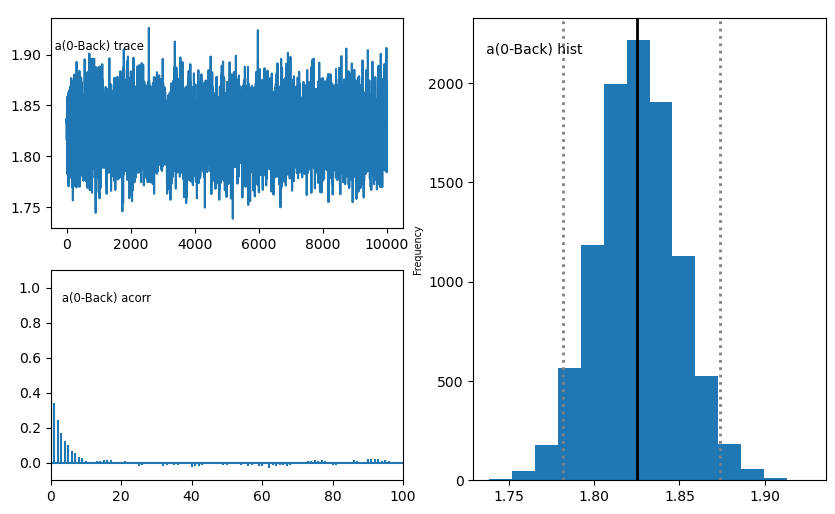

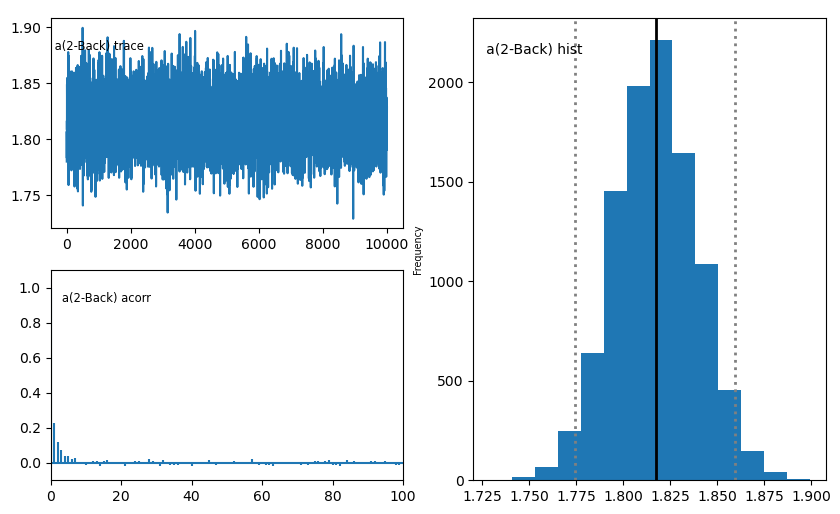

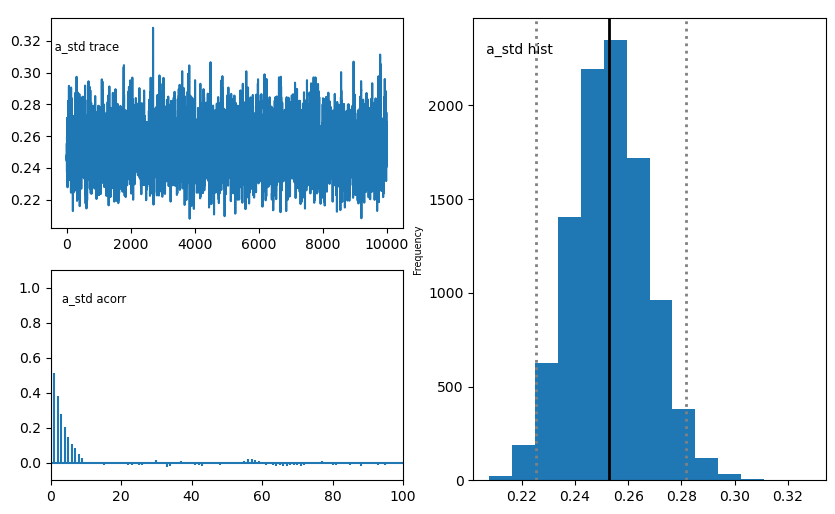

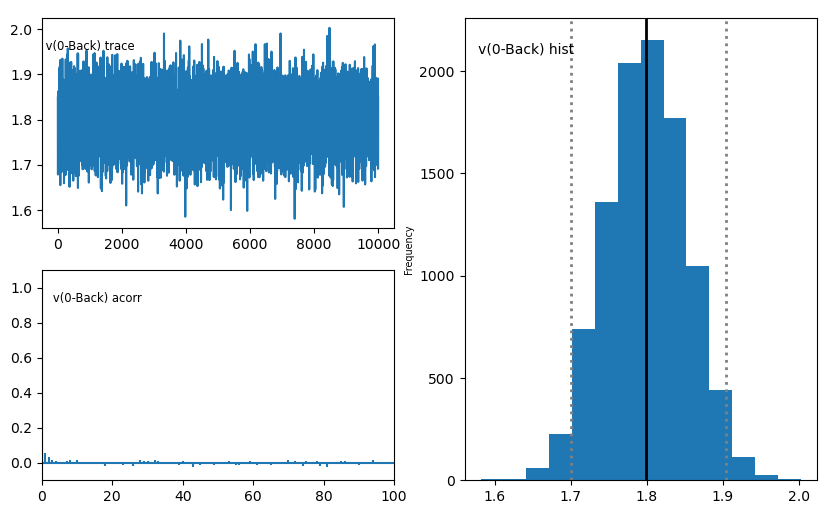

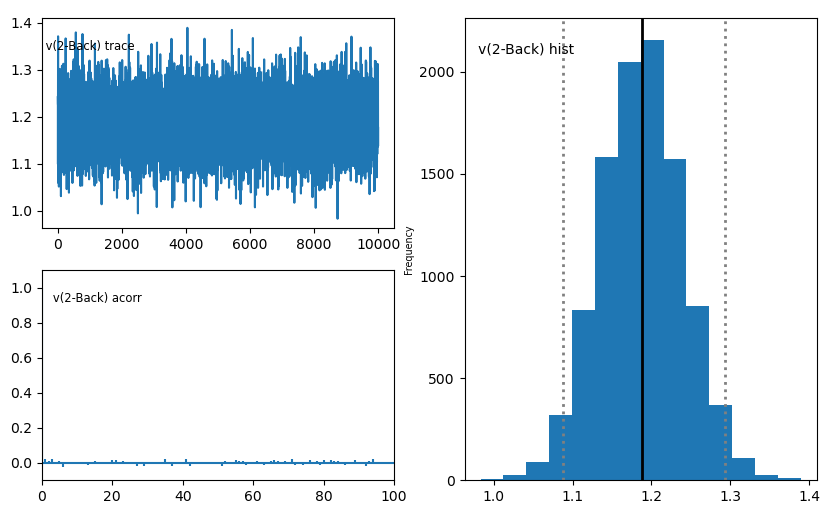

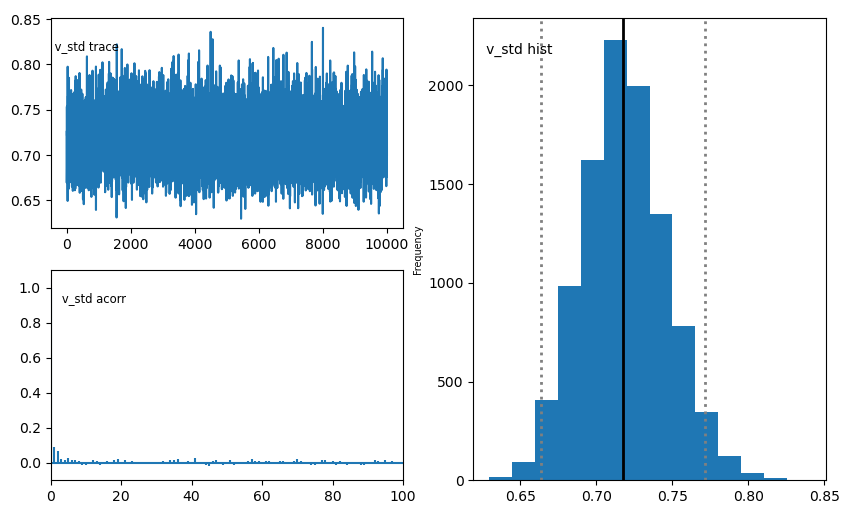

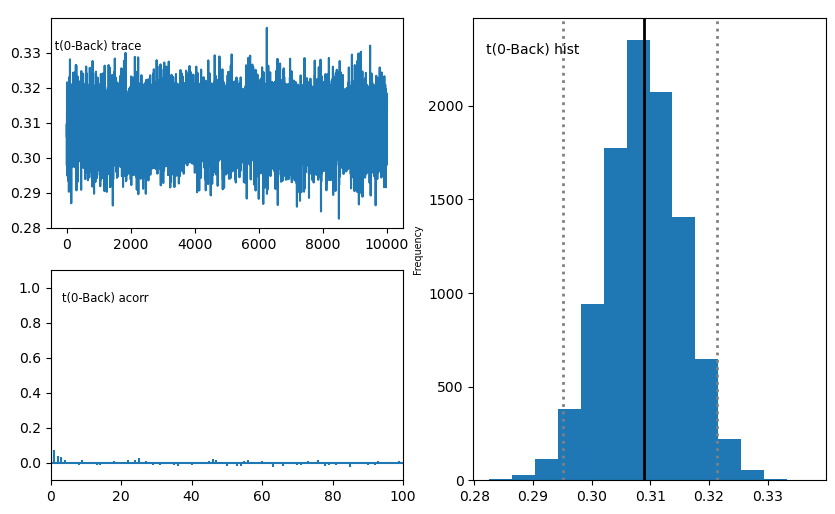

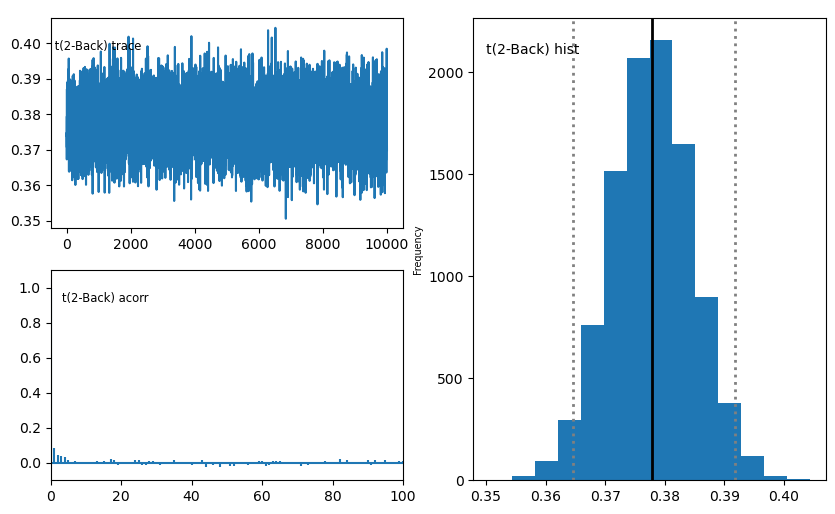

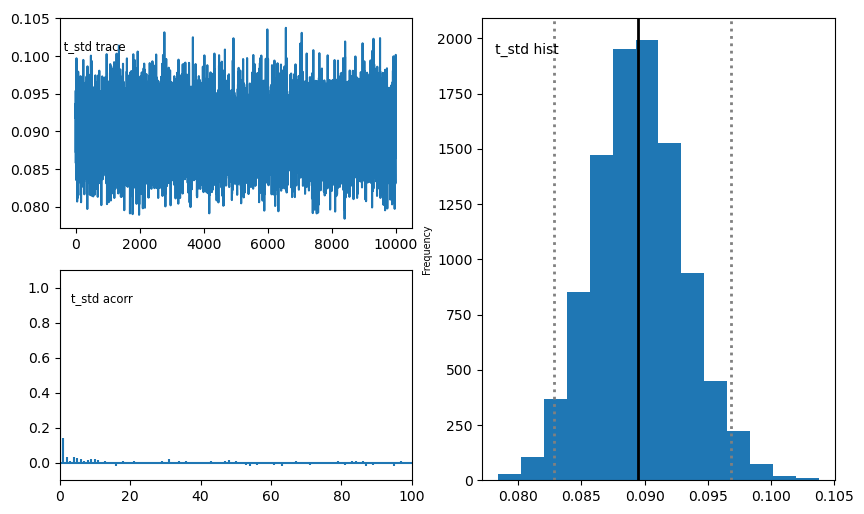

In [11]:

# Load the saved model
model_path = "WM_model/model_nback_main.pkl"
model_nback = hddm.load(model_path)

# Plot posterior distributions
model_nback.plot_posteriors()


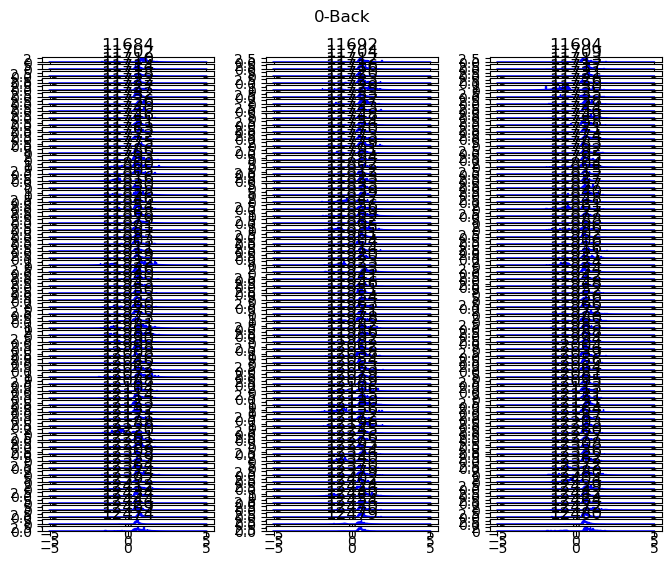

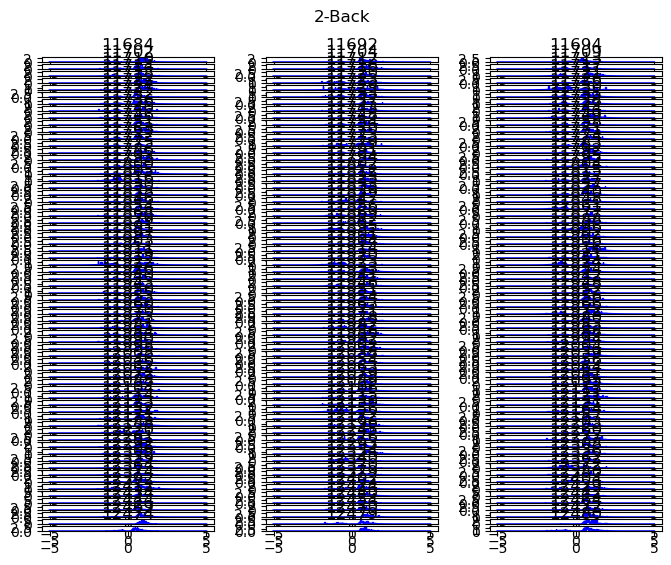

In [12]:
model_nback.plot_posterior_predictive()

In [14]:
print(model_nback.nodes_db)

                     knode_name stochastic observed   subj   
a(0-Back)                     a       True    False  False  \
a(2-Back)                     a       True    False  False   
a_std                     a_std       True    False  False   
a_tau                     a_tau      False    False  False   
a_subj(0-Back).11684     a_subj       True    False   True   
...                         ...        ...      ...    ...   
wfpt(2-Back).12470         wfpt      False     True  False   
wfpt(2-Back).12472         wfpt      False     True  False   
wfpt(2-Back).12474         wfpt      False     True  False   
wfpt(2-Back).12479         wfpt      False     True  False   
wfpt(2-Back).12480         wfpt      False     True  False   

                                      node        tag                depends   
a(0-Back)                        a(0-Back)  (0-Back,)            [BlockType]  \
a(2-Back)                        a(2-Back)  (2-Back,)            [BlockType]   
a_std          

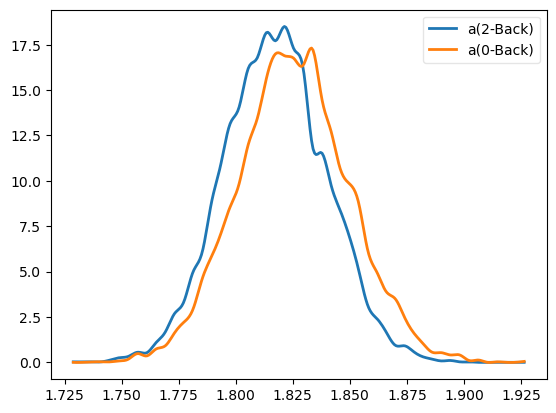

In [16]:
hddm.analyze.plot_posterior_nodes(model_nback.nodes_db.loc[['a(2-Back)', 'a(0-Back)'], 'node'])

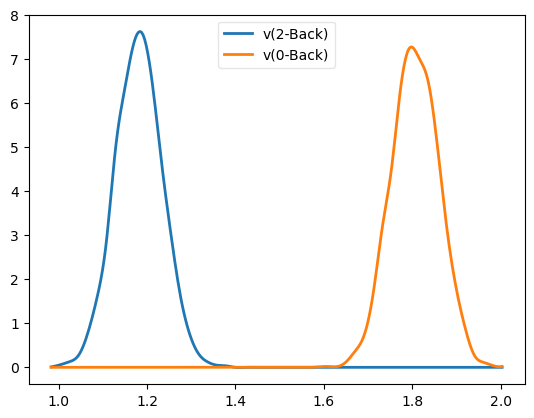

In [15]:
hddm.analyze.plot_posterior_nodes(model_nback.nodes_db.loc[['v(2-Back)', 'v(0-Back)'], 'node'])

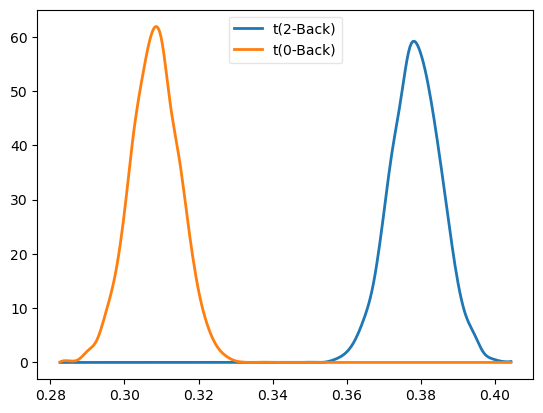

In [17]:
hddm.analyze.plot_posterior_nodes(model_nback.nodes_db.loc[['t(2-Back)', 't(0-Back)'], 'node'])

In [4]:
model_nback_TargetType = {
    "include": ['a', 'v', 't'],
    "informative": False,
    "is_group_model": True,
    "depends_on": {
        'a': ['BlockType', 'TargetType'],
        'v': ['BlockType', 'TargetType'],
        't': ['BlockType', 'TargetType']
    },
    "p_outlier": 0.05
}

model_stimulus_TargetType = {
    "include": ['a', 'v', 't'],
    "informative": False,
    "is_group_model": True,
    "depends_on": {
        'a': ['StimType', 'TargetType'],
        'v': ['StimType', 'TargetType'],
        't': ['StimType', 'TargetType']
    },
    "p_outlier": 0.05
}

model_condition_interaction_TargetType = {
    "include": ['a', 'v', 't'],
    "informative": False,
    "is_group_model": True,
    "depends_on": {
        'a': ['BlockType', 'StimType', 'TargetType'],
        'v': ['BlockType', 'StimType', 'TargetType'],
        't': ['BlockType', 'StimType', 'TargetType']
    },
    "p_outlier": 0.05
}


In [7]:
# Define output folder
output_dir = "WM_model"

# Create the folder if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Define renamed model settings
models = {
    "model_nback_TargetType": model_nback_TargetType
}

# Loop through each model
for model_name, model_settings in models.items():

    print(f"\n--- Processing HDDM for {model_name} ---")

    # Unique file and model names with full paths
    model_var_name = model_name
    db_name = os.path.join(output_dir, f'traces_{model_var_name}.db')
    nc_name = os.path.join(output_dir, f'{model_var_name}_infdata.nc')
    model_save_name = os.path.join(output_dir, f'{model_var_name}.pkl')
    summary_csv_name = os.path.join(output_dir, f'{model_var_name}_summary.csv')

    # Build HDDM model
    model = hddm.HDDM(dataset, **model_settings)

    # Find starting values
    model.find_starting_values()

    # Sample from the posterior
    infdata = model.sample(
        6000,
        burn=1000,
        thin=2,
        chains=4,
        dbname=db_name,
        db='pickle',
        return_infdata=True
    )

    # Save model and inference outputs
    model.save(model_save_name)
    az.to_netcdf(infdata, nc_name)

    # Generate and save posterior summary to CSV
    summary = az.summary(infdata, round_to=4)
    summary.to_csv(summary_csv_name)

    print(f"Saved model: {model_save_name}")
    print(f"Saved NetCDF: {nc_name}")
    print(f"Saved ArviZ summary CSV: {summary_csv_name}")



--- Processing HDDM for model_nback_TargetType ---
No model attribute --> setting up standard HDDM
Set model to ddm


/opt/conda/lib/python3.9/site-packages/scipy/optimize/_optimize.py:2309: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/opt/conda/lib/python3.9/site-packages/scipy/optimize/_optimize.py:2309: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/opt/conda/lib/python3.9/site-packages/scipy/optimize/_optimize.py:2309: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/opt/conda/lib/python3.9/site-packages/scipy/optimize/_optimize.py:2309: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/opt/conda/lib/python3.9/site-packages/scipy/optimize/_optimize.py:2309: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


[                  0%                  ] 2 of 6000 complete in 4.1 sec
[                  0%                  ] 3 of 6000 complete in 7.9 sec
[                  0%                  ] 4 of 6000 complete in 11.8 sec
[                  0%                  ] 5 of 6000 complete in 15.7 sec
[                  0%                  ] 6 of 6000 complete in 19.9 sec
[                  0%                  ] 7 of 6000 complete in 24.1 sec
[                  0%                  ] 8 of 6000 complete in 28.1 sec
[                  0%                  ] 9 of 6000 complete in 32.1 sec
[                  0%                  ] 10 of 6000 complete in 36.1 sec
[                  0%                  ] 11 of 6000 complete in 40.4 sec
[                  0%                  ] 12 of 6000 complete in 44.7 sec
[                  0%                  ] 13 of 6000 complete in 48.4 sec
[                  0%                  ] 14 of 6000 complete in 52.8 sec
[                  0%                  ] 15 of 6000 complete 

[                  1%                  ] 112 of 6000 complete in 463.1 sec[                  0%                  ] 2 of 6000 complete in 4.4 sec
[                  0%                  ] 3 of 6000 complete in 8.2 sec
[                  0%                  ] 4 of 6000 complete in 12.5 sec
[                  0%                  ] 5 of 6000 complete in 16.8 sec
[                  0%                  ] 6 of 6000 complete in 21.5 sec
[                  0%                  ] 7 of 6000 complete in 25.9 sec
[                  0%                  ] 8 of 6000 complete in 30.6 sec
[                  0%                  ] 9 of 6000 complete in 34.9 sec
[                  0%                  ] 10 of 6000 complete in 39.7 sec
[                  0%                  ] 11 of 6000 complete in 44.2 sec
[                  0%                  ] 12 of 6000 complete in 48.2 sec
[                  0%                  ] 13 of 6000 complete in 52.3 sec
[                  0%                  ] 14 of 6000 complete

[                  0%                  ] 2 of 6000 complete in 4.8 sec
[                  0%                  ] 3 of 6000 complete in 9.0 sec
[                  0%                  ] 4 of 6000 complete in 13.0 sec
[                  0%                  ] 5 of 6000 complete in 17.5 sec
[                  0%                  ] 6 of 6000 complete in 22.1 sec
[                  0%                  ] 7 of 6000 complete in 26.5 sec
[                  0%                  ] 8 of 6000 complete in 30.6 sec
[                  0%                  ] 9 of 6000 complete in 35.2 sec
[                  0%                  ] 10 of 6000 complete in 39.2 sec
[                  0%                  ] 11 of 6000 complete in 43.6 sec
[                  0%                  ] 12 of 6000 complete in 47.9 sec
[                  0%                  ] 13 of 6000 complete in 52.1 sec
[                  0%                  ] 14 of 6000 complete in 55.9 sec
[                  0%                  ] 15 of 6000 complete 


[                  1%                  ] 113 of 6000 complete in 467.9 sec
[                  1%                  ] 114 of 6000 complete in 472.6 sec
[                  1%                  ] 115 of 6000 complete in 477.7 sec
[                  1%                  ] 116 of 6000 complete in 482.0 sec
[                  1%                  ] 117 of 6000 complete in 486.3 sec
[                  1%                  ] 118 of 6000 complete in 490.9 sec
[                  1%                  ] 119 of 6000 complete in 495.4 sec
[                  2%                  ] 120 of 6000 complete in 499.9 sec
[                  2%                  ] 121 of 6000 complete in 504.1 sec
[                  2%                  ] 122 of 6000 complete in 508.6 sec
[                  2%                  ] 123 of 6000 complete in 512.4 sec
[                  2%                  ] 124 of 6000 complete in 516.8 sec
[                  2%                  ] 125 of 6000 complete in 520.8 sec
[                  2%   

[                  1%                  ] 112 of 6000 complete in 494.3 sec
[                  1%                  ] 113 of 6000 complete in 498.7 sec
[                  1%                  ] 114 of 6000 complete in 502.6 sec
[                  1%                  ] 115 of 6000 complete in 507.0 sec
[                  1%                  ] 116 of 6000 complete in 511.4 sec
[                  1%                  ] 117 of 6000 complete in 516.1 sec
[                  1%                  ] 118 of 6000 complete in 520.2 sec
[                  1%                  ] 119 of 6000 complete in 524.5 sec
[                  2%                  ] 120 of 6000 complete in 528.9 sec
[                  2%                  ] 121 of 6000 complete in 533.2 sec
[                  2%                  ] 122 of 6000 complete in 537.4 sec
[                  2%                  ] 123 of 6000 complete in 541.8 sec
[                  2%                  ] 124 of 6000 complete in 546.4 sec
[                  2%    

[-                 3%                  ] 222 of 6000 complete in 929.0 sec
[-                 3%                  ] 223 of 6000 complete in 933.3 sec
[-                 3%                  ] 224 of 6000 complete in 937.2 sec
[-                 3%                  ] 225 of 6000 complete in 941.8 sec
[-                 3%                  ] 226 of 6000 complete in 945.9 sec
[-                 3%                  ] 227 of 6000 complete in 950.1 sec
[-                 3%                  ] 228 of 6000 complete in 954.4 sec
[-                 3%                  ] 229 of 6000 complete in 959.2 sec
[-                 3%                  ] 230 of 6000 complete in 963.8 sec
[-                 3%                  ] 231 of 6000 complete in 968.5 sec
[-                 3%                  ] 232 of 6000 complete in 973.1 sec
[-                 3%                  ] 233 of 6000 complete in 977.2 sec
[-                 3%                  ] 234 of 6000 complete in 981.7 sec
[-                 3%    

[-                 3%                  ] 221 of 6000 complete in 983.0 sec
[-                 3%                  ] 222 of 6000 complete in 987.9 sec
[-                 3%                  ] 223 of 6000 complete in 992.6 sec
[-                 3%                  ] 224 of 6000 complete in 997.1 sec
[-                 3%                  ] 225 of 6000 complete in 1001.5 sec
[-                 3%                  ] 226 of 6000 complete in 1005.7 sec
[-                 3%                  ] 227 of 6000 complete in 1009.9 sec
[-                 3%                  ] 228 of 6000 complete in 1014.1 sec
[-                 3%                  ] 229 of 6000 complete in 1018.2 sec
[-                 3%                  ] 230 of 6000 complete in 1022.8 sec
[-                 3%                  ] 231 of 6000 complete in 1027.2 sec
[-                 3%                  ] 232 of 6000 complete in 1031.5 sec
[-                 3%                  ] 233 of 6000 complete in 1035.8 sec
[-              

[--                5%                  ] 330 of 6000 complete in 1382.6 sec
[--                5%                  ] 331 of 6000 complete in 1387.4 sec
[--                5%                  ] 332 of 6000 complete in 1391.7 sec
[--                5%                  ] 333 of 6000 complete in 1396.0 sec
[--                5%                  ] 334 of 6000 complete in 1400.5 sec
[--                5%                  ] 335 of 6000 complete in 1404.8 sec
[--                5%                  ] 336 of 6000 complete in 1409.4 sec
[--                5%                  ] 337 of 6000 complete in 1413.6 sec
[--                5%                  ] 338 of 6000 complete in 1418.1 sec
[--                5%                  ] 339 of 6000 complete in 1422.4 sec
[--                5%                  ] 340 of 6000 complete in 1426.6 sec
[--                5%                  ] 341 of 6000 complete in 1430.9 sec
[--                5%                  ] 342 of 6000 complete in 1434.9 sec
[--         

[--                5%                  ] 328 of 6000 complete in 1459.0 sec
[--                5%                  ] 329 of 6000 complete in 1463.4 sec
[--                5%                  ] 330 of 6000 complete in 1467.9 sec
[--                5%                  ] 331 of 6000 complete in 1472.3 sec
[--                5%                  ] 332 of 6000 complete in 1476.9 sec
[--                5%                  ] 333 of 6000 complete in 1481.2 sec
[--                5%                  ] 334 of 6000 complete in 1485.3 sec
[--                5%                  ] 335 of 6000 complete in 1490.2 sec
[--                5%                  ] 336 of 6000 complete in 1494.6 sec
[--                5%                  ] 337 of 6000 complete in 1499.0 sec
[--                5%                  ] 338 of 6000 complete in 1503.6 sec
[--                5%                  ] 339 of 6000 complete in 1508.0 sec
[--                5%                  ] 340 of 6000 complete in 1512.8 sec
[--         

[--                7%                  ] 437 of 6000 complete in 1835.7 sec
[--                7%                  ] 438 of 6000 complete in 1839.7 sec
[--                7%                  ] 439 of 6000 complete in 1843.9 sec
[--                7%                  ] 440 of 6000 complete in 1848.9 sec
[--                7%                  ] 441 of 6000 complete in 1854.5 sec
[--                7%                  ] 442 of 6000 complete in 1859.5 sec
[--                7%                  ] 443 of 6000 complete in 1864.7 sec
[--                7%                  ] 444 of 6000 complete in 1869.2 sec
[--                7%                  ] 445 of 6000 complete in 1873.5 sec
[--                7%                  ] 446 of 6000 complete in 1877.6 sec
[--                7%                  ] 447 of 6000 complete in 1882.0 sec
[--                7%                  ] 448 of 6000 complete in 1886.3 sec
[--                7%                  ] 449 of 6000 complete in 1890.8 sec
[--         

[--                7%                  ] 435 of 6000 complete in 1943.5 sec
[--                7%                  ] 436 of 6000 complete in 1947.8 sec
[--                7%                  ] 437 of 6000 complete in 1952.5 sec
[--                7%                  ] 438 of 6000 complete in 1957.0 sec
[--                7%                  ] 439 of 6000 complete in 1961.5 sec
[--                7%                  ] 440 of 6000 complete in 1965.9 sec
[--                7%                  ] 441 of 6000 complete in 1970.7 sec
[--                7%                  ] 442 of 6000 complete in 1974.7 sec
[--                7%                  ] 443 of 6000 complete in 1979.1 sec
[--                7%                  ] 444 of 6000 complete in 1983.2 sec
[--                7%                  ] 445 of 6000 complete in 1987.5 sec
[--                7%                  ] 446 of 6000 complete in 1992.5 sec
[--                7%                  ] 447 of 6000 complete in 1996.6 sec
[--         

[---               9%                  ] 544 of 6000 complete in 2290.3 sec
[---               9%                  ] 545 of 6000 complete in 2294.8 sec
[---               9%                  ] 546 of 6000 complete in 2299.1 sec
[---               9%                  ] 547 of 6000 complete in 2303.9 sec
[---               9%                  ] 548 of 6000 complete in 2308.1 sec
[---               9%                  ] 549 of 6000 complete in 2312.6 sec
[---               9%                  ] 550 of 6000 complete in 2317.1 sec
[---               9%                  ] 551 of 6000 complete in 2321.3 sec
[---               9%                  ] 552 of 6000 complete in 2325.3 sec
[---               9%                  ] 553 of 6000 complete in 2329.5 sec
[---               9%                  ] 554 of 6000 complete in 2334.8 sec
[---               9%                  ] 555 of 6000 complete in 2339.3 sec
[---               9%                  ] 556 of 6000 complete in 2343.2 sec
[---        

[---               9%                  ] 542 of 6000 complete in 2429.2 sec
[---               9%                  ] 543 of 6000 complete in 2433.6 sec
[---               9%                  ] 544 of 6000 complete in 2437.9 sec
[---               9%                  ] 545 of 6000 complete in 2442.4 sec
[---               9%                  ] 546 of 6000 complete in 2446.7 sec
[---               9%                  ] 547 of 6000 complete in 2451.0 sec
[---               9%                  ] 548 of 6000 complete in 2455.2 sec
[---               9%                  ] 549 of 6000 complete in 2459.6 sec
[---               9%                  ] 550 of 6000 complete in 2464.2 sec
[---               9%                  ] 551 of 6000 complete in 2469.1 sec
[---               9%                  ] 552 of 6000 complete in 2473.7 sec
[---               9%                  ] 553 of 6000 complete in 2478.4 sec
[---               9%                  ] 554 of 6000 complete in 2482.9 sec
[---        

[----             10%                  ] 651 of 6000 complete in 2749.6 sec
[----             10%                  ] 652 of 6000 complete in 2753.6 sec
[----             10%                  ] 653 of 6000 complete in 2757.9 sec
[----             10%                  ] 654 of 6000 complete in 2762.2 sec
[----             10%                  ] 655 of 6000 complete in 2766.7 sec
[----             10%                  ] 656 of 6000 complete in 2771.2 sec
[----             10%                  ] 657 of 6000 complete in 2775.6 sec
[----             10%                  ] 658 of 6000 complete in 2780.0 sec
[----             10%                  ] 659 of 6000 complete in 2784.2 sec
[----             11%                  ] 660 of 6000 complete in 2788.7 sec
[----             11%                  ] 661 of 6000 complete in 2793.3 sec
[----             11%                  ] 662 of 6000 complete in 2797.2 sec
[----             11%                  ] 663 of 6000 complete in 2800.9 sec
[----       

[----             10%                  ] 649 of 6000 complete in 2915.0 sec
[----             10%                  ] 650 of 6000 complete in 2919.8 sec
[----             10%                  ] 651 of 6000 complete in 2924.3 sec
[----             10%                  ] 652 of 6000 complete in 2928.6 sec
[----             10%                  ] 653 of 6000 complete in 2932.8 sec
[----             10%                  ] 654 of 6000 complete in 2937.3 sec
[----             10%                  ] 655 of 6000 complete in 2941.6 sec
[----             10%                  ] 656 of 6000 complete in 2946.1 sec
[----             10%                  ] 657 of 6000 complete in 2950.4 sec
[----             10%                  ] 658 of 6000 complete in 2954.4 sec
[----             10%                  ] 659 of 6000 complete in 2958.5 sec
[----             11%                  ] 660 of 6000 complete in 2962.7 sec
[----             11%                  ] 661 of 6000 complete in 2967.6 sec
[----       

[----             12%                  ] 758 of 6000 complete in 3195.5 sec
[----             12%                  ] 759 of 6000 complete in 3200.0 sec
[----             12%                  ] 760 of 6000 complete in 3204.4 sec
[----             12%                  ] 761 of 6000 complete in 3208.6 sec
[----             12%                  ] 762 of 6000 complete in 3212.8 sec
[----             12%                  ] 763 of 6000 complete in 3217.2 sec
[----             12%                  ] 764 of 6000 complete in 3221.3 sec
[----             12%                  ] 765 of 6000 complete in 3225.4 sec
[----             12%                  ] 766 of 6000 complete in 3229.7 sec
[----             12%                  ] 767 of 6000 complete in 3234.4 sec
[----             12%                  ] 768 of 6000 complete in 3238.7 sec
[----             12%                  ] 769 of 6000 complete in 3243.1 sec
[----             12%                  ] 770 of 6000 complete in 3248.0 sec
[----       

[----             12%                  ] 756 of 6000 complete in 3390.2 sec
[----             12%                  ] 757 of 6000 complete in 3394.8 sec
[----             12%                  ] 758 of 6000 complete in 3399.3 sec
[----             12%                  ] 759 of 6000 complete in 3404.1 sec
[----             12%                  ] 760 of 6000 complete in 3408.3 sec
[----             12%                  ] 761 of 6000 complete in 3412.7 sec
[----             12%                  ] 762 of 6000 complete in 3416.9 sec
[----             12%                  ] 763 of 6000 complete in 3421.1 sec
[----             12%                  ] 764 of 6000 complete in 3425.4 sec
[----             12%                  ] 765 of 6000 complete in 3429.7 sec
[----             12%                  ] 766 of 6000 complete in 3433.9 sec
[----             12%                  ] 767 of 6000 complete in 3438.7 sec
[----             12%                  ] 768 of 6000 complete in 3443.0 sec
[----       

[-----            14%                  ] 865 of 6000 complete in 3649.5 sec
[-----            14%                  ] 866 of 6000 complete in 3653.6 sec
[-----            14%                  ] 867 of 6000 complete in 3657.5 sec
[-----            14%                  ] 868 of 6000 complete in 3662.0 sec
[-----            14%                  ] 869 of 6000 complete in 3666.5 sec
[-----            14%                  ] 870 of 6000 complete in 3671.4 sec
[-----            14%                  ] 871 of 6000 complete in 3675.8 sec
[-----            14%                  ] 872 of 6000 complete in 3680.2 sec
[-----            14%                  ] 873 of 6000 complete in 3684.7 sec
[-----            14%                  ] 874 of 6000 complete in 3688.6 sec
[-----            14%                  ] 875 of 6000 complete in 3693.3 sec
[-----            14%                  ] 876 of 6000 complete in 3697.2 sec
[-----            14%                  ] 877 of 6000 complete in 3701.5 sec
[-----      

[-----            14%                  ] 863 of 6000 complete in 3865.9 sec
[-----            14%                  ] 864 of 6000 complete in 3870.2 sec
[-----            14%                  ] 865 of 6000 complete in 3874.6 sec
[-----            14%                  ] 866 of 6000 complete in 3879.0 sec
[-----            14%                  ] 867 of 6000 complete in 3883.4 sec
[-----            14%                  ] 868 of 6000 complete in 3887.9 sec
[-----            14%                  ] 869 of 6000 complete in 3892.3 sec
[-----            14%                  ] 870 of 6000 complete in 3896.3 sec
[-----            14%                  ] 871 of 6000 complete in 3900.3 sec
[-----            14%                  ] 872 of 6000 complete in 3904.6 sec
[-----            14%                  ] 873 of 6000 complete in 3908.5 sec
[-----            14%                  ] 874 of 6000 complete in 3913.0 sec
[-----            14%                  ] 875 of 6000 complete in 3917.7 sec
[-----      

[------           16%                  ] 972 of 6000 complete in 4099.8 sec
[------           16%                  ] 973 of 6000 complete in 4104.5 sec
[------           16%                  ] 974 of 6000 complete in 4108.9 sec
[------           16%                  ] 975 of 6000 complete in 4113.1 sec
[------           16%                  ] 976 of 6000 complete in 4117.5 sec
[------           16%                  ] 977 of 6000 complete in 4121.7 sec
[------           16%                  ] 978 of 6000 complete in 4125.9 sec
[------           16%                  ] 979 of 6000 complete in 4129.7 sec
[------           16%                  ] 980 of 6000 complete in 4133.8 sec
[------           16%                  ] 981 of 6000 complete in 4137.7 sec
[------           16%                  ] 982 of 6000 complete in 4142.0 sec
[------           16%                  ] 983 of 6000 complete in 4146.3 sec
[------           16%                  ] 984 of 6000 complete in 4150.1 sec
[------     

[------           16%                  ] 970 of 6000 complete in 4345.4 sec
[------           16%                  ] 971 of 6000 complete in 4350.1 sec
[------           16%                  ] 972 of 6000 complete in 4354.8 sec
[------           16%                  ] 973 of 6000 complete in 4359.6 sec
[------           16%                  ] 974 of 6000 complete in 4363.8 sec
[------           16%                  ] 975 of 6000 complete in 4368.8 sec
[------           16%                  ] 976 of 6000 complete in 4373.5 sec
[------           16%                  ] 977 of 6000 complete in 4378.1 sec
[------           16%                  ] 978 of 6000 complete in 4382.5 sec
[------           16%                  ] 979 of 6000 complete in 4386.9 sec
[------           16%                  ] 980 of 6000 complete in 4391.4 sec
[------           16%                  ] 981 of 6000 complete in 4396.1 sec
[------           16%                  ] 982 of 6000 complete in 4400.6 sec
[------     

[------           17%                  ] 1078 of 6000 complete in 4555.1 sec
[------           17%                  ] 1079 of 6000 complete in 4559.8 sec
[------           18%                  ] 1080 of 6000 complete in 4564.0 sec
[------           18%                  ] 1081 of 6000 complete in 4568.3 sec
[------           18%                  ] 1082 of 6000 complete in 4573.5 sec
[------           18%                  ] 1083 of 6000 complete in 4578.4 sec
[------           18%                  ] 1084 of 6000 complete in 4582.8 sec
[------           18%                  ] 1085 of 6000 complete in 4587.8 sec
[------           18%                  ] 1086 of 6000 complete in 4592.3 sec
[------           18%                  ] 1087 of 6000 complete in 4596.6 sec
[------           18%                  ] 1088 of 6000 complete in 4600.6 sec
[------           18%                  ] 1089 of 6000 complete in 4604.6 sec
[------           18%                  ] 1090 of 6000 complete in 4608.8 sec

[------           17%                  ] 1076 of 6000 complete in 4823.9 sec
[------           17%                  ] 1077 of 6000 complete in 4828.3 sec
[------           17%                  ] 1078 of 6000 complete in 4832.6 sec
[------           17%                  ] 1079 of 6000 complete in 4837.3 sec
[------           18%                  ] 1080 of 6000 complete in 4841.8 sec
[------           18%                  ] 1081 of 6000 complete in 4846.3 sec
[------           18%                  ] 1082 of 6000 complete in 4850.9 sec
[------           18%                  ] 1083 of 6000 complete in 4855.1 sec
[------           18%                  ] 1084 of 6000 complete in 4859.8 sec
[------           18%                  ] 1085 of 6000 complete in 4864.6 sec
[------           18%                  ] 1086 of 6000 complete in 4869.0 sec
[------           18%                  ] 1087 of 6000 complete in 4873.8 sec
[------           18%                  ] 1088 of 6000 complete in 4878.2 sec

[-------          19%                  ] 1184 of 6000 complete in 5010.1 sec
[-------          19%                  ] 1185 of 6000 complete in 5014.8 sec
[-------          19%                  ] 1186 of 6000 complete in 5018.7 sec
[-------          19%                  ] 1187 of 6000 complete in 5022.6 sec
[-------          19%                  ] 1188 of 6000 complete in 5026.9 sec
[-------          19%                  ] 1189 of 6000 complete in 5031.5 sec
[-------          19%                  ] 1190 of 6000 complete in 5036.5 sec
[-------          19%                  ] 1191 of 6000 complete in 5041.3 sec
[-------          19%                  ] 1192 of 6000 complete in 5045.6 sec
[-------          19%                  ] 1193 of 6000 complete in 5049.7 sec
[-------          19%                  ] 1194 of 6000 complete in 5054.5 sec
[-------          19%                  ] 1195 of 6000 complete in 5058.7 sec
[-------          19%                  ] 1196 of 6000 complete in 5062.5 sec

[-------          19%                  ] 1182 of 6000 complete in 5299.9 sec
[-------          19%                  ] 1183 of 6000 complete in 5304.2 sec
[-------          19%                  ] 1184 of 6000 complete in 5308.7 sec
[-------          19%                  ] 1185 of 6000 complete in 5313.3 sec
[-------          19%                  ] 1186 of 6000 complete in 5318.2 sec
[-------          19%                  ] 1187 of 6000 complete in 5323.1 sec
[-------          19%                  ] 1188 of 6000 complete in 5327.5 sec
[-------          19%                  ] 1189 of 6000 complete in 5331.8 sec
[-------          19%                  ] 1190 of 6000 complete in 5336.9 sec
[-------          19%                  ] 1191 of 6000 complete in 5341.6 sec
[-------          19%                  ] 1192 of 6000 complete in 5346.4 sec
[-------          19%                  ] 1193 of 6000 complete in 5350.5 sec
[-------          19%                  ] 1194 of 6000 complete in 5355.3 sec

[--------         21%                  ] 1290 of 6000 complete in 5456.9 sec
[--------         21%                  ] 1291 of 6000 complete in 5461.4 sec
[--------         21%                  ] 1292 of 6000 complete in 5465.8 sec
[--------         21%                  ] 1293 of 6000 complete in 5470.3 sec
[--------         21%                  ] 1294 of 6000 complete in 5474.8 sec
[--------         21%                  ] 1295 of 6000 complete in 5480.0 sec
[--------         21%                  ] 1296 of 6000 complete in 5484.2 sec
[--------         21%                  ] 1297 of 6000 complete in 5488.1 sec
[--------         21%                  ] 1298 of 6000 complete in 5492.5 sec
[--------         21%                  ] 1299 of 6000 complete in 5497.5 sec
[--------         21%                  ] 1300 of 6000 complete in 5502.0 sec
[--------         21%                  ] 1301 of 6000 complete in 5506.9 sec
[--------         21%                  ] 1302 of 6000 complete in 5510.9 sec

[--------         21%                  ] 1288 of 6000 complete in 5776.0 sec
[--------         21%                  ] 1289 of 6000 complete in 5780.4 sec
[--------         21%                  ] 1290 of 6000 complete in 5785.0 sec
[--------         21%                  ] 1291 of 6000 complete in 5789.7 sec
[--------         21%                  ] 1292 of 6000 complete in 5794.5 sec
[--------         21%                  ] 1293 of 6000 complete in 5799.1 sec
[--------         21%                  ] 1294 of 6000 complete in 5803.6 sec
[--------         21%                  ] 1295 of 6000 complete in 5808.4 sec
[--------         21%                  ] 1296 of 6000 complete in 5813.1 sec
[--------         21%                  ] 1297 of 6000 complete in 5817.4 sec
[--------         21%                  ] 1298 of 6000 complete in 5822.0 sec
[--------         21%                  ] 1299 of 6000 complete in 5826.7 sec
[--------         21%                  ] 1300 of 6000 complete in 5831.0 sec

[--------         23%                  ] 1396 of 6000 complete in 5911.4 sec
[--------         23%                  ] 1397 of 6000 complete in 5915.9 sec
[--------         23%                  ] 1398 of 6000 complete in 5920.2 sec
[--------         23%                  ] 1399 of 6000 complete in 5924.6 sec
[--------         23%                  ] 1400 of 6000 complete in 5929.1 sec
[--------         23%                  ] 1401 of 6000 complete in 5933.8 sec
[--------         23%                  ] 1402 of 6000 complete in 5938.4 sec
[--------         23%                  ] 1403 of 6000 complete in 5942.6 sec
[--------         23%                  ] 1404 of 6000 complete in 5947.0 sec
[--------         23%                  ] 1405 of 6000 complete in 5951.8 sec
[--------         23%                  ] 1406 of 6000 complete in 5956.0 sec
[--------         23%                  ] 1407 of 6000 complete in 5960.2 sec
[--------         23%                  ] 1408 of 6000 complete in 5964.5 sec

[--------         23%                  ] 1394 of 6000 complete in 6255.3 sec
[--------         23%                  ] 1395 of 6000 complete in 6259.8 sec
[--------         23%                  ] 1396 of 6000 complete in 6264.5 sec
[--------         23%                  ] 1397 of 6000 complete in 6268.5 sec
[--------         23%                  ] 1398 of 6000 complete in 6273.1 sec
[--------         23%                  ] 1399 of 6000 complete in 6277.2 sec
[--------         23%                  ] 1400 of 6000 complete in 6281.4 sec
[--------         23%                  ] 1401 of 6000 complete in 6285.8 sec
[--------         23%                  ] 1402 of 6000 complete in 6290.3 sec
[--------         23%                  ] 1403 of 6000 complete in 6294.7 sec
[--------         23%                  ] 1404 of 6000 complete in 6299.1 sec
[--------         23%                  ] 1405 of 6000 complete in 6303.9 sec
[--------         23%                  ] 1406 of 6000 complete in 6308.5 sec

[---------        25%                  ] 1502 of 6000 complete in 6370.5 sec
[---------        25%                  ] 1503 of 6000 complete in 6374.9 sec
[---------        25%                  ] 1504 of 6000 complete in 6379.2 sec
[---------        25%                  ] 1505 of 6000 complete in 6383.3 sec
[---------        25%                  ] 1506 of 6000 complete in 6387.6 sec
[---------        25%                  ] 1507 of 6000 complete in 6392.0 sec
[---------        25%                  ] 1508 of 6000 complete in 6396.5 sec
[---------        25%                  ] 1509 of 6000 complete in 6401.1 sec
[---------        25%                  ] 1510 of 6000 complete in 6406.1 sec
[---------        25%                  ] 1511 of 6000 complete in 6410.3 sec
[---------        25%                  ] 1512 of 6000 complete in 6414.5 sec
[---------        25%                  ] 1513 of 6000 complete in 6418.6 sec
[---------        25%                  ] 1514 of 6000 complete in 6422.5 sec

[----------       26%                  ] 1608 of 6000 complete in 6768.2 sec
[----------       26%                  ] 1609 of 6000 complete in 6773.0 sec
[----------       26%                  ] 1610 of 6000 complete in 6777.3 sec
[----------       26%                  ] 1611 of 6000 complete in 6782.4 sec
[----------       26%                  ] 1612 of 6000 complete in 6787.5 sec
[----------       26%                  ] 1613 of 6000 complete in 6791.6 sec
[----------       26%                  ] 1614 of 6000 complete in 6796.4 sec
[----------       26%                  ] 1615 of 6000 complete in 6800.8 sec
[----------       26%                  ] 1616 of 6000 complete in 6804.7 sec
[----------       26%                  ] 1617 of 6000 complete in 6809.5 sec
[----------       26%                  ] 1618 of 6000 complete in 6813.9 sec
[----------       26%                  ] 1619 of 6000 complete in 6818.2 sec
[----------       27%                  ] 1620 of 6000 complete in 6822.5 sec

[----------       26%                  ] 1608 of 6000 complete in 6813.7 sec
[----------       26%                  ] 1609 of 6000 complete in 6818.4 sec
[----------       26%                  ] 1610 of 6000 complete in 6822.9 sec
[----------       26%                  ] 1611 of 6000 complete in 6827.6 sec
[----------       26%                  ] 1612 of 6000 complete in 6832.4 sec
[----------       26%                  ] 1613 of 6000 complete in 6836.9 sec
[----------       26%                  ] 1614 of 6000 complete in 6841.1 sec
[----------       26%                  ] 1615 of 6000 complete in 6845.4 sec
[----------       26%                  ] 1616 of 6000 complete in 6849.7 sec
[----------       26%                  ] 1617 of 6000 complete in 6853.6 sec
[----------       26%                  ] 1618 of 6000 complete in 6857.4 sec
[----------       26%                  ] 1619 of 6000 complete in 6861.8 sec
[----------       27%                  ] 1620 of 6000 complete in 6865.8 sec

[----------       28%                  ] 1714 of 6000 complete in 7209.6 sec
[----------       28%                  ] 1715 of 6000 complete in 7213.6 sec
[----------       28%                  ] 1716 of 6000 complete in 7218.1 sec
[----------       28%                  ] 1717 of 6000 complete in 7222.2 sec
[----------       28%                  ] 1718 of 6000 complete in 7226.2 sec
[----------       28%                  ] 1719 of 6000 complete in 7230.3 sec
[----------       28%                  ] 1720 of 6000 complete in 7234.6 sec
[----------       28%                  ] 1721 of 6000 complete in 7238.8 sec
[----------       28%                  ] 1722 of 6000 complete in 7243.0 sec
[----------       28%                  ] 1723 of 6000 complete in 7247.0 sec
[----------       28%                  ] 1724 of 6000 complete in 7251.4 sec
[----------       28%                  ] 1725 of 6000 complete in 7255.6 sec
[----------       28%                  ] 1726 of 6000 complete in 7260.0 sec

[----------       28%                  ] 1714 of 6000 complete in 7260.0 sec
[----------       28%                  ] 1715 of 6000 complete in 7264.5 sec
[----------       28%                  ] 1716 of 6000 complete in 7268.8 sec
[----------       28%                  ] 1717 of 6000 complete in 7273.2 sec
[----------       28%                  ] 1718 of 6000 complete in 7277.8 sec
[----------       28%                  ] 1719 of 6000 complete in 7282.2 sec
[----------       28%                  ] 1720 of 6000 complete in 7286.6 sec
[----------       28%                  ] 1721 of 6000 complete in 7291.2 sec
[----------       28%                  ] 1722 of 6000 complete in 7295.4 sec
[----------       28%                  ] 1723 of 6000 complete in 7300.4 sec
[----------       28%                  ] 1724 of 6000 complete in 7305.6 sec
[----------       28%                  ] 1725 of 6000 complete in 7310.7 sec
[----------       28%                  ] 1726 of 6000 complete in 7315.3 sec

[-----------      30%                  ] 1820 of 6000 complete in 7663.9 sec
[-----------      30%                  ] 1821 of 6000 complete in 7668.5 sec
[-----------      30%                  ] 1822 of 6000 complete in 7672.6 sec
[-----------      30%                  ] 1823 of 6000 complete in 7677.2 sec
[-----------      30%                  ] 1824 of 6000 complete in 7681.5 sec
[-----------      30%                  ] 1825 of 6000 complete in 7686.3 sec
[-----------      30%                  ] 1826 of 6000 complete in 7690.8 sec
[-----------      30%                  ] 1827 of 6000 complete in 7694.5 sec
[-----------      30%                  ] 1828 of 6000 complete in 7698.9 sec
[-----------      30%                  ] 1829 of 6000 complete in 7703.4 sec
[-----------      30%                  ] 1830 of 6000 complete in 7707.8 sec
[-----------      30%                  ] 1831 of 6000 complete in 7712.4 sec
[-----------      30%                  ] 1832 of 6000 complete in 7716.9 sec

[----------       28%                  ] 1712 of 6000 complete in 7678.4 sec
[----------       28%                  ] 1713 of 6000 complete in 7683.2 sec
[----------       28%                  ] 1714 of 6000 complete in 7688.0 sec
[----------       28%                  ] 1715 of 6000 complete in 7692.9 sec
[----------       28%                  ] 1716 of 6000 complete in 7697.6 sec
[----------       28%                  ] 1717 of 6000 complete in 7702.1 sec
[----------       28%                  ] 1718 of 6000 complete in 7706.6 sec
[----------       28%                  ] 1719 of 6000 complete in 7711.4 sec
[----------       28%                  ] 1720 of 6000 complete in 7716.1 sec
[----------       28%                  ] 1721 of 6000 complete in 7720.6 sec
[----------       28%                  ] 1722 of 6000 complete in 7725.0 sec
[----------       28%                  ] 1723 of 6000 complete in 7728.9 sec
[----------       28%                  ] 1724 of 6000 complete in 7733.4 sec

[------------     32%                  ] 1926 of 6000 complete in 8120.1 sec
[------------     32%                  ] 1927 of 6000 complete in 8124.6 sec
[------------     32%                  ] 1928 of 6000 complete in 8129.0 sec
[------------     32%                  ] 1929 of 6000 complete in 8133.7 sec
[------------     32%                  ] 1930 of 6000 complete in 8138.5 sec
[------------     32%                  ] 1931 of 6000 complete in 8142.9 sec
[------------     32%                  ] 1932 of 6000 complete in 8147.5 sec
[------------     32%                  ] 1933 of 6000 complete in 8152.3 sec
[------------     32%                  ] 1934 of 6000 complete in 8156.6 sec
[------------     32%                  ] 1935 of 6000 complete in 8160.7 sec
[------------     32%                  ] 1936 of 6000 complete in 8165.2 sec
[------------     32%                  ] 1937 of 6000 complete in 8169.5 sec
[------------     32%                  ] 1938 of 6000 complete in 8174.4 sec

[-----------      30%                  ] 1818 of 6000 complete in 8163.1 sec
[-----------      30%                  ] 1819 of 6000 complete in 8167.7 sec
[-----------      30%                  ] 1820 of 6000 complete in 8172.0 sec
[-----------      30%                  ] 1821 of 6000 complete in 8176.2 sec
[-----------      30%                  ] 1822 of 6000 complete in 8180.6 sec
[-----------      30%                  ] 1823 of 6000 complete in 8184.9 sec
[-----------      30%                  ] 1824 of 6000 complete in 8189.0 sec
[-----------      30%                  ] 1825 of 6000 complete in 8193.5 sec
[-----------      30%                  ] 1826 of 6000 complete in 8198.4 sec
[-----------      30%                  ] 1827 of 6000 complete in 8202.9 sec
[-----------      30%                  ] 1828 of 6000 complete in 8207.8 sec
[-----------      30%                  ] 1829 of 6000 complete in 8212.5 sec
[-----------      30%                  ] 1830 of 6000 complete in 8217.0 sec

[------------     33%                  ] 2032 of 6000 complete in 8574.7 sec
[------------     33%                  ] 2033 of 6000 complete in 8579.0 sec
[------------     33%                  ] 2034 of 6000 complete in 8583.4 sec
[------------     33%                  ] 2035 of 6000 complete in 8588.7 sec
[------------     33%                  ] 2036 of 6000 complete in 8593.2 sec
[------------     33%                  ] 2037 of 6000 complete in 8597.8 sec
[------------     33%                  ] 2038 of 6000 complete in 8602.1 sec
[------------     33%                  ] 2039 of 6000 complete in 8606.4 sec
[------------     34%                  ] 2040 of 6000 complete in 8611.0 sec
[------------     34%                  ] 2041 of 6000 complete in 8615.9 sec
[------------     34%                  ] 2042 of 6000 complete in 8620.3 sec
[------------     34%                  ] 2043 of 6000 complete in 8624.7 sec
[------------     34%                  ] 2044 of 6000 complete in 8629.3 sec

[------------     32%                  ] 1924 of 6000 complete in 8647.1 sec
[------------     32%                  ] 1925 of 6000 complete in 8651.8 sec
[------------     32%                  ] 1926 of 6000 complete in 8656.6 sec
[------------     32%                  ] 1927 of 6000 complete in 8660.7 sec
[------------     32%                  ] 1928 of 6000 complete in 8665.1 sec
[------------     32%                  ] 1929 of 6000 complete in 8669.6 sec
[------------     32%                  ] 1930 of 6000 complete in 8674.4 sec
[------------     32%                  ] 1931 of 6000 complete in 8678.7 sec
[------------     32%                  ] 1932 of 6000 complete in 8682.7 sec
[------------     32%                  ] 1933 of 6000 complete in 8687.0 sec
[------------     32%                  ] 1934 of 6000 complete in 8691.1 sec
[------------     32%                  ] 1935 of 6000 complete in 8695.5 sec
[------------     32%                  ] 1936 of 6000 complete in 8699.9 sec

[-------------    35%                  ] 2138 of 6000 complete in 9034.8 sec
[-------------    35%                  ] 2139 of 6000 complete in 9039.2 sec
[-------------    35%                  ] 2140 of 6000 complete in 9043.8 sec
[-------------    35%                  ] 2141 of 6000 complete in 9048.3 sec
[-------------    35%                  ] 2142 of 6000 complete in 9053.7 sec
[-------------    35%                  ] 2143 of 6000 complete in 9058.4 sec
[-------------    35%                  ] 2144 of 6000 complete in 9063.1 sec
[-------------    35%                  ] 2145 of 6000 complete in 9067.8 sec
[-------------    35%                  ] 2146 of 6000 complete in 9071.9 sec
[-------------    35%                  ] 2147 of 6000 complete in 9075.8 sec
[-------------    35%                  ] 2148 of 6000 complete in 9079.6 sec
[-------------    35%                  ] 2149 of 6000 complete in 9083.9 sec
[-------------    35%                  ] 2150 of 6000 complete in 9087.7 sec

[------------     33%                  ] 2030 of 6000 complete in 9127.0 sec
[------------     33%                  ] 2031 of 6000 complete in 9131.2 sec
[------------     33%                  ] 2032 of 6000 complete in 9135.8 sec
[------------     33%                  ] 2033 of 6000 complete in 9140.4 sec
[------------     33%                  ] 2034 of 6000 complete in 9145.1 sec
[------------     33%                  ] 2035 of 6000 complete in 9150.0 sec
[------------     33%                  ] 2036 of 6000 complete in 9154.3 sec
[------------     33%                  ] 2037 of 6000 complete in 9158.9 sec
[------------     33%                  ] 2038 of 6000 complete in 9163.5 sec
[------------     33%                  ] 2039 of 6000 complete in 9167.7 sec
[------------     34%                  ] 2040 of 6000 complete in 9172.2 sec
[------------     34%                  ] 2041 of 6000 complete in 9176.8 sec
[------------     34%                  ] 2042 of 6000 complete in 9182.3 sec

[--------------   37%                  ] 2244 of 6000 complete in 9486.6 sec
[--------------   37%                  ] 2245 of 6000 complete in 9491.2 sec
[--------------   37%                  ] 2246 of 6000 complete in 9495.4 sec
[--------------   37%                  ] 2247 of 6000 complete in 9499.8 sec
[--------------   37%                  ] 2248 of 6000 complete in 9504.3 sec
[--------------   37%                  ] 2249 of 6000 complete in 9508.6 sec
[--------------   37%                  ] 2250 of 6000 complete in 9512.8 sec
[--------------   37%                  ] 2251 of 6000 complete in 9517.0 sec
[--------------   37%                  ] 2252 of 6000 complete in 9521.4 sec
[--------------   37%                  ] 2253 of 6000 complete in 9525.3 sec
[--------------   37%                  ] 2254 of 6000 complete in 9527.0 sec
[--------------   37%                  ] 2255 of 6000 complete in 9531.1 sec
[--------------   37%                  ] 2256 of 6000 complete in 9535.3 sec

[-------------    35%                  ] 2136 of 6000 complete in 9608.8 sec
[-------------    35%                  ] 2137 of 6000 complete in 9612.7 sec
[-------------    35%                  ] 2138 of 6000 complete in 9617.0 sec
[-------------    35%                  ] 2139 of 6000 complete in 9621.5 sec
[-------------    35%                  ] 2140 of 6000 complete in 9625.9 sec
[-------------    35%                  ] 2141 of 6000 complete in 9630.6 sec
[-------------    35%                  ] 2142 of 6000 complete in 9635.3 sec
[-------------    35%                  ] 2143 of 6000 complete in 9639.7 sec
[-------------    35%                  ] 2144 of 6000 complete in 9643.6 sec
[-------------    35%                  ] 2145 of 6000 complete in 9647.7 sec
[-------------    35%                  ] 2146 of 6000 complete in 9652.6 sec
[-------------    35%                  ] 2147 of 6000 complete in 9657.8 sec
[-------------    35%                  ] 2148 of 6000 complete in 9663.0 sec

[--------------   39%                  ] 2350 of 6000 complete in 9934.6 sec
[--------------   39%                  ] 2351 of 6000 complete in 9938.8 sec
[--------------   39%                  ] 2352 of 6000 complete in 9943.4 sec
[--------------   39%                  ] 2353 of 6000 complete in 9947.7 sec
[--------------   39%                  ] 2354 of 6000 complete in 9952.5 sec
[--------------   39%                  ] 2355 of 6000 complete in 9956.6 sec
[--------------   39%                  ] 2356 of 6000 complete in 9960.9 sec
[--------------   39%                  ] 2357 of 6000 complete in 9965.3 sec
[--------------   39%                  ] 2358 of 6000 complete in 9969.9 sec
[--------------   39%                  ] 2359 of 6000 complete in 9973.8 sec
[--------------   39%                  ] 2360 of 6000 complete in 9977.9 sec
[--------------   39%                  ] 2361 of 6000 complete in 9982.4 sec
[--------------   39%                  ] 2362 of 6000 complete in 9986.7 sec

[--------------   37%                  ] 2242 of 6000 complete in 10088.9 sec
[--------------   37%                  ] 2243 of 6000 complete in 10093.4 sec
[--------------   37%                  ] 2244 of 6000 complete in 10098.0 sec
[--------------   37%                  ] 2245 of 6000 complete in 10102.9 sec
[--------------   37%                  ] 2246 of 6000 complete in 10107.2 sec
[--------------   37%                  ] 2247 of 6000 complete in 10111.4 sec
[--------------   37%                  ] 2248 of 6000 complete in 10116.4 sec
[--------------   37%                  ] 2249 of 6000 complete in 10120.8 sec
[--------------   37%                  ] 2250 of 6000 complete in 10125.3 sec
[--------------   37%                  ] 2251 of 6000 complete in 10129.6 sec
[--------------   37%                  ] 2252 of 6000 complete in 10133.9 sec
[--------------   37%                  ] 2253 of 6000 complete in 10138.2 sec
[--------------   37%                  ] 2254 of 6000 complete i

[---------------  40%                  ] 2455 of 6000 complete in 10377.6 sec
[---------------  40%                  ] 2456 of 6000 complete in 10382.6 sec
[---------------  40%                  ] 2457 of 6000 complete in 10387.2 sec
[---------------  40%                  ] 2458 of 6000 complete in 10391.8 sec
[---------------  40%                  ] 2459 of 6000 complete in 10396.2 sec
[---------------  41%                  ] 2460 of 6000 complete in 10401.1 sec
[---------------  41%                  ] 2461 of 6000 complete in 10405.9 sec
[---------------  41%                  ] 2462 of 6000 complete in 10410.3 sec
[---------------  41%                  ] 2463 of 6000 complete in 10414.4 sec
[---------------  41%                  ] 2464 of 6000 complete in 10418.5 sec
[---------------  41%                  ] 2465 of 6000 complete in 10422.9 sec
[---------------  41%                  ] 2466 of 6000 complete in 10427.6 sec
[---------------  41%                  ] 2467 of 6000 complete i

[--------------   39%                  ] 2347 of 6000 complete in 10558.8 sec
[--------------   39%                  ] 2348 of 6000 complete in 10563.4 sec
[--------------   39%                  ] 2349 of 6000 complete in 10568.4 sec
[--------------   39%                  ] 2350 of 6000 complete in 10572.7 sec
[--------------   39%                  ] 2351 of 6000 complete in 10577.4 sec
[--------------   39%                  ] 2352 of 6000 complete in 10582.0 sec
[--------------   39%                  ] 2353 of 6000 complete in 10586.6 sec
[--------------   39%                  ] 2354 of 6000 complete in 10591.2 sec
[--------------   39%                  ] 2355 of 6000 complete in 10595.7 sec
[--------------   39%                  ] 2356 of 6000 complete in 10599.7 sec
[--------------   39%                  ] 2357 of 6000 complete in 10603.9 sec
[--------------   39%                  ] 2358 of 6000 complete in 10608.4 sec
[--------------   39%                  ] 2359 of 6000 complete i

[---------------- 42%                  ] 2560 of 6000 complete in 10821.5 sec
[---------------- 42%                  ] 2561 of 6000 complete in 10825.6 sec
[---------------- 42%                  ] 2562 of 6000 complete in 10829.9 sec
[---------------- 42%                  ] 2563 of 6000 complete in 10834.2 sec
[---------------- 42%                  ] 2564 of 6000 complete in 10838.6 sec
[---------------- 42%                  ] 2565 of 6000 complete in 10843.0 sec
[---------------- 42%                  ] 2566 of 6000 complete in 10847.4 sec
[---------------- 42%                  ] 2567 of 6000 complete in 10851.4 sec
[---------------- 42%                  ] 2568 of 6000 complete in 10855.6 sec
[---------------- 42%                  ] 2569 of 6000 complete in 10859.2 sec
[---------------- 42%                  ] 2570 of 6000 complete in 10863.3 sec
[---------------- 42%                  ] 2571 of 6000 complete in 10868.2 sec
[---------------- 42%                  ] 2572 of 6000 complete i

[---------------  40%                  ] 2452 of 6000 complete in 11036.9 sec
[---------------  40%                  ] 2453 of 6000 complete in 11041.7 sec
[---------------  40%                  ] 2454 of 6000 complete in 11046.0 sec
[---------------  40%                  ] 2455 of 6000 complete in 11050.7 sec
[---------------  40%                  ] 2456 of 6000 complete in 11055.0 sec
[---------------  40%                  ] 2457 of 6000 complete in 11059.2 sec
[---------------  40%                  ] 2458 of 6000 complete in 11063.5 sec
[---------------  40%                  ] 2459 of 6000 complete in 11067.9 sec
[---------------  41%                  ] 2460 of 6000 complete in 11073.2 sec
[---------------  41%                  ] 2461 of 6000 complete in 11077.3 sec
[---------------  41%                  ] 2462 of 6000 complete in 11081.6 sec
[---------------  41%                  ] 2463 of 6000 complete in 11086.7 sec
[---------------  41%                  ] 2464 of 6000 complete i

[---------------- 44%                  ] 2665 of 6000 complete in 11261.8 sec
[---------------- 44%                  ] 2666 of 6000 complete in 11267.6 sec
[---------------- 44%                  ] 2667 of 6000 complete in 11272.0 sec
[---------------- 44%                  ] 2668 of 6000 complete in 11276.9 sec
[---------------- 44%                  ] 2669 of 6000 complete in 11281.3 sec
[---------------- 44%                  ] 2670 of 6000 complete in 11285.5 sec
[---------------- 44%                  ] 2671 of 6000 complete in 11289.5 sec
[---------------- 44%                  ] 2672 of 6000 complete in 11293.7 sec
[---------------- 44%                  ] 2673 of 6000 complete in 11297.9 sec
[---------------- 44%                  ] 2674 of 6000 complete in 11302.1 sec
[---------------- 44%                  ] 2675 of 6000 complete in 11306.5 sec
[---------------- 44%                  ] 2676 of 6000 complete in 11310.9 sec
[---------------- 44%                  ] 2677 of 6000 complete i

[---------------- 42%                  ] 2557 of 6000 complete in 11516.9 sec
[---------------- 42%                  ] 2558 of 6000 complete in 11521.8 sec
[---------------- 42%                  ] 2559 of 6000 complete in 11526.9 sec
[---------------- 42%                  ] 2560 of 6000 complete in 11531.5 sec
[---------------- 42%                  ] 2561 of 6000 complete in 11536.4 sec
[---------------- 42%                  ] 2562 of 6000 complete in 11540.7 sec
[---------------- 42%                  ] 2563 of 6000 complete in 11545.2 sec
[---------------- 42%                  ] 2564 of 6000 complete in 11549.4 sec
[---------------- 42%                  ] 2565 of 6000 complete in 11553.8 sec
[---------------- 42%                  ] 2566 of 6000 complete in 11559.1 sec
[---------------- 42%                  ] 2567 of 6000 complete in 11563.2 sec
[---------------- 42%                  ] 2568 of 6000 complete in 11567.5 sec
[---------------- 42%                  ] 2569 of 6000 complete i

[-----------------46%                  ] 2770 of 6000 complete in 11712.1 sec
[-----------------46%                  ] 2771 of 6000 complete in 11716.0 sec
[-----------------46%                  ] 2772 of 6000 complete in 11720.0 sec
[-----------------46%                  ] 2773 of 6000 complete in 11724.1 sec
[-----------------46%                  ] 2774 of 6000 complete in 11728.6 sec
[-----------------46%                  ] 2775 of 6000 complete in 11732.8 sec
[-----------------46%                  ] 2776 of 6000 complete in 11737.2 sec
[-----------------46%                  ] 2777 of 6000 complete in 11741.3 sec
[-----------------46%                  ] 2778 of 6000 complete in 11745.5 sec
[-----------------46%                  ] 2779 of 6000 complete in 11749.5 sec
[-----------------46%                  ] 2780 of 6000 complete in 11753.5 sec
[-----------------46%                  ] 2781 of 6000 complete in 11758.2 sec
[-----------------46%                  ] 2782 of 6000 complete i

[---------------- 44%                  ] 2662 of 6000 complete in 11989.5 sec
[---------------- 44%                  ] 2663 of 6000 complete in 11994.1 sec
[---------------- 44%                  ] 2664 of 6000 complete in 11998.6 sec
[---------------- 44%                  ] 2665 of 6000 complete in 12002.9 sec
[---------------- 44%                  ] 2666 of 6000 complete in 12007.5 sec
[---------------- 44%                  ] 2667 of 6000 complete in 12012.1 sec
[---------------- 44%                  ] 2668 of 6000 complete in 12016.2 sec
[---------------- 44%                  ] 2669 of 6000 complete in 12020.5 sec
[---------------- 44%                  ] 2670 of 6000 complete in 12024.9 sec
[---------------- 44%                  ] 2671 of 6000 complete in 12029.2 sec
[---------------- 44%                  ] 2672 of 6000 complete in 12033.9 sec
[---------------- 44%                  ] 2673 of 6000 complete in 12038.7 sec
[---------------- 44%                  ] 2674 of 6000 complete i

[-----------------47%                  ] 2875 of 6000 complete in 12152.1 sec
[-----------------47%                  ] 2876 of 6000 complete in 12156.4 sec
[-----------------47%                  ] 2877 of 6000 complete in 12160.6 sec
[-----------------47%                  ] 2878 of 6000 complete in 12164.8 sec
[-----------------47%                  ] 2879 of 6000 complete in 12169.2 sec
[-----------------48%                  ] 2880 of 6000 complete in 12173.8 sec
[-----------------48%                  ] 2881 of 6000 complete in 12178.4 sec
[-----------------48%                  ] 2882 of 6000 complete in 12182.9 sec
[-----------------48%                  ] 2883 of 6000 complete in 12187.2 sec
[-----------------48%                  ] 2884 of 6000 complete in 12191.3 sec
[-----------------48%                  ] 2885 of 6000 complete in 12195.6 sec
[-----------------48%                  ] 2886 of 6000 complete in 12200.1 sec
[-----------------48%                  ] 2887 of 6000 complete i

[-----------------46%                  ] 2767 of 6000 complete in 12456.6 sec
[-----------------46%                  ] 2768 of 6000 complete in 12461.4 sec
[-----------------46%                  ] 2769 of 6000 complete in 12466.2 sec
[-----------------46%                  ] 2770 of 6000 complete in 12471.0 sec
[-----------------46%                  ] 2771 of 6000 complete in 12475.4 sec
[-----------------46%                  ] 2772 of 6000 complete in 12479.8 sec
[-----------------46%                  ] 2773 of 6000 complete in 12484.8 sec
[-----------------46%                  ] 2774 of 6000 complete in 12489.3 sec
[-----------------46%                  ] 2775 of 6000 complete in 12493.8 sec
[-----------------46%                  ] 2776 of 6000 complete in 12498.3 sec
[-----------------46%                  ] 2777 of 6000 complete in 12502.8 sec
[-----------------46%                  ] 2778 of 6000 complete in 12507.1 sec
[-----------------46%                  ] 2779 of 6000 complete i

[-----------------49%                  ] 2980 of 6000 complete in 12595.7 sec
[-----------------49%                  ] 2981 of 6000 complete in 12600.1 sec
[-----------------49%                  ] 2982 of 6000 complete in 12604.3 sec
[-----------------49%                  ] 2983 of 6000 complete in 12608.8 sec
[-----------------49%                  ] 2984 of 6000 complete in 12612.9 sec
[-----------------49%                  ] 2985 of 6000 complete in 12617.2 sec
[-----------------49%                  ] 2986 of 6000 complete in 12621.2 sec
[-----------------49%                  ] 2987 of 6000 complete in 12626.1 sec
[-----------------49%                  ] 2988 of 6000 complete in 12630.6 sec
[-----------------49%                  ] 2989 of 6000 complete in 12634.8 sec
[-----------------49%                  ] 2990 of 6000 complete in 12639.3 sec
[-----------------49%                  ] 2991 of 6000 complete in 12643.2 sec
[-----------------49%                  ] 2992 of 6000 complete i

[-----------------47%                  ] 2872 of 6000 complete in 12929.4 sec
[-----------------47%                  ] 2873 of 6000 complete in 12933.8 sec
[-----------------47%                  ] 2874 of 6000 complete in 12938.5 sec
[-----------------47%                  ] 2875 of 6000 complete in 12943.0 sec
[-----------------47%                  ] 2876 of 6000 complete in 12947.2 sec
[-----------------47%                  ] 2877 of 6000 complete in 12951.5 sec
[-----------------47%                  ] 2878 of 6000 complete in 12956.0 sec
[-----------------47%                  ] 2879 of 6000 complete in 12960.2 sec
[-----------------48%                  ] 2880 of 6000 complete in 12964.9 sec
[-----------------48%                  ] 2881 of 6000 complete in 12969.2 sec
[-----------------48%                  ] 2882 of 6000 complete in 12973.8 sec
[-----------------48%                  ] 2883 of 6000 complete in 12978.2 sec
[-----------------48%                  ] 2884 of 6000 complete i

[-----------------51%                  ] 3085 of 6000 complete in 13036.5 sec
[-----------------51%                  ] 3086 of 6000 complete in 13040.8 sec
[-----------------51%                  ] 3087 of 6000 complete in 13044.8 sec
[-----------------51%                  ] 3088 of 6000 complete in 13049.1 sec
[-----------------51%                  ] 3089 of 6000 complete in 13053.4 sec
[-----------------51%                  ] 3090 of 6000 complete in 13057.7 sec
[-----------------51%                  ] 3091 of 6000 complete in 13062.0 sec
[-----------------51%                  ] 3092 of 6000 complete in 13066.2 sec
[-----------------51%                  ] 3093 of 6000 complete in 13070.2 sec
[-----------------51%                  ] 3094 of 6000 complete in 13074.1 sec
[-----------------51%                  ] 3095 of 6000 complete in 13078.6 sec
[-----------------51%                  ] 3096 of 6000 complete in 13083.5 sec
[-----------------51%                  ] 3097 of 6000 complete i

[-----------------49%                  ] 2977 of 6000 complete in 13408.1 sec
[-----------------49%                  ] 2978 of 6000 complete in 13412.6 sec
[-----------------49%                  ] 2979 of 6000 complete in 13417.0 sec
[-----------------49%                  ] 2980 of 6000 complete in 13421.4 sec
[-----------------49%                  ] 2981 of 6000 complete in 13426.4 sec
[-----------------49%                  ] 2982 of 6000 complete in 13430.7 sec
[-----------------49%                  ] 2983 of 6000 complete in 13434.9 sec
[-----------------49%                  ] 2984 of 6000 complete in 13439.5 sec
[-----------------49%                  ] 2985 of 6000 complete in 13444.8 sec
[-----------------49%                  ] 2986 of 6000 complete in 13450.0 sec
[-----------------49%                  ] 2987 of 6000 complete in 13454.8 sec
[-----------------49%                  ] 2988 of 6000 complete in 13459.7 sec
[-----------------49%                  ] 2989 of 6000 complete i

[-----------------51%                  ] 3082 of 6000 complete in 13459.9 sec
[-----------------51%                  ] 3083 of 6000 complete in 13464.5 sec
[-----------------51%                  ] 3084 of 6000 complete in 13469.6 sec
[-----------------51%                  ] 3085 of 6000 complete in 13474.1 sec
[-----------------51%                  ] 3086 of 6000 complete in 13478.2 sec
[-----------------51%                  ] 3087 of 6000 complete in 13482.4 sec
[-----------------51%                  ] 3088 of 6000 complete in 13487.1 sec
[-----------------51%                  ] 3089 of 6000 complete in 13491.8 sec
[-----------------51%                  ] 3090 of 6000 complete in 13496.8 sec
[-----------------51%                  ] 3091 of 6000 complete in 13501.9 sec
[-----------------51%                  ] 3092 of 6000 complete in 13506.7 sec
[-----------------51%                  ] 3093 of 6000 complete in 13511.4 sec
[-----------------51%                  ] 3094 of 6000 complete i

[-----------------54%                  ] 3295 of 6000 complete in 13932.8 sec
[-----------------54%                  ] 3296 of 6000 complete in 13936.8 sec
[-----------------54%                  ] 3297 of 6000 complete in 13941.2 sec
[-----------------54%                  ] 3298 of 6000 complete in 13945.1 sec
[-----------------54%                  ] 3299 of 6000 complete in 13949.6 sec
[-----------------55%                  ] 3300 of 6000 complete in 13953.7 sec
[-----------------55%                  ] 3301 of 6000 complete in 13957.6 sec
[-----------------55%                  ] 3302 of 6000 complete in 13962.2 sec
[-----------------55%                  ] 3303 of 6000 complete in 13966.5 sec
[-----------------55%                  ] 3304 of 6000 complete in 13970.5 sec
[-----------------55%                  ] 3305 of 6000 complete in 13974.7 sec
[-----------------55%                  ] 3306 of 6000 complete in 13979.5 sec
[-----------------55%                  ] 3307 of 6000 complete i

[-----------------53%                  ] 3187 of 6000 complete in 13923.0 sec
[-----------------53%                  ] 3188 of 6000 complete in 13927.1 sec
[-----------------53%                  ] 3189 of 6000 complete in 13931.5 sec
[-----------------53%                  ] 3190 of 6000 complete in 13935.2 sec
[-----------------53%                  ] 3191 of 6000 complete in 13939.5 sec
[-----------------53%                  ] 3192 of 6000 complete in 13944.3 sec
[-----------------53%                  ] 3193 of 6000 complete in 13949.0 sec
[-----------------53%                  ] 3194 of 6000 complete in 13953.4 sec
[-----------------53%                  ] 3195 of 6000 complete in 13957.6 sec
[-----------------53%                  ] 3196 of 6000 complete in 13961.6 sec
[-----------------53%                  ] 3197 of 6000 complete in 13965.6 sec
[-----------------53%                  ] 3198 of 6000 complete in 13970.0 sec
[-----------------53%                  ] 3199 of 6000 complete i

[-----------------56%-                 ] 3400 of 6000 complete in 14372.3 sec
[-----------------56%-                 ] 3401 of 6000 complete in 14376.4 sec
[-----------------56%-                 ] 3402 of 6000 complete in 14380.6 sec
[-----------------56%-                 ] 3403 of 6000 complete in 14384.9 sec
[-----------------56%-                 ] 3404 of 6000 complete in 14389.4 sec
[-----------------56%-                 ] 3405 of 6000 complete in 14393.9 sec
[-----------------56%-                 ] 3406 of 6000 complete in 14397.6 sec
[-----------------56%-                 ] 3407 of 6000 complete in 14401.9 sec
[-----------------56%-                 ] 3408 of 6000 complete in 14406.6 sec
[-----------------56%-                 ] 3409 of 6000 complete in 14410.9 sec
[-----------------56%-                 ] 3410 of 6000 complete in 14415.3 sec
[-----------------56%-                 ] 3411 of 6000 complete in 14419.5 sec
[-----------------56%-                 ] 3412 of 6000 complete i

[-----------------53%                  ] 3187 of 6000 complete in 14356.0 sec
[-----------------53%                  ] 3188 of 6000 complete in 14360.1 sec
[-----------------53%                  ] 3189 of 6000 complete in 14364.8 sec
[-----------------53%                  ] 3190 of 6000 complete in 14368.7 sec
[-----------------53%                  ] 3191 of 6000 complete in 14373.0 sec
[-----------------53%                  ] 3192 of 6000 complete in 14377.7 sec
[-----------------53%                  ] 3193 of 6000 complete in 14382.4 sec
[-----------------53%                  ] 3194 of 6000 complete in 14387.3 sec
[-----------------53%                  ] 3195 of 6000 complete in 14392.6 sec
[-----------------53%                  ] 3196 of 6000 complete in 14397.0 sec
[-----------------53%                  ] 3197 of 6000 complete in 14401.5 sec
[-----------------53%                  ] 3198 of 6000 complete in 14406.1 sec
[-----------------53%                  ] 3199 of 6000 complete i

[-----------------58%--                ] 3505 of 6000 complete in 14808.8 sec
[-----------------58%--                ] 3506 of 6000 complete in 14813.2 sec
[-----------------58%--                ] 3507 of 6000 complete in 14817.3 sec
[-----------------58%--                ] 3508 of 6000 complete in 14821.2 sec
[-----------------58%--                ] 3509 of 6000 complete in 14824.8 sec
[-----------------58%--                ] 3510 of 6000 complete in 14829.1 sec
[-----------------58%--                ] 3511 of 6000 complete in 14833.1 sec
[-----------------58%--                ] 3512 of 6000 complete in 14837.3 sec
[-----------------58%--                ] 3513 of 6000 complete in 14841.5 sec
[-----------------58%--                ] 3514 of 6000 complete in 14845.6 sec
[-----------------58%--                ] 3515 of 6000 complete in 14850.0 sec
[-----------------58%--                ] 3516 of 6000 complete in 14854.8 sec
[-----------------58%--                ] 3517 of 6000 complete i

[-----------------54%                  ] 3292 of 6000 complete in 14825.7 sec
[-----------------54%                  ] 3293 of 6000 complete in 14830.3 sec
[-----------------54%                  ] 3294 of 6000 complete in 14834.6 sec
[-----------------54%                  ] 3295 of 6000 complete in 14839.4 sec
[-----------------54%                  ] 3296 of 6000 complete in 14843.9 sec
[-----------------54%                  ] 3297 of 6000 complete in 14848.4 sec
[-----------------54%                  ] 3298 of 6000 complete in 14853.0 sec
[-----------------54%                  ] 3299 of 6000 complete in 14857.1 sec
[-----------------55%                  ] 3300 of 6000 complete in 14861.8 sec
[-----------------55%                  ] 3301 of 6000 complete in 14866.2 sec
[-----------------55%                  ] 3302 of 6000 complete in 14870.7 sec
[-----------------55%                  ] 3303 of 6000 complete in 14875.0 sec
[-----------------55%                  ] 3304 of 6000 complete i

[-----------------60%--                ] 3610 of 6000 complete in 15252.9 sec
[-----------------60%--                ] 3611 of 6000 complete in 15257.0 sec
[-----------------60%--                ] 3612 of 6000 complete in 15261.0 sec
[-----------------60%--                ] 3613 of 6000 complete in 15265.7 sec
[-----------------60%--                ] 3614 of 6000 complete in 15269.8 sec
[-----------------60%--                ] 3615 of 6000 complete in 15273.9 sec
[-----------------60%--                ] 3616 of 6000 complete in 15278.0 sec
[-----------------60%--                ] 3617 of 6000 complete in 15282.0 sec
[-----------------60%--                ] 3618 of 6000 complete in 15286.5 sec
[-----------------60%--                ] 3619 of 6000 complete in 15290.5 sec
[-----------------60%--                ] 3620 of 6000 complete in 15294.4 sec
[-----------------60%--                ] 3621 of 6000 complete in 15298.4 sec
[-----------------60%--                ] 3622 of 6000 complete i

[-----------------56%-                 ] 3397 of 6000 complete in 15294.6 sec
[-----------------56%-                 ] 3398 of 6000 complete in 15299.1 sec
[-----------------56%-                 ] 3399 of 6000 complete in 15303.8 sec
[-----------------56%-                 ] 3400 of 6000 complete in 15308.3 sec
[-----------------56%-                 ] 3401 of 6000 complete in 15312.9 sec
[-----------------56%-                 ] 3402 of 6000 complete in 15317.6 sec
[-----------------56%-                 ] 3403 of 6000 complete in 15322.5 sec
[-----------------56%-                 ] 3404 of 6000 complete in 15326.9 sec
[-----------------56%-                 ] 3405 of 6000 complete in 15331.4 sec
[-----------------56%-                 ] 3406 of 6000 complete in 15335.7 sec
[-----------------56%-                 ] 3407 of 6000 complete in 15339.9 sec
[-----------------56%-                 ] 3408 of 6000 complete in 15344.5 sec
[-----------------56%-                 ] 3409 of 6000 complete i

[-----------------61%---               ] 3715 of 6000 complete in 15690.2 sec
[-----------------61%---               ] 3716 of 6000 complete in 15694.6 sec
[-----------------61%---               ] 3717 of 6000 complete in 15698.8 sec
[-----------------61%---               ] 3718 of 6000 complete in 15703.6 sec
[-----------------61%---               ] 3719 of 6000 complete in 15707.7 sec
[-----------------62%---               ] 3720 of 6000 complete in 15711.8 sec
[-----------------62%---               ] 3721 of 6000 complete in 15715.5 sec
[-----------------62%---               ] 3722 of 6000 complete in 15719.8 sec
[-----------------62%---               ] 3723 of 6000 complete in 15723.7 sec
[-----------------62%---               ] 3724 of 6000 complete in 15729.7 sec
[-----------------62%---               ] 3725 of 6000 complete in 15735.6 sec
[-----------------62%---               ] 3726 of 6000 complete in 15741.7 sec
[-----------------62%---               ] 3727 of 6000 complete i

[-----------------61%---               ] 3715 of 6000 complete in 15800.1 sec
[-----------------61%---               ] 3716 of 6000 complete in 15803.9 sec
[-----------------61%---               ] 3717 of 6000 complete in 15808.2 sec
[-----------------61%---               ] 3718 of 6000 complete in 15812.2 sec
[-----------------61%---               ] 3719 of 6000 complete in 15816.3 sec
[-----------------62%---               ] 3720 of 6000 complete in 15820.5 sec
[-----------------62%---               ] 3721 of 6000 complete in 15824.7 sec
[-----------------62%---               ] 3722 of 6000 complete in 15829.0 sec
[-----------------62%---               ] 3723 of 6000 complete in 15833.4 sec
[-----------------62%---               ] 3724 of 6000 complete in 15837.8 sec
[-----------------62%---               ] 3725 of 6000 complete in 15841.7 sec
[-----------------62%---               ] 3726 of 6000 complete in 15846.1 sec
[-----------------62%---               ] 3727 of 6000 complete i

[-----------------63%----              ] 3820 of 6000 complete in 16134.4 sec
[-----------------63%----              ] 3821 of 6000 complete in 16138.8 sec
[-----------------63%----              ] 3822 of 6000 complete in 16142.7 sec
[-----------------63%----              ] 3823 of 6000 complete in 16147.2 sec
[-----------------63%----              ] 3824 of 6000 complete in 16151.2 sec
[-----------------63%----              ] 3825 of 6000 complete in 16155.2 sec
[-----------------63%----              ] 3826 of 6000 complete in 16159.2 sec
[-----------------63%----              ] 3827 of 6000 complete in 16163.5 sec
[-----------------63%----              ] 3828 of 6000 complete in 16167.8 sec
[-----------------63%----              ] 3829 of 6000 complete in 16172.3 sec
[-----------------63%----              ] 3830 of 6000 complete in 16176.5 sec
[-----------------63%----              ] 3831 of 6000 complete in 16181.1 sec
[-----------------63%----              ] 3832 of 6000 complete i

[-----------------63%----              ] 3820 of 6000 complete in 16237.7 sec
[-----------------63%----              ] 3821 of 6000 complete in 16242.0 sec
[-----------------63%----              ] 3822 of 6000 complete in 16246.5 sec
[-----------------63%----              ] 3823 of 6000 complete in 16250.5 sec
[-----------------63%----              ] 3824 of 6000 complete in 16255.0 sec
[-----------------63%----              ] 3825 of 6000 complete in 16259.3 sec
[-----------------63%----              ] 3826 of 6000 complete in 16263.3 sec
[-----------------63%----              ] 3827 of 6000 complete in 16267.8 sec
[-----------------63%----              ] 3828 of 6000 complete in 16272.2 sec
[-----------------63%----              ] 3829 of 6000 complete in 16276.2 sec
[-----------------63%----              ] 3830 of 6000 complete in 16280.2 sec
[-----------------63%----              ] 3831 of 6000 complete in 16284.2 sec
[-----------------63%----              ] 3832 of 6000 complete i

[-----------------65%----              ] 3925 of 6000 complete in 16577.0 sec
[-----------------65%----              ] 3926 of 6000 complete in 16581.3 sec
[-----------------65%----              ] 3927 of 6000 complete in 16585.9 sec
[-----------------65%----              ] 3928 of 6000 complete in 16590.4 sec
[-----------------65%----              ] 3929 of 6000 complete in 16594.7 sec
[-----------------65%----              ] 3930 of 6000 complete in 16598.8 sec
[-----------------65%----              ] 3931 of 6000 complete in 16603.2 sec
[-----------------65%----              ] 3932 of 6000 complete in 16608.0 sec
[-----------------65%----              ] 3933 of 6000 complete in 16612.7 sec
[-----------------65%----              ] 3934 of 6000 complete in 16616.5 sec
[-----------------65%----              ] 3935 of 6000 complete in 16621.0 sec
[-----------------65%----              ] 3936 of 6000 complete in 16625.1 sec
[-----------------65%----              ] 3937 of 6000 complete i

[-----------------65%----              ] 3925 of 6000 complete in 16689.9 sec
[-----------------65%----              ] 3926 of 6000 complete in 16694.0 sec
[-----------------65%----              ] 3927 of 6000 complete in 16698.6 sec
[-----------------65%----              ] 3928 of 6000 complete in 16703.4 sec
[-----------------65%----              ] 3929 of 6000 complete in 16708.6 sec
[-----------------65%----              ] 3930 of 6000 complete in 16712.8 sec
[-----------------65%----              ] 3931 of 6000 complete in 16717.3 sec
[-----------------65%----              ] 3932 of 6000 complete in 16721.7 sec
[-----------------65%----              ] 3933 of 6000 complete in 16725.5 sec
[-----------------65%----              ] 3934 of 6000 complete in 16729.7 sec
[-----------------65%----              ] 3935 of 6000 complete in 16734.1 sec
[-----------------65%----              ] 3936 of 6000 complete in 16738.7 sec
[-----------------65%----              ] 3937 of 6000 complete i

[-----------------67%-----             ] 4030 of 6000 complete in 17027.0 sec
[-----------------67%-----             ] 4031 of 6000 complete in 17030.9 sec
[-----------------67%-----             ] 4032 of 6000 complete in 17035.0 sec
[-----------------67%-----             ] 4033 of 6000 complete in 17039.4 sec
[-----------------67%-----             ] 4034 of 6000 complete in 17043.6 sec
[-----------------67%-----             ] 4035 of 6000 complete in 17047.4 sec
[-----------------67%-----             ] 4036 of 6000 complete in 17051.7 sec
[-----------------67%-----             ] 4037 of 6000 complete in 17055.7 sec
[-----------------67%-----             ] 4038 of 6000 complete in 17059.8 sec
[-----------------67%-----             ] 4039 of 6000 complete in 17064.1 sec
[-----------------67%-----             ] 4040 of 6000 complete in 17068.2 sec
[-----------------67%-----             ] 4041 of 6000 complete in 17073.2 sec
[-----------------67%-----             ] 4042 of 6000 complete i

[-----------------67%-----             ] 4030 of 6000 complete in 17141.8 sec
[-----------------67%-----             ] 4031 of 6000 complete in 17146.2 sec
[-----------------67%-----             ] 4032 of 6000 complete in 17150.5 sec
[-----------------67%-----             ] 4033 of 6000 complete in 17155.3 sec
[-----------------67%-----             ] 4034 of 6000 complete in 17159.8 sec
[-----------------67%-----             ] 4035 of 6000 complete in 17163.8 sec
[-----------------67%-----             ] 4036 of 6000 complete in 17167.8 sec
[-----------------67%-----             ] 4037 of 6000 complete in 17172.3 sec
[-----------------67%-----             ] 4038 of 6000 complete in 17176.7 sec
[-----------------67%-----             ] 4039 of 6000 complete in 17181.1 sec
[-----------------67%-----             ] 4040 of 6000 complete in 17185.7 sec
[-----------------67%-----             ] 4041 of 6000 complete in 17189.8 sec
[-----------------67%-----             ] 4042 of 6000 complete i

[-----------------68%------            ] 4135 of 6000 complete in 17467.5 sec
[-----------------68%------            ] 4136 of 6000 complete in 17471.9 sec
[-----------------68%------            ] 4137 of 6000 complete in 17475.8 sec
[-----------------68%------            ] 4138 of 6000 complete in 17479.8 sec
[-----------------68%------            ] 4139 of 6000 complete in 17484.7 sec
[-----------------69%------            ] 4140 of 6000 complete in 17489.0 sec
[-----------------69%------            ] 4141 of 6000 complete in 17493.4 sec
[-----------------69%------            ] 4142 of 6000 complete in 17497.7 sec
[-----------------69%------            ] 4143 of 6000 complete in 17502.1 sec
[-----------------69%------            ] 4144 of 6000 complete in 17506.9 sec
[-----------------69%------            ] 4145 of 6000 complete in 17511.1 sec
[-----------------69%------            ] 4146 of 6000 complete in 17515.3 sec
[-----------------69%------            ] 4147 of 6000 complete i

[-----------------67%-----             ] 4027 of 6000 complete in 17570.7 sec
[-----------------67%-----             ] 4028 of 6000 complete in 17575.3 sec
[-----------------67%-----             ] 4029 of 6000 complete in 17580.1 sec
[-----------------67%-----             ] 4030 of 6000 complete in 17584.9 sec
[-----------------67%-----             ] 4031 of 6000 complete in 17589.0 sec
[-----------------67%-----             ] 4032 of 6000 complete in 17593.9 sec
[-----------------67%-----             ] 4033 of 6000 complete in 17598.5 sec
[-----------------67%-----             ] 4034 of 6000 complete in 17602.8 sec
[-----------------67%-----             ] 4035 of 6000 complete in 17607.5 sec
[-----------------67%-----             ] 4036 of 6000 complete in 17612.0 sec
[-----------------67%-----             ] 4037 of 6000 complete in 17616.7 sec
[-----------------67%-----             ] 4038 of 6000 complete in 17621.0 sec
[-----------------67%-----             ] 4039 of 6000 complete i

[-----------------70%------            ] 4240 of 6000 complete in 17914.6 sec
[-----------------70%------            ] 4241 of 6000 complete in 17918.7 sec
[-----------------70%------            ] 4242 of 6000 complete in 17922.4 sec
[-----------------70%------            ] 4243 of 6000 complete in 17926.4 sec
[-----------------70%------            ] 4244 of 6000 complete in 17930.8 sec
[-----------------70%------            ] 4245 of 6000 complete in 17935.1 sec
[-----------------70%------            ] 4246 of 6000 complete in 17939.1 sec
[-----------------70%------            ] 4247 of 6000 complete in 17943.3 sec
[-----------------70%------            ] 4248 of 6000 complete in 17947.5 sec
[-----------------70%------            ] 4249 of 6000 complete in 17951.7 sec
[-----------------70%------            ] 4250 of 6000 complete in 17955.9 sec
[-----------------70%------            ] 4251 of 6000 complete in 17960.5 sec
[-----------------70%------            ] 4252 of 6000 complete i

[-----------------68%------            ] 4132 of 6000 complete in 18027.2 sec
[-----------------68%------            ] 4133 of 6000 complete in 18031.1 sec
[-----------------68%------            ] 4134 of 6000 complete in 18035.4 sec
[-----------------68%------            ] 4135 of 6000 complete in 18039.3 sec
[-----------------68%------            ] 4136 of 6000 complete in 18043.5 sec
[-----------------68%------            ] 4137 of 6000 complete in 18048.2 sec
[-----------------68%------            ] 4138 of 6000 complete in 18052.7 sec
[-----------------68%------            ] 4139 of 6000 complete in 18056.6 sec
[-----------------69%------            ] 4140 of 6000 complete in 18060.9 sec
[-----------------69%------            ] 4141 of 6000 complete in 18065.6 sec
[-----------------69%------            ] 4142 of 6000 complete in 18070.0 sec
[-----------------69%------            ] 4143 of 6000 complete in 18074.6 sec
[-----------------69%------            ] 4144 of 6000 complete i

[-----------------72%-------           ] 4345 of 6000 complete in 18354.5 sec
[-----------------72%-------           ] 4346 of 6000 complete in 18358.4 sec
[-----------------72%-------           ] 4347 of 6000 complete in 18362.3 sec
[-----------------72%-------           ] 4348 of 6000 complete in 18366.3 sec
[-----------------72%-------           ] 4349 of 6000 complete in 18370.5 sec
[-----------------72%-------           ] 4350 of 6000 complete in 18374.6 sec
[-----------------72%-------           ] 4351 of 6000 complete in 18378.5 sec
[-----------------72%-------           ] 4352 of 6000 complete in 18382.3 sec
[-----------------72%-------           ] 4353 of 6000 complete in 18386.4 sec
[-----------------72%-------           ] 4354 of 6000 complete in 18390.7 sec
[-----------------72%-------           ] 4355 of 6000 complete in 18394.8 sec
[-----------------72%-------           ] 4356 of 6000 complete in 18399.2 sec
[-----------------72%-------           ] 4357 of 6000 complete i

[-----------------70%------            ] 4237 of 6000 complete in 18481.8 sec
[-----------------70%------            ] 4238 of 6000 complete in 18486.0 sec
[-----------------70%------            ] 4239 of 6000 complete in 18490.5 sec
[-----------------70%------            ] 4240 of 6000 complete in 18495.0 sec
[-----------------70%------            ] 4241 of 6000 complete in 18499.4 sec
[-----------------70%------            ] 4242 of 6000 complete in 18503.7 sec
[-----------------70%------            ] 4243 of 6000 complete in 18507.8 sec
[-----------------70%------            ] 4244 of 6000 complete in 18511.9 sec
[-----------------70%------            ] 4245 of 6000 complete in 18515.9 sec
[-----------------70%------            ] 4246 of 6000 complete in 18520.1 sec
[-----------------70%------            ] 4247 of 6000 complete in 18524.2 sec
[-----------------70%------            ] 4248 of 6000 complete in 18528.6 sec
[-----------------70%------            ] 4249 of 6000 complete i

[-----------------74%--------          ] 4450 of 6000 complete in 18798.9 sec
[-----------------74%--------          ] 4451 of 6000 complete in 18802.9 sec
[-----------------74%--------          ] 4452 of 6000 complete in 18807.4 sec
[-----------------74%--------          ] 4453 of 6000 complete in 18812.2 sec
[-----------------74%--------          ] 4454 of 6000 complete in 18816.7 sec
[-----------------74%--------          ] 4455 of 6000 complete in 18821.2 sec
[-----------------74%--------          ] 4456 of 6000 complete in 18825.8 sec
[-----------------74%--------          ] 4457 of 6000 complete in 18830.2 sec
[-----------------74%--------          ] 4458 of 6000 complete in 18834.1 sec
[-----------------74%--------          ] 4459 of 6000 complete in 18838.1 sec
[-----------------74%--------          ] 4460 of 6000 complete in 18842.1 sec
[-----------------74%--------          ] 4461 of 6000 complete in 18846.4 sec
[-----------------74%--------          ] 4462 of 6000 complete i

[-----------------72%-------           ] 4342 of 6000 complete in 18948.8 sec
[-----------------72%-------           ] 4343 of 6000 complete in 18953.2 sec
[-----------------72%-------           ] 4344 of 6000 complete in 18957.5 sec
[-----------------72%-------           ] 4345 of 6000 complete in 18961.9 sec
[-----------------72%-------           ] 4346 of 6000 complete in 18966.6 sec
[-----------------72%-------           ] 4347 of 6000 complete in 18970.8 sec
[-----------------72%-------           ] 4348 of 6000 complete in 18975.1 sec
[-----------------72%-------           ] 4349 of 6000 complete in 18978.9 sec
[-----------------72%-------           ] 4350 of 6000 complete in 18982.7 sec
[-----------------72%-------           ] 4351 of 6000 complete in 18987.2 sec
[-----------------72%-------           ] 4352 of 6000 complete in 18991.6 sec
[-----------------72%-------           ] 4353 of 6000 complete in 18996.0 sec
[-----------------72%-------           ] 4354 of 6000 complete i

[-----------------75%--------          ] 4555 of 6000 complete in 19238.6 sec
[-----------------75%--------          ] 4556 of 6000 complete in 19243.3 sec
[-----------------75%--------          ] 4557 of 6000 complete in 19247.2 sec
[-----------------75%--------          ] 4558 of 6000 complete in 19250.8 sec
[-----------------75%--------          ] 4559 of 6000 complete in 19255.2 sec
[-----------------76%--------          ] 4560 of 6000 complete in 19259.1 sec
[-----------------76%--------          ] 4561 of 6000 complete in 19263.3 sec
[-----------------76%--------          ] 4562 of 6000 complete in 19267.9 sec
[-----------------76%--------          ] 4563 of 6000 complete in 19272.3 sec
[-----------------76%--------          ] 4564 of 6000 complete in 19276.5 sec
[-----------------76%--------          ] 4565 of 6000 complete in 19280.4 sec
[-----------------76%--------          ] 4566 of 6000 complete in 19284.3 sec
[-----------------76%--------          ] 4567 of 6000 complete i

[-----------------74%--------          ] 4447 of 6000 complete in 19407.6 sec
[-----------------74%--------          ] 4448 of 6000 complete in 19412.2 sec
[-----------------74%--------          ] 4449 of 6000 complete in 19416.9 sec
[-----------------74%--------          ] 4450 of 6000 complete in 19421.2 sec
[-----------------74%--------          ] 4451 of 6000 complete in 19425.7 sec
[-----------------74%--------          ] 4452 of 6000 complete in 19430.3 sec
[-----------------74%--------          ] 4453 of 6000 complete in 19434.8 sec
[-----------------74%--------          ] 4454 of 6000 complete in 19439.7 sec
[-----------------74%--------          ] 4455 of 6000 complete in 19443.6 sec
[-----------------74%--------          ] 4456 of 6000 complete in 19448.1 sec
[-----------------74%--------          ] 4457 of 6000 complete in 19452.9 sec
[-----------------74%--------          ] 4458 of 6000 complete in 19457.2 sec
[-----------------74%--------          ] 4459 of 6000 complete i

[-----------------77%---------         ] 4660 of 6000 complete in 19690.9 sec
[-----------------77%---------         ] 4661 of 6000 complete in 19695.8 sec
[-----------------77%---------         ] 4662 of 6000 complete in 19699.6 sec
[-----------------77%---------         ] 4663 of 6000 complete in 19704.3 sec
[-----------------77%---------         ] 4664 of 6000 complete in 19709.6 sec
[-----------------77%---------         ] 4665 of 6000 complete in 19714.1 sec
[-----------------77%---------         ] 4666 of 6000 complete in 19718.0 sec
[-----------------77%---------         ] 4667 of 6000 complete in 19722.5 sec
[-----------------77%---------         ] 4668 of 6000 complete in 19726.8 sec
[-----------------77%---------         ] 4669 of 6000 complete in 19731.3 sec
[-----------------77%---------         ] 4670 of 6000 complete in 19736.2 sec
[-----------------77%---------         ] 4671 of 6000 complete in 19741.0 sec
[-----------------77%---------         ] 4672 of 6000 complete i

[-----------------75%--------          ] 4552 of 6000 complete in 19878.2 sec
[-----------------75%--------          ] 4553 of 6000 complete in 19882.3 sec
[-----------------75%--------          ] 4554 of 6000 complete in 19886.8 sec
[-----------------75%--------          ] 4555 of 6000 complete in 19891.6 sec
[-----------------75%--------          ] 4556 of 6000 complete in 19895.9 sec
[-----------------75%--------          ] 4557 of 6000 complete in 19900.4 sec
[-----------------75%--------          ] 4558 of 6000 complete in 19904.5 sec
[-----------------75%--------          ] 4559 of 6000 complete in 19908.9 sec
[-----------------76%--------          ] 4560 of 6000 complete in 19913.0 sec
[-----------------76%--------          ] 4561 of 6000 complete in 19917.2 sec
[-----------------76%--------          ] 4562 of 6000 complete in 19921.3 sec
[-----------------76%--------          ] 4563 of 6000 complete in 19925.6 sec
[-----------------76%--------          ] 4564 of 6000 complete i

[-----------------79%----------        ] 4765 of 6000 complete in 20135.5 sec
[-----------------79%----------        ] 4766 of 6000 complete in 20139.6 sec
[-----------------79%----------        ] 4767 of 6000 complete in 20143.9 sec
[-----------------79%----------        ] 4768 of 6000 complete in 20148.1 sec
[-----------------79%----------        ] 4769 of 6000 complete in 20152.3 sec
[-----------------79%----------        ] 4770 of 6000 complete in 20156.5 sec
[-----------------79%----------        ] 4771 of 6000 complete in 20160.4 sec
[-----------------79%----------        ] 4772 of 6000 complete in 20164.5 sec
[-----------------79%----------        ] 4773 of 6000 complete in 20168.8 sec
[-----------------79%----------        ] 4774 of 6000 complete in 20172.8 sec
[-----------------79%----------        ] 4775 of 6000 complete in 20176.6 sec
[-----------------79%----------        ] 4776 of 6000 complete in 20180.9 sec
[-----------------79%----------        ] 4777 of 6000 complete i

[-----------------77%---------         ] 4657 of 6000 complete in 20335.5 sec
[-----------------77%---------         ] 4658 of 6000 complete in 20339.5 sec
[-----------------77%---------         ] 4659 of 6000 complete in 20343.9 sec
[-----------------77%---------         ] 4660 of 6000 complete in 20348.4 sec
[-----------------77%---------         ] 4661 of 6000 complete in 20352.8 sec
[-----------------77%---------         ] 4662 of 6000 complete in 20356.8 sec
[-----------------77%---------         ] 4663 of 6000 complete in 20361.4 sec
[-----------------77%---------         ] 4664 of 6000 complete in 20366.0 sec
[-----------------77%---------         ] 4665 of 6000 complete in 20370.9 sec
[-----------------77%---------         ] 4666 of 6000 complete in 20375.3 sec
[-----------------77%---------         ] 4667 of 6000 complete in 20379.6 sec
[-----------------77%---------         ] 4668 of 6000 complete in 20383.7 sec
[-----------------77%---------         ] 4669 of 6000 complete i

[-----------------81%----------        ] 4870 of 6000 complete in 20574.3 sec
[-----------------81%----------        ] 4871 of 6000 complete in 20578.5 sec
[-----------------81%----------        ] 4872 of 6000 complete in 20582.6 sec
[-----------------81%----------        ] 4873 of 6000 complete in 20586.8 sec
[-----------------81%----------        ] 4874 of 6000 complete in 20590.5 sec
[-----------------81%----------        ] 4875 of 6000 complete in 20594.6 sec
[-----------------81%----------        ] 4876 of 6000 complete in 20598.6 sec
[-----------------81%----------        ] 4877 of 6000 complete in 20602.7 sec
[-----------------81%----------        ] 4878 of 6000 complete in 20606.7 sec
[-----------------81%----------        ] 4879 of 6000 complete in 20610.8 sec
[-----------------81%----------        ] 4880 of 6000 complete in 20615.1 sec
[-----------------81%----------        ] 4881 of 6000 complete in 20618.8 sec
[-----------------81%----------        ] 4882 of 6000 complete i

[-----------------79%----------        ] 4762 of 6000 complete in 20796.1 sec
[-----------------79%----------        ] 4763 of 6000 complete in 20800.6 sec
[-----------------79%----------        ] 4764 of 6000 complete in 20805.1 sec
[-----------------79%----------        ] 4765 of 6000 complete in 20809.4 sec
[-----------------79%----------        ] 4766 of 6000 complete in 20814.0 sec
[-----------------79%----------        ] 4767 of 6000 complete in 20818.5 sec
[-----------------79%----------        ] 4768 of 6000 complete in 20823.0 sec
[-----------------79%----------        ] 4769 of 6000 complete in 20827.2 sec
[-----------------79%----------        ] 4770 of 6000 complete in 20832.1 sec
[-----------------79%----------        ] 4771 of 6000 complete in 20836.0 sec
[-----------------79%----------        ] 4772 of 6000 complete in 20841.0 sec
[-----------------79%----------        ] 4773 of 6000 complete in 20845.1 sec
[-----------------79%----------        ] 4774 of 6000 complete i

[-----------------77%---------         ] 4657 of 6000 complete in 20956.0 sec
[-----------------77%---------         ] 4658 of 6000 complete in 20960.5 sec
[-----------------77%---------         ] 4659 of 6000 complete in 20964.9 sec
[-----------------77%---------         ] 4660 of 6000 complete in 20969.4 sec
[-----------------77%---------         ] 4661 of 6000 complete in 20973.5 sec
[-----------------77%---------         ] 4662 of 6000 complete in 20977.6 sec
[-----------------77%---------         ] 4663 of 6000 complete in 20982.0 sec
[-----------------77%---------         ] 4664 of 6000 complete in 20986.9 sec
[-----------------77%---------         ] 4665 of 6000 complete in 20991.9 sec
[-----------------77%---------         ] 4666 of 6000 complete in 20996.7 sec
[-----------------77%---------         ] 4667 of 6000 complete in 21003.7 sec
[-----------------77%---------         ] 4668 of 6000 complete in 21008.7 sec
[-----------------77%---------         ] 4669 of 6000 complete i

[-----------------81%----------        ] 4867 of 6000 complete in 21255.0 sec
[-----------------81%----------        ] 4868 of 6000 complete in 21259.5 sec
[-----------------81%----------        ] 4869 of 6000 complete in 21263.6 sec
[-----------------81%----------        ] 4870 of 6000 complete in 21268.1 sec
[-----------------81%----------        ] 4871 of 6000 complete in 21272.1 sec
[-----------------81%----------        ] 4872 of 6000 complete in 21276.2 sec
[-----------------81%----------        ] 4873 of 6000 complete in 21280.8 sec
[-----------------81%----------        ] 4874 of 6000 complete in 21285.2 sec
[-----------------81%----------        ] 4875 of 6000 complete in 21289.4 sec
[-----------------81%----------        ] 4876 of 6000 complete in 21293.8 sec
[-----------------81%----------        ] 4877 of 6000 complete in 21298.0 sec
[-----------------81%----------        ] 4878 of 6000 complete in 21302.3 sec
[-----------------81%----------        ] 4879 of 6000 complete i

[-----------------79%----------        ] 4762 of 6000 complete in 21430.4 sec
[-----------------79%----------        ] 4763 of 6000 complete in 21435.3 sec
[-----------------79%----------        ] 4764 of 6000 complete in 21439.5 sec
[-----------------79%----------        ] 4765 of 6000 complete in 21443.9 sec
[-----------------79%----------        ] 4766 of 6000 complete in 21448.2 sec
[-----------------79%----------        ] 4767 of 6000 complete in 21453.0 sec
[-----------------79%----------        ] 4768 of 6000 complete in 21457.5 sec
[-----------------79%----------        ] 4769 of 6000 complete in 21461.7 sec
[-----------------79%----------        ] 4770 of 6000 complete in 21466.1 sec
[-----------------79%----------        ] 4771 of 6000 complete in 21470.7 sec
[-----------------79%----------        ] 4772 of 6000 complete in 21474.8 sec
[-----------------79%----------        ] 4773 of 6000 complete in 21479.2 sec
[-----------------79%----------        ] 4774 of 6000 complete i

[-----------------82%-----------       ] 4972 of 6000 complete in 21711.5 sec
[-----------------82%-----------       ] 4973 of 6000 complete in 21716.0 sec
[-----------------82%-----------       ] 4974 of 6000 complete in 21720.5 sec
[-----------------82%-----------       ] 4975 of 6000 complete in 21724.6 sec
[-----------------82%-----------       ] 4976 of 6000 complete in 21729.1 sec
[-----------------82%-----------       ] 4977 of 6000 complete in 21733.3 sec
[-----------------82%-----------       ] 4978 of 6000 complete in 21737.5 sec
[-----------------82%-----------       ] 4979 of 6000 complete in 21741.6 sec
[-----------------83%-----------       ] 4980 of 6000 complete in 21746.0 sec
[-----------------83%-----------       ] 4981 of 6000 complete in 21750.2 sec
[-----------------83%-----------       ] 4982 of 6000 complete in 21754.0 sec
[-----------------83%-----------       ] 4983 of 6000 complete in 21758.1 sec
[-----------------83%-----------       ] 4984 of 6000 complete i

[-----------------81%----------        ] 4867 of 6000 complete in 21902.3 sec
[-----------------81%----------        ] 4868 of 6000 complete in 21906.5 sec
[-----------------81%----------        ] 4869 of 6000 complete in 21911.0 sec
[-----------------81%----------        ] 4870 of 6000 complete in 21915.2 sec
[-----------------81%----------        ] 4871 of 6000 complete in 21919.5 sec
[-----------------81%----------        ] 4872 of 6000 complete in 21924.1 sec
[-----------------81%----------        ] 4873 of 6000 complete in 21928.2 sec
[-----------------81%----------        ] 4874 of 6000 complete in 21932.9 sec
[-----------------81%----------        ] 4875 of 6000 complete in 21937.1 sec
[-----------------81%----------        ] 4876 of 6000 complete in 21941.4 sec
[-----------------81%----------        ] 4877 of 6000 complete in 21945.9 sec
[-----------------81%----------        ] 4878 of 6000 complete in 21950.0 sec
[-----------------81%----------        ] 4879 of 6000 complete i

[-----------------84%------------      ] 5077 of 6000 complete in 22164.3 sec
[-----------------84%------------      ] 5078 of 6000 complete in 22169.0 sec
[-----------------84%------------      ] 5079 of 6000 complete in 22173.4 sec
[-----------------84%------------      ] 5080 of 6000 complete in 22177.9 sec
[-----------------84%------------      ] 5081 of 6000 complete in 22182.1 sec
[-----------------84%------------      ] 5082 of 6000 complete in 22186.1 sec
[-----------------84%------------      ] 5083 of 6000 complete in 22190.1 sec
[-----------------84%------------      ] 5084 of 6000 complete in 22194.6 sec
[-----------------84%------------      ] 5085 of 6000 complete in 22198.9 sec
[-----------------84%------------      ] 5086 of 6000 complete in 22203.1 sec
[-----------------84%------------      ] 5087 of 6000 complete in 22207.4 sec
[-----------------84%------------      ] 5088 of 6000 complete in 22211.8 sec
[-----------------84%------------      ] 5089 of 6000 complete i

[-----------------82%-----------       ] 4972 of 6000 complete in 22371.0 sec
[-----------------82%-----------       ] 4973 of 6000 complete in 22375.3 sec
[-----------------82%-----------       ] 4974 of 6000 complete in 22379.9 sec
[-----------------82%-----------       ] 4975 of 6000 complete in 22384.4 sec
[-----------------82%-----------       ] 4976 of 6000 complete in 22388.9 sec
[-----------------82%-----------       ] 4977 of 6000 complete in 22393.6 sec
[-----------------82%-----------       ] 4978 of 6000 complete in 22398.1 sec
[-----------------82%-----------       ] 4979 of 6000 complete in 22402.8 sec
[-----------------83%-----------       ] 4980 of 6000 complete in 22407.3 sec
[-----------------83%-----------       ] 4981 of 6000 complete in 22411.8 sec
[-----------------83%-----------       ] 4982 of 6000 complete in 22416.0 sec
[-----------------83%-----------       ] 4983 of 6000 complete in 22420.2 sec
[-----------------83%-----------       ] 4984 of 6000 complete i

[-----------------86%------------      ] 5182 of 6000 complete in 22619.5 sec
[-----------------86%------------      ] 5183 of 6000 complete in 22623.5 sec
[-----------------86%------------      ] 5184 of 6000 complete in 22627.7 sec
[-----------------86%------------      ] 5185 of 6000 complete in 22632.1 sec
[-----------------86%------------      ] 5186 of 6000 complete in 22636.6 sec
[-----------------86%------------      ] 5187 of 6000 complete in 22640.9 sec
[-----------------86%------------      ] 5188 of 6000 complete in 22645.4 sec
[-----------------86%------------      ] 5189 of 6000 complete in 22649.8 sec
[-----------------86%------------      ] 5190 of 6000 complete in 22654.5 sec
[-----------------86%------------      ] 5191 of 6000 complete in 22658.8 sec
[-----------------86%------------      ] 5192 of 6000 complete in 22663.7 sec
[-----------------86%------------      ] 5193 of 6000 complete in 22668.0 sec
[-----------------86%------------      ] 5194 of 6000 complete i

[-----------------84%------------      ] 5077 of 6000 complete in 22838.3 sec
[-----------------84%------------      ] 5078 of 6000 complete in 22842.3 sec
[-----------------84%------------      ] 5079 of 6000 complete in 22846.6 sec
[-----------------84%------------      ] 5080 of 6000 complete in 22850.6 sec
[-----------------84%------------      ] 5081 of 6000 complete in 22855.7 sec
[-----------------84%------------      ] 5082 of 6000 complete in 22860.2 sec
[-----------------84%------------      ] 5083 of 6000 complete in 22864.6 sec
[-----------------84%------------      ] 5084 of 6000 complete in 22869.0 sec
[-----------------84%------------      ] 5085 of 6000 complete in 22873.5 sec
[-----------------84%------------      ] 5086 of 6000 complete in 22877.7 sec
[-----------------84%------------      ] 5087 of 6000 complete in 22881.8 sec
[-----------------84%------------      ] 5088 of 6000 complete in 22886.2 sec
[-----------------84%------------      ] 5089 of 6000 complete i

[-----------------88%-------------     ] 5287 of 6000 complete in 23073.7 sec
[-----------------88%-------------     ] 5288 of 6000 complete in 23078.2 sec
[-----------------88%-------------     ] 5289 of 6000 complete in 23082.8 sec
[-----------------88%-------------     ] 5290 of 6000 complete in 23087.1 sec
[-----------------88%-------------     ] 5291 of 6000 complete in 23091.1 sec
[-----------------88%-------------     ] 5292 of 6000 complete in 23095.3 sec
[-----------------88%-------------     ] 5293 of 6000 complete in 23099.3 sec
[-----------------88%-------------     ] 5294 of 6000 complete in 23103.4 sec
[-----------------88%-------------     ] 5295 of 6000 complete in 23108.0 sec
[-----------------88%-------------     ] 5296 of 6000 complete in 23112.6 sec
[-----------------88%-------------     ] 5297 of 6000 complete in 23116.7 sec
[-----------------88%-------------     ] 5298 of 6000 complete in 23120.7 sec
[-----------------88%-------------     ] 5299 of 6000 complete i

[-----------------86%------------      ] 5182 of 6000 complete in 23307.3 sec
[-----------------86%------------      ] 5183 of 6000 complete in 23311.9 sec
[-----------------86%------------      ] 5184 of 6000 complete in 23316.0 sec
[-----------------86%------------      ] 5185 of 6000 complete in 23320.1 sec
[-----------------86%------------      ] 5186 of 6000 complete in 23324.4 sec
[-----------------86%------------      ] 5187 of 6000 complete in 23329.2 sec
[-----------------86%------------      ] 5188 of 6000 complete in 23333.8 sec
[-----------------86%------------      ] 5189 of 6000 complete in 23338.5 sec
[-----------------86%------------      ] 5190 of 6000 complete in 23343.3 sec
[-----------------86%------------      ] 5191 of 6000 complete in 23348.0 sec
[-----------------86%------------      ] 5192 of 6000 complete in 23352.3 sec
[-----------------86%------------      ] 5193 of 6000 complete in 23356.9 sec
[-----------------86%------------      ] 5194 of 6000 complete i

[-----------------89%--------------    ] 5392 of 6000 complete in 23525.5 sec
[-----------------89%--------------    ] 5393 of 6000 complete in 23530.4 sec
[-----------------89%--------------    ] 5394 of 6000 complete in 23534.6 sec
[-----------------89%--------------    ] 5395 of 6000 complete in 23539.2 sec
[-----------------89%--------------    ] 5396 of 6000 complete in 23543.9 sec
[-----------------89%--------------    ] 5397 of 6000 complete in 23548.2 sec
[-----------------89%--------------    ] 5398 of 6000 complete in 23552.9 sec
[-----------------89%--------------    ] 5399 of 6000 complete in 23556.8 sec
[-----------------90%--------------    ] 5400 of 6000 complete in 23561.2 sec
[-----------------90%--------------    ] 5401 of 6000 complete in 23566.2 sec
[-----------------90%--------------    ] 5402 of 6000 complete in 23570.6 sec
[-----------------90%--------------    ] 5403 of 6000 complete in 23575.0 sec
[-----------------90%--------------    ] 5404 of 6000 complete i

[-----------------93%---------------   ] 5605 of 6000 complete in 23807.2 sec
[-----------------93%---------------   ] 5606 of 6000 complete in 23811.2 sec
[-----------------93%---------------   ] 5607 of 6000 complete in 23815.2 sec
[-----------------93%---------------   ] 5608 of 6000 complete in 23819.2 sec
[-----------------93%---------------   ] 5609 of 6000 complete in 23822.9 sec
[-----------------93%---------------   ] 5610 of 6000 complete in 23827.0 sec
[-----------------93%---------------   ] 5611 of 6000 complete in 23831.3 sec
[-----------------93%---------------   ] 5612 of 6000 complete in 23835.5 sec
[-----------------93%---------------   ] 5613 of 6000 complete in 23839.7 sec
[-----------------93%---------------   ] 5614 of 6000 complete in 23843.5 sec
[-----------------93%---------------   ] 5615 of 6000 complete in 23847.7 sec
[-----------------93%---------------   ] 5616 of 6000 complete in 23851.7 sec
[-----------------93%---------------   ] 5617 of 6000 complete i

[-----------------91%--------------    ] 5497 of 6000 complete in 23987.1 sec
[-----------------91%--------------    ] 5498 of 6000 complete in 23991.9 sec
[-----------------91%--------------    ] 5499 of 6000 complete in 23996.1 sec
[-----------------91%--------------    ] 5500 of 6000 complete in 24000.2 sec
[-----------------91%--------------    ] 5501 of 6000 complete in 24004.9 sec
[-----------------91%--------------    ] 5502 of 6000 complete in 24009.9 sec
[-----------------91%--------------    ] 5503 of 6000 complete in 24014.0 sec
[-----------------91%--------------    ] 5504 of 6000 complete in 24018.3 sec
[-----------------91%--------------    ] 5505 of 6000 complete in 24022.5 sec
[-----------------91%--------------    ] 5506 of 6000 complete in 24026.7 sec
[-----------------91%--------------    ] 5507 of 6000 complete in 24031.2 sec
[-----------------91%--------------    ] 5508 of 6000 complete in 24035.6 sec
[-----------------91%--------------    ] 5509 of 6000 complete i

[-----------------95%----------------  ] 5710 of 6000 complete in 24251.8 sec
[-----------------95%----------------  ] 5711 of 6000 complete in 24256.5 sec
[-----------------95%----------------  ] 5712 of 6000 complete in 24260.8 sec
[-----------------95%----------------  ] 5713 of 6000 complete in 24264.8 sec
[-----------------95%----------------  ] 5714 of 6000 complete in 24269.0 sec
[-----------------95%----------------  ] 5715 of 6000 complete in 24273.1 sec
[-----------------95%----------------  ] 5716 of 6000 complete in 24277.3 sec
[-----------------95%----------------  ] 5717 of 6000 complete in 24281.8 sec
[-----------------95%----------------  ] 5718 of 6000 complete in 24285.7 sec
[-----------------95%----------------  ] 5719 of 6000 complete in 24289.7 sec
[-----------------95%----------------  ] 5720 of 6000 complete in 24293.7 sec
[-----------------95%----------------  ] 5721 of 6000 complete in 24298.0 sec
[-----------------95%----------------  ] 5722 of 6000 complete i

[-----------------93%---------------   ] 5602 of 6000 complete in 24446.3 sec
[-----------------93%---------------   ] 5603 of 6000 complete in 24450.9 sec
[-----------------93%---------------   ] 5604 of 6000 complete in 24455.1 sec
[-----------------93%---------------   ] 5605 of 6000 complete in 24460.0 sec
[-----------------93%---------------   ] 5606 of 6000 complete in 24465.5 sec
[-----------------93%---------------   ] 5607 of 6000 complete in 24469.9 sec
[-----------------93%---------------   ] 5608 of 6000 complete in 24474.0 sec
[-----------------93%---------------   ] 5609 of 6000 complete in 24478.9 sec
[-----------------93%---------------   ] 5610 of 6000 complete in 24483.5 sec
[-----------------93%---------------   ] 5611 of 6000 complete in 24487.9 sec
[-----------------93%---------------   ] 5612 of 6000 complete in 24491.9 sec
[-----------------93%---------------   ] 5613 of 6000 complete in 24497.3 sec
[-----------------93%---------------   ] 5614 of 6000 complete i

[-----------------96%----------------  ] 5815 of 6000 complete in 24695.2 sec
[-----------------96%----------------  ] 5816 of 6000 complete in 24699.6 sec
[-----------------96%----------------  ] 5817 of 6000 complete in 24704.1 sec
[-----------------96%----------------  ] 5818 of 6000 complete in 24708.1 sec
[-----------------96%----------------  ] 5819 of 6000 complete in 24712.6 sec
[-----------------97%----------------  ] 5820 of 6000 complete in 24716.6 sec
[-----------------97%----------------  ] 5821 of 6000 complete in 24721.5 sec
[-----------------97%----------------  ] 5822 of 6000 complete in 24725.8 sec
[-----------------97%----------------  ] 5823 of 6000 complete in 24730.0 sec
[-----------------97%----------------  ] 5824 of 6000 complete in 24734.2 sec
[-----------------97%----------------  ] 5825 of 6000 complete in 24738.7 sec
[-----------------97%----------------  ] 5826 of 6000 complete in 24742.6 sec
[-----------------97%----------------  ] 5827 of 6000 complete i

[-----------------95%----------------  ] 5707 of 6000 complete in 24905.5 sec
[-----------------95%----------------  ] 5708 of 6000 complete in 24910.0 sec
[-----------------95%----------------  ] 5709 of 6000 complete in 24914.1 sec
[-----------------95%----------------  ] 5710 of 6000 complete in 24918.3 sec
[-----------------95%----------------  ] 5711 of 6000 complete in 24922.6 sec
[-----------------95%----------------  ] 5712 of 6000 complete in 24926.4 sec
[-----------------95%----------------  ] 5713 of 6000 complete in 24930.0 sec
[-----------------95%----------------  ] 5714 of 6000 complete in 24934.4 sec
[-----------------95%----------------  ] 5715 of 6000 complete in 24938.3 sec
[-----------------95%----------------  ] 5716 of 6000 complete in 24943.3 sec
[-----------------95%----------------  ] 5717 of 6000 complete in 24947.3 sec
[-----------------95%----------------  ] 5718 of 6000 complete in 24952.0 sec
[-----------------95%----------------  ] 5719 of 6000 complete i

[-----------------93%---------------   ] 5602 of 6000 complete in 25187.4 sec
[-----------------93%---------------   ] 5603 of 6000 complete in 25191.8 sec
[-----------------93%---------------   ] 5604 of 6000 complete in 25196.5 sec
[-----------------93%---------------   ] 5605 of 6000 complete in 25200.7 sec
[-----------------93%---------------   ] 5606 of 6000 complete in 25205.5 sec
[-----------------93%---------------   ] 5607 of 6000 complete in 25210.4 sec
[-----------------93%---------------   ] 5608 of 6000 complete in 25215.7 sec
[-----------------93%---------------   ] 5609 of 6000 complete in 25220.2 sec
[-----------------93%---------------   ] 5610 of 6000 complete in 25224.7 sec
[-----------------93%---------------   ] 5611 of 6000 complete in 25229.1 sec
[-----------------93%---------------   ] 5612 of 6000 complete in 25233.6 sec
[-----------------93%---------------   ] 5613 of 6000 complete in 25237.9 sec
[-----------------93%---------------   ] 5614 of 6000 complete i

[-----------------98%----------------- ] 5920 of 6000 complete in 25133.9 sec
[-----------------98%----------------- ] 5921 of 6000 complete in 25138.6 sec
[-----------------98%----------------- ] 5922 of 6000 complete in 25143.1 sec
[-----------------98%----------------- ] 5923 of 6000 complete in 25147.7 sec
[-----------------98%----------------- ] 5924 of 6000 complete in 25152.0 sec
[-----------------98%----------------- ] 5925 of 6000 complete in 25155.8 sec
[-----------------98%----------------- ] 5926 of 6000 complete in 25159.4 sec
[-----------------98%----------------- ] 5927 of 6000 complete in 25163.5 sec
[-----------------98%----------------- ] 5928 of 6000 complete in 25167.9 sec
[-----------------98%----------------- ] 5929 of 6000 complete in 25172.0 sec
[-----------------98%----------------- ] 5930 of 6000 complete in 25176.2 sec
[-----------------98%----------------- ] 5931 of 6000 complete in 25180.4 sec
[-----------------98%----------------- ] 5932 of 6000 complete i

[-----------------98%----------------- ] 5917 of 6000 complete in 25784.9 sec
[-----------------98%----------------- ] 5918 of 6000 complete in 25788.4 sec
[-----------------98%----------------- ] 5919 of 6000 complete in 25791.8 sec
[-----------------98%----------------- ] 5920 of 6000 complete in 25795.2 sec
[-----------------98%----------------- ] 5921 of 6000 complete in 25799.0 sec
[-----------------98%----------------- ] 5922 of 6000 complete in 25802.6 sec
[-----------------98%----------------- ] 5923 of 6000 complete in 25805.7 sec
[-----------------98%----------------- ] 5924 of 6000 complete in 25809.0 sec
[-----------------98%----------------- ] 5925 of 6000 complete in 25812.5 sec
[-----------------98%----------------- ] 5926 of 6000 complete in 25816.0 sec
[-----------------98%----------------- ] 5927 of 6000 complete in 25819.5 sec
[-----------------98%----------------- ] 5928 of 6000 complete in 25822.9 sec
[-----------------98%----------------- ] 5929 of 6000 complete i

hddm sampling elpased time:  27950.45 s
Start converting to InferenceData...
[-----------------98%----------------- ] 5917 of 6000 complete in 26392.1 sec
[-----------------98%----------------- ] 5918 of 6000 complete in 26395.1 sec
[-----------------98%----------------- ] 5919 of 6000 complete in 26398.3 sec
[-----------------98%----------------- ] 5920 of 6000 complete in 26401.6 sec
[-----------------98%----------------- ] 5921 of 6000 complete in 26404.7 sec
[-----------------98%----------------- ] 5922 of 6000 complete in 26407.7 sec
[-----------------98%----------------- ] 5923 of 6000 complete in 26411.2 sec
[-----------------98%----------------- ] 5924 of 6000 complete in 26414.2 sec
[-----------------98%----------------- ] 5925 of 6000 complete in 26417.4 sec
[-----------------98%----------------- ] 5926 of 6000 complete in 26420.6 sec
[-----------------98%----------------- ] 5927 of 6000 complete in 26424.1 sec
[-----------------98%----------------- ] 5928 of 6000 complete in

In [ ]:
# Define output folder
output_dir = "WM_model"

# Create the folder if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Define renamed model settings
models = {
    " model_stimulus_TargetType": model_stimulus_TargetType
}

# Loop through each model
for model_name, model_settings in models.items():

    print(f"\n--- Processing HDDM for {model_name} ---")

    # Unique file and model names with full paths
    model_var_name = model_name
    db_name = os.path.join(output_dir, f'traces_{model_var_name}.db')
    nc_name = os.path.join(output_dir, f'{model_var_name}_infdata.nc')
    model_save_name = os.path.join(output_dir, f'{model_var_name}.pkl')
    summary_csv_name = os.path.join(output_dir, f'{model_var_name}_summary.csv')

    # Build HDDM model
    model = hddm.HDDM(dataset, **model_settings)

    # Find starting values
    model.find_starting_values()

    # Sample from the posterior
    infdata = model.sample(
        6000,
        burn=1000,
        thin=2,
        chains=4,
        dbname=db_name,
        db='pickle',
        return_infdata=True
    )

    # Save model and inference outputs
    model.save(model_save_name)
    az.to_netcdf(infdata, nc_name)

    # Generate and save posterior summary to CSV
    summary = az.summary(infdata, round_to=4)
    summary.to_csv(summary_csv_name)

    print(f"Saved model: {model_save_name}")
    print(f"Saved NetCDF: {nc_name}")
    print(f"Saved ArviZ summary CSV: {summary_csv_name}")



--- Processing HDDM for  model_stimulus_TargetType ---
No model attribute --> setting up standard HDDM
Set model to ddm


/opt/conda/lib/python3.9/site-packages/scipy/optimize/_optimize.py:2309: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/opt/conda/lib/python3.9/site-packages/scipy/optimize/_optimize.py:2309: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/opt/conda/lib/python3.9/site-packages/scipy/optimize/_optimize.py:2309: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/opt/conda/lib/python3.9/site-packages/scipy/optimize/_optimize.py:2309: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/opt/conda/lib/python3.9/site-packages/scipy/optimize/_optimize.py:2309: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


[                  0%                  ] 2 of 6000 complete in 13.3 sec
[                  0%                  ] 3 of 6000 complete in 25.9 sec
[                  0%                  ] 4 of 6000 complete in 40.8 sec
[                  0%                  ] 5 of 6000 complete in 52.2 sec
[                  0%                  ] 6 of 6000 complete in 64.3 sec
[                  0%                  ] 7 of 6000 complete in 75.9 sec
[                  0%                  ] 8 of 6000 complete in 88.8 sec
[                  0%                  ] 9 of 6000 complete in 101.9 sec
[                  0%                  ] 10 of 6000 complete in 114.0 sec
[                  0%                  ] 11 of 6000 complete in 126.9 sec
[                  0%                  ] 12 of 6000 complete in 139.2 sec
[                  0%                  ] 13 of 6000 complete in 151.0 sec
[                  0%                  ] 14 of 6000 complete in 163.6 sec
[                  0%                  ] 15 of 6000 c

[                  0%                  ] 2 of 6000 complete in 16.7 sec
[                  0%                  ] 3 of 6000 complete in 31.1 sec
[                  0%                  ] 4 of 6000 complete in 43.9 sec
[                  0%                  ] 5 of 6000 complete in 55.1 sec
[                  0%                  ] 6 of 6000 complete in 65.8 sec
[                  0%                  ] 7 of 6000 complete in 78.7 sec
[                  0%                  ] 8 of 6000 complete in 90.7 sec
[                  0%                  ] 9 of 6000 complete in 103.0 sec
[                  0%                  ] 10 of 6000 complete in 115.3 sec
[                  0%                  ] 11 of 6000 complete in 127.2 sec
[                  0%                  ] 12 of 6000 complete in 140.0 sec
[                  0%                  ] 13 of 6000 complete in 153.9 sec
[                  0%                  ] 14 of 6000 complete in 166.6 sec
[                  0%                  ] 15 of 6000 c

[                  1%                  ] 112 of 6000 complete in 1363.0 sec
[                  1%                  ] 113 of 6000 complete in 1374.2 sec
[                  1%                  ] 114 of 6000 complete in 1383.9 sec
[                  1%                  ] 115 of 6000 complete in 1394.6 sec
[                  1%                  ] 116 of 6000 complete in 1406.6 sec
[                  1%                  ] 117 of 6000 complete in 1419.2 sec
[                  1%                  ] 118 of 6000 complete in 1431.3 sec
[                  1%                  ] 119 of 6000 complete in 1443.0 sec
[                  2%                  ] 120 of 6000 complete in 1453.7 sec
[                  2%                  ] 121 of 6000 complete in 1464.4 sec
[                  2%                  ] 122 of 6000 complete in 1475.9 sec
[                  2%                  ] 123 of 6000 complete in 1487.3 sec
[                  2%                  ] 124 of 6000 complete in 1499.4 sec
[           

[                  1%                  ] 112 of 6000 complete in 1410.2 sec
[                  1%                  ] 113 of 6000 complete in 1422.2 sec
[                  1%                  ] 114 of 6000 complete in 1433.3 sec
[                  1%                  ] 115 of 6000 complete in 1445.1 sec
[                  1%                  ] 116 of 6000 complete in 1458.5 sec
[                  1%                  ] 117 of 6000 complete in 1470.6 sec
[                  1%                  ] 118 of 6000 complete in 1482.6 sec
[                  1%                  ] 119 of 6000 complete in 1495.3 sec
[                  2%                  ] 120 of 6000 complete in 1508.5 sec
[                  2%                  ] 121 of 6000 complete in 1520.7 sec
[                  2%                  ] 122 of 6000 complete in 1533.8 sec
[                  2%                  ] 123 of 6000 complete in 1545.6 sec
[                  2%                  ] 124 of 6000 complete in 1558.3 sec
[           

In [3]:
model_v_4way = []

for i in range(3):
    print(f"Running Chain {i+1}...")
    
    try:
        model = hddm.HDDMRegressor(
            dataset,
            [
                "v ~ anxiety * TargetType * scaared_total * BlockType * StimType"
            ],
            include=['v', 'a', 't']
        )

        model.find_starting_values()
        
        infdata = model.sample(
            4000,
            burn=500,
            dbname=None,
            db=None,
            return_infdata=True
        )

        # Save HDDM model object
        model.save(f"model_regressor/model_v_4way_reg_chain{i+1}.hddm")

        # Save ArviZ netcdf file
        az.to_netcdf(infdata, f"model_regressor/model_v_4way_reg_chain{i+1}.nc")
        summary = az.summary(infdata, round_to=4)
        summary.to_csv("model_regressor/model_v_4way_reg_chain.csv")
        model_v_4way.append(model)
        print(f"Finished Chain {i+1}")
    
    except Exception as e:
        print(f"Chain {i+1} failed: {e}")


Running Chain 1...
No model attribute --> setting up standard HDDM
Set model to ddm


/opt/conda/lib/python3.9/site-packages/scipy/optimize/_optimize.py:2309: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


 [-                 2%                  ] 111 of 4000 complete in 11489.4 secHalting at iteration  110  of  4000
Could not generate output statistics for v_Intercept_subj.11922
Could not generate output statistics for v_Intercept_subj.11990
Could not generate output statistics for t_subj.11904
Could not generate output statistics for a_subj.11911
Could not generate output statistics for t_subj.12072
Could not generate output statistics for t_subj.12131
Could not generate output statistics for v_Intercept_subj.11998
Could not generate output statistics for v_BlockType[T.2-Back]:StimType[T.Place]
Could not generate output statistics for t_subj.11713
Could not generate output statistics for v_Intercept_subj.11988
Could not generate output statistics for t_subj.11891
Could not generate output statistics for t_subj.12039
Could not generate output statistics for t_subj.12106
Could not generate output statistics for v_Intercept_subj.12164
Could not generate output statistics for a_subj.11914



KeyboardInterrupt



In [4]:
models = []

for i in range(3):
    print(f"Running Chain {i+1}...")
    
    try:
        model = hddm.HDDMRegressor(
            dataset,
            [
                "v ~ 1 + anxiety * scaared_total + anxiety * C(sub_var, Treatment('Place_0-Back'))"
            ],
            include=['v', 'a', 't']
        )

        model.find_starting_values()
        
        infdata = model.sample(
            4000,
            burn=500,
            dbname=None,
            db=None,
            return_infdata=True
        )

        # Save HDDM model object
        model.save(f"model_regressor/model_reg_chain{i+1}.hddm")

        # Save ArviZ netcdf file
        az.to_netcdf(infdata, f"model_regressor/model_reg_chain{i+1}.nc")

        models.append(model)
        print(f"Finished Chain {i+1}")
    
    except Exception as e:
        print(f"Chain {i+1} failed: {e}")


Running Chain 1...
No model attribute --> setting up standard HDDM
Set model to ddm


/opt/conda/lib/python3.9/site-packages/scipy/optimize/_optimize.py:2309: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


 [-----------------100%-----------------] 4001 of 4000 complete in 30858.1 sechddm sampling elpased time:  30858.827 s
Start converting to InferenceData...
Finished Chain 1
Running Chain 2...
No model attribute --> setting up standard HDDM
Set model to ddm


/opt/conda/lib/python3.9/site-packages/scipy/optimize/_optimize.py:2309: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


 [-----------------100%-----------------] 4001 of 4000 complete in 32513.6 sechddm sampling elpased time:  32514.657 s
Start converting to InferenceData...
Finished Chain 2
Running Chain 3...
No model attribute --> setting up standard HDDM
Set model to ddm


/opt/conda/lib/python3.9/site-packages/scipy/optimize/_optimize.py:2309: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


 [-----------------100%-----------------] 4001 of 4000 complete in 30774.3 sechddm sampling elpased time:  30775.065 s
Start converting to InferenceData...
Finished Chain 3


In [9]:
summary = az.summary(infdata, round_to=4)
summary.to_csv("model_regressor/model_regressor_v.csv")
print(summary)

arviz - WARNING - Shape validation failed: input_shape: (1, 3500), minimum_shape: (chains=2, draws=4)


                                                      mean      sd  hdi_3%   
a                                                   1.9386  0.0289  1.8839  \
a_std                                               0.3547  0.0268  0.3077   
a_subj.11684                                        1.7645  0.0873  1.6061   
a_subj.11692                                        1.9187  0.1200  1.7062   
a_subj.11694                                        1.5533  0.0891  1.4024   
...                                                    ...     ...     ...   
v_anxiety:C(sub_var, Treatment('Place_0-Back'))... -0.0529  0.0703 -0.1837   
v_anxiety:C(sub_var, Treatment('Place_0-Back'))... -0.0174  0.0742 -0.1582   
v_anxiety:C(sub_var, Treatment('Place_0-Back'))... -0.0123  0.0716 -0.1436   
v_scaared_total                                    -0.0015  0.0057 -0.0105   
v_anxiety:scaared_total                             0.0020  0.0053 -0.0065   

                                                    hdi_97%  mc